In [860]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cat
import ngboost as ng
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import *
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings(action='ignore')

In [861]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\HackerEarth-Machine-Learning-Challenge-Carnival-Wars\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\HackerEarth-Machine-Learning-Challenge-Carnival-Wars\test.csv')
sample = pd.read_csv(r'C:\Users\Rahul\Desktop\HackerEarth-Machine-Learning-Challenge-Carnival-Wars\sample_submission.csv')
prd_id = test.Product_id
train.rename({'charges_2 (%)':'charges_2'},inplace=True,axis=1)
test.rename({'charges_2 (%)':'charges_2'},inplace=True,axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [862]:
z = np.copy(test.Product_id)
b = pd.DataFrame(np.copy(train),columns=train.columns)

In [863]:
train.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  \
0             0.0      376.0       11.0         2983.0         4713.0   
1             0.0      397.0       12.0         7495.0        10352.0   
2             0.0      250.0        9.0         5752.0         7309.0   
3             0.0      144.0       13.0         5090.0        20814.0   
4             1.0      211.0        4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

In [864]:
test.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  SCHE4YSTDVPVZVXW      39.0  2016-01-13 07:45:08.000              205   
1  ACCEGCATKHNRXUHW      49.0  2015-08-23 20:37:05.000                3   
2  NKCE6GJ5XVJDXNNZ       1.0  2015-11-14 18:12:39.000              183   
3  NKCEB8BK3ZXDHDHM       8.0  2015-11-21 04:56:19.000              358   
4  TOPEFDXSAHRNPF94      33.0  2015-05-06 15:09:46.000              167   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0        Ivanka              No           Fashion      0      90   
1         Isaak              Yes          Fashion      0      87   
2      Analiese              No        Technology      2      55   
3         Rusty              Yes       Child_care      3      86   
4        Eloise              No        Technology      0      27   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  
0               0      380.0       16.0         2576.0           3340  
1               0      393.0       16.0         1202.0           1955  
2               0      493.0        9.0         7175.0          15715  
3               0      303.0       16.0         5404.0          13078  
4               0      567.0       16.0         4069.0           6244

In [865]:
sample.head()

Product_id  Selling_Price
0  SCHE4YSTDVPVZVXW    3294.594688
1  ACCEGCATKHNRXUHW    1945.603968
2  NKCE6GJ5XVJDXNNZ   11871.830880
3  NKCEB8BK3ZXDHDHM    9421.143424
4  TOPEFDXSAHRNPF94    5717.420625

In [866]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
Product_id          6368 non-null object
Stall_no            6363 non-null float64
instock_date        6368 non-null object
Market_Category     6368 non-null int64
Customer_name       6157 non-null object
Loyalty_customer    6368 non-null object
Product_Category    6368 non-null object
Grade               6368 non-null int64
Demand              6368 non-null int64
Discount_avail      6330 non-null float64
charges_1           6170 non-null float64
charges_2           6163 non-null float64
Minimum_price       6330 non-null float64
Maximum_price       6025 non-null float64
Selling_Price       6327 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.3+ KB


In [867]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
Product_id          3430 non-null object
Stall_no            3429 non-null float64
instock_date        3430 non-null object
Market_Category     3430 non-null int64
Customer_name       3377 non-null object
Loyalty_customer    3430 non-null object
Product_Category    3430 non-null object
Grade               3430 non-null int64
Demand              3430 non-null int64
Discount_avail      3430 non-null int64
charges_1           3394 non-null float64
charges_2           3425 non-null float64
Minimum_price       3416 non-null float64
Maximum_price       3430 non-null int64
dtypes: float64(4), int64(5), object(5)
memory usage: 375.2+ KB


In [868]:
train.describe()

Stall_no  Market_Category        Grade       Demand  Discount_avail  \
count  6363.000000      6368.000000  6368.000000  6368.000000     6330.000000   
mean     25.309445       199.340609     0.643687    50.921168        0.140442   
std      14.328980       170.275570     1.025092    29.091922        0.347473   
min       1.000000         0.000000     0.000000     1.000000        0.000000   
25%      13.000000        55.000000     0.000000    26.000000        0.000000   
50%      25.000000       132.000000     0.000000    51.000000        0.000000   
75%      37.000000       403.000000     2.000000    76.000000        0.000000   
max      50.000000       471.000000     3.000000   100.000000        1.000000   

         charges_1    charges_2  Minimum_price  Maximum_price  Selling_Price  
count  6170.000000  6163.000000    6330.000000    6025.000000    6327.000000  
mean    264.514100    10.146195    3531.349763    6432.545892    4563.242592  
std     124.483056     4.318339    2194.729604    3716.177364    2979.102408  
min     100.000000     1.000000       1.000000     404.000000   -6062.470000  
25%     163.000000     7.000000    1879.250000    3918.000000    2450.005280  
50%     252.000000    10.000000    3157.500000    5634.000000    4210.384640  
75%     314.000000    14.000000    4697.000000    8126.000000    6167.643252  
max     649.000000    17.000000   17580.000000   58812.000000   22638.325941

In [869]:
test.describe()

Stall_no  Market_Category        Grade       Demand  Discount_avail  \
count  3429.000000      3430.000000  3430.000000  3430.000000     3430.000000   
mean     25.633421       196.693878     0.667638    49.917493        0.146356   
std      14.389747       168.832500     1.045914    28.587214        0.353514   
min       1.000000         0.000000     0.000000     1.000000        0.000000   
25%      13.000000        55.000000     0.000000    26.000000        0.000000   
50%      26.000000       124.000000     0.000000    50.000000        0.000000   
75%      38.000000       358.000000     2.000000    74.000000        0.000000   
max      50.000000       471.000000     3.000000   100.000000        1.000000   

         charges_1    charges_2  Minimum_price  Maximum_price  
count  3394.000000  3425.000000    3416.000000    3430.000000  
mean    265.484973    10.436204    3444.206089    6234.062391  
std     125.325455     4.232382    2178.418557    3575.968650  
min     100.000000     1.000000     124.000000     163.000000  
25%     162.000000     7.000000    1834.000000    3819.000000  
50%     252.000000    11.000000    3060.500000    5431.000000  
75%     319.000000    14.000000    4606.500000    7796.500000  
max     648.000000    17.000000   17182.000000   27954.000000

In [870]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2           205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [871]:
test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2            5
Minimum_price       14
Maximum_price        0
dtype: int64

### Label Analysis

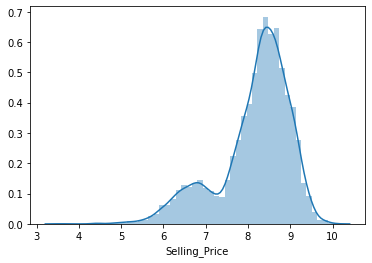

In [872]:
sns.distplot(np.log(train.Selling_Price))

In [873]:
train.drop(index=train[train.Selling_Price>20000].index,inplace=True)
train.reset_index(drop=True,inplace=True)

In [874]:
train.drop(index=train[train.Selling_Price<0].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [875]:
train.Selling_Price = train.Selling_Price.apply(lambda x: x if x>=0 else x*(-1))

In [876]:
train.Selling_Price.isnull().sum()

41

a = train[train.Selling_Price.isnull()]
b.dropna(inplace=True)
l1 = np.log(b.Selling_Price)


b.Selling_Price = b.Selling_Price.apply(lambda x: x if x>=0 else x*(-1))
b[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']] = b[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']].astype('float')

xtrain,xtest,ytrain,ytest = train_test_split(b[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']],b.Selling_Price,test_size=0.3,random_state=8011)

m = lgb.LGBMRegressor(random_state=10070)
m.fit(xtrain,ytrain)
i_prd = m.predict(xtest)
np.sqrt(mean_squared_log_error(ytest,i_prd))

a.drop(columns=['Selling_Price'],inplace=True)

a.Maximum_price.fillna(a.Maximum_price.median(),inplace=True)
a.Minimum_price.fillna(a.Minimum_price.median(),inplace=True)
a.Discount_avail.fillna(a.Discount_avail.median(),inplace=True)
a.charges_2.fillna(a.charges_2.median(),inplace=True)

a['Selling_Price'] = m.predict(a[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']])
l = a.Selling_Price.index
for i in l:
    train.loc[i,'Selling_Price'] = a.loc[i,'Selling_Price']

In [877]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       210
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           197
charges_2           205
Minimum_price        38
Maximum_price       342
Selling_Price        41
dtype: int64

In [878]:
#train.isnull().sum()

In [879]:
train.drop(index = train[train.Selling_Price.isnull()].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [880]:
#train.Selling_Price.fillna(train.Selling_Price.median(),inplace=True)

## Feature by Feature Analysis

### Product ID

In [881]:
#train.Product_id = train.Product_id.apply(lambda x: [i for i in x][:3])
#test.Product_id = test.Product_id.apply(lambda x: [i for i in x][:3])

In [882]:
#train.Product_id = train.Product_id.apply(lambda x: ''.join(x))
#test.Product_id = test.Product_id.apply(lambda x: ''.join(x))

In [883]:
train.Product_id.nunique(), test.Product_id.nunique()

(6311, 3430)

In [884]:
z

array(['SCHE4YSTDVPVZVXW', 'ACCEGCATKHNRXUHW', 'NKCE6GJ5XVJDXNNZ', ...,
       'TUNE8FWQBS7TVVT7', 'NKCEGMUABCRGUZPE', 'RNGE7M92KAQWUBCS'],
      dtype=object)

### Stall no.

In [885]:
test.Stall_no.nunique()

50

In [886]:
train.Stall_no.isnull().sum(), test.Stall_no.isnull().sum()

(5, 1)

In [887]:
train.Stall_no.fillna(20.0, inplace=True) #20
test.Stall_no.fillna(12.0,inplace=True)   #12

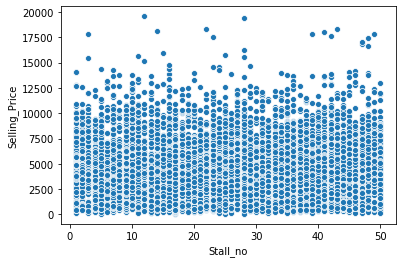

In [888]:
sns.scatterplot(train.Stall_no,train.Selling_Price)

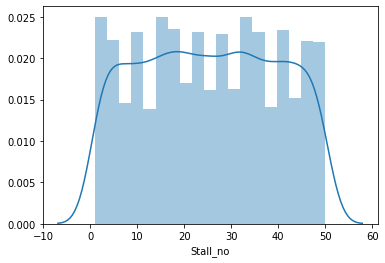

In [889]:
sns.distplot(train.Stall_no)

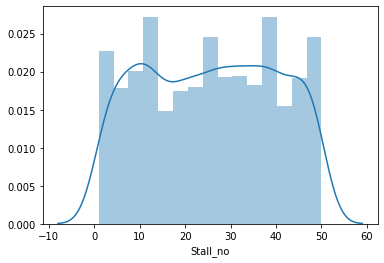

In [890]:
sns.distplot(test.Stall_no)

### In Stock date

In [891]:
#train['Date'] = train.instock_date.str.split(' ').apply(lambda x: x[0])
#test['Date'] = test.instock_date.str.split(' ').apply(lambda x: x[0])

In [892]:
#train['Time'] = train.instock_date.str.split(' ').apply(lambda x: x[1])
#test['Time'] = test.instock_date.str.split(' ').apply(lambda x: x[1])

In [893]:
#train['Hour'] = train.Time.str.split(':').apply(lambda x: x[0])
#test['Hour'] = test.Time.str.split(':').apply(lambda x: x[0])

#train['Minute'] = train.Time.str.split(':').apply(lambda x: x[1])
#test['Minute'] = test.Time.str.split(':').apply(lambda x: x[1])

#train['Second'] = train.Time.str.split(':').apply(lambda x: x[2])
#test['Second'] = test.Time.str.split(':').apply(lambda x: x[2])

In [894]:
#train.drop(columns=['instock_date','Time'],inplace = True)
#test.drop(columns=['instock_date','Time'],inplace = True)

In [895]:
train.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  \
0             0.0      376.0       11.0         2983.0         4713.0   
1             0.0      397.0       12.0         7495.0        10352.0   
2             0.0      250.0        9.0         5752.0         7309.0   
3             0.0      144.0       13.0         5090.0        20814.0   
4             1.0      211.0        4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

### Market Category

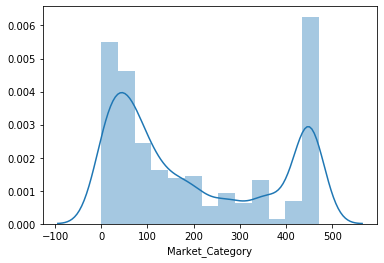

In [896]:
sns.distplot(train.Market_Category)

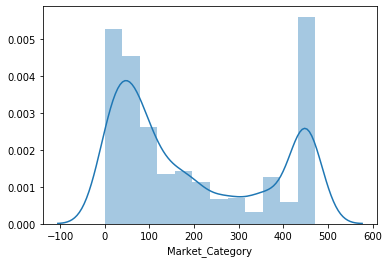

In [897]:
sns.distplot(test.Market_Category)

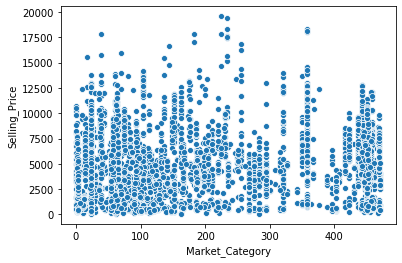

In [898]:
sns.scatterplot(train.Market_Category,train.Selling_Price)

### Customer Name

In [899]:
train.Customer_name.nunique(),test.Customer_name.nunique()

(5853, 3319)

In [900]:
#train.drop(columns=['Customer_name'],inplace=True)
#test.drop(columns=['Customer_name'],inplace=True)

### Loyalty Customer

In [901]:
train.Loyalty_customer.value_counts(), test.Loyalty_customer.value_counts()

(Yes    3850
 No     2461
 Name: Loyalty_customer, dtype: int64,
 Yes    2087
 No     1343
 Name: Loyalty_customer, dtype: int64)

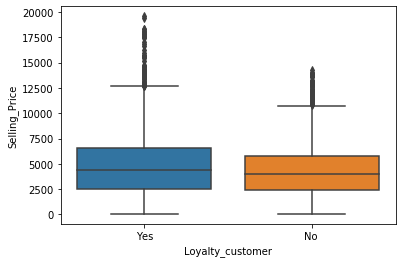

In [902]:
sns.boxplot(train.Loyalty_customer,train.Selling_Price)

### Product Category

In [903]:
train.Product_Category.value_counts()

Pet_care       674
Repair         665
Child_care     652
Cosmetics      643
Hospitality    626
Organic        618
Technology     616
Home_decor     609
Educational    605
Fashion        603
Name: Product_Category, dtype: int64

In [904]:
test.Product_Category.value_counts()

Educational    355
Cosmetics      348
Child_care     348
Pet_care       346
Repair         345
Fashion        345
Technology     340
Home_decor     340
Organic        336
Hospitality    327
Name: Product_Category, dtype: int64

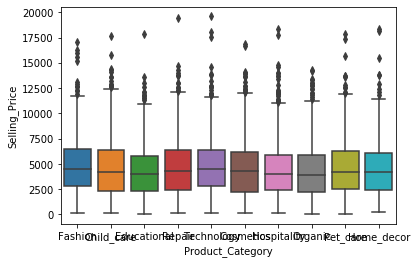

In [905]:
sns.boxplot(train.Product_Category,train.Selling_Price)

### Grade

In [906]:
train.Grade.value_counts()

0    4337
2    1093
3     502
1     379
Name: Grade, dtype: int64

In [907]:
z

array(['SCHE4YSTDVPVZVXW', 'ACCEGCATKHNRXUHW', 'NKCE6GJ5XVJDXNNZ', ...,
       'TUNE8FWQBS7TVVT7', 'NKCEGMUABCRGUZPE', 'RNGE7M92KAQWUBCS'],
      dtype=object)

In [908]:
test.Grade.value_counts()

0    2335
2     595
3     300
1     200
Name: Grade, dtype: int64

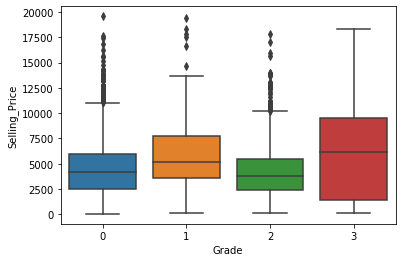

In [909]:
sns.boxplot(train.Grade,train.Selling_Price)

### Demand

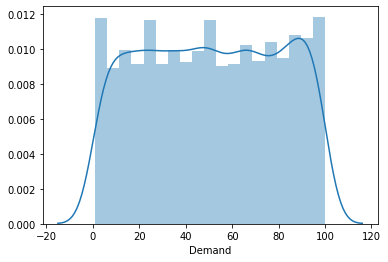

In [910]:
sns.distplot(train.Demand)

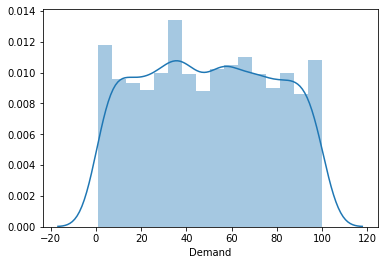

In [911]:
sns.distplot(test.Demand)

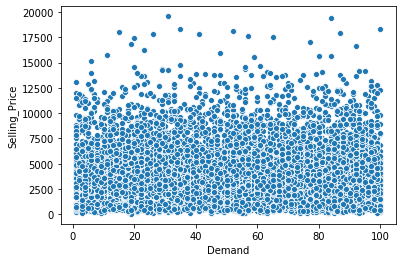

In [912]:
sns.scatterplot(train.Demand,train.Selling_Price)

### Discount Avail

In [913]:
train.Discount_avail.value_counts()

0.0    5394
1.0     880
Name: Discount_avail, dtype: int64

In [914]:
#train.Discount_avail.fillna(1.0,inplace=True)

In [915]:
train.drop(index = train[train.Discount_avail.isnull()].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [916]:
#train.Discount_avail.fillna(0.0,inplace=True)

In [917]:
test.Discount_avail.value_counts()

0    2928
1     502
Name: Discount_avail, dtype: int64

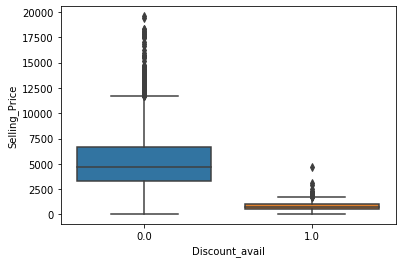

In [918]:
sns.boxplot(train.Discount_avail,train.Selling_Price)

### Charges_1

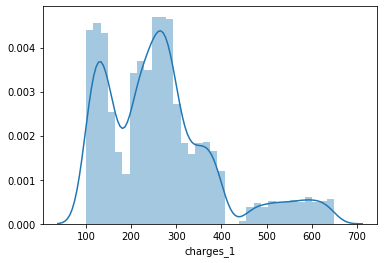

In [919]:
sns.distplot(train.charges_1)

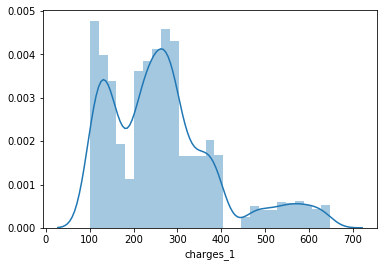

In [920]:
sns.distplot(test.charges_1)

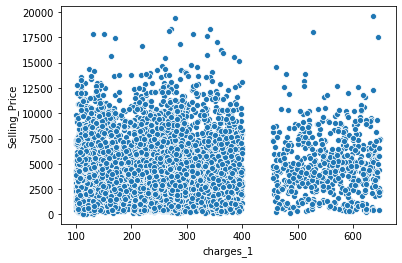

In [921]:
sns.scatterplot(train.charges_1,train.Selling_Price)

In [922]:
#train.drop(train[train.charges_1.isnull()].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [923]:
#train.charges_1.fillna(train.charges_1.median(),inplace=True)
#test.charges_1.fillna(test.charges_1.median(),inplace=True)
# here also

### Charges_2(%)

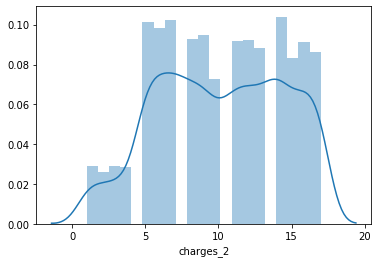

In [924]:
sns.distplot(train.charges_2)

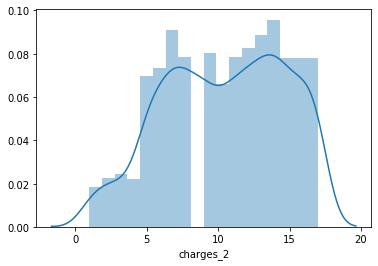

In [925]:
sns.distplot(test.charges_2)

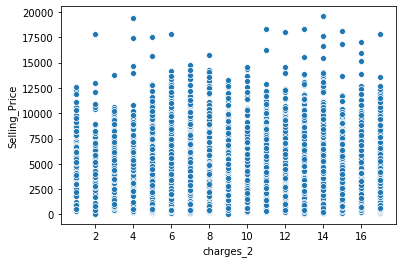

In [926]:
sns.scatterplot(train.charges_2,train.Selling_Price)

In [927]:
#train.charges_2.fillna(train.charges_2.median(),inplace=True)
#test.charges_2.fillna(test.charges_2.median(),inplace=True)
## here also

### Minimum price

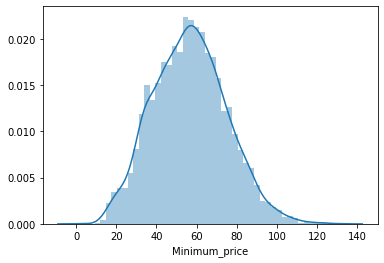

In [928]:
sns.distplot(np.sqrt(train.Minimum_price))

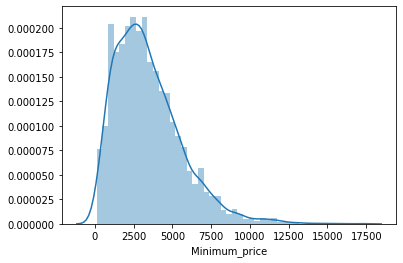

In [929]:
sns.distplot(test.Minimum_price)

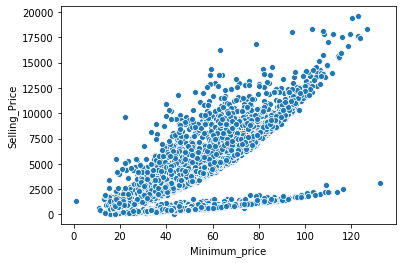

In [930]:
sns.scatterplot(np.sqrt(train.Minimum_price),train.Selling_Price)

In [931]:
#train.Minimum_price.fillna(train.Minimum_price.median(),inplace=True)
#test.Minimum_price.fillna(test.Minimum_price.median(),inplace=True)
## removed already but fillinf with df once

### Maximum Price

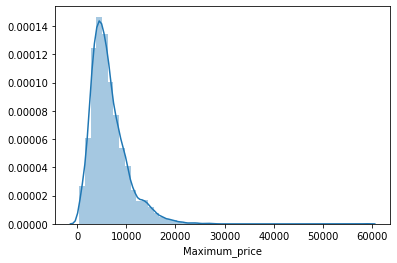

In [932]:
sns.distplot((train.Maximum_price))

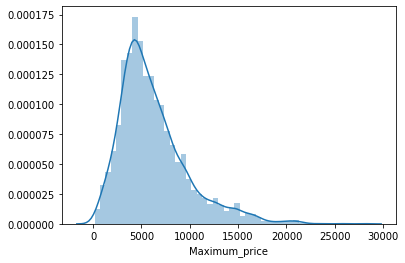

In [933]:
sns.distplot((test.Maximum_price))

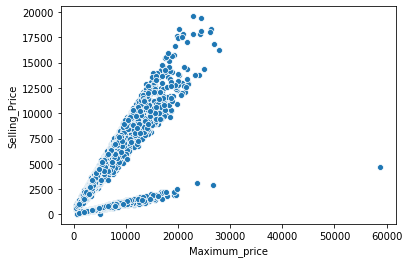

In [934]:
sns.scatterplot(train.Maximum_price,train.Selling_Price)

In [935]:
train.drop(index = train[train.Maximum_price==train.Maximum_price.max()].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [936]:
#train.Maximum_price.fillna(train.Maximum_price.median(),inplace=True)

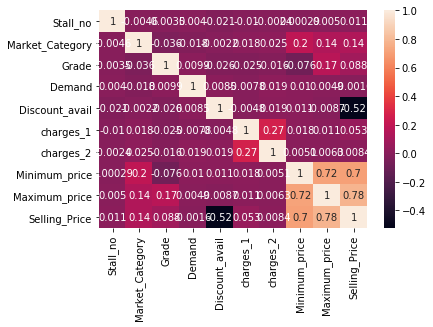

In [937]:
sns.heatmap(train.corr(),annot=True)

### Feature  Engg.

In [938]:
train.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  \
0             0.0      376.0       11.0         2983.0         4713.0   
1             0.0      397.0       12.0         7495.0        10352.0   
2             0.0      250.0        9.0         5752.0         7309.0   
3             0.0      144.0       13.0         5090.0        20814.0   
4             1.0      211.0        4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

In [939]:
#train.drop(train.Minimum_price[np.log(train.Minimum_price)<5].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [940]:
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)

In [941]:
df.Maximum_price.fillna(df.Maximum_price.median(),inplace=True)
df.Minimum_price.fillna(df.Minimum_price.median(),inplace=True)
df.charges_2.fillna(df.charges_2.median(),inplace=True)
df.charges_1.fillna(df.charges_1.median(),inplace=True)

In [942]:
df['Sum'] = (df.Maximum_price**2) + (df.Minimum_price**2)
df['Diff_price'] = df.Maximum_price - df.Minimum_price
df['Mean_price'] = (df.Maximum_price + df.Minimum_price)/2
df['Mean_price_charged'] = (df.Maximum_price + df.Minimum_price) - df.charges_1
#df['Price_ratio'] = np.sqrt((df.Maximum_price**2) / (df.Minimum_price**2))
df['Date'] = df.instock_date.str.split(' ').apply(lambda x: x[0])
df.Date = pd.to_datetime(df.Date)
df['Max-price_per-demand'] = df.Maximum_price/df.Demand
df['Min-price_per-demand'] = df.Minimum_price/df.Demand
df['Total-price_per-demand'] = df.Sum/df.Demand


In [943]:
#df.groupby(['Demand'])[['Minimum_price']].agg(('count','min','max','mean'))
#df['Demand_count_price_count'] = df.groupby(['Grade'])[['Sum']].transform('count')
#df['Demand_min_price_min'] = df.groupby(['Grade'])[['Sum']].transform('min')
#df['Demand_max_price_max'] = df.groupby(['Grade'])[['Sum']].transform('max')
#df['Demand_sum_price_sum'] = df.groupby(['Grade'])[['Sum']].transform('sum')

#df['Demand_max_price_count'] = df.groupby(['Demand'])[['Maximum_price']].transform('count')
#df['Demand_max_price_min'] = df.groupby(['Demand'])[['Maximum_price']].transform('min')
#df['Demand_max_price_max'] = df.groupby(['Demand'])[['Maximum_price']].transform('max')
#df['Demand_max_price_sum'] = df.groupby(['Demand'])[['Maximum_price']].transform('sum')

In [944]:
df['Weekday'] = df.Date.dt.weekday
df['Day'] = df.Date.dt.day
#df['quarter'] = df.Date.dt.quarter
#df['year'] = df.Date.dt.year
df['DOY'] = df.Date.dt.dayofyear
df['WOY'] = df.Date.dt.weekofyear
df['DIM'] = df.Date.dt.daysinmonth
df['Month'] = df.Date.dt.month
#df['Is_weekend'] = np.where(df.Date.dt.dayofweek==6,1,0)
df['WeekDay_name'] = df.Date.dt.weekday_name

In [945]:
df['Time'] = df.instock_date.str.split(' ').apply(lambda x: x[1])
#df['Hour'] = df.Time.str.split(':').apply(lambda x: int(x[0]))
df['Minute'] = df.Time.str.split(':').apply(lambda x: int(x[1]))
df['Second'] = df.Time.str.split(':').apply(lambda x: float(x[2]))

#df.Hour = df.Hour + (df.Minute/60) + (df.Second/3600)

In [946]:
df.head()

Customer_name  Demand  Discount_avail  Grade Loyalty_customer  \
0      Lillyann      68             0.0      1              Yes   
1         Klynn      51             0.0      0              Yes   
2         Ridge      10             0.0      0              Yes   
3         Abran      48             0.0      2              Yes   
4        Dustyn      35             1.0      1              Yes   

   Market_Category  Maximum_price  Minimum_price Product_Category  \
0                2         4713.0         2983.0          Fashion   
1               24        10352.0         7495.0          Fashion   
2              447         7309.0         5752.0       Child_care   
3               23        20814.0         5090.0      Educational   
4               63         9261.0         2430.0           Repair   

         Product_id  Selling_Price  Stall_no  charges_1  charges_2  \
0  BRAE2NF6JA5GUEXG    4185.947700      37.0      376.0       11.0   
1  TUNE8SFB6RJN2HSD    9271.490256      38.0      397.0       12.0   
2  BRAEAR7WZPQGPBZU    6785.701362       9.0      250.0        9.0   
3  WATDZ2ZQ8JPDHCTJ   13028.917824      50.0      144.0       13.0   
4  JWSEBUKYQPMBZ3RK     906.553935       7.0      211.0        4.0   

              instock_date          Sum  Diff_price  Mean_price  \
0  2015-08-22 18:36:12.000   31110658.0      1730.0      3848.0   
1  2016-03-27 21:19:13.000  163338929.0      2857.0      8923.5   
2  2015-08-18 19:25:22.000   86506985.0      1557.0      6530.5   
3  2016-03-28 21:53:01.000  459130696.0     15724.0     12952.0   
4  2016-03-29 22:58:53.000   91671021.0      6831.0      5845.5   

   Mean_price_charged       Date  Max-price_per-demand  Min-price_per-demand  \
0              7320.0 2015-08-22             69.308824             43.867647   
1             17450.0 2016-03-27            202.980392            146.960784   
2             12811.0 2015-08-18            730.900000            575.200000   
3             25760.0 2016-03-28            433.625000            106.041667   
4             11480.0 2016-03-29            264.600000             69.428571   

   Total-price_per-demand  Weekday  Day  DOY  WOY  DIM  Month WeekDay_name  \
0            4.575097e+05        5   22  234   34   31      8     Saturday   
1            3.202724e+06        6   27   87   12   31      3       Sunday   
2            8.650698e+06        1   18  230   34   31      8      Tuesday   
3            9.565223e+06        0   28   88   13   31      3       Monday   
4            2.619172e+06        1   29   89   13   31      3      Tuesday   

           Time  Minute  Second  
0  18:36:12.000      36    12.0  
1  21:19:13.000      19    13.0  
2  19:25:22.000      25    22.0  
3  21:53:01.000      53     1.0  
4  22:58:53.000      58    53.0

df['Disc_day_month_year_maxpr_sum'] = df.groupby(['Discount_avail','Day','Month','year'])[['Maximum_price']].transform('sum')
df['Disc_day_month_year_minpr_sum'] = df.groupby(['Discount_avail','Day','Month','year'])[['Minimum_price']].transform('sum')

df[['Dis_Grad_Mar_Max_mean', 'Dis_Grad_Mar_Min_mean']] = df.groupby(['Discount_avail','Grade','Market_Category'])[['Maximum_price','Minimum_price']].transform('mean')
#df[['Dis_Grad_Mar_Max_std', 'Dis_Grad_Mar_Min_std']] = df.groupby(['Discount_avail','Grade','Market_Category'])[['Maximum_price','Minimum_price']].transform('std')
df[['Dis_Grad_Mar_Max_count', 'Dis_Grad_Mar_Min_count']] = df.groupby(['Discount_avail','Grade','Market_Category'])[['Maximum_price','Minimum_price']].transform('count')

df['Disc_in_week_sum'] = df.groupby(['Discount_avail','Weekday'])['Selling_Price'].transform('sum')
#df['Disc_in_week_std'] = df.groupby(['Discount_avail','Weekday'])['Selling_Price'].transform('std')
df['Disc_in_week_count'] = df.groupby(['Discount_avail','Weekday'])['Product_id'].transform('count')

df['Disc_in_weekend_sum'] = df.groupby(['Discount_avail','Is_weekend','Product_id'])['Selling_Price'].transform('sum')
#df['Disc_in_weekend_std'] = df.groupby(['Discount_avail','Is_weekend','Product_Category'])['Selling_Price'].transform('std')
df['Disc_in_weekend_count'] = df.groupby(['Discount_avail','Is_weekend'])['Product_id'].transform('count')

df['Disc_in_month_sum'] = df.groupby(['Discount_avail','Month','Product_id'])['Selling_Price'].transform('sum')
df['Disc_in_month_count'] = df.groupby(['Discount_avail','Month'])['Product_id'].transform('count')
#df['Disc_in_month_mean'] = df.groupby(['Discount_avail','Month'])['Selling_Price'].transform('mean')


In [947]:
#df['Month-discount-loyal-demand_count'] = df.groupby(['Month','Grade','Discount_avail'])[['Demand']].transform('count')
#df['Month-discount-loyal-demand_max'] = df.groupby(['Month','Grade','Discount_avail'])[['Demand']].transform('max')
#df['Month-discount-loyal-demand_min'] = df.groupby(['Month','Grade','Discount_avail'])[['Demand']].transform('min')

#df['Month-discount-loyal-mxp_count'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('count')
#df['Month-discount-loyal-mxp_max'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('max')
#df['Month-discount-loyal-mxp_min'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('min')
#df['Month-discount-loyal-mxp_mean'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('mean')
#df['Month-discount-loyal-mxp_std'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('std')

#df['Month-discount-max_Price-mxp_count'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('count')
#df['Month-discount-max_Price-mxp_max'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('max')
#df['Month-discount-max_Price-mxp_min'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('min')
#df['Month-discount-max_Price-mxp_mean'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('mean')
#df['Month-discount-max_Price-mxp_std'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('std')

In [948]:
#df['Prd_cat_Max_pr_mean']=df.groupby(['Product_Category'])['Mean_price'].transform('mean')
#df['Prd_cat_Max_pr_max']=df.groupby(['Product_Category'])['Maximum_price'].transform('max')
#df['Prd_cat_Max_pr_min']=df.groupby(['Product_Category'])['Maximum_price'].transform('min')
#df['Prd_cat_Max_pr_count']=df.groupby(['Product_Category'])['Maximum_price'].transform('count')

#df['Prd_cat_Min_pr_mean']=df.groupby(['Product_Category'])['Minimum_price'].transform('mean')
#df['Prd_cat_Min_pr_med']=df.groupby(['Product_Category'])['Minimum_price'].transform('median')
#df['Prd_cat_Min_pr_max']=df.groupby(['Product_Category'])['Minimum_price'].transform('max')
#df['Prd_cat_Min_pr_min']=df.groupby(['Product_Category'])['Minimum_price'].transform('min')
#df['Prd_cat_Min_pr_count']=df.groupby(['Product_Category'])['Minimum_price'].transform('count')

#df['Prd_cat_Max_pr_mean']=df.groupby(['Loyalty_customer'])['Maximum_price'].transform('mean')
#df['Prd_cat_Max_pr_max']=df.groupby(['Loyalty_customer'])['Maximum_price'].transform('max')
#df['Prd_cat_Max_pr_min']=df.groupby(['Loyalty_customer'])['Maximum_price'].transform('min')
#df['Prd_cat_Max_pr_count']=df.groupby(['Loyalty_customer'])['Market_Category'].transform('count')

#df['Stall_cat_Min_pr_mean']=df.groupby(['Stall_no'])['Mean_price'].transform('mean')
#df['Stall_cat_Min_pr_max']=df.groupby(['Stall_no'])['Mean_price'].transform('max')
#df['Stall_cat_Min_pr_min']=df.groupby(['Stall_no'])['Mean_price'].transform('min')
#df['Stall_cat_Min_pr_count']=df.groupby(['Market_Category'])['Loyalty_customer'].transform('count')

#df['Stall_cat_Max_pr_mean']=df.groupby(['Discount_avail'])['Sum'].transform('mean')
#df['Stall_cat_Max_pr_max']=df.groupby(['Discount_avail'])['Sum'].transform('max')
#df['Stall_cat_Max_pr_min']=df.groupby(['Discount_avail'])['Sum'].transform('min')
#df['Stall_cat_Max_pr_count']=df.groupby(['Discount_avail'])['Sum'].transform('count')

In [949]:
df['Charged_max_price'] = df.Maximum_price-(df.charges_1 + (df.charges_2*df.Maximum_price/100))
df['Charged_min_price'] = df.Minimum_price -(df.charges_1 + (df.charges_2*df.Minimum_price/100))
df['Total-charges'] = df.charges_1 + (df.charges_2/100)
df['Diff_Max_price'] = df.Maximum_price - df.Charged_max_price
df['Diff_Sum_price'] = df.Sum - df['Total-charges']
df['Min-Max_ratio'] = df.Maximum_price/df.Minimum_price
df['Charged_ratio'] = df.Charged_max_price/df.Charged_min_price
#df.Maximum_price = np.sqrt(df.Maximum_price)
#df.Minimum_price = np.sqrt(df.Minimum_price)

In [950]:
df['Prd_cat_Min_pr_mean']=df.groupby(['Product_id'])['Minimum_price'].transform('mean')
df['Prd_cat_Min_pr_max']=df.groupby(['Product_id'])['Minimum_price'].transform('max')
df['Prd_cat_Min_pr_min']=df.groupby(['Product_id'])['Minimum_price'].transform('min')
df['Prd_cat_Min_pr_count']=df.groupby(['Product_id'])['Minimum_price'].transform('count')
df['Prd_cat_Min_pr_median']=df.groupby(['Product_id'])['Minimum_price'].transform('median')


df['Market_Loyal_pr_count']=df.groupby(['Market_Category'])['Loyalty_customer'].transform('count')
df['Product_Loyal_pr_count']=df.groupby(['Product_Category'])['Loyalty_customer'].transform('count')
df['Discount_Loyal_pr_count']=df.groupby(['Discount_avail'])['Loyalty_customer'].transform('count')
df['Id_Loyal_pr_count']=df.groupby(['Product_id'])['Loyalty_customer'].transform('count')


In [951]:
a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('median').values
b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('median').values
df['grade_min_max_medProduct_Category_ratio'] = b/a

a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('mean').values
b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('mean').values
#df['grade_min_max_meanProduct_Category_ratio'] = b/a

a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('max').values
b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('max').values
#df['grade_min_max_maxProduct_Category_ratio'] = b/a

a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('min').values
b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('min').values
#df['grade_min_max_minProduct_Category_ratio'] = b/a

a = df.groupby('Discount_avail')[['Maximum_price']].transform('median').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('median').values
c = df.groupby('Discount_avail')[['charges_1']].transform('median').values
d = df.groupby('Discount_avail')[['charges_2']].transform('median').values
e = df.groupby('Discount_avail')[['Sum']].transform('median').values
f = df.groupby('Discount_avail')[['Diff_price']].transform('median').values
df['Discount_avail_min_max_med_ratio'] = b/a
df['Disc_charge_median_dif'] = c-d
df['Dif_Dif_median_rat'] = f/e

a = df.groupby('Discount_avail')[['Maximum_price']].transform('mean').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('mean').values
c = df.groupby('Discount_avail')[['charges_1']].transform('mean').values
d = df.groupby('Discount_avail')[['charges_2']].transform('mean').values
df['Discount_avail_min_max_mean_ratio'] = b/a
df['Disc_charge_mean_dif'] = c-(d/100)
e = df.groupby('Discount_avail')[['Maximum_price']].transform('mean').values
f = df.groupby('Discount_avail')[['Minimum_price']].transform('mean').values
df['Dif_Dif_mean_rat'] = f/e


a = df.groupby('Discount_avail')[['Maximum_price']].transform('max').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('max').values
c = df.groupby('Discount_avail')[['charges_1']].transform('max').values
d = df.groupby('Discount_avail')[['charges_2']].transform('max').values
e = df.groupby('Discount_avail')[['Maximum_price']].transform('max').values
f = df.groupby('Discount_avail')[['Minimum_price']].transform('max').values
df['Dif_Dif_max_rat'] = f/e
df['Discount_avail_min_max_max_ratio'] = b/a
df['Disc_charge_max_dif'] = c-(d/100)


a = df.groupby('Discount_avail')[['Maximum_price']].transform('min').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('min').values
c = df.groupby('Discount_avail')[['charges_1']].transform('min').values
d = df.groupby('Discount_avail')[['charges_2']].transform('min').values
e = df.groupby('Discount_avail')[['Maximum_price']].transform('min').values
f = df.groupby('Discount_avail')[['Minimum_price']].transform('min').values
df['Dif_Dif_min_rat'] = f/e
df['Discount_avail_min_max_min_ratio'] = b/a
#df['Disc_charge_min_dif'] = c-(d/100)



#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('median').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('median').values
#df['Product_Category_avail_min_max_med_ratio'] = b/a

#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('mean').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('mean').values
#df['Product_Category_avail_min_max_mean_ratio'] = b/a

#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('max').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('max').values
#df['Product_Category_avail_min_max_max_ratio'] = b/a

#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('min').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('min').values
#df['Product_Category_avail_min_max_min_ratio'] = b/a



#df.Sum = df.Sum**0.2
#df.Mean_price = df.Mean_price**0.5
#df.Mean_price_charged = df.Mean_price_charged**0.5

In [952]:
df.Maximum_price = np.log(df.Maximum_price)
df.Minimum_price = np.sqrt(df.Minimum_price)

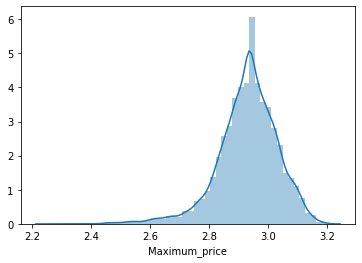

In [953]:
sns.distplot(np.sqrt(df.Maximum_price))

In [954]:
df['Stall_Cust_count']=df.groupby(['Stall_no'])['Customer_name'].transform('count')

#df['Grade_sum_price_count'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('count')
#df['Grade_sum_price_min'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('min')
#df['Grade_sum_price_max'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('max')
#df['Grade_sum_price_sum'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('sum')

#df['Disc_sum_price_count'] = df.groupby(['Discount_avail','Grade'])[['Mean_price']].transform('count')
#df['Disc_sum_price_min'] = df.groupby(['Discount_avail'])[['Mean_price']].transform('min')
#df['Disc_sum_price_max'] = df.groupby(['Discount_avail'])[['Mean_price']].transform('max')
#df['Disc_sum_price_sum'] = df.groupby(['Discount_avail','Grade'])[['Mean_price']].transform('sum')

#df = pd.concat([df,pd.get_dummies(df[['Market_Category']].astype('category'))],axis=1)

In [955]:
le = LabelEncoder()
df.Loyalty_customer = le.fit_transform(df.Loyalty_customer)
df.Product_Category = le.fit_transform(df.Product_Category)
df.WeekDay_name = le.fit_transform(df.WeekDay_name)

In [956]:
df.head()

Customer_name  Demand  Discount_avail  Grade  Loyalty_customer  \
0      Lillyann      68             0.0      1                 1   
1         Klynn      51             0.0      0                 1   
2         Ridge      10             0.0      0                 1   
3         Abran      48             0.0      2                 1   
4        Dustyn      35             1.0      1                 1   

   Market_Category  Maximum_price  Minimum_price  Product_Category  \
0                2       8.458080      54.616847                 3   
1               24       9.244935      86.573668                 3   
2              447       8.896862      75.841941                 0   
3               23       9.943381      71.344236                 2   
4               63       9.133567      49.295030                 8   

         Product_id  Selling_Price  Stall_no  charges_1  charges_2  \
0  BRAE2NF6JA5GUEXG    4185.947700      37.0      376.0       11.0   
1  TUNE8SFB6RJN2HSD    9271.490256      38.0      397.0       12.0   
2  BRAEAR7WZPQGPBZU    6785.701362       9.0      250.0        9.0   
3  WATDZ2ZQ8JPDHCTJ   13028.917824      50.0      144.0       13.0   
4  JWSEBUKYQPMBZ3RK     906.553935       7.0      211.0        4.0   

              instock_date          Sum  Diff_price  Mean_price  \
0  2015-08-22 18:36:12.000   31110658.0      1730.0      3848.0   
1  2016-03-27 21:19:13.000  163338929.0      2857.0      8923.5   
2  2015-08-18 19:25:22.000   86506985.0      1557.0      6530.5   
3  2016-03-28 21:53:01.000  459130696.0     15724.0     12952.0   
4  2016-03-29 22:58:53.000   91671021.0      6831.0      5845.5   

   Mean_price_charged       Date  Max-price_per-demand  Min-price_per-demand  \
0              7320.0 2015-08-22             69.308824             43.867647   
1             17450.0 2016-03-27            202.980392            146.960784   
2             12811.0 2015-08-18            730.900000            575.200000   
3             25760.0 2016-03-28            433.625000            106.041667   
4             11480.0 2016-03-29            264.600000             69.428571   

   Total-price_per-demand  Weekday  Day  DOY  WOY  DIM  Month  WeekDay_name  \
0            4.575097e+05        5   22  234   34   31      8             2   
1            3.202724e+06        6   27   87   12   31      3             3   
2            8.650698e+06        1   18  230   34   31      8             5   
3            9.565223e+06        0   28   88   13   31      3             1   
4            2.619172e+06        1   29   89   13   31      3             5   

           Time  Minute  Second  Charged_max_price  Charged_min_price  \
0  18:36:12.000      36    12.0            3818.57            2278.87   
1  21:19:13.000      19    13.0            8712.76            6198.60   
2  19:25:22.000      25    22.0            6401.19            4984.32   
3  21:53:01.000      53     1.0           17964.18            4284.30   
4  22:58:53.000      58    53.0            8679.56            2121.80   

   Total-charges  Diff_Max_price  Diff_Sum_price  Min-Max_ratio  \
0         376.11          894.43    3.111028e+07       1.579953   
1         397.12         1639.24    1.633385e+08       1.381187   
2         250.09          907.81    8.650673e+07       1.270688   
3         144.13         2849.82    4.591306e+08       4.089194   
4         211.04          581.44    9.167081e+07       3.811111   

   Charged_ratio  Prd_cat_Min_pr_mean  Prd_cat_Min_pr_max  Prd_cat_Min_pr_min  \
0       1.675642               2983.0              2983.0              2983.0   
1       1.405601               7495.0              7495.0              7495.0   
2       1.284265               5752.0              5752.0              5752.0   
3       4.193026               5090.0              5090.0              5090.0   
4       4.090659               2430.0              2430.0              2430.0   

   Prd_cat_Min_pr_count  Prd_cat_Min_pr_median  Market_Loyal_pr

In [957]:
#df.drop(columns=['Loyalty_customer','Product_Category'],inplace=True)

### Modelling

In [958]:
train = df.iloc[:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]
test.reset_index(drop=True,inplace=True)
label = np.log(train.Selling_Price)
test.drop(columns=['Selling_Price','Stall_no','Date','Time','instock_date','Customer_name','Minute','Second','Product_id'],inplace=True)
train.drop(columns=['Selling_Price','Stall_no','Date','Time','instock_date','Customer_name','Minute','Second','Product_id'],inplace=True)


In [959]:
train.shape, test.shape

((6273, 53), (3430, 53))

In [960]:
def model(m,train,label,test,folds,rnd_st):
    predicted = pd.DataFrame(np.zeros(shape=(test.shape[0],folds)))
    splitters = KFold(n_splits = folds, random_state=rnd_st)
    tr = []
    te = []
    
    for i,(tr_index,val_index) in enumerate(splitters.split(train,label)):
        xtrain,xval = train.loc[tr_index,:], train.loc[val_index,:]
        ytrain,yval = label.loc[tr_index], label.loc[val_index]
        
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict(xtrain)
        val_pred = m.predict(xval)
        l1 = max(0,100-np.sqrt(mean_squared_error(ytrain,tr_pred)))
        l2 = max(0,100-np.sqrt(mean_squared_error(yval,val_pred)))
        
        print(l1,'\t\t\t\t\t',l2)
        tr.append(l1)
        te.append(l2)
        pd.Series(m.feature_importances_,index = train.columns).sort_values(ascending=True).plot.barh()
        predicted.iloc[:,i] = m.predict(test)

    print(np.mean(tr), np.mean(te))
    return(predicted)

In [976]:
seed = 180700

99.99996569029047 					 99.89314997644371
99.9999660922268 					 99.95707928936338
99.999964711999 					 99.95076065677885
99.99996564029522 					 99.81474210394529
99.99996669163993 					 99.92601560502845
99.99996457071327 					 99.93715598423137
99.99996516369639 					 99.93141013921166
99.99996595856142 					 99.93314653558613
99.99996538782489 					 99.91250505206678
99.99996554524971 99.91732948251729
Learning rate set to 0.015597
0:	learn: 0.8468023	total: 7ms	remaining: 35s
1:	learn: 0.8348079	total: 11.5ms	remaining: 28.7s
2:	learn: 0.8227344	total: 15.8ms	remaining: 26.4s
3:	learn: 0.8115472	total: 20.3ms	remaining: 25.4s
4:	learn: 0.8002118	total: 24.6ms	remaining: 24.6s
5:	learn: 0.7895386	total: 29ms	remaining: 24.2s
6:	learn: 0.7783779	total: 33.2ms	remaining: 23.7s
7:	learn: 0.7678043	total: 37.6ms	remaining: 23.5s
8:	learn: 0.7571413	total: 42.1ms	remaining: 23.3s
9:	learn: 0.7469282	total: 44.2ms	remaining: 22s
10:	learn: 0.7365333	total: 48.4ms	remaining: 22s
11:	lear

165:	learn: 0.1344447	total: 689ms	remaining: 20.1s
166:	learn: 0.1336967	total: 693ms	remaining: 20.1s
167:	learn: 0.1329807	total: 697ms	remaining: 20s
168:	learn: 0.1322422	total: 701ms	remaining: 20s
169:	learn: 0.1314586	total: 705ms	remaining: 20s
170:	learn: 0.1307373	total: 709ms	remaining: 20s
171:	learn: 0.1300297	total: 713ms	remaining: 20s
172:	learn: 0.1293088	total: 717ms	remaining: 20s
173:	learn: 0.1286315	total: 721ms	remaining: 20s
174:	learn: 0.1279814	total: 725ms	remaining: 20s
175:	learn: 0.1273047	total: 729ms	remaining: 20s
176:	learn: 0.1266685	total: 733ms	remaining: 20s
177:	learn: 0.1260531	total: 737ms	remaining: 20s
178:	learn: 0.1254319	total: 741ms	remaining: 20s
179:	learn: 0.1248244	total: 745ms	remaining: 20s
180:	learn: 0.1242312	total: 749ms	remaining: 19.9s
181:	learn: 0.1236691	total: 753ms	remaining: 19.9s
182:	learn: 0.1231261	total: 757ms	remaining: 19.9s
183:	learn: 0.1225865	total: 761ms	remaining: 19.9s
184:	learn: 0.1220357	total: 765ms	rem

333:	learn: 0.0925883	total: 1.38s	remaining: 19.3s
334:	learn: 0.0924147	total: 1.39s	remaining: 19.3s
335:	learn: 0.0922437	total: 1.39s	remaining: 19.3s
336:	learn: 0.0922064	total: 1.4s	remaining: 19.3s
337:	learn: 0.0921439	total: 1.4s	remaining: 19.3s
338:	learn: 0.0921067	total: 1.4s	remaining: 19.3s
339:	learn: 0.0920532	total: 1.41s	remaining: 19.3s
340:	learn: 0.0919549	total: 1.41s	remaining: 19.3s
341:	learn: 0.0919203	total: 1.42s	remaining: 19.3s
342:	learn: 0.0918773	total: 1.42s	remaining: 19.3s
343:	learn: 0.0918323	total: 1.42s	remaining: 19.3s
344:	learn: 0.0917772	total: 1.43s	remaining: 19.3s
345:	learn: 0.0916825	total: 1.43s	remaining: 19.3s
346:	learn: 0.0916413	total: 1.44s	remaining: 19.2s
347:	learn: 0.0915934	total: 1.44s	remaining: 19.2s
348:	learn: 0.0915527	total: 1.44s	remaining: 19.2s
349:	learn: 0.0914692	total: 1.45s	remaining: 19.2s
350:	learn: 0.0914294	total: 1.45s	remaining: 19.2s
351:	learn: 0.0913844	total: 1.46s	remaining: 19.2s
352:	learn: 0.0

506:	learn: 0.0809093	total: 2.09s	remaining: 18.5s
507:	learn: 0.0808286	total: 2.09s	remaining: 18.5s
508:	learn: 0.0806807	total: 2.09s	remaining: 18.5s
509:	learn: 0.0806536	total: 2.1s	remaining: 18.5s
510:	learn: 0.0805017	total: 2.1s	remaining: 18.5s
511:	learn: 0.0804877	total: 2.11s	remaining: 18.5s
512:	learn: 0.0804702	total: 2.11s	remaining: 18.5s
513:	learn: 0.0803942	total: 2.12s	remaining: 18.5s
514:	learn: 0.0803815	total: 2.12s	remaining: 18.5s
515:	learn: 0.0803090	total: 2.12s	remaining: 18.4s
516:	learn: 0.0801895	total: 2.13s	remaining: 18.5s
517:	learn: 0.0801366	total: 2.13s	remaining: 18.4s
518:	learn: 0.0799936	total: 2.14s	remaining: 18.4s
519:	learn: 0.0798784	total: 2.14s	remaining: 18.4s
520:	learn: 0.0798503	total: 2.14s	remaining: 18.4s
521:	learn: 0.0797559	total: 2.15s	remaining: 18.4s
522:	learn: 0.0797208	total: 2.15s	remaining: 18.4s
523:	learn: 0.0796669	total: 2.16s	remaining: 18.4s
524:	learn: 0.0796513	total: 2.16s	remaining: 18.4s
525:	learn: 0.

677:	learn: 0.0696903	total: 2.78s	remaining: 17.7s
678:	learn: 0.0696409	total: 2.79s	remaining: 17.7s
679:	learn: 0.0696284	total: 2.79s	remaining: 17.7s
680:	learn: 0.0695902	total: 2.79s	remaining: 17.7s
681:	learn: 0.0695727	total: 2.8s	remaining: 17.7s
682:	learn: 0.0695468	total: 2.8s	remaining: 17.7s
683:	learn: 0.0694321	total: 2.81s	remaining: 17.7s
684:	learn: 0.0693627	total: 2.81s	remaining: 17.7s
685:	learn: 0.0692522	total: 2.81s	remaining: 17.7s
686:	learn: 0.0692401	total: 2.82s	remaining: 17.7s
687:	learn: 0.0691905	total: 2.82s	remaining: 17.7s
688:	learn: 0.0690785	total: 2.83s	remaining: 17.7s
689:	learn: 0.0690329	total: 2.83s	remaining: 17.7s
690:	learn: 0.0689415	total: 2.83s	remaining: 17.7s
691:	learn: 0.0689160	total: 2.84s	remaining: 17.7s
692:	learn: 0.0687827	total: 2.84s	remaining: 17.7s
693:	learn: 0.0687716	total: 2.85s	remaining: 17.7s
694:	learn: 0.0686484	total: 2.85s	remaining: 17.7s
695:	learn: 0.0685680	total: 2.85s	remaining: 17.6s
696:	learn: 0.

845:	learn: 0.0608801	total: 3.47s	remaining: 17.1s
846:	learn: 0.0608195	total: 3.48s	remaining: 17.1s
847:	learn: 0.0607207	total: 3.48s	remaining: 17s
848:	learn: 0.0606939	total: 3.48s	remaining: 17s
849:	learn: 0.0605986	total: 3.49s	remaining: 17s
850:	learn: 0.0605873	total: 3.49s	remaining: 17s
851:	learn: 0.0605185	total: 3.5s	remaining: 17s
852:	learn: 0.0604251	total: 3.5s	remaining: 17s
853:	learn: 0.0604201	total: 3.51s	remaining: 17s
854:	learn: 0.0603773	total: 3.51s	remaining: 17s
855:	learn: 0.0603683	total: 3.51s	remaining: 17s
856:	learn: 0.0603544	total: 3.52s	remaining: 17s
857:	learn: 0.0603165	total: 3.52s	remaining: 17s
858:	learn: 0.0602970	total: 3.53s	remaining: 17s
859:	learn: 0.0602021	total: 3.53s	remaining: 17s
860:	learn: 0.0601566	total: 3.53s	remaining: 17s
861:	learn: 0.0601481	total: 3.54s	remaining: 17s
862:	learn: 0.0600897	total: 3.54s	remaining: 17s
863:	learn: 0.0599879	total: 3.55s	remaining: 17s
864:	learn: 0.0598915	total: 3.55s	remaining: 17

1011:	learn: 0.0530671	total: 4.73s	remaining: 18.6s
1012:	learn: 0.0530601	total: 4.73s	remaining: 18.6s
1013:	learn: 0.0530518	total: 4.74s	remaining: 18.6s
1014:	learn: 0.0529832	total: 4.75s	remaining: 18.7s
1015:	learn: 0.0529129	total: 4.76s	remaining: 18.7s
1016:	learn: 0.0528460	total: 4.77s	remaining: 18.7s
1017:	learn: 0.0528358	total: 4.78s	remaining: 18.7s
1018:	learn: 0.0528279	total: 4.78s	remaining: 18.7s
1019:	learn: 0.0528114	total: 4.79s	remaining: 18.7s
1020:	learn: 0.0527816	total: 4.8s	remaining: 18.7s
1021:	learn: 0.0527164	total: 4.81s	remaining: 18.7s
1022:	learn: 0.0527096	total: 4.82s	remaining: 18.7s
1023:	learn: 0.0526721	total: 4.83s	remaining: 18.7s
1024:	learn: 0.0526654	total: 4.83s	remaining: 18.7s
1025:	learn: 0.0525993	total: 4.84s	remaining: 18.8s
1026:	learn: 0.0525703	total: 4.85s	remaining: 18.8s
1027:	learn: 0.0525415	total: 4.86s	remaining: 18.8s
1028:	learn: 0.0525366	total: 4.87s	remaining: 18.8s
1029:	learn: 0.0525241	total: 4.88s	remaining: 

1184:	learn: 0.0476968	total: 5.95s	remaining: 19.2s
1185:	learn: 0.0476801	total: 5.96s	remaining: 19.1s
1186:	learn: 0.0476704	total: 5.96s	remaining: 19.1s
1187:	learn: 0.0476639	total: 5.96s	remaining: 19.1s
1188:	learn: 0.0476012	total: 5.97s	remaining: 19.1s
1189:	learn: 0.0475520	total: 5.97s	remaining: 19.1s
1190:	learn: 0.0475456	total: 5.97s	remaining: 19.1s
1191:	learn: 0.0475228	total: 5.98s	remaining: 19.1s
1192:	learn: 0.0474890	total: 5.98s	remaining: 19.1s
1193:	learn: 0.0474792	total: 5.99s	remaining: 19.1s
1194:	learn: 0.0474422	total: 5.99s	remaining: 19.1s
1195:	learn: 0.0474065	total: 6s	remaining: 19.1s
1196:	learn: 0.0473456	total: 6s	remaining: 19.1s
1197:	learn: 0.0473376	total: 6s	remaining: 19.1s
1198:	learn: 0.0473321	total: 6.01s	remaining: 19s
1199:	learn: 0.0473099	total: 6.01s	remaining: 19s
1200:	learn: 0.0473025	total: 6.02s	remaining: 19s
1201:	learn: 0.0472496	total: 6.02s	remaining: 19s
1202:	learn: 0.0472406	total: 6.03s	remaining: 19s
1203:	learn:

1354:	learn: 0.0433061	total: 6.64s	remaining: 17.9s
1355:	learn: 0.0432975	total: 6.65s	remaining: 17.9s
1356:	learn: 0.0432459	total: 6.65s	remaining: 17.9s
1357:	learn: 0.0432073	total: 6.66s	remaining: 17.8s
1358:	learn: 0.0431999	total: 6.66s	remaining: 17.8s
1359:	learn: 0.0431717	total: 6.66s	remaining: 17.8s
1360:	learn: 0.0431314	total: 6.67s	remaining: 17.8s
1361:	learn: 0.0431256	total: 6.67s	remaining: 17.8s
1362:	learn: 0.0430868	total: 6.67s	remaining: 17.8s
1363:	learn: 0.0430785	total: 6.68s	remaining: 17.8s
1364:	learn: 0.0430402	total: 6.68s	remaining: 17.8s
1365:	learn: 0.0430007	total: 6.69s	remaining: 17.8s
1366:	learn: 0.0429853	total: 6.69s	remaining: 17.8s
1367:	learn: 0.0429745	total: 6.7s	remaining: 17.8s
1368:	learn: 0.0429701	total: 6.7s	remaining: 17.8s
1369:	learn: 0.0429505	total: 6.7s	remaining: 17.8s
1370:	learn: 0.0429058	total: 6.71s	remaining: 17.8s
1371:	learn: 0.0428979	total: 6.71s	remaining: 17.7s
1372:	learn: 0.0428740	total: 6.72s	remaining: 17

1525:	learn: 0.0395310	total: 7.34s	remaining: 16.7s
1526:	learn: 0.0395102	total: 7.34s	remaining: 16.7s
1527:	learn: 0.0395021	total: 7.35s	remaining: 16.7s
1528:	learn: 0.0394656	total: 7.35s	remaining: 16.7s
1529:	learn: 0.0394312	total: 7.36s	remaining: 16.7s
1530:	learn: 0.0393974	total: 7.36s	remaining: 16.7s
1531:	learn: 0.0393890	total: 7.36s	remaining: 16.7s
1532:	learn: 0.0393810	total: 7.37s	remaining: 16.7s
1533:	learn: 0.0393182	total: 7.37s	remaining: 16.7s
1534:	learn: 0.0392883	total: 7.38s	remaining: 16.6s
1535:	learn: 0.0392527	total: 7.38s	remaining: 16.6s
1536:	learn: 0.0392327	total: 7.38s	remaining: 16.6s
1537:	learn: 0.0391970	total: 7.39s	remaining: 16.6s
1538:	learn: 0.0391696	total: 7.39s	remaining: 16.6s
1539:	learn: 0.0391626	total: 7.39s	remaining: 16.6s
1540:	learn: 0.0391431	total: 7.4s	remaining: 16.6s
1541:	learn: 0.0391308	total: 7.4s	remaining: 16.6s
1542:	learn: 0.0391254	total: 7.41s	remaining: 16.6s
1543:	learn: 0.0391065	total: 7.41s	remaining: 1

1694:	learn: 0.0368068	total: 8.03s	remaining: 15.7s
1695:	learn: 0.0367869	total: 8.03s	remaining: 15.6s
1696:	learn: 0.0367581	total: 8.04s	remaining: 15.6s
1697:	learn: 0.0367424	total: 8.04s	remaining: 15.6s
1698:	learn: 0.0367379	total: 8.04s	remaining: 15.6s
1699:	learn: 0.0367357	total: 8.05s	remaining: 15.6s
1700:	learn: 0.0367226	total: 8.05s	remaining: 15.6s
1701:	learn: 0.0367184	total: 8.06s	remaining: 15.6s
1702:	learn: 0.0366811	total: 8.06s	remaining: 15.6s
1703:	learn: 0.0366728	total: 8.06s	remaining: 15.6s
1704:	learn: 0.0366669	total: 8.07s	remaining: 15.6s
1705:	learn: 0.0366327	total: 8.07s	remaining: 15.6s
1706:	learn: 0.0366136	total: 8.08s	remaining: 15.6s
1707:	learn: 0.0365863	total: 8.08s	remaining: 15.6s
1708:	learn: 0.0365684	total: 8.08s	remaining: 15.6s
1709:	learn: 0.0365494	total: 8.09s	remaining: 15.6s
1710:	learn: 0.0365331	total: 8.09s	remaining: 15.6s
1711:	learn: 0.0365060	total: 8.1s	remaining: 15.6s
1712:	learn: 0.0364883	total: 8.1s	remaining: 1

1867:	learn: 0.0345163	total: 8.73s	remaining: 14.6s
1868:	learn: 0.0345011	total: 8.73s	remaining: 14.6s
1869:	learn: 0.0344554	total: 8.74s	remaining: 14.6s
1870:	learn: 0.0344480	total: 8.74s	remaining: 14.6s
1871:	learn: 0.0344252	total: 8.75s	remaining: 14.6s
1872:	learn: 0.0344215	total: 8.75s	remaining: 14.6s
1873:	learn: 0.0344108	total: 8.75s	remaining: 14.6s
1874:	learn: 0.0343762	total: 8.76s	remaining: 14.6s
1875:	learn: 0.0343653	total: 8.76s	remaining: 14.6s
1876:	learn: 0.0343509	total: 8.77s	remaining: 14.6s
1877:	learn: 0.0343404	total: 8.77s	remaining: 14.6s
1878:	learn: 0.0343073	total: 8.78s	remaining: 14.6s
1879:	learn: 0.0342988	total: 8.78s	remaining: 14.6s
1880:	learn: 0.0342769	total: 8.78s	remaining: 14.6s
1881:	learn: 0.0342547	total: 8.79s	remaining: 14.6s
1882:	learn: 0.0342305	total: 8.79s	remaining: 14.6s
1883:	learn: 0.0342209	total: 8.8s	remaining: 14.5s
1884:	learn: 0.0342076	total: 8.8s	remaining: 14.5s
1885:	learn: 0.0342034	total: 8.8s	remaining: 14

2028:	learn: 0.0322457	total: 9.95s	remaining: 14.6s
2029:	learn: 0.0322143	total: 9.96s	remaining: 14.6s
2030:	learn: 0.0322084	total: 9.97s	remaining: 14.6s
2031:	learn: 0.0322014	total: 9.97s	remaining: 14.6s
2032:	learn: 0.0321926	total: 9.98s	remaining: 14.6s
2033:	learn: 0.0321756	total: 9.99s	remaining: 14.6s
2034:	learn: 0.0321720	total: 10s	remaining: 14.6s
2035:	learn: 0.0321515	total: 10s	remaining: 14.6s
2036:	learn: 0.0321422	total: 10s	remaining: 14.6s
2037:	learn: 0.0321376	total: 10s	remaining: 14.6s
2038:	learn: 0.0321263	total: 10s	remaining: 14.6s
2039:	learn: 0.0321133	total: 10s	remaining: 14.6s
2040:	learn: 0.0321047	total: 10.1s	remaining: 14.6s
2041:	learn: 0.0320970	total: 10.1s	remaining: 14.6s
2042:	learn: 0.0320905	total: 10.1s	remaining: 14.6s
2043:	learn: 0.0320813	total: 10.1s	remaining: 14.6s
2044:	learn: 0.0320746	total: 10.1s	remaining: 14.6s
2045:	learn: 0.0320540	total: 10.1s	remaining: 14.6s
2046:	learn: 0.0320458	total: 10.1s	remaining: 14.6s
2047:

2201:	learn: 0.0303256	total: 11.2s	remaining: 14.2s
2202:	learn: 0.0303214	total: 11.2s	remaining: 14.2s
2203:	learn: 0.0303137	total: 11.2s	remaining: 14.2s
2204:	learn: 0.0303107	total: 11.2s	remaining: 14.2s
2205:	learn: 0.0303075	total: 11.2s	remaining: 14.2s
2206:	learn: 0.0302993	total: 11.2s	remaining: 14.2s
2207:	learn: 0.0302814	total: 11.2s	remaining: 14.2s
2208:	learn: 0.0302774	total: 11.2s	remaining: 14.2s
2209:	learn: 0.0302733	total: 11.2s	remaining: 14.2s
2210:	learn: 0.0302699	total: 11.2s	remaining: 14.2s
2211:	learn: 0.0302601	total: 11.2s	remaining: 14.2s
2212:	learn: 0.0302436	total: 11.2s	remaining: 14.1s
2213:	learn: 0.0302276	total: 11.2s	remaining: 14.1s
2214:	learn: 0.0302255	total: 11.2s	remaining: 14.1s
2215:	learn: 0.0302181	total: 11.2s	remaining: 14.1s
2216:	learn: 0.0302050	total: 11.2s	remaining: 14.1s
2217:	learn: 0.0302010	total: 11.3s	remaining: 14.1s
2218:	learn: 0.0301915	total: 11.3s	remaining: 14.1s
2219:	learn: 0.0301861	total: 11.3s	remaining:

2369:	learn: 0.0288018	total: 11.9s	remaining: 13.2s
2370:	learn: 0.0287984	total: 11.9s	remaining: 13.2s
2371:	learn: 0.0287894	total: 11.9s	remaining: 13.2s
2372:	learn: 0.0287793	total: 11.9s	remaining: 13.2s
2373:	learn: 0.0287765	total: 11.9s	remaining: 13.2s
2374:	learn: 0.0287715	total: 11.9s	remaining: 13.1s
2375:	learn: 0.0287574	total: 11.9s	remaining: 13.1s
2376:	learn: 0.0287528	total: 11.9s	remaining: 13.1s
2377:	learn: 0.0287482	total: 11.9s	remaining: 13.1s
2378:	learn: 0.0287410	total: 11.9s	remaining: 13.1s
2379:	learn: 0.0287294	total: 11.9s	remaining: 13.1s
2380:	learn: 0.0287193	total: 11.9s	remaining: 13.1s
2381:	learn: 0.0287079	total: 11.9s	remaining: 13.1s
2382:	learn: 0.0287050	total: 11.9s	remaining: 13.1s
2383:	learn: 0.0286918	total: 11.9s	remaining: 13.1s
2384:	learn: 0.0286875	total: 11.9s	remaining: 13.1s
2385:	learn: 0.0286821	total: 11.9s	remaining: 13.1s
2386:	learn: 0.0286693	total: 11.9s	remaining: 13.1s
2387:	learn: 0.0286532	total: 11.9s	remaining:

2540:	learn: 0.0273537	total: 12.6s	remaining: 12.2s
2541:	learn: 0.0273415	total: 12.6s	remaining: 12.2s
2542:	learn: 0.0273343	total: 12.6s	remaining: 12.2s
2543:	learn: 0.0273322	total: 12.6s	remaining: 12.1s
2544:	learn: 0.0273297	total: 12.6s	remaining: 12.1s
2545:	learn: 0.0273171	total: 12.6s	remaining: 12.1s
2546:	learn: 0.0273143	total: 12.6s	remaining: 12.1s
2547:	learn: 0.0273107	total: 12.6s	remaining: 12.1s
2548:	learn: 0.0272980	total: 12.6s	remaining: 12.1s
2549:	learn: 0.0272964	total: 12.6s	remaining: 12.1s
2550:	learn: 0.0272920	total: 12.6s	remaining: 12.1s
2551:	learn: 0.0272901	total: 12.6s	remaining: 12.1s
2552:	learn: 0.0272758	total: 12.6s	remaining: 12.1s
2553:	learn: 0.0272633	total: 12.6s	remaining: 12.1s
2554:	learn: 0.0272557	total: 12.6s	remaining: 12.1s
2555:	learn: 0.0272506	total: 12.6s	remaining: 12.1s
2556:	learn: 0.0272469	total: 12.6s	remaining: 12.1s
2557:	learn: 0.0272354	total: 12.6s	remaining: 12.1s
2558:	learn: 0.0272331	total: 12.6s	remaining:

2711:	learn: 0.0259488	total: 13.3s	remaining: 11.2s
2712:	learn: 0.0259434	total: 13.3s	remaining: 11.2s
2713:	learn: 0.0259372	total: 13.3s	remaining: 11.2s
2714:	learn: 0.0259190	total: 13.3s	remaining: 11.2s
2715:	learn: 0.0259133	total: 13.3s	remaining: 11.2s
2716:	learn: 0.0259096	total: 13.3s	remaining: 11.2s
2717:	learn: 0.0259036	total: 13.3s	remaining: 11.2s
2718:	learn: 0.0258999	total: 13.3s	remaining: 11.2s
2719:	learn: 0.0258793	total: 13.3s	remaining: 11.2s
2720:	learn: 0.0258756	total: 13.3s	remaining: 11.1s
2721:	learn: 0.0258660	total: 13.3s	remaining: 11.1s
2722:	learn: 0.0258610	total: 13.3s	remaining: 11.1s
2723:	learn: 0.0258487	total: 13.3s	remaining: 11.1s
2724:	learn: 0.0258377	total: 13.3s	remaining: 11.1s
2725:	learn: 0.0258221	total: 13.3s	remaining: 11.1s
2726:	learn: 0.0258188	total: 13.3s	remaining: 11.1s
2727:	learn: 0.0258098	total: 13.3s	remaining: 11.1s
2728:	learn: 0.0257957	total: 13.3s	remaining: 11.1s
2729:	learn: 0.0257881	total: 13.3s	remaining:

2884:	learn: 0.0246271	total: 14s	remaining: 10.2s
2885:	learn: 0.0246260	total: 14s	remaining: 10.2s
2886:	learn: 0.0246201	total: 14s	remaining: 10.2s
2887:	learn: 0.0246079	total: 14s	remaining: 10.2s
2888:	learn: 0.0246034	total: 14s	remaining: 10.2s
2889:	learn: 0.0245939	total: 14s	remaining: 10.2s
2890:	learn: 0.0245847	total: 14s	remaining: 10.2s
2891:	learn: 0.0245768	total: 14s	remaining: 10.2s
2892:	learn: 0.0245733	total: 14s	remaining: 10.2s
2893:	learn: 0.0245673	total: 14s	remaining: 10.2s
2894:	learn: 0.0245644	total: 14s	remaining: 10.2s
2895:	learn: 0.0245462	total: 14s	remaining: 10.2s
2896:	learn: 0.0245358	total: 14s	remaining: 10.2s
2897:	learn: 0.0245326	total: 14s	remaining: 10.2s
2898:	learn: 0.0245235	total: 14s	remaining: 10.2s
2899:	learn: 0.0245180	total: 14s	remaining: 10.2s
2900:	learn: 0.0245151	total: 14s	remaining: 10.2s
2901:	learn: 0.0245117	total: 14s	remaining: 10.2s
2902:	learn: 0.0245069	total: 14.1s	remaining: 10.2s
2903:	learn: 0.0245054	total:

3051:	learn: 0.0236539	total: 15.2s	remaining: 9.72s
3052:	learn: 0.0236504	total: 15.2s	remaining: 9.72s
3053:	learn: 0.0236469	total: 15.3s	remaining: 9.72s
3054:	learn: 0.0236427	total: 15.3s	remaining: 9.72s
3055:	learn: 0.0236378	total: 15.3s	remaining: 9.71s
3056:	learn: 0.0236331	total: 15.3s	remaining: 9.71s
3057:	learn: 0.0236292	total: 15.3s	remaining: 9.71s
3058:	learn: 0.0236236	total: 15.3s	remaining: 9.7s
3059:	learn: 0.0236126	total: 15.3s	remaining: 9.7s
3060:	learn: 0.0236042	total: 15.3s	remaining: 9.7s
3061:	learn: 0.0235990	total: 15.3s	remaining: 9.7s
3062:	learn: 0.0235967	total: 15.3s	remaining: 9.69s
3063:	learn: 0.0235889	total: 15.3s	remaining: 9.69s
3064:	learn: 0.0235780	total: 15.3s	remaining: 9.69s
3065:	learn: 0.0235763	total: 15.4s	remaining: 9.68s
3066:	learn: 0.0235722	total: 15.4s	remaining: 9.68s
3067:	learn: 0.0235679	total: 15.4s	remaining: 9.68s
3068:	learn: 0.0235618	total: 15.4s	remaining: 9.68s
3069:	learn: 0.0235580	total: 15.4s	remaining: 9.6

3220:	learn: 0.0227408	total: 16.4s	remaining: 9.08s
3221:	learn: 0.0227357	total: 16.5s	remaining: 9.08s
3222:	learn: 0.0227284	total: 16.5s	remaining: 9.07s
3223:	learn: 0.0227252	total: 16.5s	remaining: 9.07s
3224:	learn: 0.0227190	total: 16.5s	remaining: 9.06s
3225:	learn: 0.0227178	total: 16.5s	remaining: 9.05s
3226:	learn: 0.0227090	total: 16.5s	remaining: 9.05s
3227:	learn: 0.0227052	total: 16.5s	remaining: 9.04s
3228:	learn: 0.0227032	total: 16.5s	remaining: 9.04s
3229:	learn: 0.0227014	total: 16.5s	remaining: 9.03s
3230:	learn: 0.0226969	total: 16.5s	remaining: 9.03s
3231:	learn: 0.0226921	total: 16.5s	remaining: 9.02s
3232:	learn: 0.0226801	total: 16.5s	remaining: 9.02s
3233:	learn: 0.0226747	total: 16.5s	remaining: 9.01s
3234:	learn: 0.0226719	total: 16.5s	remaining: 9s
3235:	learn: 0.0226657	total: 16.5s	remaining: 9s
3236:	learn: 0.0226614	total: 16.5s	remaining: 8.99s
3237:	learn: 0.0226587	total: 16.5s	remaining: 8.99s
3238:	learn: 0.0226562	total: 16.5s	remaining: 8.98s

3391:	learn: 0.0218408	total: 17.1s	remaining: 8.13s
3392:	learn: 0.0218273	total: 17.1s	remaining: 8.12s
3393:	learn: 0.0218229	total: 17.2s	remaining: 8.12s
3394:	learn: 0.0218182	total: 17.2s	remaining: 8.11s
3395:	learn: 0.0218160	total: 17.2s	remaining: 8.1s
3396:	learn: 0.0218123	total: 17.2s	remaining: 8.1s
3397:	learn: 0.0217919	total: 17.2s	remaining: 8.09s
3398:	learn: 0.0217822	total: 17.2s	remaining: 8.09s
3399:	learn: 0.0217789	total: 17.2s	remaining: 8.08s
3400:	learn: 0.0217748	total: 17.2s	remaining: 8.08s
3401:	learn: 0.0217679	total: 17.2s	remaining: 8.07s
3402:	learn: 0.0217618	total: 17.2s	remaining: 8.07s
3403:	learn: 0.0217555	total: 17.2s	remaining: 8.06s
3404:	learn: 0.0217530	total: 17.2s	remaining: 8.05s
3405:	learn: 0.0217510	total: 17.2s	remaining: 8.05s
3406:	learn: 0.0217464	total: 17.2s	remaining: 8.04s
3407:	learn: 0.0217399	total: 17.2s	remaining: 8.04s
3408:	learn: 0.0217332	total: 17.2s	remaining: 8.03s
3409:	learn: 0.0217163	total: 17.2s	remaining: 8

3564:	learn: 0.0209209	total: 17.8s	remaining: 7.18s
3565:	learn: 0.0209186	total: 17.9s	remaining: 7.18s
3566:	learn: 0.0209123	total: 17.9s	remaining: 7.17s
3567:	learn: 0.0209042	total: 17.9s	remaining: 7.17s
3568:	learn: 0.0209024	total: 17.9s	remaining: 7.16s
3569:	learn: 0.0209001	total: 17.9s	remaining: 7.16s
3570:	learn: 0.0208966	total: 17.9s	remaining: 7.15s
3571:	learn: 0.0208890	total: 17.9s	remaining: 7.15s
3572:	learn: 0.0208811	total: 17.9s	remaining: 7.14s
3573:	learn: 0.0208760	total: 17.9s	remaining: 7.13s
3574:	learn: 0.0208742	total: 17.9s	remaining: 7.13s
3575:	learn: 0.0208732	total: 17.9s	remaining: 7.13s
3576:	learn: 0.0208716	total: 17.9s	remaining: 7.12s
3577:	learn: 0.0208706	total: 17.9s	remaining: 7.11s
3578:	learn: 0.0208682	total: 17.9s	remaining: 7.11s
3579:	learn: 0.0208673	total: 17.9s	remaining: 7.1s
3580:	learn: 0.0208562	total: 17.9s	remaining: 7.1s
3581:	learn: 0.0208498	total: 17.9s	remaining: 7.09s
3582:	learn: 0.0208476	total: 17.9s	remaining: 7

3733:	learn: 0.0201434	total: 18.5s	remaining: 6.28s
3734:	learn: 0.0201400	total: 18.5s	remaining: 6.28s
3735:	learn: 0.0201340	total: 18.5s	remaining: 6.27s
3736:	learn: 0.0201331	total: 18.5s	remaining: 6.27s
3737:	learn: 0.0201310	total: 18.6s	remaining: 6.26s
3738:	learn: 0.0201298	total: 18.6s	remaining: 6.26s
3739:	learn: 0.0201268	total: 18.6s	remaining: 6.25s
3740:	learn: 0.0201249	total: 18.6s	remaining: 6.25s
3741:	learn: 0.0201221	total: 18.6s	remaining: 6.24s
3742:	learn: 0.0201168	total: 18.6s	remaining: 6.24s
3743:	learn: 0.0201134	total: 18.6s	remaining: 6.23s
3744:	learn: 0.0201050	total: 18.6s	remaining: 6.23s
3745:	learn: 0.0200987	total: 18.6s	remaining: 6.22s
3746:	learn: 0.0200960	total: 18.6s	remaining: 6.22s
3747:	learn: 0.0200938	total: 18.6s	remaining: 6.21s
3748:	learn: 0.0200837	total: 18.6s	remaining: 6.21s
3749:	learn: 0.0200797	total: 18.6s	remaining: 6.2s
3750:	learn: 0.0200777	total: 18.6s	remaining: 6.2s
3751:	learn: 0.0200766	total: 18.6s	remaining: 6

3903:	learn: 0.0193934	total: 19.2s	remaining: 5.4s
3904:	learn: 0.0193916	total: 19.2s	remaining: 5.39s
3905:	learn: 0.0193883	total: 19.2s	remaining: 5.39s
3906:	learn: 0.0193875	total: 19.2s	remaining: 5.38s
3907:	learn: 0.0193853	total: 19.2s	remaining: 5.38s
3908:	learn: 0.0193830	total: 19.3s	remaining: 5.37s
3909:	learn: 0.0193815	total: 19.3s	remaining: 5.37s
3910:	learn: 0.0193805	total: 19.3s	remaining: 5.36s
3911:	learn: 0.0193759	total: 19.3s	remaining: 5.36s
3912:	learn: 0.0193639	total: 19.3s	remaining: 5.35s
3913:	learn: 0.0193606	total: 19.3s	remaining: 5.35s
3914:	learn: 0.0193501	total: 19.3s	remaining: 5.34s
3915:	learn: 0.0193461	total: 19.3s	remaining: 5.34s
3916:	learn: 0.0193417	total: 19.3s	remaining: 5.33s
3917:	learn: 0.0193372	total: 19.3s	remaining: 5.33s
3918:	learn: 0.0193365	total: 19.3s	remaining: 5.32s
3919:	learn: 0.0193305	total: 19.3s	remaining: 5.32s
3920:	learn: 0.0193265	total: 19.3s	remaining: 5.31s
3921:	learn: 0.0193184	total: 19.3s	remaining: 

4071:	learn: 0.0187091	total: 20.5s	remaining: 4.67s
4072:	learn: 0.0186884	total: 20.5s	remaining: 4.66s
4073:	learn: 0.0186867	total: 20.5s	remaining: 4.66s
4074:	learn: 0.0186854	total: 20.5s	remaining: 4.66s
4075:	learn: 0.0186834	total: 20.5s	remaining: 4.65s
4076:	learn: 0.0186772	total: 20.5s	remaining: 4.65s
4077:	learn: 0.0186764	total: 20.5s	remaining: 4.64s
4078:	learn: 0.0186720	total: 20.5s	remaining: 4.64s
4079:	learn: 0.0186712	total: 20.6s	remaining: 4.63s
4080:	learn: 0.0186684	total: 20.6s	remaining: 4.63s
4081:	learn: 0.0186647	total: 20.6s	remaining: 4.63s
4082:	learn: 0.0186623	total: 20.6s	remaining: 4.62s
4083:	learn: 0.0186604	total: 20.6s	remaining: 4.62s
4084:	learn: 0.0186552	total: 20.6s	remaining: 4.61s
4085:	learn: 0.0186517	total: 20.6s	remaining: 4.61s
4086:	learn: 0.0186494	total: 20.6s	remaining: 4.6s
4087:	learn: 0.0186467	total: 20.6s	remaining: 4.6s
4088:	learn: 0.0186422	total: 20.6s	remaining: 4.59s
4089:	learn: 0.0186337	total: 20.6s	remaining: 4

4241:	learn: 0.0179800	total: 21.7s	remaining: 3.88s
4242:	learn: 0.0179747	total: 21.7s	remaining: 3.87s
4243:	learn: 0.0179728	total: 21.7s	remaining: 3.87s
4244:	learn: 0.0179675	total: 21.7s	remaining: 3.86s
4245:	learn: 0.0179630	total: 21.7s	remaining: 3.86s
4246:	learn: 0.0179555	total: 21.7s	remaining: 3.85s
4247:	learn: 0.0179516	total: 21.7s	remaining: 3.85s
4248:	learn: 0.0179447	total: 21.7s	remaining: 3.84s
4249:	learn: 0.0179414	total: 21.7s	remaining: 3.84s
4250:	learn: 0.0179392	total: 21.7s	remaining: 3.83s
4251:	learn: 0.0179373	total: 21.7s	remaining: 3.83s
4252:	learn: 0.0179358	total: 21.8s	remaining: 3.82s
4253:	learn: 0.0179313	total: 21.8s	remaining: 3.81s
4254:	learn: 0.0179293	total: 21.8s	remaining: 3.81s
4255:	learn: 0.0179221	total: 21.8s	remaining: 3.8s
4256:	learn: 0.0179202	total: 21.8s	remaining: 3.8s
4257:	learn: 0.0179032	total: 21.8s	remaining: 3.79s
4258:	learn: 0.0178939	total: 21.8s	remaining: 3.79s
4259:	learn: 0.0178885	total: 21.8s	remaining: 3

4410:	learn: 0.0173364	total: 22.4s	remaining: 2.99s
4411:	learn: 0.0173340	total: 22.4s	remaining: 2.98s
4412:	learn: 0.0173316	total: 22.4s	remaining: 2.98s
4413:	learn: 0.0173313	total: 22.4s	remaining: 2.98s
4414:	learn: 0.0173273	total: 22.4s	remaining: 2.97s
4415:	learn: 0.0173220	total: 22.4s	remaining: 2.96s
4416:	learn: 0.0173155	total: 22.4s	remaining: 2.96s
4417:	learn: 0.0173106	total: 22.4s	remaining: 2.95s
4418:	learn: 0.0173083	total: 22.4s	remaining: 2.95s
4419:	learn: 0.0173066	total: 22.4s	remaining: 2.94s
4420:	learn: 0.0173063	total: 22.4s	remaining: 2.94s
4421:	learn: 0.0173035	total: 22.4s	remaining: 2.93s
4422:	learn: 0.0172834	total: 22.4s	remaining: 2.93s
4423:	learn: 0.0172759	total: 22.4s	remaining: 2.92s
4424:	learn: 0.0172740	total: 22.5s	remaining: 2.92s
4425:	learn: 0.0172719	total: 22.5s	remaining: 2.91s
4426:	learn: 0.0172697	total: 22.5s	remaining: 2.91s
4427:	learn: 0.0172644	total: 22.5s	remaining: 2.9s
4428:	learn: 0.0172574	total: 22.5s	remaining: 

4577:	learn: 0.0167150	total: 23.1s	remaining: 2.13s
4578:	learn: 0.0167108	total: 23.1s	remaining: 2.12s
4579:	learn: 0.0167092	total: 23.1s	remaining: 2.12s
4580:	learn: 0.0167059	total: 23.1s	remaining: 2.11s
4581:	learn: 0.0167042	total: 23.1s	remaining: 2.11s
4582:	learn: 0.0166981	total: 23.1s	remaining: 2.1s
4583:	learn: 0.0166959	total: 23.1s	remaining: 2.1s
4584:	learn: 0.0166940	total: 23.1s	remaining: 2.09s
4585:	learn: 0.0166909	total: 23.1s	remaining: 2.09s
4586:	learn: 0.0166848	total: 23.1s	remaining: 2.08s
4587:	learn: 0.0166746	total: 23.1s	remaining: 2.08s
4588:	learn: 0.0166729	total: 23.1s	remaining: 2.07s
4589:	learn: 0.0166704	total: 23.1s	remaining: 2.07s
4590:	learn: 0.0166693	total: 23.1s	remaining: 2.06s
4591:	learn: 0.0166675	total: 23.1s	remaining: 2.06s
4592:	learn: 0.0166652	total: 23.1s	remaining: 2.05s
4593:	learn: 0.0166632	total: 23.2s	remaining: 2.05s
4594:	learn: 0.0166561	total: 23.2s	remaining: 2.04s
4595:	learn: 0.0166477	total: 23.2s	remaining: 2

4747:	learn: 0.0161151	total: 23.8s	remaining: 1.26s
4748:	learn: 0.0161124	total: 23.8s	remaining: 1.26s
4749:	learn: 0.0161102	total: 23.8s	remaining: 1.25s
4750:	learn: 0.0161096	total: 23.8s	remaining: 1.25s
4751:	learn: 0.0161073	total: 23.8s	remaining: 1.24s
4752:	learn: 0.0161055	total: 23.8s	remaining: 1.24s
4753:	learn: 0.0161044	total: 23.8s	remaining: 1.23s
4754:	learn: 0.0161013	total: 23.8s	remaining: 1.23s
4755:	learn: 0.0160963	total: 23.8s	remaining: 1.22s
4756:	learn: 0.0160904	total: 23.8s	remaining: 1.22s
4757:	learn: 0.0160865	total: 23.8s	remaining: 1.21s
4758:	learn: 0.0160850	total: 23.8s	remaining: 1.21s
4759:	learn: 0.0160804	total: 23.8s	remaining: 1.2s
4760:	learn: 0.0160749	total: 23.8s	remaining: 1.2s
4761:	learn: 0.0160723	total: 23.8s	remaining: 1.19s
4762:	learn: 0.0160651	total: 23.8s	remaining: 1.19s
4763:	learn: 0.0160637	total: 23.8s	remaining: 1.18s
4764:	learn: 0.0160605	total: 23.9s	remaining: 1.18s
4765:	learn: 0.0160587	total: 23.9s	remaining: 1

4929:	learn: 0.0155611	total: 24.7s	remaining: 350ms
4930:	learn: 0.0155585	total: 24.7s	remaining: 345ms
4931:	learn: 0.0155543	total: 24.7s	remaining: 340ms
4932:	learn: 0.0155529	total: 24.7s	remaining: 335ms
4933:	learn: 0.0155506	total: 24.7s	remaining: 330ms
4934:	learn: 0.0155483	total: 24.7s	remaining: 325ms
4935:	learn: 0.0155468	total: 24.7s	remaining: 320ms
4936:	learn: 0.0155441	total: 24.7s	remaining: 315ms
4937:	learn: 0.0155423	total: 24.7s	remaining: 311ms
4938:	learn: 0.0155396	total: 24.7s	remaining: 306ms
4939:	learn: 0.0155382	total: 24.7s	remaining: 301ms
4940:	learn: 0.0155367	total: 24.8s	remaining: 296ms
4941:	learn: 0.0155353	total: 24.8s	remaining: 291ms
4942:	learn: 0.0155340	total: 24.8s	remaining: 286ms
4943:	learn: 0.0155335	total: 24.8s	remaining: 281ms
4944:	learn: 0.0155315	total: 24.8s	remaining: 276ms
4945:	learn: 0.0155286	total: 24.8s	remaining: 271ms
4946:	learn: 0.0155274	total: 24.8s	remaining: 266ms
4947:	learn: 0.0155250	total: 24.8s	remaining:

105:	learn: 0.2221382	total: 911ms	remaining: 42s
106:	learn: 0.2197697	total: 920ms	remaining: 42.1s
107:	learn: 0.2176257	total: 928ms	remaining: 42s
108:	learn: 0.2154034	total: 936ms	remaining: 42s
109:	learn: 0.2133027	total: 945ms	remaining: 42s
110:	learn: 0.2112706	total: 953ms	remaining: 42s
111:	learn: 0.2092531	total: 962ms	remaining: 42s
112:	learn: 0.2073272	total: 968ms	remaining: 41.8s
113:	learn: 0.2052325	total: 972ms	remaining: 41.7s
114:	learn: 0.2032088	total: 977ms	remaining: 41.5s
115:	learn: 0.2012006	total: 981ms	remaining: 41.3s
116:	learn: 0.1992819	total: 985ms	remaining: 41.1s
117:	learn: 0.1973453	total: 990ms	remaining: 40.9s
118:	learn: 0.1954917	total: 994ms	remaining: 40.8s
119:	learn: 0.1936036	total: 998ms	remaining: 40.6s
120:	learn: 0.1917631	total: 1s	remaining: 40.4s
121:	learn: 0.1900446	total: 1s	remaining: 40.2s
122:	learn: 0.1883064	total: 1.01s	remaining: 40s
123:	learn: 0.1865996	total: 1.01s	remaining: 39.9s
124:	learn: 0.1849931	total: 1.0

269:	learn: 0.1031890	total: 1.6s	remaining: 28.1s
270:	learn: 0.1030807	total: 1.61s	remaining: 28s
271:	learn: 0.1029439	total: 1.61s	remaining: 28s
272:	learn: 0.1028435	total: 1.61s	remaining: 28s
273:	learn: 0.1026946	total: 1.62s	remaining: 27.9s
274:	learn: 0.1025962	total: 1.62s	remaining: 27.9s
275:	learn: 0.1024851	total: 1.63s	remaining: 27.9s
276:	learn: 0.1023764	total: 1.63s	remaining: 27.8s
277:	learn: 0.1022772	total: 1.64s	remaining: 27.8s
278:	learn: 0.1021791	total: 1.64s	remaining: 27.7s
279:	learn: 0.1020995	total: 1.64s	remaining: 27.7s
280:	learn: 0.1019963	total: 1.65s	remaining: 27.7s
281:	learn: 0.1019166	total: 1.65s	remaining: 27.6s
282:	learn: 0.1018502	total: 1.66s	remaining: 27.6s
283:	learn: 0.1017387	total: 1.66s	remaining: 27.6s
284:	learn: 0.1016523	total: 1.66s	remaining: 27.5s
285:	learn: 0.1015544	total: 1.67s	remaining: 27.5s
286:	learn: 0.1014707	total: 1.67s	remaining: 27.5s
287:	learn: 0.1013874	total: 1.68s	remaining: 27.4s
288:	learn: 0.10130

442:	learn: 0.0908774	total: 2.3s	remaining: 23.7s
443:	learn: 0.0908568	total: 2.31s	remaining: 23.7s
444:	learn: 0.0908349	total: 2.31s	remaining: 23.7s
445:	learn: 0.0908105	total: 2.31s	remaining: 23.6s
446:	learn: 0.0907943	total: 2.32s	remaining: 23.6s
447:	learn: 0.0906420	total: 2.32s	remaining: 23.6s
448:	learn: 0.0905260	total: 2.33s	remaining: 23.6s
449:	learn: 0.0903719	total: 2.33s	remaining: 23.6s
450:	learn: 0.0903435	total: 2.33s	remaining: 23.6s
451:	learn: 0.0901854	total: 2.34s	remaining: 23.5s
452:	learn: 0.0901641	total: 2.34s	remaining: 23.5s
453:	learn: 0.0900593	total: 2.35s	remaining: 23.5s
454:	learn: 0.0900401	total: 2.35s	remaining: 23.5s
455:	learn: 0.0899936	total: 2.35s	remaining: 23.5s
456:	learn: 0.0899114	total: 2.36s	remaining: 23.5s
457:	learn: 0.0898917	total: 2.36s	remaining: 23.4s
458:	learn: 0.0897471	total: 2.37s	remaining: 23.4s
459:	learn: 0.0897000	total: 2.37s	remaining: 23.4s
460:	learn: 0.0895493	total: 2.38s	remaining: 23.4s
461:	learn: 0

636:	learn: 0.0788380	total: 3.17s	remaining: 21.7s
637:	learn: 0.0786959	total: 3.17s	remaining: 21.7s
638:	learn: 0.0786685	total: 3.18s	remaining: 21.7s
639:	learn: 0.0786411	total: 3.18s	remaining: 21.7s
640:	learn: 0.0786154	total: 3.19s	remaining: 21.7s
641:	learn: 0.0784919	total: 3.19s	remaining: 21.7s
642:	learn: 0.0783682	total: 3.2s	remaining: 21.7s
643:	learn: 0.0783421	total: 3.2s	remaining: 21.7s
644:	learn: 0.0783167	total: 3.21s	remaining: 21.7s
645:	learn: 0.0781940	total: 3.21s	remaining: 21.7s
646:	learn: 0.0781450	total: 3.22s	remaining: 21.7s
647:	learn: 0.0781197	total: 3.22s	remaining: 21.7s
648:	learn: 0.0779984	total: 3.23s	remaining: 21.6s
649:	learn: 0.0779720	total: 3.23s	remaining: 21.6s
650:	learn: 0.0779434	total: 3.24s	remaining: 21.6s
651:	learn: 0.0779174	total: 3.24s	remaining: 21.6s
652:	learn: 0.0778906	total: 3.25s	remaining: 21.6s
653:	learn: 0.0777692	total: 3.25s	remaining: 21.6s
654:	learn: 0.0777197	total: 3.26s	remaining: 21.6s
655:	learn: 0.

812:	learn: 0.0694187	total: 4.05s	remaining: 20.9s
813:	learn: 0.0693140	total: 4.05s	remaining: 20.8s
814:	learn: 0.0692939	total: 4.06s	remaining: 20.8s
815:	learn: 0.0692772	total: 4.06s	remaining: 20.8s
816:	learn: 0.0691676	total: 4.07s	remaining: 20.8s
817:	learn: 0.0691328	total: 4.07s	remaining: 20.8s
818:	learn: 0.0691048	total: 4.08s	remaining: 20.8s
819:	learn: 0.0690655	total: 4.08s	remaining: 20.8s
820:	learn: 0.0690116	total: 4.09s	remaining: 20.8s
821:	learn: 0.0689297	total: 4.09s	remaining: 20.8s
822:	learn: 0.0688959	total: 4.1s	remaining: 20.8s
823:	learn: 0.0688809	total: 4.1s	remaining: 20.8s
824:	learn: 0.0688507	total: 4.11s	remaining: 20.8s
825:	learn: 0.0687450	total: 4.11s	remaining: 20.8s
826:	learn: 0.0686817	total: 4.12s	remaining: 20.8s
827:	learn: 0.0685771	total: 4.13s	remaining: 20.8s
828:	learn: 0.0685615	total: 4.13s	remaining: 20.8s
829:	learn: 0.0685327	total: 4.14s	remaining: 20.8s
830:	learn: 0.0685160	total: 4.15s	remaining: 20.8s
831:	learn: 0.

987:	learn: 0.0610687	total: 5.47s	remaining: 22.2s
988:	learn: 0.0609917	total: 5.48s	remaining: 22.2s
989:	learn: 0.0609553	total: 5.49s	remaining: 22.2s
990:	learn: 0.0608738	total: 5.5s	remaining: 22.2s
991:	learn: 0.0608509	total: 5.5s	remaining: 22.2s
992:	learn: 0.0608074	total: 5.51s	remaining: 22.2s
993:	learn: 0.0607957	total: 5.52s	remaining: 22.3s
994:	learn: 0.0607850	total: 5.53s	remaining: 22.3s
995:	learn: 0.0607046	total: 5.54s	remaining: 22.3s
996:	learn: 0.0606257	total: 5.55s	remaining: 22.3s
997:	learn: 0.0606126	total: 5.57s	remaining: 22.3s
998:	learn: 0.0605727	total: 5.58s	remaining: 22.3s
999:	learn: 0.0605582	total: 5.59s	remaining: 22.4s
1000:	learn: 0.0604754	total: 5.6s	remaining: 22.4s
1001:	learn: 0.0604711	total: 5.61s	remaining: 22.4s
1002:	learn: 0.0603889	total: 5.62s	remaining: 22.4s
1003:	learn: 0.0603327	total: 5.63s	remaining: 22.4s
1004:	learn: 0.0602533	total: 5.63s	remaining: 22.4s
1005:	learn: 0.0601939	total: 5.64s	remaining: 22.4s
1006:	lea

1179:	learn: 0.0542021	total: 6.64s	remaining: 21.5s
1180:	learn: 0.0541932	total: 6.64s	remaining: 21.5s
1181:	learn: 0.0541827	total: 6.65s	remaining: 21.5s
1182:	learn: 0.0541794	total: 6.65s	remaining: 21.5s
1183:	learn: 0.0541497	total: 6.66s	remaining: 21.5s
1184:	learn: 0.0541435	total: 6.66s	remaining: 21.4s
1185:	learn: 0.0540749	total: 6.66s	remaining: 21.4s
1186:	learn: 0.0540653	total: 6.67s	remaining: 21.4s
1187:	learn: 0.0540567	total: 6.67s	remaining: 21.4s
1188:	learn: 0.0540032	total: 6.68s	remaining: 21.4s
1189:	learn: 0.0539403	total: 6.68s	remaining: 21.4s
1190:	learn: 0.0538712	total: 6.68s	remaining: 21.4s
1191:	learn: 0.0538426	total: 6.69s	remaining: 21.4s
1192:	learn: 0.0537880	total: 6.69s	remaining: 21.4s
1193:	learn: 0.0537787	total: 6.7s	remaining: 21.3s
1194:	learn: 0.0537154	total: 6.7s	remaining: 21.3s
1195:	learn: 0.0536925	total: 6.71s	remaining: 21.3s
1196:	learn: 0.0536699	total: 6.71s	remaining: 21.3s
1197:	learn: 0.0536097	total: 6.71s	remaining: 2

1347:	learn: 0.0500921	total: 7.33s	remaining: 19.9s
1348:	learn: 0.0500802	total: 7.33s	remaining: 19.8s
1349:	learn: 0.0500727	total: 7.34s	remaining: 19.8s
1350:	learn: 0.0500573	total: 7.34s	remaining: 19.8s
1351:	learn: 0.0500524	total: 7.35s	remaining: 19.8s
1352:	learn: 0.0500067	total: 7.35s	remaining: 19.8s
1353:	learn: 0.0499987	total: 7.35s	remaining: 19.8s
1354:	learn: 0.0499323	total: 7.36s	remaining: 19.8s
1355:	learn: 0.0498746	total: 7.36s	remaining: 19.8s
1356:	learn: 0.0498028	total: 7.37s	remaining: 19.8s
1357:	learn: 0.0497927	total: 7.37s	remaining: 19.8s
1358:	learn: 0.0497799	total: 7.38s	remaining: 19.8s
1359:	learn: 0.0497278	total: 7.38s	remaining: 19.8s
1360:	learn: 0.0497129	total: 7.38s	remaining: 19.7s
1361:	learn: 0.0497025	total: 7.39s	remaining: 19.7s
1362:	learn: 0.0496923	total: 7.39s	remaining: 19.7s
1363:	learn: 0.0496445	total: 7.4s	remaining: 19.7s
1364:	learn: 0.0495875	total: 7.4s	remaining: 19.7s
1365:	learn: 0.0495616	total: 7.41s	remaining: 1

1503:	learn: 0.0464864	total: 8.04s	remaining: 18.7s
1504:	learn: 0.0464344	total: 8.04s	remaining: 18.7s
1505:	learn: 0.0463782	total: 8.05s	remaining: 18.7s
1506:	learn: 0.0463723	total: 8.05s	remaining: 18.7s
1507:	learn: 0.0463625	total: 8.06s	remaining: 18.7s
1508:	learn: 0.0463219	total: 8.06s	remaining: 18.7s
1509:	learn: 0.0463163	total: 8.07s	remaining: 18.6s
1510:	learn: 0.0463049	total: 8.07s	remaining: 18.6s
1511:	learn: 0.0462909	total: 8.08s	remaining: 18.6s
1512:	learn: 0.0462848	total: 8.08s	remaining: 18.6s
1513:	learn: 0.0462761	total: 8.09s	remaining: 18.6s
1514:	learn: 0.0462243	total: 8.09s	remaining: 18.6s
1515:	learn: 0.0462213	total: 8.1s	remaining: 18.6s
1516:	learn: 0.0461751	total: 8.1s	remaining: 18.6s
1517:	learn: 0.0461252	total: 8.11s	remaining: 18.6s
1518:	learn: 0.0461127	total: 8.11s	remaining: 18.6s
1519:	learn: 0.0461070	total: 8.12s	remaining: 18.6s
1520:	learn: 0.0461012	total: 8.12s	remaining: 18.6s
1521:	learn: 0.0460876	total: 8.13s	remaining: 1

1676:	learn: 0.0427687	total: 8.91s	remaining: 17.7s
1677:	learn: 0.0427511	total: 8.92s	remaining: 17.7s
1678:	learn: 0.0427474	total: 8.92s	remaining: 17.6s
1679:	learn: 0.0427100	total: 8.93s	remaining: 17.6s
1680:	learn: 0.0426687	total: 8.93s	remaining: 17.6s
1681:	learn: 0.0426670	total: 8.94s	remaining: 17.6s
1682:	learn: 0.0426185	total: 8.94s	remaining: 17.6s
1683:	learn: 0.0426114	total: 8.95s	remaining: 17.6s
1684:	learn: 0.0426019	total: 8.95s	remaining: 17.6s
1685:	learn: 0.0425829	total: 8.96s	remaining: 17.6s
1686:	learn: 0.0425749	total: 8.96s	remaining: 17.6s
1687:	learn: 0.0425651	total: 8.97s	remaining: 17.6s
1688:	learn: 0.0425232	total: 8.97s	remaining: 17.6s
1689:	learn: 0.0424977	total: 8.98s	remaining: 17.6s
1690:	learn: 0.0424960	total: 8.98s	remaining: 17.6s
1691:	learn: 0.0424876	total: 8.99s	remaining: 17.6s
1692:	learn: 0.0424542	total: 8.99s	remaining: 17.6s
1693:	learn: 0.0424189	total: 9s	remaining: 17.6s
1694:	learn: 0.0423839	total: 9.01s	remaining: 17

1836:	learn: 0.0396743	total: 9.98s	remaining: 17.2s
1837:	learn: 0.0396292	total: 9.99s	remaining: 17.2s
1838:	learn: 0.0396082	total: 9.99s	remaining: 17.2s
1839:	learn: 0.0395786	total: 10s	remaining: 17.2s
1840:	learn: 0.0395598	total: 10s	remaining: 17.2s
1841:	learn: 0.0395305	total: 10s	remaining: 17.2s
1842:	learn: 0.0395243	total: 10s	remaining: 17.2s
1843:	learn: 0.0394957	total: 10s	remaining: 17.2s
1844:	learn: 0.0394620	total: 10s	remaining: 17.2s
1845:	learn: 0.0394572	total: 10.1s	remaining: 17.2s
1846:	learn: 0.0394279	total: 10.1s	remaining: 17.2s
1847:	learn: 0.0394219	total: 10.1s	remaining: 17.2s
1848:	learn: 0.0394168	total: 10.1s	remaining: 17.2s
1849:	learn: 0.0394124	total: 10.1s	remaining: 17.2s
1850:	learn: 0.0393857	total: 10.1s	remaining: 17.2s
1851:	learn: 0.0393643	total: 10.1s	remaining: 17.2s
1852:	learn: 0.0393570	total: 10.1s	remaining: 17.2s
1853:	learn: 0.0393523	total: 10.1s	remaining: 17.2s
1854:	learn: 0.0392978	total: 10.1s	remaining: 17.2s
1855:

1992:	learn: 0.0372025	total: 10.8s	remaining: 16.4s
1993:	learn: 0.0371786	total: 10.8s	remaining: 16.4s
1994:	learn: 0.0371317	total: 10.9s	remaining: 16.3s
1995:	learn: 0.0371262	total: 10.9s	remaining: 16.3s
1996:	learn: 0.0371179	total: 10.9s	remaining: 16.3s
1997:	learn: 0.0370895	total: 10.9s	remaining: 16.3s
1998:	learn: 0.0370722	total: 10.9s	remaining: 16.3s
1999:	learn: 0.0370438	total: 10.9s	remaining: 16.3s
2000:	learn: 0.0370361	total: 10.9s	remaining: 16.3s
2001:	learn: 0.0370313	total: 10.9s	remaining: 16.3s
2002:	learn: 0.0370154	total: 10.9s	remaining: 16.3s
2003:	learn: 0.0370074	total: 10.9s	remaining: 16.3s
2004:	learn: 0.0370027	total: 10.9s	remaining: 16.3s
2005:	learn: 0.0369927	total: 10.9s	remaining: 16.3s
2006:	learn: 0.0369682	total: 10.9s	remaining: 16.3s
2007:	learn: 0.0369429	total: 10.9s	remaining: 16.3s
2008:	learn: 0.0369374	total: 10.9s	remaining: 16.2s
2009:	learn: 0.0369320	total: 10.9s	remaining: 16.2s
2010:	learn: 0.0369069	total: 10.9s	remaining:

2151:	learn: 0.0348069	total: 11.5s	remaining: 15.3s
2152:	learn: 0.0347996	total: 11.6s	remaining: 15.3s
2153:	learn: 0.0347947	total: 11.6s	remaining: 15.3s
2154:	learn: 0.0347706	total: 11.6s	remaining: 15.3s
2155:	learn: 0.0347379	total: 11.6s	remaining: 15.3s
2156:	learn: 0.0347332	total: 11.6s	remaining: 15.3s
2157:	learn: 0.0347137	total: 11.6s	remaining: 15.2s
2158:	learn: 0.0347046	total: 11.6s	remaining: 15.2s
2159:	learn: 0.0346984	total: 11.6s	remaining: 15.2s
2160:	learn: 0.0346834	total: 11.6s	remaining: 15.2s
2161:	learn: 0.0346786	total: 11.6s	remaining: 15.2s
2162:	learn: 0.0346716	total: 11.6s	remaining: 15.2s
2163:	learn: 0.0346551	total: 11.6s	remaining: 15.2s
2164:	learn: 0.0346408	total: 11.6s	remaining: 15.2s
2165:	learn: 0.0346351	total: 11.6s	remaining: 15.2s
2166:	learn: 0.0346321	total: 11.6s	remaining: 15.2s
2167:	learn: 0.0345933	total: 11.6s	remaining: 15.2s
2168:	learn: 0.0345816	total: 11.6s	remaining: 15.2s
2169:	learn: 0.0345595	total: 11.6s	remaining:

2323:	learn: 0.0328157	total: 12.4s	remaining: 14.3s
2324:	learn: 0.0328016	total: 12.4s	remaining: 14.3s
2325:	learn: 0.0327968	total: 12.4s	remaining: 14.3s
2326:	learn: 0.0327877	total: 12.4s	remaining: 14.3s
2327:	learn: 0.0327819	total: 12.4s	remaining: 14.3s
2328:	learn: 0.0327689	total: 12.4s	remaining: 14.3s
2329:	learn: 0.0327543	total: 12.5s	remaining: 14.3s
2330:	learn: 0.0327484	total: 12.5s	remaining: 14.3s
2331:	learn: 0.0327353	total: 12.5s	remaining: 14.3s
2332:	learn: 0.0327311	total: 12.5s	remaining: 14.3s
2333:	learn: 0.0327105	total: 12.5s	remaining: 14.2s
2334:	learn: 0.0327072	total: 12.5s	remaining: 14.2s
2335:	learn: 0.0326871	total: 12.5s	remaining: 14.2s
2336:	learn: 0.0326839	total: 12.5s	remaining: 14.2s
2337:	learn: 0.0326665	total: 12.5s	remaining: 14.2s
2338:	learn: 0.0326633	total: 12.5s	remaining: 14.2s
2339:	learn: 0.0326461	total: 12.5s	remaining: 14.2s
2340:	learn: 0.0326125	total: 12.5s	remaining: 14.2s
2341:	learn: 0.0325974	total: 12.5s	remaining:

2495:	learn: 0.0309819	total: 13.3s	remaining: 13.3s
2496:	learn: 0.0309765	total: 13.3s	remaining: 13.3s
2497:	learn: 0.0309732	total: 13.3s	remaining: 13.3s
2498:	learn: 0.0309573	total: 13.3s	remaining: 13.3s
2499:	learn: 0.0309523	total: 13.3s	remaining: 13.3s
2500:	learn: 0.0309332	total: 13.3s	remaining: 13.3s
2501:	learn: 0.0309294	total: 13.3s	remaining: 13.3s
2502:	learn: 0.0309262	total: 13.3s	remaining: 13.3s
2503:	learn: 0.0309196	total: 13.3s	remaining: 13.3s
2504:	learn: 0.0308961	total: 13.3s	remaining: 13.3s
2505:	learn: 0.0308935	total: 13.3s	remaining: 13.3s
2506:	learn: 0.0308781	total: 13.4s	remaining: 13.3s
2507:	learn: 0.0308678	total: 13.4s	remaining: 13.3s
2508:	learn: 0.0308474	total: 13.4s	remaining: 13.3s
2509:	learn: 0.0308441	total: 13.4s	remaining: 13.3s
2510:	learn: 0.0308394	total: 13.4s	remaining: 13.3s
2511:	learn: 0.0308361	total: 13.4s	remaining: 13.2s
2512:	learn: 0.0308299	total: 13.4s	remaining: 13.2s
2513:	learn: 0.0308276	total: 13.4s	remaining:

2670:	learn: 0.0295446	total: 14.2s	remaining: 12.4s
2671:	learn: 0.0295312	total: 14.2s	remaining: 12.4s
2672:	learn: 0.0295282	total: 14.2s	remaining: 12.3s
2673:	learn: 0.0295274	total: 14.2s	remaining: 12.3s
2674:	learn: 0.0295173	total: 14.2s	remaining: 12.3s
2675:	learn: 0.0295103	total: 14.2s	remaining: 12.3s
2676:	learn: 0.0295061	total: 14.2s	remaining: 12.3s
2677:	learn: 0.0295046	total: 14.2s	remaining: 12.3s
2678:	learn: 0.0294985	total: 14.2s	remaining: 12.3s
2679:	learn: 0.0294951	total: 14.2s	remaining: 12.3s
2680:	learn: 0.0294710	total: 14.2s	remaining: 12.3s
2681:	learn: 0.0294616	total: 14.2s	remaining: 12.3s
2682:	learn: 0.0294548	total: 14.2s	remaining: 12.3s
2683:	learn: 0.0294482	total: 14.2s	remaining: 12.3s
2684:	learn: 0.0294459	total: 14.2s	remaining: 12.3s
2685:	learn: 0.0294419	total: 14.3s	remaining: 12.3s
2686:	learn: 0.0294400	total: 14.3s	remaining: 12.3s
2687:	learn: 0.0294267	total: 14.3s	remaining: 12.3s
2688:	learn: 0.0294194	total: 14.3s	remaining:

2845:	learn: 0.0281249	total: 15.1s	remaining: 11.4s
2846:	learn: 0.0281209	total: 15.1s	remaining: 11.4s
2847:	learn: 0.0281162	total: 15.1s	remaining: 11.4s
2848:	learn: 0.0281115	total: 15.1s	remaining: 11.4s
2849:	learn: 0.0281014	total: 15.1s	remaining: 11.4s
2850:	learn: 0.0280984	total: 15.1s	remaining: 11.4s
2851:	learn: 0.0280893	total: 15.1s	remaining: 11.4s
2852:	learn: 0.0280795	total: 15.1s	remaining: 11.4s
2853:	learn: 0.0280681	total: 15.1s	remaining: 11.3s
2854:	learn: 0.0280652	total: 15.1s	remaining: 11.3s
2855:	learn: 0.0280605	total: 15.1s	remaining: 11.3s
2856:	learn: 0.0280559	total: 15.1s	remaining: 11.3s
2857:	learn: 0.0280520	total: 15.1s	remaining: 11.3s
2858:	learn: 0.0280449	total: 15.1s	remaining: 11.3s
2859:	learn: 0.0280418	total: 15.1s	remaining: 11.3s
2860:	learn: 0.0280375	total: 15.1s	remaining: 11.3s
2861:	learn: 0.0280352	total: 15.1s	remaining: 11.3s
2862:	learn: 0.0280327	total: 15.1s	remaining: 11.3s
2863:	learn: 0.0280168	total: 15.1s	remaining:

3017:	learn: 0.0268668	total: 15.9s	remaining: 10.5s
3018:	learn: 0.0268563	total: 15.9s	remaining: 10.5s
3019:	learn: 0.0268475	total: 15.9s	remaining: 10.4s
3020:	learn: 0.0268304	total: 15.9s	remaining: 10.4s
3021:	learn: 0.0268198	total: 15.9s	remaining: 10.4s
3022:	learn: 0.0268084	total: 15.9s	remaining: 10.4s
3023:	learn: 0.0268060	total: 16s	remaining: 10.4s
3024:	learn: 0.0267986	total: 16s	remaining: 10.4s
3025:	learn: 0.0267883	total: 16s	remaining: 10.4s
3026:	learn: 0.0267783	total: 16s	remaining: 10.4s
3027:	learn: 0.0267731	total: 16s	remaining: 10.4s
3028:	learn: 0.0267646	total: 16s	remaining: 10.4s
3029:	learn: 0.0267629	total: 16s	remaining: 10.4s
3030:	learn: 0.0267539	total: 16s	remaining: 10.4s
3031:	learn: 0.0267512	total: 16s	remaining: 10.4s
3032:	learn: 0.0267476	total: 16s	remaining: 10.4s
3033:	learn: 0.0267345	total: 16s	remaining: 10.4s
3034:	learn: 0.0267289	total: 16s	remaining: 10.4s
3035:	learn: 0.0267224	total: 16s	remaining: 10.4s
3036:	learn: 0.0267

3191:	learn: 0.0255762	total: 16.8s	remaining: 9.51s
3192:	learn: 0.0255632	total: 16.8s	remaining: 9.51s
3193:	learn: 0.0255455	total: 16.8s	remaining: 9.5s
3194:	learn: 0.0255440	total: 16.8s	remaining: 9.5s
3195:	learn: 0.0255426	total: 16.8s	remaining: 9.49s
3196:	learn: 0.0255384	total: 16.8s	remaining: 9.49s
3197:	learn: 0.0255290	total: 16.8s	remaining: 9.48s
3198:	learn: 0.0255264	total: 16.8s	remaining: 9.47s
3199:	learn: 0.0255115	total: 16.8s	remaining: 9.47s
3200:	learn: 0.0255035	total: 16.8s	remaining: 9.46s
3201:	learn: 0.0254953	total: 16.8s	remaining: 9.46s
3202:	learn: 0.0254932	total: 16.9s	remaining: 9.45s
3203:	learn: 0.0254855	total: 16.9s	remaining: 9.45s
3204:	learn: 0.0254727	total: 16.9s	remaining: 9.44s
3205:	learn: 0.0254681	total: 16.9s	remaining: 9.44s
3206:	learn: 0.0254635	total: 16.9s	remaining: 9.43s
3207:	learn: 0.0254515	total: 16.9s	remaining: 9.43s
3208:	learn: 0.0254500	total: 16.9s	remaining: 9.42s
3209:	learn: 0.0254281	total: 16.9s	remaining: 9

3364:	learn: 0.0245258	total: 17.7s	remaining: 8.59s
3365:	learn: 0.0245240	total: 17.7s	remaining: 8.58s
3366:	learn: 0.0245147	total: 17.7s	remaining: 8.57s
3367:	learn: 0.0245070	total: 17.7s	remaining: 8.57s
3368:	learn: 0.0245047	total: 17.7s	remaining: 8.56s
3369:	learn: 0.0244977	total: 17.7s	remaining: 8.56s
3370:	learn: 0.0244959	total: 17.7s	remaining: 8.55s
3371:	learn: 0.0244933	total: 17.7s	remaining: 8.55s
3372:	learn: 0.0244917	total: 17.7s	remaining: 8.54s
3373:	learn: 0.0244847	total: 17.7s	remaining: 8.54s
3374:	learn: 0.0244760	total: 17.7s	remaining: 8.53s
3375:	learn: 0.0244690	total: 17.7s	remaining: 8.53s
3376:	learn: 0.0244672	total: 17.7s	remaining: 8.52s
3377:	learn: 0.0244625	total: 17.7s	remaining: 8.52s
3378:	learn: 0.0244536	total: 17.7s	remaining: 8.51s
3379:	learn: 0.0244519	total: 17.7s	remaining: 8.51s
3380:	learn: 0.0244426	total: 17.8s	remaining: 8.5s
3381:	learn: 0.0244324	total: 17.8s	remaining: 8.49s
3382:	learn: 0.0244284	total: 17.8s	remaining: 

3539:	learn: 0.0235314	total: 18.6s	remaining: 7.65s
3540:	learn: 0.0235283	total: 18.6s	remaining: 7.64s
3541:	learn: 0.0235194	total: 18.6s	remaining: 7.64s
3542:	learn: 0.0235173	total: 18.6s	remaining: 7.63s
3543:	learn: 0.0235115	total: 18.6s	remaining: 7.63s
3544:	learn: 0.0235044	total: 18.6s	remaining: 7.62s
3545:	learn: 0.0235016	total: 18.6s	remaining: 7.62s
3546:	learn: 0.0234997	total: 18.6s	remaining: 7.61s
3547:	learn: 0.0234946	total: 18.6s	remaining: 7.61s
3548:	learn: 0.0234924	total: 18.6s	remaining: 7.6s
3549:	learn: 0.0234834	total: 18.6s	remaining: 7.6s
3550:	learn: 0.0234730	total: 18.6s	remaining: 7.59s
3551:	learn: 0.0234571	total: 18.6s	remaining: 7.59s
3552:	learn: 0.0234553	total: 18.6s	remaining: 7.58s
3553:	learn: 0.0234508	total: 18.6s	remaining: 7.58s
3554:	learn: 0.0234458	total: 18.6s	remaining: 7.57s
3555:	learn: 0.0234302	total: 18.6s	remaining: 7.57s
3556:	learn: 0.0234282	total: 18.6s	remaining: 7.56s
3557:	learn: 0.0234234	total: 18.6s	remaining: 7

3714:	learn: 0.0226470	total: 19.4s	remaining: 6.72s
3715:	learn: 0.0226450	total: 19.4s	remaining: 6.72s
3716:	learn: 0.0226330	total: 19.4s	remaining: 6.71s
3717:	learn: 0.0226232	total: 19.4s	remaining: 6.71s
3718:	learn: 0.0226193	total: 19.5s	remaining: 6.7s
3719:	learn: 0.0226123	total: 19.5s	remaining: 6.7s
3720:	learn: 0.0226094	total: 19.5s	remaining: 6.69s
3721:	learn: 0.0226062	total: 19.5s	remaining: 6.68s
3722:	learn: 0.0226035	total: 19.5s	remaining: 6.68s
3723:	learn: 0.0225945	total: 19.5s	remaining: 6.67s
3724:	learn: 0.0225919	total: 19.5s	remaining: 6.67s
3725:	learn: 0.0225882	total: 19.5s	remaining: 6.66s
3726:	learn: 0.0225805	total: 19.5s	remaining: 6.66s
3727:	learn: 0.0225694	total: 19.5s	remaining: 6.65s
3728:	learn: 0.0225640	total: 19.5s	remaining: 6.65s
3729:	learn: 0.0225505	total: 19.5s	remaining: 6.64s
3730:	learn: 0.0225445	total: 19.5s	remaining: 6.64s
3731:	learn: 0.0225382	total: 19.5s	remaining: 6.63s
3732:	learn: 0.0225370	total: 19.5s	remaining: 6

3882:	learn: 0.0217807	total: 20.3s	remaining: 5.84s
3883:	learn: 0.0217771	total: 20.3s	remaining: 5.83s
3884:	learn: 0.0217734	total: 20.3s	remaining: 5.83s
3885:	learn: 0.0217685	total: 20.3s	remaining: 5.82s
3886:	learn: 0.0217566	total: 20.3s	remaining: 5.82s
3887:	learn: 0.0217513	total: 20.3s	remaining: 5.81s
3888:	learn: 0.0217460	total: 20.3s	remaining: 5.81s
3889:	learn: 0.0217418	total: 20.3s	remaining: 5.8s
3890:	learn: 0.0217359	total: 20.3s	remaining: 5.8s
3891:	learn: 0.0217292	total: 20.3s	remaining: 5.79s
3892:	learn: 0.0217197	total: 20.4s	remaining: 5.79s
3893:	learn: 0.0217132	total: 20.4s	remaining: 5.78s
3894:	learn: 0.0217026	total: 20.4s	remaining: 5.78s
3895:	learn: 0.0216950	total: 20.4s	remaining: 5.77s
3896:	learn: 0.0216917	total: 20.4s	remaining: 5.76s
3897:	learn: 0.0216883	total: 20.4s	remaining: 5.76s
3898:	learn: 0.0216847	total: 20.4s	remaining: 5.75s
3899:	learn: 0.0216767	total: 20.4s	remaining: 5.75s
3900:	learn: 0.0216724	total: 20.4s	remaining: 5

4055:	learn: 0.0209797	total: 21.2s	remaining: 4.93s
4056:	learn: 0.0209770	total: 21.2s	remaining: 4.92s
4057:	learn: 0.0209750	total: 21.2s	remaining: 4.92s
4058:	learn: 0.0209692	total: 21.2s	remaining: 4.91s
4059:	learn: 0.0209607	total: 21.2s	remaining: 4.91s
4060:	learn: 0.0209553	total: 21.2s	remaining: 4.9s
4061:	learn: 0.0209530	total: 21.2s	remaining: 4.9s
4062:	learn: 0.0209407	total: 21.2s	remaining: 4.89s
4063:	learn: 0.0209321	total: 21.2s	remaining: 4.89s
4064:	learn: 0.0209274	total: 21.2s	remaining: 4.88s
4065:	learn: 0.0209193	total: 21.2s	remaining: 4.88s
4066:	learn: 0.0209179	total: 21.2s	remaining: 4.87s
4067:	learn: 0.0209141	total: 21.2s	remaining: 4.87s
4068:	learn: 0.0209060	total: 21.2s	remaining: 4.86s
4069:	learn: 0.0209047	total: 21.2s	remaining: 4.86s
4070:	learn: 0.0209023	total: 21.3s	remaining: 4.85s
4071:	learn: 0.0208986	total: 21.3s	remaining: 4.84s
4072:	learn: 0.0208954	total: 21.3s	remaining: 4.84s
4073:	learn: 0.0208943	total: 21.3s	remaining: 4

4228:	learn: 0.0202443	total: 22.1s	remaining: 4.02s
4229:	learn: 0.0202426	total: 22.1s	remaining: 4.01s
4230:	learn: 0.0202393	total: 22.1s	remaining: 4.01s
4231:	learn: 0.0202372	total: 22.1s	remaining: 4s
4232:	learn: 0.0202356	total: 22.1s	remaining: 4s
4233:	learn: 0.0202332	total: 22.1s	remaining: 3.99s
4234:	learn: 0.0202279	total: 22.1s	remaining: 3.99s
4235:	learn: 0.0202204	total: 22.1s	remaining: 3.98s
4236:	learn: 0.0202182	total: 22.1s	remaining: 3.98s
4237:	learn: 0.0202163	total: 22.1s	remaining: 3.97s
4238:	learn: 0.0202061	total: 22.1s	remaining: 3.97s
4239:	learn: 0.0202031	total: 22.1s	remaining: 3.96s
4240:	learn: 0.0202012	total: 22.1s	remaining: 3.96s
4241:	learn: 0.0201908	total: 22.1s	remaining: 3.95s
4242:	learn: 0.0201887	total: 22.1s	remaining: 3.95s
4243:	learn: 0.0201870	total: 22.1s	remaining: 3.94s
4244:	learn: 0.0201807	total: 22.1s	remaining: 3.94s
4245:	learn: 0.0201777	total: 22.1s	remaining: 3.93s
4246:	learn: 0.0201742	total: 22.1s	remaining: 3.93s

4403:	learn: 0.0195494	total: 22.9s	remaining: 3.1s
4404:	learn: 0.0195461	total: 22.9s	remaining: 3.1s
4405:	learn: 0.0195440	total: 22.9s	remaining: 3.09s
4406:	learn: 0.0195386	total: 22.9s	remaining: 3.09s
4407:	learn: 0.0195362	total: 23s	remaining: 3.08s
4408:	learn: 0.0195351	total: 23s	remaining: 3.08s
4409:	learn: 0.0195292	total: 23s	remaining: 3.07s
4410:	learn: 0.0195268	total: 23s	remaining: 3.07s
4411:	learn: 0.0195224	total: 23s	remaining: 3.06s
4412:	learn: 0.0195199	total: 23s	remaining: 3.06s
4413:	learn: 0.0195179	total: 23s	remaining: 3.05s
4414:	learn: 0.0195085	total: 23s	remaining: 3.05s
4415:	learn: 0.0195057	total: 23s	remaining: 3.04s
4416:	learn: 0.0195031	total: 23s	remaining: 3.04s
4417:	learn: 0.0194989	total: 23s	remaining: 3.03s
4418:	learn: 0.0194955	total: 23s	remaining: 3.02s
4419:	learn: 0.0194930	total: 23s	remaining: 3.02s
4420:	learn: 0.0194884	total: 23s	remaining: 3.02s
4421:	learn: 0.0194852	total: 23s	remaining: 3.01s
4422:	learn: 0.0194771	to

4564:	learn: 0.0189710	total: 23.8s	remaining: 2.27s
4565:	learn: 0.0189685	total: 23.8s	remaining: 2.26s
4566:	learn: 0.0189588	total: 23.8s	remaining: 2.26s
4567:	learn: 0.0189561	total: 23.8s	remaining: 2.25s
4568:	learn: 0.0189536	total: 23.8s	remaining: 2.25s
4569:	learn: 0.0189484	total: 23.8s	remaining: 2.24s
4570:	learn: 0.0189420	total: 23.8s	remaining: 2.24s
4571:	learn: 0.0189378	total: 23.8s	remaining: 2.23s
4572:	learn: 0.0189274	total: 23.8s	remaining: 2.23s
4573:	learn: 0.0189248	total: 23.9s	remaining: 2.22s
4574:	learn: 0.0189223	total: 23.9s	remaining: 2.22s
4575:	learn: 0.0189201	total: 23.9s	remaining: 2.21s
4576:	learn: 0.0189184	total: 23.9s	remaining: 2.21s
4577:	learn: 0.0189148	total: 23.9s	remaining: 2.2s
4578:	learn: 0.0189133	total: 23.9s	remaining: 2.19s
4579:	learn: 0.0189088	total: 23.9s	remaining: 2.19s
4580:	learn: 0.0188934	total: 23.9s	remaining: 2.19s
4581:	learn: 0.0188884	total: 23.9s	remaining: 2.18s
4582:	learn: 0.0188837	total: 23.9s	remaining: 

4731:	learn: 0.0183714	total: 24.7s	remaining: 1.4s
4732:	learn: 0.0183635	total: 24.7s	remaining: 1.39s
4733:	learn: 0.0183568	total: 24.7s	remaining: 1.39s
4734:	learn: 0.0183547	total: 24.7s	remaining: 1.38s
4735:	learn: 0.0183532	total: 24.7s	remaining: 1.38s
4736:	learn: 0.0183521	total: 24.7s	remaining: 1.37s
4737:	learn: 0.0183488	total: 24.7s	remaining: 1.36s
4738:	learn: 0.0183467	total: 24.7s	remaining: 1.36s
4739:	learn: 0.0183440	total: 24.7s	remaining: 1.35s
4740:	learn: 0.0183406	total: 24.7s	remaining: 1.35s
4741:	learn: 0.0183398	total: 24.7s	remaining: 1.34s
4742:	learn: 0.0183364	total: 24.7s	remaining: 1.34s
4743:	learn: 0.0183352	total: 24.7s	remaining: 1.33s
4744:	learn: 0.0183331	total: 24.7s	remaining: 1.33s
4745:	learn: 0.0183300	total: 24.7s	remaining: 1.32s
4746:	learn: 0.0183282	total: 24.7s	remaining: 1.32s
4747:	learn: 0.0183238	total: 24.8s	remaining: 1.31s
4748:	learn: 0.0183220	total: 24.8s	remaining: 1.31s
4749:	learn: 0.0183101	total: 24.8s	remaining: 

4906:	learn: 0.0177846	total: 25.6s	remaining: 484ms
4907:	learn: 0.0177809	total: 25.6s	remaining: 479ms
4908:	learn: 0.0177786	total: 25.6s	remaining: 474ms
4909:	learn: 0.0177760	total: 25.6s	remaining: 469ms
4910:	learn: 0.0177747	total: 25.6s	remaining: 464ms
4911:	learn: 0.0177644	total: 25.6s	remaining: 458ms
4912:	learn: 0.0177559	total: 25.6s	remaining: 453ms
4913:	learn: 0.0177419	total: 25.6s	remaining: 448ms
4914:	learn: 0.0177403	total: 25.6s	remaining: 443ms
4915:	learn: 0.0177396	total: 25.6s	remaining: 437ms
4916:	learn: 0.0177281	total: 25.6s	remaining: 432ms
4917:	learn: 0.0177266	total: 25.6s	remaining: 427ms
4918:	learn: 0.0177240	total: 25.6s	remaining: 422ms
4919:	learn: 0.0177181	total: 25.6s	remaining: 417ms
4920:	learn: 0.0177162	total: 25.6s	remaining: 411ms
4921:	learn: 0.0177132	total: 25.6s	remaining: 406ms
4922:	learn: 0.0177059	total: 25.6s	remaining: 401ms
4923:	learn: 0.0177020	total: 25.6s	remaining: 396ms
4924:	learn: 0.0176998	total: 25.6s	remaining:

99:	learn: 0.2370255	total: 423ms	remaining: 20.7s
100:	learn: 0.2345937	total: 428ms	remaining: 20.7s
101:	learn: 0.2321059	total: 432ms	remaining: 20.8s
102:	learn: 0.2297211	total: 437ms	remaining: 20.8s
103:	learn: 0.2272268	total: 441ms	remaining: 20.8s
104:	learn: 0.2248704	total: 446ms	remaining: 20.8s
105:	learn: 0.2225066	total: 450ms	remaining: 20.8s
106:	learn: 0.2201566	total: 455ms	remaining: 20.8s
107:	learn: 0.2179213	total: 460ms	remaining: 20.8s
108:	learn: 0.2157050	total: 464ms	remaining: 20.8s
109:	learn: 0.2136183	total: 469ms	remaining: 20.8s
110:	learn: 0.2114521	total: 473ms	remaining: 20.8s
111:	learn: 0.2094337	total: 478ms	remaining: 20.8s
112:	learn: 0.2074637	total: 482ms	remaining: 20.9s
113:	learn: 0.2054839	total: 487ms	remaining: 20.9s
114:	learn: 0.2035212	total: 491ms	remaining: 20.9s
115:	learn: 0.2015354	total: 496ms	remaining: 20.9s
116:	learn: 0.1995679	total: 500ms	remaining: 20.9s
117:	learn: 0.1976288	total: 505ms	remaining: 20.9s
118:	learn: 0

277:	learn: 0.1032858	total: 1.3s	remaining: 22s
278:	learn: 0.1031654	total: 1.3s	remaining: 22s
279:	learn: 0.1029540	total: 1.31s	remaining: 22s
280:	learn: 0.1028597	total: 1.31s	remaining: 22s
281:	learn: 0.1027816	total: 1.32s	remaining: 22s
282:	learn: 0.1026977	total: 1.32s	remaining: 22s
283:	learn: 0.1025976	total: 1.33s	remaining: 22s
284:	learn: 0.1024082	total: 1.33s	remaining: 22s
285:	learn: 0.1023284	total: 1.34s	remaining: 22s
286:	learn: 0.1022404	total: 1.34s	remaining: 22s
287:	learn: 0.1021533	total: 1.35s	remaining: 22s
288:	learn: 0.1020803	total: 1.35s	remaining: 22s
289:	learn: 0.1019982	total: 1.36s	remaining: 22s
290:	learn: 0.1019143	total: 1.36s	remaining: 22s
291:	learn: 0.1018202	total: 1.37s	remaining: 22s
292:	learn: 0.1017347	total: 1.37s	remaining: 22s
293:	learn: 0.1016622	total: 1.38s	remaining: 22s
294:	learn: 0.1015716	total: 1.38s	remaining: 22s
295:	learn: 0.1014988	total: 1.39s	remaining: 22s
296:	learn: 0.1014274	total: 1.39s	remaining: 22s
29

455:	learn: 0.0898213	total: 2.19s	remaining: 21.8s
456:	learn: 0.0897635	total: 2.19s	remaining: 21.8s
457:	learn: 0.0896354	total: 2.2s	remaining: 21.8s
458:	learn: 0.0894702	total: 2.2s	remaining: 21.8s
459:	learn: 0.0894378	total: 2.21s	remaining: 21.8s
460:	learn: 0.0893991	total: 2.21s	remaining: 21.8s
461:	learn: 0.0893674	total: 2.22s	remaining: 21.8s
462:	learn: 0.0893397	total: 2.22s	remaining: 21.8s
463:	learn: 0.0893050	total: 2.23s	remaining: 21.8s
464:	learn: 0.0892497	total: 2.23s	remaining: 21.8s
465:	learn: 0.0891999	total: 2.24s	remaining: 21.8s
466:	learn: 0.0891822	total: 2.24s	remaining: 21.8s
467:	learn: 0.0891371	total: 2.25s	remaining: 21.8s
468:	learn: 0.0891188	total: 2.25s	remaining: 21.8s
469:	learn: 0.0889766	total: 2.26s	remaining: 21.8s
470:	learn: 0.0888917	total: 2.26s	remaining: 21.8s
471:	learn: 0.0888714	total: 2.27s	remaining: 21.8s
472:	learn: 0.0887580	total: 2.27s	remaining: 21.8s
473:	learn: 0.0886999	total: 2.28s	remaining: 21.8s
474:	learn: 0.

628:	learn: 0.0783197	total: 3.05s	remaining: 21.2s
629:	learn: 0.0782873	total: 3.05s	remaining: 21.2s
630:	learn: 0.0782498	total: 3.06s	remaining: 21.2s
631:	learn: 0.0781325	total: 3.06s	remaining: 21.2s
632:	learn: 0.0780157	total: 3.07s	remaining: 21.2s
633:	learn: 0.0779758	total: 3.07s	remaining: 21.2s
634:	learn: 0.0779404	total: 3.08s	remaining: 21.2s
635:	learn: 0.0779069	total: 3.08s	remaining: 21.2s
636:	learn: 0.0778046	total: 3.09s	remaining: 21.2s
637:	learn: 0.0776880	total: 3.09s	remaining: 21.2s
638:	learn: 0.0775720	total: 3.1s	remaining: 21.2s
639:	learn: 0.0775573	total: 3.1s	remaining: 21.1s
640:	learn: 0.0775224	total: 3.11s	remaining: 21.1s
641:	learn: 0.0774519	total: 3.11s	remaining: 21.1s
642:	learn: 0.0774375	total: 3.12s	remaining: 21.1s
643:	learn: 0.0773992	total: 3.12s	remaining: 21.1s
644:	learn: 0.0772809	total: 3.13s	remaining: 21.1s
645:	learn: 0.0772693	total: 3.13s	remaining: 21.1s
646:	learn: 0.0772352	total: 3.14s	remaining: 21.1s
647:	learn: 0.

797:	learn: 0.0696748	total: 3.92s	remaining: 20.7s
798:	learn: 0.0696536	total: 3.93s	remaining: 20.7s
799:	learn: 0.0695526	total: 3.93s	remaining: 20.7s
800:	learn: 0.0695101	total: 3.94s	remaining: 20.6s
801:	learn: 0.0694877	total: 3.94s	remaining: 20.6s
802:	learn: 0.0694744	total: 3.95s	remaining: 20.6s
803:	learn: 0.0693857	total: 3.95s	remaining: 20.6s
804:	learn: 0.0693636	total: 3.96s	remaining: 20.6s
805:	learn: 0.0692518	total: 3.96s	remaining: 20.6s
806:	learn: 0.0692314	total: 3.97s	remaining: 20.6s
807:	learn: 0.0691991	total: 3.97s	remaining: 20.6s
808:	learn: 0.0691741	total: 3.98s	remaining: 20.6s
809:	learn: 0.0691524	total: 3.98s	remaining: 20.6s
810:	learn: 0.0691334	total: 3.98s	remaining: 20.6s
811:	learn: 0.0690286	total: 3.99s	remaining: 20.6s
812:	learn: 0.0689431	total: 3.99s	remaining: 20.6s
813:	learn: 0.0688862	total: 4s	remaining: 20.6s
814:	learn: 0.0688602	total: 4s	remaining: 20.6s
815:	learn: 0.0688403	total: 4.01s	remaining: 20.5s
816:	learn: 0.0688

961:	learn: 0.0627157	total: 4.75s	remaining: 19.9s
962:	learn: 0.0627014	total: 4.75s	remaining: 19.9s
963:	learn: 0.0626825	total: 4.76s	remaining: 19.9s
964:	learn: 0.0626691	total: 4.76s	remaining: 19.9s
965:	learn: 0.0626478	total: 4.77s	remaining: 19.9s
966:	learn: 0.0626340	total: 4.77s	remaining: 19.9s
967:	learn: 0.0625451	total: 4.78s	remaining: 19.9s
968:	learn: 0.0624569	total: 4.78s	remaining: 19.9s
969:	learn: 0.0623641	total: 4.79s	remaining: 19.9s
970:	learn: 0.0623494	total: 4.79s	remaining: 19.9s
971:	learn: 0.0622640	total: 4.79s	remaining: 19.9s
972:	learn: 0.0622485	total: 4.8s	remaining: 19.9s
973:	learn: 0.0621617	total: 4.8s	remaining: 19.9s
974:	learn: 0.0620701	total: 4.81s	remaining: 19.9s
975:	learn: 0.0620535	total: 4.81s	remaining: 19.8s
976:	learn: 0.0619899	total: 4.82s	remaining: 19.8s
977:	learn: 0.0619770	total: 4.82s	remaining: 19.8s
978:	learn: 0.0619543	total: 4.83s	remaining: 19.8s
979:	learn: 0.0619380	total: 4.83s	remaining: 19.8s
980:	learn: 0.

1140:	learn: 0.0555971	total: 5.62s	remaining: 19s
1141:	learn: 0.0555830	total: 5.63s	remaining: 19s
1142:	learn: 0.0555364	total: 5.63s	remaining: 19s
1143:	learn: 0.0555258	total: 5.64s	remaining: 19s
1144:	learn: 0.0554507	total: 5.64s	remaining: 19s
1145:	learn: 0.0554390	total: 5.65s	remaining: 19s
1146:	learn: 0.0554032	total: 5.65s	remaining: 19s
1147:	learn: 0.0553186	total: 5.66s	remaining: 19s
1148:	learn: 0.0552711	total: 5.66s	remaining: 19s
1149:	learn: 0.0552059	total: 5.67s	remaining: 19s
1150:	learn: 0.0551383	total: 5.67s	remaining: 19s
1151:	learn: 0.0550940	total: 5.68s	remaining: 19s
1152:	learn: 0.0550804	total: 5.68s	remaining: 19s
1153:	learn: 0.0550143	total: 5.69s	remaining: 19s
1154:	learn: 0.0550035	total: 5.69s	remaining: 19s
1155:	learn: 0.0549643	total: 5.7s	remaining: 18.9s
1156:	learn: 0.0549353	total: 5.7s	remaining: 18.9s
1157:	learn: 0.0548827	total: 5.71s	remaining: 18.9s
1158:	learn: 0.0548542	total: 5.71s	remaining: 18.9s
1159:	learn: 0.0548137	to

1316:	learn: 0.0500375	total: 6.5s	remaining: 18.2s
1317:	learn: 0.0499866	total: 6.5s	remaining: 18.2s
1318:	learn: 0.0499813	total: 6.51s	remaining: 18.2s
1319:	learn: 0.0499298	total: 6.51s	remaining: 18.2s
1320:	learn: 0.0499159	total: 6.52s	remaining: 18.2s
1321:	learn: 0.0499070	total: 6.52s	remaining: 18.1s
1322:	learn: 0.0498821	total: 6.53s	remaining: 18.1s
1323:	learn: 0.0498735	total: 6.53s	remaining: 18.1s
1324:	learn: 0.0498649	total: 6.54s	remaining: 18.1s
1325:	learn: 0.0498462	total: 6.54s	remaining: 18.1s
1326:	learn: 0.0498228	total: 6.55s	remaining: 18.1s
1327:	learn: 0.0498198	total: 6.55s	remaining: 18.1s
1328:	learn: 0.0498069	total: 6.56s	remaining: 18.1s
1329:	learn: 0.0497891	total: 6.56s	remaining: 18.1s
1330:	learn: 0.0497748	total: 6.57s	remaining: 18.1s
1331:	learn: 0.0497329	total: 6.57s	remaining: 18.1s
1332:	learn: 0.0497173	total: 6.58s	remaining: 18.1s
1333:	learn: 0.0497074	total: 6.58s	remaining: 18.1s
1334:	learn: 0.0496953	total: 6.59s	remaining: 1

1490:	learn: 0.0459005	total: 7.36s	remaining: 17.3s
1491:	learn: 0.0458597	total: 7.37s	remaining: 17.3s
1492:	learn: 0.0457960	total: 7.37s	remaining: 17.3s
1493:	learn: 0.0457877	total: 7.38s	remaining: 17.3s
1494:	learn: 0.0457672	total: 7.38s	remaining: 17.3s
1495:	learn: 0.0457570	total: 7.39s	remaining: 17.3s
1496:	learn: 0.0457503	total: 7.39s	remaining: 17.3s
1497:	learn: 0.0457362	total: 7.4s	remaining: 17.3s
1498:	learn: 0.0457278	total: 7.4s	remaining: 17.3s
1499:	learn: 0.0456850	total: 7.41s	remaining: 17.3s
1500:	learn: 0.0456683	total: 7.41s	remaining: 17.3s
1501:	learn: 0.0456629	total: 7.42s	remaining: 17.3s
1502:	learn: 0.0456459	total: 7.42s	remaining: 17.3s
1503:	learn: 0.0456384	total: 7.43s	remaining: 17.3s
1504:	learn: 0.0456250	total: 7.43s	remaining: 17.3s
1505:	learn: 0.0456197	total: 7.44s	remaining: 17.3s
1506:	learn: 0.0456059	total: 7.44s	remaining: 17.2s
1507:	learn: 0.0455972	total: 7.45s	remaining: 17.2s
1508:	learn: 0.0455577	total: 7.45s	remaining: 1

1666:	learn: 0.0425958	total: 8.24s	remaining: 16.5s
1667:	learn: 0.0425821	total: 8.24s	remaining: 16.5s
1668:	learn: 0.0425459	total: 8.25s	remaining: 16.5s
1669:	learn: 0.0425317	total: 8.25s	remaining: 16.5s
1670:	learn: 0.0425199	total: 8.26s	remaining: 16.4s
1671:	learn: 0.0425123	total: 8.26s	remaining: 16.4s
1672:	learn: 0.0424908	total: 8.27s	remaining: 16.4s
1673:	learn: 0.0424558	total: 8.27s	remaining: 16.4s
1674:	learn: 0.0424532	total: 8.28s	remaining: 16.4s
1675:	learn: 0.0423968	total: 8.28s	remaining: 16.4s
1676:	learn: 0.0423657	total: 8.29s	remaining: 16.4s
1677:	learn: 0.0423585	total: 8.29s	remaining: 16.4s
1678:	learn: 0.0423446	total: 8.3s	remaining: 16.4s
1679:	learn: 0.0423429	total: 8.3s	remaining: 16.4s
1680:	learn: 0.0423199	total: 8.31s	remaining: 16.4s
1681:	learn: 0.0422996	total: 8.31s	remaining: 16.4s
1682:	learn: 0.0422658	total: 8.32s	remaining: 16.4s
1683:	learn: 0.0422634	total: 8.32s	remaining: 16.4s
1684:	learn: 0.0422322	total: 8.33s	remaining: 1

1842:	learn: 0.0394506	total: 9.12s	remaining: 15.6s
1843:	learn: 0.0394159	total: 9.13s	remaining: 15.6s
1844:	learn: 0.0394062	total: 9.13s	remaining: 15.6s
1845:	learn: 0.0394009	total: 9.14s	remaining: 15.6s
1846:	learn: 0.0393923	total: 9.14s	remaining: 15.6s
1847:	learn: 0.0393855	total: 9.15s	remaining: 15.6s
1848:	learn: 0.0393807	total: 9.15s	remaining: 15.6s
1849:	learn: 0.0393743	total: 9.16s	remaining: 15.6s
1850:	learn: 0.0393412	total: 9.16s	remaining: 15.6s
1851:	learn: 0.0393067	total: 9.17s	remaining: 15.6s
1852:	learn: 0.0393010	total: 9.17s	remaining: 15.6s
1853:	learn: 0.0392950	total: 9.18s	remaining: 15.6s
1854:	learn: 0.0392877	total: 9.18s	remaining: 15.6s
1855:	learn: 0.0392755	total: 9.19s	remaining: 15.6s
1856:	learn: 0.0392728	total: 9.19s	remaining: 15.6s
1857:	learn: 0.0392688	total: 9.2s	remaining: 15.6s
1858:	learn: 0.0392417	total: 9.2s	remaining: 15.5s
1859:	learn: 0.0392342	total: 9.21s	remaining: 15.5s
1860:	learn: 0.0392276	total: 9.21s	remaining: 1

2017:	learn: 0.0371256	total: 9.99s	remaining: 14.8s
2018:	learn: 0.0370845	total: 10s	remaining: 14.8s
2019:	learn: 0.0370834	total: 10s	remaining: 14.8s
2020:	learn: 0.0370790	total: 10s	remaining: 14.8s
2021:	learn: 0.0370749	total: 10s	remaining: 14.7s
2022:	learn: 0.0370616	total: 10s	remaining: 14.7s
2023:	learn: 0.0370421	total: 10s	remaining: 14.7s
2024:	learn: 0.0370356	total: 10s	remaining: 14.7s
2025:	learn: 0.0370344	total: 10s	remaining: 14.7s
2026:	learn: 0.0370251	total: 10s	remaining: 14.7s
2027:	learn: 0.0370222	total: 10s	remaining: 14.7s
2028:	learn: 0.0370144	total: 10s	remaining: 14.7s
2029:	learn: 0.0370106	total: 10.1s	remaining: 14.7s
2030:	learn: 0.0370044	total: 10.1s	remaining: 14.7s
2031:	learn: 0.0370034	total: 10.1s	remaining: 14.7s
2032:	learn: 0.0369886	total: 10.1s	remaining: 14.7s
2033:	learn: 0.0369876	total: 10.1s	remaining: 14.7s
2034:	learn: 0.0369757	total: 10.1s	remaining: 14.7s
2035:	learn: 0.0369746	total: 10.1s	remaining: 14.7s
2036:	learn: 0.

2190:	learn: 0.0352693	total: 10.9s	remaining: 13.9s
2191:	learn: 0.0352462	total: 10.9s	remaining: 13.9s
2192:	learn: 0.0352361	total: 10.9s	remaining: 13.9s
2193:	learn: 0.0352262	total: 10.9s	remaining: 13.9s
2194:	learn: 0.0352093	total: 10.9s	remaining: 13.9s
2195:	learn: 0.0352061	total: 10.9s	remaining: 13.9s
2196:	learn: 0.0351836	total: 10.9s	remaining: 13.9s
2197:	learn: 0.0351589	total: 10.9s	remaining: 13.9s
2198:	learn: 0.0351557	total: 10.9s	remaining: 13.9s
2199:	learn: 0.0351286	total: 10.9s	remaining: 13.9s
2200:	learn: 0.0351070	total: 10.9s	remaining: 13.9s
2201:	learn: 0.0350994	total: 10.9s	remaining: 13.9s
2202:	learn: 0.0350529	total: 10.9s	remaining: 13.9s
2203:	learn: 0.0350343	total: 10.9s	remaining: 13.9s
2204:	learn: 0.0350084	total: 10.9s	remaining: 13.9s
2205:	learn: 0.0349929	total: 10.9s	remaining: 13.9s
2206:	learn: 0.0349688	total: 10.9s	remaining: 13.8s
2207:	learn: 0.0349435	total: 10.9s	remaining: 13.8s
2208:	learn: 0.0349305	total: 11s	remaining: 1

2365:	learn: 0.0330731	total: 11.7s	remaining: 13.1s
2366:	learn: 0.0330545	total: 11.7s	remaining: 13.1s
2367:	learn: 0.0330362	total: 11.7s	remaining: 13.1s
2368:	learn: 0.0330173	total: 11.8s	remaining: 13.1s
2369:	learn: 0.0329995	total: 11.8s	remaining: 13s
2370:	learn: 0.0329935	total: 11.8s	remaining: 13s
2371:	learn: 0.0329889	total: 11.8s	remaining: 13s
2372:	learn: 0.0329852	total: 11.8s	remaining: 13s
2373:	learn: 0.0329736	total: 11.8s	remaining: 13s
2374:	learn: 0.0329514	total: 11.8s	remaining: 13s
2375:	learn: 0.0329453	total: 11.8s	remaining: 13s
2376:	learn: 0.0329354	total: 11.8s	remaining: 13s
2377:	learn: 0.0329177	total: 11.8s	remaining: 13s
2378:	learn: 0.0329080	total: 11.8s	remaining: 13s
2379:	learn: 0.0329055	total: 11.8s	remaining: 13s
2380:	learn: 0.0328710	total: 11.8s	remaining: 13s
2381:	learn: 0.0328594	total: 11.8s	remaining: 13s
2382:	learn: 0.0328498	total: 11.8s	remaining: 13s
2383:	learn: 0.0328324	total: 11.8s	remaining: 13s
2384:	learn: 0.0328209	

2538:	learn: 0.0314545	total: 12.6s	remaining: 12.2s
2539:	learn: 0.0314403	total: 12.6s	remaining: 12.2s
2540:	learn: 0.0314347	total: 12.6s	remaining: 12.2s
2541:	learn: 0.0314299	total: 12.6s	remaining: 12.2s
2542:	learn: 0.0314143	total: 12.6s	remaining: 12.2s
2543:	learn: 0.0314089	total: 12.6s	remaining: 12.2s
2544:	learn: 0.0314043	total: 12.6s	remaining: 12.2s
2545:	learn: 0.0313884	total: 12.6s	remaining: 12.2s
2546:	learn: 0.0313715	total: 12.6s	remaining: 12.2s
2547:	learn: 0.0313666	total: 12.6s	remaining: 12.2s
2548:	learn: 0.0313586	total: 12.7s	remaining: 12.2s
2549:	learn: 0.0313540	total: 12.7s	remaining: 12.2s
2550:	learn: 0.0313503	total: 12.7s	remaining: 12.2s
2551:	learn: 0.0313482	total: 12.7s	remaining: 12.1s
2552:	learn: 0.0313402	total: 12.7s	remaining: 12.1s
2553:	learn: 0.0313263	total: 12.7s	remaining: 12.1s
2554:	learn: 0.0313122	total: 12.7s	remaining: 12.1s
2555:	learn: 0.0312963	total: 12.7s	remaining: 12.1s
2556:	learn: 0.0312925	total: 12.7s	remaining:

2714:	learn: 0.0299523	total: 13.5s	remaining: 11.3s
2715:	learn: 0.0299482	total: 13.5s	remaining: 11.3s
2716:	learn: 0.0299423	total: 13.5s	remaining: 11.3s
2717:	learn: 0.0299412	total: 13.5s	remaining: 11.3s
2718:	learn: 0.0299333	total: 13.5s	remaining: 11.3s
2719:	learn: 0.0299180	total: 13.5s	remaining: 11.3s
2720:	learn: 0.0298973	total: 13.5s	remaining: 11.3s
2721:	learn: 0.0298954	total: 13.5s	remaining: 11.3s
2722:	learn: 0.0298763	total: 13.5s	remaining: 11.3s
2723:	learn: 0.0298544	total: 13.5s	remaining: 11.3s
2724:	learn: 0.0298385	total: 13.5s	remaining: 11.3s
2725:	learn: 0.0298378	total: 13.5s	remaining: 11.3s
2726:	learn: 0.0298333	total: 13.5s	remaining: 11.3s
2727:	learn: 0.0298261	total: 13.5s	remaining: 11.3s
2728:	learn: 0.0298184	total: 13.5s	remaining: 11.3s
2729:	learn: 0.0298177	total: 13.6s	remaining: 11.3s
2730:	learn: 0.0298135	total: 13.6s	remaining: 11.3s
2731:	learn: 0.0298090	total: 13.6s	remaining: 11.3s
2732:	learn: 0.0298046	total: 13.6s	remaining:

2886:	learn: 0.0283882	total: 14.4s	remaining: 10.5s
2887:	learn: 0.0283824	total: 14.4s	remaining: 10.5s
2888:	learn: 0.0283687	total: 14.4s	remaining: 10.5s
2889:	learn: 0.0283590	total: 14.4s	remaining: 10.5s
2890:	learn: 0.0283481	total: 14.4s	remaining: 10.5s
2891:	learn: 0.0283460	total: 14.4s	remaining: 10.5s
2892:	learn: 0.0283331	total: 14.4s	remaining: 10.5s
2893:	learn: 0.0283279	total: 14.4s	remaining: 10.5s
2894:	learn: 0.0283237	total: 14.4s	remaining: 10.5s
2895:	learn: 0.0283181	total: 14.4s	remaining: 10.5s
2896:	learn: 0.0283156	total: 14.4s	remaining: 10.5s
2897:	learn: 0.0283116	total: 14.4s	remaining: 10.4s
2898:	learn: 0.0283077	total: 14.4s	remaining: 10.4s
2899:	learn: 0.0283027	total: 14.4s	remaining: 10.4s
2900:	learn: 0.0282993	total: 14.4s	remaining: 10.4s
2901:	learn: 0.0282834	total: 14.4s	remaining: 10.4s
2902:	learn: 0.0282801	total: 14.4s	remaining: 10.4s
2903:	learn: 0.0282743	total: 14.4s	remaining: 10.4s
2904:	learn: 0.0282704	total: 14.4s	remaining:

3063:	learn: 0.0269684	total: 15.2s	remaining: 9.62s
3064:	learn: 0.0269563	total: 15.2s	remaining: 9.62s
3065:	learn: 0.0269534	total: 15.2s	remaining: 9.61s
3066:	learn: 0.0269405	total: 15.2s	remaining: 9.61s
3067:	learn: 0.0269328	total: 15.3s	remaining: 9.6s
3068:	learn: 0.0269186	total: 15.3s	remaining: 9.6s
3069:	learn: 0.0269170	total: 15.3s	remaining: 9.59s
3070:	learn: 0.0269056	total: 15.3s	remaining: 9.59s
3071:	learn: 0.0269019	total: 15.3s	remaining: 9.58s
3072:	learn: 0.0268939	total: 15.3s	remaining: 9.58s
3073:	learn: 0.0268695	total: 15.3s	remaining: 9.57s
3074:	learn: 0.0268501	total: 15.3s	remaining: 9.57s
3075:	learn: 0.0268443	total: 15.3s	remaining: 9.56s
3076:	learn: 0.0268424	total: 15.3s	remaining: 9.56s
3077:	learn: 0.0268400	total: 15.3s	remaining: 9.55s
3078:	learn: 0.0268281	total: 15.3s	remaining: 9.55s
3079:	learn: 0.0268237	total: 15.3s	remaining: 9.54s
3080:	learn: 0.0268120	total: 15.3s	remaining: 9.54s
3081:	learn: 0.0268002	total: 15.3s	remaining: 9

3237:	learn: 0.0256877	total: 16.1s	remaining: 8.76s
3238:	learn: 0.0256864	total: 16.1s	remaining: 8.76s
3239:	learn: 0.0256824	total: 16.1s	remaining: 8.75s
3240:	learn: 0.0256739	total: 16.1s	remaining: 8.75s
3241:	learn: 0.0256714	total: 16.1s	remaining: 8.74s
3242:	learn: 0.0256674	total: 16.1s	remaining: 8.74s
3243:	learn: 0.0256593	total: 16.1s	remaining: 8.73s
3244:	learn: 0.0256569	total: 16.1s	remaining: 8.73s
3245:	learn: 0.0256541	total: 16.1s	remaining: 8.72s
3246:	learn: 0.0256488	total: 16.1s	remaining: 8.72s
3247:	learn: 0.0256445	total: 16.2s	remaining: 8.71s
3248:	learn: 0.0256239	total: 16.2s	remaining: 8.71s
3249:	learn: 0.0256215	total: 16.2s	remaining: 8.7s
3250:	learn: 0.0256015	total: 16.2s	remaining: 8.7s
3251:	learn: 0.0255910	total: 16.2s	remaining: 8.69s
3252:	learn: 0.0255845	total: 16.2s	remaining: 8.69s
3253:	learn: 0.0255807	total: 16.2s	remaining: 8.68s
3254:	learn: 0.0255798	total: 16.2s	remaining: 8.68s
3255:	learn: 0.0255769	total: 16.2s	remaining: 8

3412:	learn: 0.0245839	total: 17s	remaining: 7.9s
3413:	learn: 0.0245816	total: 17s	remaining: 7.89s
3414:	learn: 0.0245797	total: 17s	remaining: 7.89s
3415:	learn: 0.0245764	total: 17s	remaining: 7.88s
3416:	learn: 0.0245672	total: 17s	remaining: 7.88s
3417:	learn: 0.0245632	total: 17s	remaining: 7.87s
3418:	learn: 0.0245541	total: 17s	remaining: 7.87s
3419:	learn: 0.0245473	total: 17s	remaining: 7.86s
3420:	learn: 0.0245382	total: 17s	remaining: 7.86s
3421:	learn: 0.0245328	total: 17s	remaining: 7.85s
3422:	learn: 0.0245295	total: 17s	remaining: 7.85s
3423:	learn: 0.0245205	total: 17s	remaining: 7.84s
3424:	learn: 0.0245173	total: 17s	remaining: 7.84s
3425:	learn: 0.0245151	total: 17.1s	remaining: 7.83s
3426:	learn: 0.0245123	total: 17.1s	remaining: 7.83s
3427:	learn: 0.0245032	total: 17.1s	remaining: 7.82s
3428:	learn: 0.0244942	total: 17.1s	remaining: 7.82s
3429:	learn: 0.0244889	total: 17.1s	remaining: 7.81s
3430:	learn: 0.0244843	total: 17.1s	remaining: 7.81s
3431:	learn: 0.02448

3587:	learn: 0.0235025	total: 17.9s	remaining: 7.03s
3588:	learn: 0.0235011	total: 17.9s	remaining: 7.02s
3589:	learn: 0.0234965	total: 17.9s	remaining: 7.02s
3590:	learn: 0.0234892	total: 17.9s	remaining: 7.01s
3591:	learn: 0.0234645	total: 17.9s	remaining: 7.01s
3592:	learn: 0.0234579	total: 17.9s	remaining: 7s
3593:	learn: 0.0234502	total: 17.9s	remaining: 7s
3594:	learn: 0.0234482	total: 17.9s	remaining: 6.99s
3595:	learn: 0.0234456	total: 17.9s	remaining: 6.99s
3596:	learn: 0.0234414	total: 17.9s	remaining: 6.98s
3597:	learn: 0.0234332	total: 17.9s	remaining: 6.98s
3598:	learn: 0.0234201	total: 17.9s	remaining: 6.97s
3599:	learn: 0.0234165	total: 17.9s	remaining: 6.97s
3600:	learn: 0.0234133	total: 17.9s	remaining: 6.96s
3601:	learn: 0.0234119	total: 17.9s	remaining: 6.96s
3602:	learn: 0.0234015	total: 17.9s	remaining: 6.95s
3603:	learn: 0.0233939	total: 17.9s	remaining: 6.95s
3604:	learn: 0.0233909	total: 17.9s	remaining: 6.94s
3605:	learn: 0.0233883	total: 17.9s	remaining: 6.94s

3763:	learn: 0.0224747	total: 18.8s	remaining: 6.16s
3764:	learn: 0.0224721	total: 18.8s	remaining: 6.15s
3765:	learn: 0.0224692	total: 18.8s	remaining: 6.15s
3766:	learn: 0.0224622	total: 18.8s	remaining: 6.14s
3767:	learn: 0.0224603	total: 18.8s	remaining: 6.14s
3768:	learn: 0.0224561	total: 18.8s	remaining: 6.13s
3769:	learn: 0.0224530	total: 18.8s	remaining: 6.13s
3770:	learn: 0.0224455	total: 18.8s	remaining: 6.12s
3771:	learn: 0.0224435	total: 18.8s	remaining: 6.12s
3772:	learn: 0.0224423	total: 18.8s	remaining: 6.11s
3773:	learn: 0.0224407	total: 18.8s	remaining: 6.11s
3774:	learn: 0.0224390	total: 18.8s	remaining: 6.1s
3775:	learn: 0.0224352	total: 18.8s	remaining: 6.1s
3776:	learn: 0.0224287	total: 18.8s	remaining: 6.09s
3777:	learn: 0.0224263	total: 18.8s	remaining: 6.09s
3778:	learn: 0.0224250	total: 18.8s	remaining: 6.08s
3779:	learn: 0.0224213	total: 18.8s	remaining: 6.08s
3780:	learn: 0.0224143	total: 18.8s	remaining: 6.07s
3781:	learn: 0.0224005	total: 18.8s	remaining: 6

3939:	learn: 0.0216589	total: 19.6s	remaining: 5.28s
3940:	learn: 0.0216525	total: 19.6s	remaining: 5.28s
3941:	learn: 0.0216467	total: 19.6s	remaining: 5.27s
3942:	learn: 0.0216434	total: 19.6s	remaining: 5.27s
3943:	learn: 0.0216419	total: 19.7s	remaining: 5.26s
3944:	learn: 0.0216386	total: 19.7s	remaining: 5.26s
3945:	learn: 0.0216370	total: 19.7s	remaining: 5.25s
3946:	learn: 0.0216324	total: 19.7s	remaining: 5.25s
3947:	learn: 0.0216224	total: 19.7s	remaining: 5.24s
3948:	learn: 0.0216205	total: 19.7s	remaining: 5.24s
3949:	learn: 0.0216157	total: 19.7s	remaining: 5.23s
3950:	learn: 0.0216059	total: 19.7s	remaining: 5.23s
3951:	learn: 0.0216051	total: 19.7s	remaining: 5.22s
3952:	learn: 0.0216016	total: 19.7s	remaining: 5.22s
3953:	learn: 0.0215991	total: 19.7s	remaining: 5.21s
3954:	learn: 0.0215798	total: 19.7s	remaining: 5.21s
3955:	learn: 0.0215725	total: 19.7s	remaining: 5.2s
3956:	learn: 0.0215691	total: 19.7s	remaining: 5.2s
3957:	learn: 0.0215673	total: 19.7s	remaining: 5

4111:	learn: 0.0209173	total: 20.5s	remaining: 4.42s
4112:	learn: 0.0209151	total: 20.5s	remaining: 4.42s
4113:	learn: 0.0209109	total: 20.5s	remaining: 4.42s
4114:	learn: 0.0209031	total: 20.5s	remaining: 4.41s
4115:	learn: 0.0208920	total: 20.5s	remaining: 4.41s
4116:	learn: 0.0208856	total: 20.5s	remaining: 4.4s
4117:	learn: 0.0208737	total: 20.5s	remaining: 4.39s
4118:	learn: 0.0208700	total: 20.5s	remaining: 4.39s
4119:	learn: 0.0208649	total: 20.5s	remaining: 4.38s
4120:	learn: 0.0208560	total: 20.5s	remaining: 4.38s
4121:	learn: 0.0208522	total: 20.5s	remaining: 4.38s
4122:	learn: 0.0208485	total: 20.5s	remaining: 4.37s
4123:	learn: 0.0208398	total: 20.5s	remaining: 4.37s
4124:	learn: 0.0208373	total: 20.6s	remaining: 4.36s
4125:	learn: 0.0208291	total: 20.6s	remaining: 4.36s
4126:	learn: 0.0208282	total: 20.6s	remaining: 4.35s
4127:	learn: 0.0208136	total: 20.6s	remaining: 4.34s
4128:	learn: 0.0208126	total: 20.6s	remaining: 4.34s
4129:	learn: 0.0208110	total: 20.6s	remaining: 

4288:	learn: 0.0200792	total: 21.4s	remaining: 3.54s
4289:	learn: 0.0200752	total: 21.4s	remaining: 3.54s
4290:	learn: 0.0200740	total: 21.4s	remaining: 3.53s
4291:	learn: 0.0200648	total: 21.4s	remaining: 3.53s
4292:	learn: 0.0200623	total: 21.4s	remaining: 3.52s
4293:	learn: 0.0200584	total: 21.4s	remaining: 3.52s
4294:	learn: 0.0200570	total: 21.4s	remaining: 3.51s
4295:	learn: 0.0200501	total: 21.4s	remaining: 3.51s
4296:	learn: 0.0200343	total: 21.4s	remaining: 3.5s
4297:	learn: 0.0200279	total: 21.4s	remaining: 3.5s
4298:	learn: 0.0200169	total: 21.4s	remaining: 3.49s
4299:	learn: 0.0200159	total: 21.4s	remaining: 3.49s
4300:	learn: 0.0200098	total: 21.4s	remaining: 3.48s
4301:	learn: 0.0200047	total: 21.4s	remaining: 3.48s
4302:	learn: 0.0199963	total: 21.4s	remaining: 3.47s
4303:	learn: 0.0199911	total: 21.4s	remaining: 3.47s
4304:	learn: 0.0199856	total: 21.5s	remaining: 3.46s
4305:	learn: 0.0199834	total: 21.5s	remaining: 3.46s
4306:	learn: 0.0199828	total: 21.5s	remaining: 3

4460:	learn: 0.0193466	total: 22.2s	remaining: 2.69s
4461:	learn: 0.0193399	total: 22.2s	remaining: 2.68s
4462:	learn: 0.0193326	total: 22.2s	remaining: 2.68s
4463:	learn: 0.0193305	total: 22.3s	remaining: 2.67s
4464:	learn: 0.0193248	total: 22.3s	remaining: 2.67s
4465:	learn: 0.0193174	total: 22.3s	remaining: 2.66s
4466:	learn: 0.0193158	total: 22.3s	remaining: 2.66s
4467:	learn: 0.0193119	total: 22.3s	remaining: 2.65s
4468:	learn: 0.0193071	total: 22.3s	remaining: 2.65s
4469:	learn: 0.0193021	total: 22.3s	remaining: 2.64s
4470:	learn: 0.0193005	total: 22.3s	remaining: 2.64s
4471:	learn: 0.0192981	total: 22.3s	remaining: 2.63s
4472:	learn: 0.0192942	total: 22.3s	remaining: 2.63s
4473:	learn: 0.0192908	total: 22.3s	remaining: 2.62s
4474:	learn: 0.0192870	total: 22.3s	remaining: 2.62s
4475:	learn: 0.0192845	total: 22.3s	remaining: 2.61s
4476:	learn: 0.0192799	total: 22.3s	remaining: 2.61s
4477:	learn: 0.0192726	total: 22.3s	remaining: 2.6s
4478:	learn: 0.0192706	total: 22.3s	remaining: 

4637:	learn: 0.0186363	total: 23.1s	remaining: 1.8s
4638:	learn: 0.0186344	total: 23.1s	remaining: 1.8s
4639:	learn: 0.0186294	total: 23.1s	remaining: 1.79s
4640:	learn: 0.0186230	total: 23.1s	remaining: 1.79s
4641:	learn: 0.0186214	total: 23.1s	remaining: 1.78s
4642:	learn: 0.0186188	total: 23.1s	remaining: 1.78s
4643:	learn: 0.0186148	total: 23.1s	remaining: 1.77s
4644:	learn: 0.0186124	total: 23.2s	remaining: 1.77s
4645:	learn: 0.0186028	total: 23.2s	remaining: 1.76s
4646:	learn: 0.0185924	total: 23.2s	remaining: 1.76s
4647:	learn: 0.0185907	total: 23.2s	remaining: 1.75s
4648:	learn: 0.0185873	total: 23.2s	remaining: 1.75s
4649:	learn: 0.0185853	total: 23.2s	remaining: 1.74s
4650:	learn: 0.0185837	total: 23.2s	remaining: 1.74s
4651:	learn: 0.0185813	total: 23.2s	remaining: 1.73s
4652:	learn: 0.0185784	total: 23.2s	remaining: 1.73s
4653:	learn: 0.0185725	total: 23.2s	remaining: 1.72s
4654:	learn: 0.0185681	total: 23.2s	remaining: 1.72s
4655:	learn: 0.0185665	total: 23.2s	remaining: 1

4811:	learn: 0.0179955	total: 24s	remaining: 937ms
4812:	learn: 0.0179899	total: 24s	remaining: 932ms
4813:	learn: 0.0179801	total: 24s	remaining: 927ms
4814:	learn: 0.0179780	total: 24s	remaining: 922ms
4815:	learn: 0.0179756	total: 24s	remaining: 917ms
4816:	learn: 0.0179735	total: 24s	remaining: 912ms
4817:	learn: 0.0179655	total: 24s	remaining: 907ms
4818:	learn: 0.0179622	total: 24s	remaining: 902ms
4819:	learn: 0.0179541	total: 24s	remaining: 897ms
4820:	learn: 0.0179525	total: 24s	remaining: 892ms
4821:	learn: 0.0179496	total: 24s	remaining: 887ms
4822:	learn: 0.0179487	total: 24s	remaining: 882ms
4823:	learn: 0.0179472	total: 24s	remaining: 877ms
4824:	learn: 0.0179447	total: 24.1s	remaining: 872ms
4825:	learn: 0.0179368	total: 24.1s	remaining: 867ms
4826:	learn: 0.0179343	total: 24.1s	remaining: 862ms
4827:	learn: 0.0179217	total: 24.1s	remaining: 857ms
4828:	learn: 0.0179139	total: 24.1s	remaining: 852ms
4829:	learn: 0.0179074	total: 24.1s	remaining: 847ms
4830:	learn: 0.0179

4987:	learn: 0.0173325	total: 24.9s	remaining: 59.8ms
4988:	learn: 0.0173306	total: 24.9s	remaining: 54.8ms
4989:	learn: 0.0173261	total: 24.9s	remaining: 49.9ms
4990:	learn: 0.0173238	total: 24.9s	remaining: 44.9ms
4991:	learn: 0.0173218	total: 24.9s	remaining: 39.9ms
4992:	learn: 0.0173145	total: 24.9s	remaining: 34.9ms
4993:	learn: 0.0173116	total: 24.9s	remaining: 29.9ms
4994:	learn: 0.0173102	total: 24.9s	remaining: 24.9ms
4995:	learn: 0.0173089	total: 24.9s	remaining: 19.9ms
4996:	learn: 0.0173072	total: 24.9s	remaining: 15ms
4997:	learn: 0.0173043	total: 24.9s	remaining: 9.97ms
4998:	learn: 0.0173037	total: 24.9s	remaining: 4.99ms
4999:	learn: 0.0172995	total: 24.9s	remaining: 0us
99.98270053126188 					 99.95907611333824
Learning rate set to 0.015597
0:	learn: 0.8437627	total: 7.58ms	remaining: 37.9s
1:	learn: 0.8317762	total: 12.7ms	remaining: 31.8s
2:	learn: 0.8197069	total: 17.2ms	remaining: 28.6s
3:	learn: 0.8085250	total: 21.3ms	remaining: 26.5s
4:	learn: 0.7974303	total: 

167:	learn: 0.1206034	total: 763ms	remaining: 21.9s
168:	learn: 0.1197790	total: 768ms	remaining: 22s
169:	learn: 0.1189630	total: 773ms	remaining: 22s
170:	learn: 0.1181945	total: 778ms	remaining: 22s
171:	learn: 0.1174064	total: 783ms	remaining: 22s
172:	learn: 0.1166638	total: 788ms	remaining: 22s
173:	learn: 0.1159257	total: 793ms	remaining: 22s
174:	learn: 0.1151760	total: 798ms	remaining: 22s
175:	learn: 0.1144632	total: 803ms	remaining: 22s
176:	learn: 0.1137389	total: 808ms	remaining: 22s
177:	learn: 0.1130033	total: 812ms	remaining: 22s
178:	learn: 0.1123274	total: 817ms	remaining: 22s
179:	learn: 0.1116692	total: 822ms	remaining: 22s
180:	learn: 0.1109914	total: 827ms	remaining: 22s
181:	learn: 0.1103428	total: 832ms	remaining: 22s
182:	learn: 0.1097710	total: 837ms	remaining: 22s
183:	learn: 0.1091337	total: 842ms	remaining: 22s
184:	learn: 0.1084636	total: 847ms	remaining: 22s
185:	learn: 0.1079076	total: 852ms	remaining: 22.1s
186:	learn: 0.1073101	total: 857ms	remaining: 

344:	learn: 0.0739898	total: 1.64s	remaining: 22.1s
345:	learn: 0.0738903	total: 1.65s	remaining: 22.1s
346:	learn: 0.0738362	total: 1.65s	remaining: 22.1s
347:	learn: 0.0736620	total: 1.66s	remaining: 22.1s
348:	learn: 0.0736059	total: 1.66s	remaining: 22.1s
349:	learn: 0.0735455	total: 1.67s	remaining: 22.1s
350:	learn: 0.0734795	total: 1.67s	remaining: 22.1s
351:	learn: 0.0732679	total: 1.68s	remaining: 22.1s
352:	learn: 0.0732188	total: 1.68s	remaining: 22.1s
353:	learn: 0.0731363	total: 1.69s	remaining: 22.1s
354:	learn: 0.0730927	total: 1.69s	remaining: 22.1s
355:	learn: 0.0730280	total: 1.7s	remaining: 22.1s
356:	learn: 0.0729843	total: 1.7s	remaining: 22.1s
357:	learn: 0.0729314	total: 1.71s	remaining: 22.1s
358:	learn: 0.0728879	total: 1.71s	remaining: 22.1s
359:	learn: 0.0728333	total: 1.72s	remaining: 22.1s
360:	learn: 0.0727858	total: 1.72s	remaining: 22.1s
361:	learn: 0.0727372	total: 1.73s	remaining: 22.1s
362:	learn: 0.0726920	total: 1.73s	remaining: 22.1s
363:	learn: 0.

519:	learn: 0.0635327	total: 2.52s	remaining: 21.7s
520:	learn: 0.0635067	total: 2.52s	remaining: 21.7s
521:	learn: 0.0633983	total: 2.52s	remaining: 21.7s
522:	learn: 0.0633051	total: 2.53s	remaining: 21.7s
523:	learn: 0.0632814	total: 2.54s	remaining: 21.7s
524:	learn: 0.0631431	total: 2.54s	remaining: 21.7s
525:	learn: 0.0631002	total: 2.54s	remaining: 21.7s
526:	learn: 0.0630566	total: 2.55s	remaining: 21.6s
527:	learn: 0.0630143	total: 2.56s	remaining: 21.6s
528:	learn: 0.0628700	total: 2.56s	remaining: 21.6s
529:	learn: 0.0628282	total: 2.56s	remaining: 21.6s
530:	learn: 0.0627865	total: 2.57s	remaining: 21.6s
531:	learn: 0.0627409	total: 2.58s	remaining: 21.6s
532:	learn: 0.0626997	total: 2.58s	remaining: 21.6s
533:	learn: 0.0626224	total: 2.58s	remaining: 21.6s
534:	learn: 0.0625567	total: 2.59s	remaining: 21.6s
535:	learn: 0.0625173	total: 2.6s	remaining: 21.6s
536:	learn: 0.0624876	total: 2.6s	remaining: 21.6s
537:	learn: 0.0624515	total: 2.6s	remaining: 21.6s
538:	learn: 0.0

699:	learn: 0.0553412	total: 3.4s	remaining: 20.9s
700:	learn: 0.0553226	total: 3.4s	remaining: 20.9s
701:	learn: 0.0552995	total: 3.4s	remaining: 20.9s
702:	learn: 0.0552520	total: 3.41s	remaining: 20.8s
703:	learn: 0.0550905	total: 3.42s	remaining: 20.8s
704:	learn: 0.0549756	total: 3.42s	remaining: 20.8s
705:	learn: 0.0549635	total: 3.42s	remaining: 20.8s
706:	learn: 0.0549161	total: 3.43s	remaining: 20.8s
707:	learn: 0.0548729	total: 3.44s	remaining: 20.8s
708:	learn: 0.0547178	total: 3.44s	remaining: 20.8s
709:	learn: 0.0546839	total: 3.44s	remaining: 20.8s
710:	learn: 0.0546571	total: 3.45s	remaining: 20.8s
711:	learn: 0.0546271	total: 3.46s	remaining: 20.8s
712:	learn: 0.0545996	total: 3.46s	remaining: 20.8s
713:	learn: 0.0545778	total: 3.46s	remaining: 20.8s
714:	learn: 0.0545545	total: 3.47s	remaining: 20.8s
715:	learn: 0.0545026	total: 3.47s	remaining: 20.8s
716:	learn: 0.0544818	total: 3.48s	remaining: 20.8s
717:	learn: 0.0544206	total: 3.48s	remaining: 20.8s
718:	learn: 0.0

876:	learn: 0.0478156	total: 4.27s	remaining: 20.1s
877:	learn: 0.0477884	total: 4.28s	remaining: 20.1s
878:	learn: 0.0477620	total: 4.28s	remaining: 20.1s
879:	learn: 0.0476847	total: 4.29s	remaining: 20.1s
880:	learn: 0.0476627	total: 4.29s	remaining: 20.1s
881:	learn: 0.0476531	total: 4.29s	remaining: 20.1s
882:	learn: 0.0476404	total: 4.3s	remaining: 20.1s
883:	learn: 0.0476135	total: 4.3s	remaining: 20s
884:	learn: 0.0475928	total: 4.31s	remaining: 20s
885:	learn: 0.0475702	total: 4.32s	remaining: 20s
886:	learn: 0.0475577	total: 4.32s	remaining: 20s
887:	learn: 0.0475357	total: 4.33s	remaining: 20s
888:	learn: 0.0475030	total: 4.33s	remaining: 20s
889:	learn: 0.0474978	total: 4.33s	remaining: 20s
890:	learn: 0.0474830	total: 4.34s	remaining: 20s
891:	learn: 0.0474731	total: 4.34s	remaining: 20s
892:	learn: 0.0473986	total: 4.35s	remaining: 20s
893:	learn: 0.0473657	total: 4.36s	remaining: 20s
894:	learn: 0.0473412	total: 4.36s	remaining: 20s
895:	learn: 0.0472733	total: 4.37s	rem

1046:	learn: 0.0439299	total: 5.13s	remaining: 19.4s
1047:	learn: 0.0439195	total: 5.14s	remaining: 19.4s
1048:	learn: 0.0438843	total: 5.14s	remaining: 19.4s
1049:	learn: 0.0438731	total: 5.15s	remaining: 19.4s
1050:	learn: 0.0438603	total: 5.15s	remaining: 19.4s
1051:	learn: 0.0438419	total: 5.16s	remaining: 19.4s
1052:	learn: 0.0438138	total: 5.16s	remaining: 19.4s
1053:	learn: 0.0438014	total: 5.17s	remaining: 19.4s
1054:	learn: 0.0437836	total: 5.17s	remaining: 19.3s
1055:	learn: 0.0437692	total: 5.18s	remaining: 19.3s
1056:	learn: 0.0437271	total: 5.18s	remaining: 19.3s
1057:	learn: 0.0437150	total: 5.19s	remaining: 19.3s
1058:	learn: 0.0436795	total: 5.19s	remaining: 19.3s
1059:	learn: 0.0436684	total: 5.2s	remaining: 19.3s
1060:	learn: 0.0436482	total: 5.2s	remaining: 19.3s
1061:	learn: 0.0436362	total: 5.21s	remaining: 19.3s
1062:	learn: 0.0436243	total: 5.21s	remaining: 19.3s
1063:	learn: 0.0435997	total: 5.22s	remaining: 19.3s
1064:	learn: 0.0435870	total: 5.22s	remaining: 1

1211:	learn: 0.0410227	total: 5.99s	remaining: 18.7s
1212:	learn: 0.0410131	total: 6s	remaining: 18.7s
1213:	learn: 0.0409895	total: 6s	remaining: 18.7s
1214:	learn: 0.0409873	total: 6s	remaining: 18.7s
1215:	learn: 0.0409748	total: 6.01s	remaining: 18.7s
1216:	learn: 0.0409616	total: 6.01s	remaining: 18.7s
1217:	learn: 0.0409279	total: 6.02s	remaining: 18.7s
1218:	learn: 0.0409180	total: 6.03s	remaining: 18.7s
1219:	learn: 0.0409158	total: 6.03s	remaining: 18.7s
1220:	learn: 0.0409057	total: 6.04s	remaining: 18.7s
1221:	learn: 0.0408930	total: 6.04s	remaining: 18.7s
1222:	learn: 0.0408790	total: 6.04s	remaining: 18.7s
1223:	learn: 0.0408768	total: 6.05s	remaining: 18.7s
1224:	learn: 0.0408747	total: 6.05s	remaining: 18.7s
1225:	learn: 0.0408670	total: 6.06s	remaining: 18.7s
1226:	learn: 0.0408630	total: 6.06s	remaining: 18.6s
1227:	learn: 0.0408051	total: 6.07s	remaining: 18.6s
1228:	learn: 0.0407953	total: 6.07s	remaining: 18.6s
1229:	learn: 0.0407932	total: 6.08s	remaining: 18.6s
12

1382:	learn: 0.0382021	total: 6.85s	remaining: 17.9s
1383:	learn: 0.0381924	total: 6.86s	remaining: 17.9s
1384:	learn: 0.0381671	total: 6.86s	remaining: 17.9s
1385:	learn: 0.0381597	total: 6.87s	remaining: 17.9s
1386:	learn: 0.0381530	total: 6.87s	remaining: 17.9s
1387:	learn: 0.0381178	total: 6.88s	remaining: 17.9s
1388:	learn: 0.0381086	total: 6.88s	remaining: 17.9s
1389:	learn: 0.0381002	total: 6.89s	remaining: 17.9s
1390:	learn: 0.0380911	total: 6.89s	remaining: 17.9s
1391:	learn: 0.0380457	total: 6.9s	remaining: 17.9s
1392:	learn: 0.0379846	total: 6.9s	remaining: 17.9s
1393:	learn: 0.0379774	total: 6.91s	remaining: 17.9s
1394:	learn: 0.0379318	total: 6.91s	remaining: 17.9s
1395:	learn: 0.0379229	total: 6.92s	remaining: 17.9s
1396:	learn: 0.0378964	total: 6.92s	remaining: 17.9s
1397:	learn: 0.0378752	total: 6.93s	remaining: 17.9s
1398:	learn: 0.0378665	total: 6.93s	remaining: 17.8s
1399:	learn: 0.0378380	total: 6.94s	remaining: 17.8s
1400:	learn: 0.0378150	total: 6.94s	remaining: 1

1556:	learn: 0.0354448	total: 7.73s	remaining: 17.1s
1557:	learn: 0.0354168	total: 7.74s	remaining: 17.1s
1558:	learn: 0.0354092	total: 7.74s	remaining: 17.1s
1559:	learn: 0.0354035	total: 7.75s	remaining: 17.1s
1560:	learn: 0.0353873	total: 7.75s	remaining: 17.1s
1561:	learn: 0.0353784	total: 7.76s	remaining: 17.1s
1562:	learn: 0.0353689	total: 7.76s	remaining: 17.1s
1563:	learn: 0.0353535	total: 7.77s	remaining: 17.1s
1564:	learn: 0.0353356	total: 7.77s	remaining: 17.1s
1565:	learn: 0.0353294	total: 7.78s	remaining: 17.1s
1566:	learn: 0.0352990	total: 7.78s	remaining: 17s
1567:	learn: 0.0352902	total: 7.79s	remaining: 17s
1568:	learn: 0.0352811	total: 7.79s	remaining: 17s
1569:	learn: 0.0352738	total: 7.8s	remaining: 17s
1570:	learn: 0.0352476	total: 7.8s	remaining: 17s
1571:	learn: 0.0352389	total: 7.81s	remaining: 17s
1572:	learn: 0.0352349	total: 7.81s	remaining: 17s
1573:	learn: 0.0352050	total: 7.82s	remaining: 17s
1574:	learn: 0.0351963	total: 7.82s	remaining: 17s
1575:	learn: 

1730:	learn: 0.0332499	total: 8.61s	remaining: 16.3s
1731:	learn: 0.0332218	total: 8.61s	remaining: 16.2s
1732:	learn: 0.0332111	total: 8.62s	remaining: 16.2s
1733:	learn: 0.0332012	total: 8.62s	remaining: 16.2s
1734:	learn: 0.0331922	total: 8.63s	remaining: 16.2s
1735:	learn: 0.0331853	total: 8.63s	remaining: 16.2s
1736:	learn: 0.0331794	total: 8.63s	remaining: 16.2s
1737:	learn: 0.0331738	total: 8.64s	remaining: 16.2s
1738:	learn: 0.0331261	total: 8.64s	remaining: 16.2s
1739:	learn: 0.0331201	total: 8.65s	remaining: 16.2s
1740:	learn: 0.0331142	total: 8.65s	remaining: 16.2s
1741:	learn: 0.0331051	total: 8.66s	remaining: 16.2s
1742:	learn: 0.0330705	total: 8.67s	remaining: 16.2s
1743:	learn: 0.0330582	total: 8.67s	remaining: 16.2s
1744:	learn: 0.0330504	total: 8.68s	remaining: 16.2s
1745:	learn: 0.0330435	total: 8.68s	remaining: 16.2s
1746:	learn: 0.0330395	total: 8.69s	remaining: 16.2s
1747:	learn: 0.0330343	total: 8.69s	remaining: 16.2s
1748:	learn: 0.0330276	total: 8.7s	remaining: 

1902:	learn: 0.0313415	total: 9.48s	remaining: 15.4s
1903:	learn: 0.0313329	total: 9.49s	remaining: 15.4s
1904:	learn: 0.0313079	total: 9.49s	remaining: 15.4s
1905:	learn: 0.0312996	total: 9.5s	remaining: 15.4s
1906:	learn: 0.0312887	total: 9.5s	remaining: 15.4s
1907:	learn: 0.0312847	total: 9.51s	remaining: 15.4s
1908:	learn: 0.0312773	total: 9.51s	remaining: 15.4s
1909:	learn: 0.0312590	total: 9.52s	remaining: 15.4s
1910:	learn: 0.0312353	total: 9.52s	remaining: 15.4s
1911:	learn: 0.0312132	total: 9.53s	remaining: 15.4s
1912:	learn: 0.0312065	total: 9.53s	remaining: 15.4s
1913:	learn: 0.0312006	total: 9.54s	remaining: 15.4s
1914:	learn: 0.0311910	total: 9.54s	remaining: 15.4s
1915:	learn: 0.0311862	total: 9.55s	remaining: 15.4s
1916:	learn: 0.0311804	total: 9.55s	remaining: 15.4s
1917:	learn: 0.0311722	total: 9.56s	remaining: 15.4s
1918:	learn: 0.0311675	total: 9.56s	remaining: 15.4s
1919:	learn: 0.0311614	total: 9.57s	remaining: 15.3s
1920:	learn: 0.0311575	total: 9.57s	remaining: 1

2076:	learn: 0.0296181	total: 10.4s	remaining: 14.6s
2077:	learn: 0.0296148	total: 10.4s	remaining: 14.6s
2078:	learn: 0.0296090	total: 10.4s	remaining: 14.6s
2079:	learn: 0.0296058	total: 10.4s	remaining: 14.6s
2080:	learn: 0.0296009	total: 10.4s	remaining: 14.6s
2081:	learn: 0.0295801	total: 10.4s	remaining: 14.6s
2082:	learn: 0.0295759	total: 10.4s	remaining: 14.5s
2083:	learn: 0.0295721	total: 10.4s	remaining: 14.5s
2084:	learn: 0.0295672	total: 10.4s	remaining: 14.5s
2085:	learn: 0.0295635	total: 10.4s	remaining: 14.5s
2086:	learn: 0.0295570	total: 10.4s	remaining: 14.5s
2087:	learn: 0.0295427	total: 10.4s	remaining: 14.5s
2088:	learn: 0.0295385	total: 10.4s	remaining: 14.5s
2089:	learn: 0.0295332	total: 10.4s	remaining: 14.5s
2090:	learn: 0.0294981	total: 10.4s	remaining: 14.5s
2091:	learn: 0.0294956	total: 10.4s	remaining: 14.5s
2092:	learn: 0.0294892	total: 10.4s	remaining: 14.5s
2093:	learn: 0.0294778	total: 10.4s	remaining: 14.5s
2094:	learn: 0.0294678	total: 10.4s	remaining:

2248:	learn: 0.0280183	total: 11.2s	remaining: 13.7s
2249:	learn: 0.0280148	total: 11.2s	remaining: 13.7s
2250:	learn: 0.0280110	total: 11.2s	remaining: 13.7s
2251:	learn: 0.0280005	total: 11.3s	remaining: 13.7s
2252:	learn: 0.0279595	total: 11.3s	remaining: 13.7s
2253:	learn: 0.0279550	total: 11.3s	remaining: 13.7s
2254:	learn: 0.0279475	total: 11.3s	remaining: 13.7s
2255:	learn: 0.0279419	total: 11.3s	remaining: 13.7s
2256:	learn: 0.0279382	total: 11.3s	remaining: 13.7s
2257:	learn: 0.0279327	total: 11.3s	remaining: 13.7s
2258:	learn: 0.0279277	total: 11.3s	remaining: 13.7s
2259:	learn: 0.0279108	total: 11.3s	remaining: 13.7s
2260:	learn: 0.0279082	total: 11.3s	remaining: 13.7s
2261:	learn: 0.0279021	total: 11.3s	remaining: 13.7s
2262:	learn: 0.0278984	total: 11.3s	remaining: 13.7s
2263:	learn: 0.0278945	total: 11.3s	remaining: 13.7s
2264:	learn: 0.0278557	total: 11.3s	remaining: 13.7s
2265:	learn: 0.0278494	total: 11.3s	remaining: 13.7s
2266:	learn: 0.0278414	total: 11.3s	remaining:

2422:	learn: 0.0265294	total: 12.1s	remaining: 12.9s
2423:	learn: 0.0265263	total: 12.1s	remaining: 12.9s
2424:	learn: 0.0265185	total: 12.1s	remaining: 12.9s
2425:	learn: 0.0265152	total: 12.1s	remaining: 12.9s
2426:	learn: 0.0265113	total: 12.1s	remaining: 12.9s
2427:	learn: 0.0265067	total: 12.1s	remaining: 12.9s
2428:	learn: 0.0265011	total: 12.2s	remaining: 12.9s
2429:	learn: 0.0264903	total: 12.2s	remaining: 12.9s
2430:	learn: 0.0264635	total: 12.2s	remaining: 12.9s
2431:	learn: 0.0264593	total: 12.2s	remaining: 12.9s
2432:	learn: 0.0264485	total: 12.2s	remaining: 12.9s
2433:	learn: 0.0264447	total: 12.2s	remaining: 12.9s
2434:	learn: 0.0264098	total: 12.2s	remaining: 12.9s
2435:	learn: 0.0264056	total: 12.2s	remaining: 12.9s
2436:	learn: 0.0264032	total: 12.2s	remaining: 12.9s
2437:	learn: 0.0263996	total: 12.2s	remaining: 12.9s
2438:	learn: 0.0263963	total: 12.2s	remaining: 12.8s
2439:	learn: 0.0263866	total: 12.2s	remaining: 12.8s
2440:	learn: 0.0263819	total: 12.2s	remaining:

2585:	learn: 0.0252934	total: 12.9s	remaining: 12.1s
2586:	learn: 0.0252897	total: 12.9s	remaining: 12.1s
2587:	learn: 0.0252866	total: 13s	remaining: 12.1s
2588:	learn: 0.0252649	total: 13s	remaining: 12.1s
2589:	learn: 0.0252511	total: 13s	remaining: 12.1s
2590:	learn: 0.0252471	total: 13s	remaining: 12.1s
2591:	learn: 0.0252426	total: 13s	remaining: 12.1s
2592:	learn: 0.0252411	total: 13s	remaining: 12s
2593:	learn: 0.0252273	total: 13s	remaining: 12s
2594:	learn: 0.0252031	total: 13s	remaining: 12s
2595:	learn: 0.0251992	total: 13s	remaining: 12s
2596:	learn: 0.0251959	total: 13s	remaining: 12s
2597:	learn: 0.0251928	total: 13s	remaining: 12s
2598:	learn: 0.0251886	total: 13s	remaining: 12s
2599:	learn: 0.0251852	total: 13s	remaining: 12s
2600:	learn: 0.0251625	total: 13s	remaining: 12s
2601:	learn: 0.0251581	total: 13s	remaining: 12s
2602:	learn: 0.0251551	total: 13s	remaining: 12s
2603:	learn: 0.0251477	total: 13s	remaining: 12s
2604:	learn: 0.0251426	total: 13s	remaining: 12s
26

2759:	learn: 0.0241113	total: 13.8s	remaining: 11.2s
2760:	learn: 0.0241079	total: 13.8s	remaining: 11.2s
2761:	learn: 0.0241016	total: 13.8s	remaining: 11.2s
2762:	learn: 0.0240985	total: 13.8s	remaining: 11.2s
2763:	learn: 0.0240965	total: 13.8s	remaining: 11.2s
2764:	learn: 0.0240825	total: 13.8s	remaining: 11.2s
2765:	learn: 0.0240697	total: 13.8s	remaining: 11.2s
2766:	learn: 0.0240611	total: 13.9s	remaining: 11.2s
2767:	learn: 0.0240549	total: 13.9s	remaining: 11.2s
2768:	learn: 0.0240343	total: 13.9s	remaining: 11.2s
2769:	learn: 0.0240304	total: 13.9s	remaining: 11.2s
2770:	learn: 0.0240275	total: 13.9s	remaining: 11.2s
2771:	learn: 0.0240209	total: 13.9s	remaining: 11.2s
2772:	learn: 0.0240182	total: 13.9s	remaining: 11.1s
2773:	learn: 0.0240074	total: 13.9s	remaining: 11.1s
2774:	learn: 0.0240036	total: 13.9s	remaining: 11.1s
2775:	learn: 0.0239992	total: 13.9s	remaining: 11.1s
2776:	learn: 0.0239936	total: 13.9s	remaining: 11.1s
2777:	learn: 0.0239891	total: 13.9s	remaining:

2932:	learn: 0.0229703	total: 14.7s	remaining: 10.3s
2933:	learn: 0.0229673	total: 14.7s	remaining: 10.3s
2934:	learn: 0.0229634	total: 14.7s	remaining: 10.3s
2935:	learn: 0.0229586	total: 14.7s	remaining: 10.3s
2936:	learn: 0.0229503	total: 14.7s	remaining: 10.3s
2937:	learn: 0.0229495	total: 14.7s	remaining: 10.3s
2938:	learn: 0.0229430	total: 14.7s	remaining: 10.3s
2939:	learn: 0.0229370	total: 14.7s	remaining: 10.3s
2940:	learn: 0.0229273	total: 14.7s	remaining: 10.3s
2941:	learn: 0.0229120	total: 14.7s	remaining: 10.3s
2942:	learn: 0.0229097	total: 14.7s	remaining: 10.3s
2943:	learn: 0.0228998	total: 14.7s	remaining: 10.3s
2944:	learn: 0.0228903	total: 14.7s	remaining: 10.3s
2945:	learn: 0.0228791	total: 14.7s	remaining: 10.3s
2946:	learn: 0.0228766	total: 14.8s	remaining: 10.3s
2947:	learn: 0.0228688	total: 14.8s	remaining: 10.3s
2948:	learn: 0.0228654	total: 14.8s	remaining: 10.3s
2949:	learn: 0.0228627	total: 14.8s	remaining: 10.3s
2950:	learn: 0.0228616	total: 14.8s	remaining:

3109:	learn: 0.0219134	total: 15.6s	remaining: 9.46s
3110:	learn: 0.0219101	total: 15.6s	remaining: 9.46s
3111:	learn: 0.0218929	total: 15.6s	remaining: 9.45s
3112:	learn: 0.0218890	total: 15.6s	remaining: 9.45s
3113:	learn: 0.0218760	total: 15.6s	remaining: 9.44s
3114:	learn: 0.0218734	total: 15.6s	remaining: 9.44s
3115:	learn: 0.0218697	total: 15.6s	remaining: 9.43s
3116:	learn: 0.0218631	total: 15.6s	remaining: 9.43s
3117:	learn: 0.0218481	total: 15.6s	remaining: 9.42s
3118:	learn: 0.0218457	total: 15.6s	remaining: 9.42s
3119:	learn: 0.0218425	total: 15.6s	remaining: 9.41s
3120:	learn: 0.0218380	total: 15.6s	remaining: 9.41s
3121:	learn: 0.0218347	total: 15.6s	remaining: 9.4s
3122:	learn: 0.0218311	total: 15.6s	remaining: 9.39s
3123:	learn: 0.0218269	total: 15.6s	remaining: 9.39s
3124:	learn: 0.0218171	total: 15.6s	remaining: 9.38s
3125:	learn: 0.0218149	total: 15.6s	remaining: 9.38s
3126:	learn: 0.0218117	total: 15.7s	remaining: 9.38s
3127:	learn: 0.0218096	total: 15.7s	remaining: 

3285:	learn: 0.0210308	total: 16.4s	remaining: 8.58s
3286:	learn: 0.0210273	total: 16.4s	remaining: 8.57s
3287:	learn: 0.0210239	total: 16.5s	remaining: 8.56s
3288:	learn: 0.0210216	total: 16.5s	remaining: 8.56s
3289:	learn: 0.0210197	total: 16.5s	remaining: 8.55s
3290:	learn: 0.0210160	total: 16.5s	remaining: 8.55s
3291:	learn: 0.0210152	total: 16.5s	remaining: 8.54s
3292:	learn: 0.0210133	total: 16.5s	remaining: 8.54s
3293:	learn: 0.0210106	total: 16.5s	remaining: 8.54s
3294:	learn: 0.0210087	total: 16.5s	remaining: 8.53s
3295:	learn: 0.0210071	total: 16.5s	remaining: 8.53s
3296:	learn: 0.0210044	total: 16.5s	remaining: 8.52s
3297:	learn: 0.0210020	total: 16.5s	remaining: 8.51s
3298:	learn: 0.0210004	total: 16.5s	remaining: 8.51s
3299:	learn: 0.0209983	total: 16.5s	remaining: 8.5s
3300:	learn: 0.0209953	total: 16.5s	remaining: 8.5s
3301:	learn: 0.0209853	total: 16.5s	remaining: 8.49s
3302:	learn: 0.0209820	total: 16.5s	remaining: 8.49s
3303:	learn: 0.0209761	total: 16.5s	remaining: 8

3461:	learn: 0.0202104	total: 17.3s	remaining: 7.69s
3462:	learn: 0.0202065	total: 17.3s	remaining: 7.69s
3463:	learn: 0.0202052	total: 17.3s	remaining: 7.68s
3464:	learn: 0.0201899	total: 17.3s	remaining: 7.68s
3465:	learn: 0.0201876	total: 17.3s	remaining: 7.67s
3466:	learn: 0.0201818	total: 17.3s	remaining: 7.67s
3467:	learn: 0.0201787	total: 17.3s	remaining: 7.66s
3468:	learn: 0.0201739	total: 17.4s	remaining: 7.66s
3469:	learn: 0.0201724	total: 17.4s	remaining: 7.65s
3470:	learn: 0.0201663	total: 17.4s	remaining: 7.65s
3471:	learn: 0.0201597	total: 17.4s	remaining: 7.64s
3472:	learn: 0.0201583	total: 17.4s	remaining: 7.64s
3473:	learn: 0.0201569	total: 17.4s	remaining: 7.63s
3474:	learn: 0.0201544	total: 17.4s	remaining: 7.63s
3475:	learn: 0.0201394	total: 17.4s	remaining: 7.62s
3476:	learn: 0.0201365	total: 17.4s	remaining: 7.62s
3477:	learn: 0.0201343	total: 17.4s	remaining: 7.61s
3478:	learn: 0.0201284	total: 17.4s	remaining: 7.61s
3479:	learn: 0.0201264	total: 17.4s	remaining:

3633:	learn: 0.0194137	total: 18.2s	remaining: 6.84s
3634:	learn: 0.0193994	total: 18.2s	remaining: 6.83s
3635:	learn: 0.0193975	total: 18.2s	remaining: 6.83s
3636:	learn: 0.0193950	total: 18.2s	remaining: 6.83s
3637:	learn: 0.0193923	total: 18.2s	remaining: 6.82s
3638:	learn: 0.0193900	total: 18.2s	remaining: 6.82s
3639:	learn: 0.0193871	total: 18.2s	remaining: 6.81s
3640:	learn: 0.0193843	total: 18.2s	remaining: 6.81s
3641:	learn: 0.0193791	total: 18.2s	remaining: 6.8s
3642:	learn: 0.0193770	total: 18.2s	remaining: 6.8s
3643:	learn: 0.0193764	total: 18.3s	remaining: 6.79s
3644:	learn: 0.0193739	total: 18.3s	remaining: 6.79s
3645:	learn: 0.0193661	total: 18.3s	remaining: 6.78s
3646:	learn: 0.0193634	total: 18.3s	remaining: 6.78s
3647:	learn: 0.0193592	total: 18.3s	remaining: 6.77s
3648:	learn: 0.0193560	total: 18.3s	remaining: 6.77s
3649:	learn: 0.0193537	total: 18.3s	remaining: 6.76s
3650:	learn: 0.0193516	total: 18.3s	remaining: 6.76s
3651:	learn: 0.0193461	total: 18.3s	remaining: 6

3795:	learn: 0.0187389	total: 19s	remaining: 6.04s
3796:	learn: 0.0187366	total: 19s	remaining: 6.03s
3797:	learn: 0.0187345	total: 19s	remaining: 6.03s
3798:	learn: 0.0187323	total: 19.1s	remaining: 6.02s
3799:	learn: 0.0187264	total: 19.1s	remaining: 6.02s
3800:	learn: 0.0187164	total: 19.1s	remaining: 6.01s
3801:	learn: 0.0187139	total: 19.1s	remaining: 6.01s
3802:	learn: 0.0187094	total: 19.1s	remaining: 6s
3803:	learn: 0.0187075	total: 19.1s	remaining: 6s
3804:	learn: 0.0187020	total: 19.1s	remaining: 5.99s
3805:	learn: 0.0187013	total: 19.1s	remaining: 5.99s
3806:	learn: 0.0187002	total: 19.1s	remaining: 5.98s
3807:	learn: 0.0186985	total: 19.1s	remaining: 5.98s
3808:	learn: 0.0186967	total: 19.1s	remaining: 5.97s
3809:	learn: 0.0186935	total: 19.1s	remaining: 5.97s
3810:	learn: 0.0186925	total: 19.1s	remaining: 5.96s
3811:	learn: 0.0186908	total: 19.1s	remaining: 5.96s
3812:	learn: 0.0186823	total: 19.1s	remaining: 5.95s
3813:	learn: 0.0186760	total: 19.1s	remaining: 5.95s
3814:

3964:	learn: 0.0180905	total: 19.9s	remaining: 5.2s
3965:	learn: 0.0180877	total: 19.9s	remaining: 5.19s
3966:	learn: 0.0180859	total: 19.9s	remaining: 5.19s
3967:	learn: 0.0180791	total: 19.9s	remaining: 5.18s
3968:	learn: 0.0180733	total: 19.9s	remaining: 5.18s
3969:	learn: 0.0180701	total: 19.9s	remaining: 5.17s
3970:	learn: 0.0180675	total: 19.9s	remaining: 5.17s
3971:	learn: 0.0180624	total: 19.9s	remaining: 5.16s
3972:	learn: 0.0180578	total: 20s	remaining: 5.16s
3973:	learn: 0.0180574	total: 20s	remaining: 5.15s
3974:	learn: 0.0180548	total: 20s	remaining: 5.15s
3975:	learn: 0.0180500	total: 20s	remaining: 5.14s
3976:	learn: 0.0180467	total: 20s	remaining: 5.14s
3977:	learn: 0.0180434	total: 20s	remaining: 5.13s
3978:	learn: 0.0180408	total: 20s	remaining: 5.13s
3979:	learn: 0.0180376	total: 20s	remaining: 5.12s
3980:	learn: 0.0180366	total: 20s	remaining: 5.12s
3981:	learn: 0.0180341	total: 20s	remaining: 5.11s
3982:	learn: 0.0180314	total: 20s	remaining: 5.11s
3983:	learn: 0.0

4132:	learn: 0.0174380	total: 20.8s	remaining: 4.36s
4133:	learn: 0.0174256	total: 20.8s	remaining: 4.35s
4134:	learn: 0.0174217	total: 20.8s	remaining: 4.35s
4135:	learn: 0.0174203	total: 20.8s	remaining: 4.34s
4136:	learn: 0.0174175	total: 20.8s	remaining: 4.34s
4137:	learn: 0.0174147	total: 20.8s	remaining: 4.33s
4138:	learn: 0.0174111	total: 20.8s	remaining: 4.33s
4139:	learn: 0.0174104	total: 20.8s	remaining: 4.32s
4140:	learn: 0.0174044	total: 20.8s	remaining: 4.32s
4141:	learn: 0.0174020	total: 20.8s	remaining: 4.31s
4142:	learn: 0.0174003	total: 20.8s	remaining: 4.31s
4143:	learn: 0.0173994	total: 20.8s	remaining: 4.3s
4144:	learn: 0.0173959	total: 20.8s	remaining: 4.3s
4145:	learn: 0.0173931	total: 20.8s	remaining: 4.29s
4146:	learn: 0.0173903	total: 20.9s	remaining: 4.29s
4147:	learn: 0.0173865	total: 20.9s	remaining: 4.28s
4148:	learn: 0.0173811	total: 20.9s	remaining: 4.28s
4149:	learn: 0.0173797	total: 20.9s	remaining: 4.27s
4150:	learn: 0.0173779	total: 20.9s	remaining: 4

4293:	learn: 0.0168533	total: 21.6s	remaining: 3.56s
4294:	learn: 0.0168518	total: 21.6s	remaining: 3.55s
4295:	learn: 0.0168407	total: 21.7s	remaining: 3.55s
4296:	learn: 0.0168387	total: 21.7s	remaining: 3.54s
4297:	learn: 0.0168354	total: 21.7s	remaining: 3.54s
4298:	learn: 0.0168338	total: 21.7s	remaining: 3.53s
4299:	learn: 0.0168319	total: 21.7s	remaining: 3.53s
4300:	learn: 0.0168298	total: 21.7s	remaining: 3.52s
4301:	learn: 0.0168207	total: 21.7s	remaining: 3.52s
4302:	learn: 0.0168178	total: 21.7s	remaining: 3.51s
4303:	learn: 0.0168147	total: 21.7s	remaining: 3.51s
4304:	learn: 0.0168090	total: 21.7s	remaining: 3.5s
4305:	learn: 0.0168079	total: 21.7s	remaining: 3.5s
4306:	learn: 0.0168066	total: 21.7s	remaining: 3.49s
4307:	learn: 0.0168055	total: 21.7s	remaining: 3.49s
4308:	learn: 0.0168045	total: 21.7s	remaining: 3.48s
4309:	learn: 0.0168030	total: 21.7s	remaining: 3.48s
4310:	learn: 0.0168027	total: 21.7s	remaining: 3.47s
4311:	learn: 0.0167970	total: 21.7s	remaining: 3

4461:	learn: 0.0162660	total: 22.5s	remaining: 2.71s
4462:	learn: 0.0162644	total: 22.5s	remaining: 2.71s
4463:	learn: 0.0162598	total: 22.5s	remaining: 2.7s
4464:	learn: 0.0162553	total: 22.5s	remaining: 2.7s
4465:	learn: 0.0162532	total: 22.5s	remaining: 2.69s
4466:	learn: 0.0162508	total: 22.5s	remaining: 2.69s
4467:	learn: 0.0162492	total: 22.5s	remaining: 2.68s
4468:	learn: 0.0162477	total: 22.6s	remaining: 2.68s
4469:	learn: 0.0162470	total: 22.6s	remaining: 2.67s
4470:	learn: 0.0162457	total: 22.6s	remaining: 2.67s
4471:	learn: 0.0162423	total: 22.6s	remaining: 2.66s
4472:	learn: 0.0162400	total: 22.6s	remaining: 2.66s
4473:	learn: 0.0162372	total: 22.6s	remaining: 2.65s
4474:	learn: 0.0162361	total: 22.6s	remaining: 2.65s
4475:	learn: 0.0162340	total: 22.6s	remaining: 2.64s
4476:	learn: 0.0162309	total: 22.6s	remaining: 2.64s
4477:	learn: 0.0162289	total: 22.6s	remaining: 2.63s
4478:	learn: 0.0162261	total: 22.6s	remaining: 2.63s
4479:	learn: 0.0162240	total: 22.6s	remaining: 2

4629:	learn: 0.0157644	total: 23.4s	remaining: 1.87s
4630:	learn: 0.0157629	total: 23.4s	remaining: 1.86s
4631:	learn: 0.0157585	total: 23.4s	remaining: 1.86s
4632:	learn: 0.0157561	total: 23.4s	remaining: 1.85s
4633:	learn: 0.0157518	total: 23.4s	remaining: 1.85s
4634:	learn: 0.0157506	total: 23.4s	remaining: 1.84s
4635:	learn: 0.0157486	total: 23.4s	remaining: 1.84s
4636:	learn: 0.0157473	total: 23.4s	remaining: 1.83s
4637:	learn: 0.0157451	total: 23.4s	remaining: 1.83s
4638:	learn: 0.0157420	total: 23.4s	remaining: 1.82s
4639:	learn: 0.0157410	total: 23.4s	remaining: 1.82s
4640:	learn: 0.0157353	total: 23.4s	remaining: 1.81s
4641:	learn: 0.0157333	total: 23.4s	remaining: 1.81s
4642:	learn: 0.0157318	total: 23.5s	remaining: 1.8s
4643:	learn: 0.0157312	total: 23.5s	remaining: 1.8s
4644:	learn: 0.0157288	total: 23.5s	remaining: 1.79s
4645:	learn: 0.0157271	total: 23.5s	remaining: 1.79s
4646:	learn: 0.0157240	total: 23.5s	remaining: 1.78s
4647:	learn: 0.0157217	total: 23.5s	remaining: 1

4798:	learn: 0.0152702	total: 24.3s	remaining: 1.02s
4799:	learn: 0.0152696	total: 24.3s	remaining: 1.01s
4800:	learn: 0.0152688	total: 24.3s	remaining: 1s
4801:	learn: 0.0152645	total: 24.3s	remaining: 1s
4802:	learn: 0.0152614	total: 24.3s	remaining: 996ms
4803:	learn: 0.0152585	total: 24.3s	remaining: 991ms
4804:	learn: 0.0152545	total: 24.3s	remaining: 986ms
4805:	learn: 0.0152477	total: 24.3s	remaining: 981ms
4806:	learn: 0.0152455	total: 24.3s	remaining: 976ms
4807:	learn: 0.0152412	total: 24.3s	remaining: 971ms
4808:	learn: 0.0152394	total: 24.3s	remaining: 966ms
4809:	learn: 0.0152374	total: 24.3s	remaining: 961ms
4810:	learn: 0.0152326	total: 24.3s	remaining: 956ms
4811:	learn: 0.0152237	total: 24.3s	remaining: 950ms
4812:	learn: 0.0152232	total: 24.3s	remaining: 945ms
4813:	learn: 0.0152204	total: 24.3s	remaining: 940ms
4814:	learn: 0.0152187	total: 24.3s	remaining: 935ms
4815:	learn: 0.0152182	total: 24.3s	remaining: 930ms
4816:	learn: 0.0152166	total: 24.4s	remaining: 925ms

4967:	learn: 0.0147373	total: 25.1s	remaining: 162ms
4968:	learn: 0.0147354	total: 25.1s	remaining: 157ms
4969:	learn: 0.0147333	total: 25.1s	remaining: 152ms
4970:	learn: 0.0147322	total: 25.1s	remaining: 147ms
4971:	learn: 0.0147312	total: 25.2s	remaining: 142ms
4972:	learn: 0.0147295	total: 25.2s	remaining: 137ms
4973:	learn: 0.0147283	total: 25.2s	remaining: 132ms
4974:	learn: 0.0147267	total: 25.2s	remaining: 126ms
4975:	learn: 0.0147227	total: 25.2s	remaining: 121ms
4976:	learn: 0.0147198	total: 25.2s	remaining: 116ms
4977:	learn: 0.0147173	total: 25.2s	remaining: 111ms
4978:	learn: 0.0147151	total: 25.2s	remaining: 106ms
4979:	learn: 0.0147127	total: 25.2s	remaining: 101ms
4980:	learn: 0.0147117	total: 25.2s	remaining: 96.1ms
4981:	learn: 0.0147099	total: 25.2s	remaining: 91.1ms
4982:	learn: 0.0147033	total: 25.2s	remaining: 86ms
4983:	learn: 0.0146936	total: 25.2s	remaining: 81ms
4984:	learn: 0.0146919	total: 25.2s	remaining: 75.9ms
4985:	learn: 0.0146899	total: 25.2s	remaining

131:	learn: 0.1736273	total: 607ms	remaining: 22.4s
132:	learn: 0.1721786	total: 612ms	remaining: 22.4s
133:	learn: 0.1707114	total: 618ms	remaining: 22.4s
134:	learn: 0.1693555	total: 623ms	remaining: 22.4s
135:	learn: 0.1680015	total: 628ms	remaining: 22.5s
136:	learn: 0.1667457	total: 634ms	remaining: 22.5s
137:	learn: 0.1654545	total: 639ms	remaining: 22.5s
138:	learn: 0.1641580	total: 644ms	remaining: 22.5s
139:	learn: 0.1629224	total: 649ms	remaining: 22.5s
140:	learn: 0.1617091	total: 654ms	remaining: 22.5s
141:	learn: 0.1604848	total: 659ms	remaining: 22.5s
142:	learn: 0.1593301	total: 664ms	remaining: 22.5s
143:	learn: 0.1581623	total: 669ms	remaining: 22.5s
144:	learn: 0.1569566	total: 673ms	remaining: 22.6s
145:	learn: 0.1558449	total: 678ms	remaining: 22.6s
146:	learn: 0.1547212	total: 683ms	remaining: 22.6s
147:	learn: 0.1535940	total: 689ms	remaining: 22.6s
148:	learn: 0.1525270	total: 694ms	remaining: 22.6s
149:	learn: 0.1514920	total: 699ms	remaining: 22.6s
150:	learn: 

306:	learn: 0.0991660	total: 1.48s	remaining: 22.6s
307:	learn: 0.0991037	total: 1.48s	remaining: 22.6s
308:	learn: 0.0990372	total: 1.49s	remaining: 22.6s
309:	learn: 0.0989814	total: 1.49s	remaining: 22.6s
310:	learn: 0.0989211	total: 1.5s	remaining: 22.6s
311:	learn: 0.0988679	total: 1.5s	remaining: 22.6s
312:	learn: 0.0988099	total: 1.51s	remaining: 22.6s
313:	learn: 0.0986924	total: 1.51s	remaining: 22.6s
314:	learn: 0.0986067	total: 1.52s	remaining: 22.6s
315:	learn: 0.0985018	total: 1.52s	remaining: 22.6s
316:	learn: 0.0983713	total: 1.53s	remaining: 22.6s
317:	learn: 0.0983124	total: 1.53s	remaining: 22.6s
318:	learn: 0.0982244	total: 1.54s	remaining: 22.6s
319:	learn: 0.0981696	total: 1.54s	remaining: 22.6s
320:	learn: 0.0980596	total: 1.55s	remaining: 22.6s
321:	learn: 0.0979943	total: 1.55s	remaining: 22.6s
322:	learn: 0.0978708	total: 1.56s	remaining: 22.6s
323:	learn: 0.0978074	total: 1.56s	remaining: 22.6s
324:	learn: 0.0976295	total: 1.57s	remaining: 22.6s
325:	learn: 0.

482:	learn: 0.0866587	total: 2.35s	remaining: 22s
483:	learn: 0.0864900	total: 2.36s	remaining: 22s
484:	learn: 0.0864450	total: 2.37s	remaining: 22s
485:	learn: 0.0863026	total: 2.37s	remaining: 22s
486:	learn: 0.0862570	total: 2.38s	remaining: 22s
487:	learn: 0.0862327	total: 2.38s	remaining: 22s
488:	learn: 0.0861338	total: 2.38s	remaining: 22s
489:	learn: 0.0860921	total: 2.39s	remaining: 22s
490:	learn: 0.0859561	total: 2.4s	remaining: 22s
491:	learn: 0.0859350	total: 2.4s	remaining: 22s
492:	learn: 0.0859042	total: 2.4s	remaining: 22s
493:	learn: 0.0858171	total: 2.41s	remaining: 22s
494:	learn: 0.0857913	total: 2.42s	remaining: 22s
495:	learn: 0.0857698	total: 2.42s	remaining: 22s
496:	learn: 0.0857377	total: 2.42s	remaining: 22s
497:	learn: 0.0855956	total: 2.43s	remaining: 22s
498:	learn: 0.0855689	total: 2.44s	remaining: 22s
499:	learn: 0.0854358	total: 2.44s	remaining: 22s
500:	learn: 0.0854093	total: 2.44s	remaining: 22s
501:	learn: 0.0853330	total: 2.45s	remaining: 22s
502

660:	learn: 0.0755877	total: 3.23s	remaining: 21.2s
661:	learn: 0.0754723	total: 3.23s	remaining: 21.2s
662:	learn: 0.0753424	total: 3.24s	remaining: 21.2s
663:	learn: 0.0753153	total: 3.24s	remaining: 21.2s
664:	learn: 0.0752236	total: 3.25s	remaining: 21.2s
665:	learn: 0.0751942	total: 3.25s	remaining: 21.2s
666:	learn: 0.0751642	total: 3.26s	remaining: 21.2s
667:	learn: 0.0750945	total: 3.26s	remaining: 21.1s
668:	learn: 0.0750659	total: 3.27s	remaining: 21.1s
669:	learn: 0.0750153	total: 3.27s	remaining: 21.1s
670:	learn: 0.0749762	total: 3.27s	remaining: 21.1s
671:	learn: 0.0749678	total: 3.28s	remaining: 21.1s
672:	learn: 0.0749396	total: 3.29s	remaining: 21.1s
673:	learn: 0.0748879	total: 3.29s	remaining: 21.1s
674:	learn: 0.0748139	total: 3.29s	remaining: 21.1s
675:	learn: 0.0746999	total: 3.3s	remaining: 21.1s
676:	learn: 0.0746719	total: 3.3s	remaining: 21.1s
677:	learn: 0.0746443	total: 3.31s	remaining: 21.1s
678:	learn: 0.0745482	total: 3.31s	remaining: 21.1s
679:	learn: 0.

838:	learn: 0.0664879	total: 4.1s	remaining: 20.4s
839:	learn: 0.0664736	total: 4.11s	remaining: 20.4s
840:	learn: 0.0664568	total: 4.11s	remaining: 20.3s
841:	learn: 0.0664487	total: 4.12s	remaining: 20.3s
842:	learn: 0.0664303	total: 4.12s	remaining: 20.3s
843:	learn: 0.0664048	total: 4.13s	remaining: 20.3s
844:	learn: 0.0663772	total: 4.13s	remaining: 20.3s
845:	learn: 0.0663559	total: 4.14s	remaining: 20.3s
846:	learn: 0.0663376	total: 4.14s	remaining: 20.3s
847:	learn: 0.0663300	total: 4.15s	remaining: 20.3s
848:	learn: 0.0663094	total: 4.15s	remaining: 20.3s
849:	learn: 0.0662857	total: 4.16s	remaining: 20.3s
850:	learn: 0.0662783	total: 4.16s	remaining: 20.3s
851:	learn: 0.0661789	total: 4.17s	remaining: 20.3s
852:	learn: 0.0661292	total: 4.17s	remaining: 20.3s
853:	learn: 0.0661092	total: 4.18s	remaining: 20.3s
854:	learn: 0.0660887	total: 4.18s	remaining: 20.3s
855:	learn: 0.0659903	total: 4.19s	remaining: 20.3s
856:	learn: 0.0659724	total: 4.2s	remaining: 20.3s
857:	learn: 0.

1007:	learn: 0.0609533	total: 4.98s	remaining: 19.7s
1008:	learn: 0.0608596	total: 4.98s	remaining: 19.7s
1009:	learn: 0.0608335	total: 4.99s	remaining: 19.7s
1010:	learn: 0.0608305	total: 4.99s	remaining: 19.7s
1011:	learn: 0.0607738	total: 5s	remaining: 19.7s
1012:	learn: 0.0606836	total: 5s	remaining: 19.7s
1013:	learn: 0.0606806	total: 5.01s	remaining: 19.7s
1014:	learn: 0.0606776	total: 5.01s	remaining: 19.7s
1015:	learn: 0.0606650	total: 5.02s	remaining: 19.7s
1016:	learn: 0.0606508	total: 5.02s	remaining: 19.7s
1017:	learn: 0.0605783	total: 5.03s	remaining: 19.7s
1018:	learn: 0.0605602	total: 5.03s	remaining: 19.7s
1019:	learn: 0.0604741	total: 5.04s	remaining: 19.7s
1020:	learn: 0.0604712	total: 5.04s	remaining: 19.7s
1021:	learn: 0.0604583	total: 5.05s	remaining: 19.7s
1022:	learn: 0.0604433	total: 5.05s	remaining: 19.6s
1023:	learn: 0.0603556	total: 5.06s	remaining: 19.6s
1024:	learn: 0.0603414	total: 5.06s	remaining: 19.6s
1025:	learn: 0.0603385	total: 5.07s	remaining: 19.6s

1179:	learn: 0.0550169	total: 5.86s	remaining: 19s
1180:	learn: 0.0550070	total: 5.86s	remaining: 19s
1181:	learn: 0.0549743	total: 5.87s	remaining: 19s
1182:	learn: 0.0549281	total: 5.87s	remaining: 19s
1183:	learn: 0.0549222	total: 5.88s	remaining: 18.9s
1184:	learn: 0.0549180	total: 5.88s	remaining: 18.9s
1185:	learn: 0.0548376	total: 5.89s	remaining: 18.9s
1186:	learn: 0.0547779	total: 5.89s	remaining: 18.9s
1187:	learn: 0.0547172	total: 5.9s	remaining: 18.9s
1188:	learn: 0.0547076	total: 5.9s	remaining: 18.9s
1189:	learn: 0.0546960	total: 5.91s	remaining: 18.9s
1190:	learn: 0.0546808	total: 5.91s	remaining: 18.9s
1191:	learn: 0.0546475	total: 5.92s	remaining: 18.9s
1192:	learn: 0.0545732	total: 5.92s	remaining: 18.9s
1193:	learn: 0.0545707	total: 5.93s	remaining: 18.9s
1194:	learn: 0.0545675	total: 5.93s	remaining: 18.9s
1195:	learn: 0.0545560	total: 5.94s	remaining: 18.9s
1196:	learn: 0.0545502	total: 5.94s	remaining: 18.9s
1197:	learn: 0.0545392	total: 5.95s	remaining: 18.9s
119

1350:	learn: 0.0498134	total: 6.73s	remaining: 18.2s
1351:	learn: 0.0497853	total: 6.73s	remaining: 18.2s
1352:	learn: 0.0497448	total: 6.74s	remaining: 18.2s
1353:	learn: 0.0497423	total: 6.74s	remaining: 18.2s
1354:	learn: 0.0496945	total: 6.75s	remaining: 18.2s
1355:	learn: 0.0496703	total: 6.75s	remaining: 18.2s
1356:	learn: 0.0496466	total: 6.76s	remaining: 18.1s
1357:	learn: 0.0496161	total: 6.76s	remaining: 18.1s
1358:	learn: 0.0495928	total: 6.77s	remaining: 18.1s
1359:	learn: 0.0495826	total: 6.78s	remaining: 18.1s
1360:	learn: 0.0495525	total: 6.78s	remaining: 18.1s
1361:	learn: 0.0495424	total: 6.79s	remaining: 18.1s
1362:	learn: 0.0495331	total: 6.79s	remaining: 18.1s
1363:	learn: 0.0495170	total: 6.79s	remaining: 18.1s
1364:	learn: 0.0494961	total: 6.8s	remaining: 18.1s
1365:	learn: 0.0494739	total: 6.8s	remaining: 18.1s
1366:	learn: 0.0494639	total: 6.81s	remaining: 18.1s
1367:	learn: 0.0494503	total: 6.81s	remaining: 18.1s
1368:	learn: 0.0494438	total: 6.82s	remaining: 1

1538:	learn: 0.0451125	total: 7.78s	remaining: 17.5s
1539:	learn: 0.0450450	total: 7.78s	remaining: 17.5s
1540:	learn: 0.0450356	total: 7.79s	remaining: 17.5s
1541:	learn: 0.0450310	total: 7.79s	remaining: 17.5s
1542:	learn: 0.0449819	total: 7.8s	remaining: 17.5s
1543:	learn: 0.0449779	total: 7.8s	remaining: 17.5s
1544:	learn: 0.0449266	total: 7.81s	remaining: 17.5s
1545:	learn: 0.0448607	total: 7.82s	remaining: 17.5s
1546:	learn: 0.0448498	total: 7.82s	remaining: 17.5s
1547:	learn: 0.0448448	total: 7.83s	remaining: 17.5s
1548:	learn: 0.0448303	total: 7.83s	remaining: 17.4s
1549:	learn: 0.0448055	total: 7.84s	remaining: 17.4s
1550:	learn: 0.0447699	total: 7.84s	remaining: 17.4s
1551:	learn: 0.0447615	total: 7.85s	remaining: 17.4s
1552:	learn: 0.0447364	total: 7.85s	remaining: 17.4s
1553:	learn: 0.0446880	total: 7.86s	remaining: 17.4s
1554:	learn: 0.0446629	total: 7.86s	remaining: 17.4s
1555:	learn: 0.0446388	total: 7.87s	remaining: 17.4s
1556:	learn: 0.0445944	total: 7.87s	remaining: 1

1695:	learn: 0.0414521	total: 8.64s	remaining: 16.8s
1696:	learn: 0.0414158	total: 8.65s	remaining: 16.8s
1697:	learn: 0.0413928	total: 8.65s	remaining: 16.8s
1698:	learn: 0.0413468	total: 8.66s	remaining: 16.8s
1699:	learn: 0.0413389	total: 8.66s	remaining: 16.8s
1700:	learn: 0.0413335	total: 8.67s	remaining: 16.8s
1701:	learn: 0.0413234	total: 8.67s	remaining: 16.8s
1702:	learn: 0.0412941	total: 8.68s	remaining: 16.8s
1703:	learn: 0.0412590	total: 8.68s	remaining: 16.8s
1704:	learn: 0.0412326	total: 8.69s	remaining: 16.8s
1705:	learn: 0.0412230	total: 8.69s	remaining: 16.8s
1706:	learn: 0.0411863	total: 8.7s	remaining: 16.8s
1707:	learn: 0.0411576	total: 8.7s	remaining: 16.8s
1708:	learn: 0.0411437	total: 8.71s	remaining: 16.8s
1709:	learn: 0.0411285	total: 8.71s	remaining: 16.8s
1710:	learn: 0.0411005	total: 8.72s	remaining: 16.8s
1711:	learn: 0.0410949	total: 8.73s	remaining: 16.8s
1712:	learn: 0.0410800	total: 8.73s	remaining: 16.8s
1713:	learn: 0.0410744	total: 8.74s	remaining: 1

1859:	learn: 0.0384274	total: 9.52s	remaining: 16.1s
1860:	learn: 0.0383933	total: 9.52s	remaining: 16.1s
1861:	learn: 0.0383867	total: 9.53s	remaining: 16.1s
1862:	learn: 0.0383810	total: 9.53s	remaining: 16s
1863:	learn: 0.0383759	total: 9.54s	remaining: 16s
1864:	learn: 0.0383686	total: 9.54s	remaining: 16s
1865:	learn: 0.0383658	total: 9.55s	remaining: 16s
1866:	learn: 0.0383600	total: 9.55s	remaining: 16s
1867:	learn: 0.0383286	total: 9.56s	remaining: 16s
1868:	learn: 0.0383200	total: 9.56s	remaining: 16s
1869:	learn: 0.0382838	total: 9.57s	remaining: 16s
1870:	learn: 0.0382332	total: 9.58s	remaining: 16s
1871:	learn: 0.0382046	total: 9.58s	remaining: 16s
1872:	learn: 0.0381953	total: 9.59s	remaining: 16s
1873:	learn: 0.0381871	total: 9.59s	remaining: 16s
1874:	learn: 0.0381843	total: 9.6s	remaining: 16s
1875:	learn: 0.0381731	total: 9.6s	remaining: 16s
1876:	learn: 0.0381667	total: 9.61s	remaining: 16s
1877:	learn: 0.0381338	total: 9.61s	remaining: 16s
1878:	learn: 0.0381274	tota

2017:	learn: 0.0357135	total: 10.4s	remaining: 15.4s
2018:	learn: 0.0356928	total: 10.4s	remaining: 15.4s
2019:	learn: 0.0356860	total: 10.4s	remaining: 15.3s
2020:	learn: 0.0356802	total: 10.4s	remaining: 15.3s
2021:	learn: 0.0356734	total: 10.4s	remaining: 15.3s
2022:	learn: 0.0356670	total: 10.4s	remaining: 15.3s
2023:	learn: 0.0356616	total: 10.4s	remaining: 15.3s
2024:	learn: 0.0356525	total: 10.4s	remaining: 15.3s
2025:	learn: 0.0356409	total: 10.4s	remaining: 15.3s
2026:	learn: 0.0356092	total: 10.4s	remaining: 15.3s
2027:	learn: 0.0356041	total: 10.4s	remaining: 15.3s
2028:	learn: 0.0355832	total: 10.4s	remaining: 15.3s
2029:	learn: 0.0355630	total: 10.5s	remaining: 15.3s
2030:	learn: 0.0355562	total: 10.5s	remaining: 15.3s
2031:	learn: 0.0355483	total: 10.5s	remaining: 15.3s
2032:	learn: 0.0355397	total: 10.5s	remaining: 15.3s
2033:	learn: 0.0355272	total: 10.5s	remaining: 15.3s
2034:	learn: 0.0354988	total: 10.5s	remaining: 15.3s
2035:	learn: 0.0354834	total: 10.5s	remaining:

2180:	learn: 0.0334037	total: 11.3s	remaining: 14.6s
2181:	learn: 0.0333870	total: 11.3s	remaining: 14.6s
2182:	learn: 0.0333479	total: 11.3s	remaining: 14.5s
2183:	learn: 0.0333399	total: 11.3s	remaining: 14.5s
2184:	learn: 0.0333266	total: 11.3s	remaining: 14.5s
2185:	learn: 0.0333051	total: 11.3s	remaining: 14.5s
2186:	learn: 0.0332923	total: 11.3s	remaining: 14.5s
2187:	learn: 0.0332860	total: 11.3s	remaining: 14.5s
2188:	learn: 0.0332609	total: 11.3s	remaining: 14.5s
2189:	learn: 0.0332506	total: 11.3s	remaining: 14.5s
2190:	learn: 0.0332449	total: 11.3s	remaining: 14.5s
2191:	learn: 0.0332340	total: 11.3s	remaining: 14.5s
2192:	learn: 0.0332297	total: 11.3s	remaining: 14.5s
2193:	learn: 0.0332257	total: 11.3s	remaining: 14.5s
2194:	learn: 0.0332077	total: 11.3s	remaining: 14.5s
2195:	learn: 0.0332013	total: 11.3s	remaining: 14.5s
2196:	learn: 0.0331919	total: 11.3s	remaining: 14.5s
2197:	learn: 0.0331678	total: 11.4s	remaining: 14.5s
2198:	learn: 0.0331601	total: 11.4s	remaining:

2346:	learn: 0.0316362	total: 12.2s	remaining: 13.7s
2347:	learn: 0.0316303	total: 12.2s	remaining: 13.7s
2348:	learn: 0.0316278	total: 12.2s	remaining: 13.7s
2349:	learn: 0.0316225	total: 12.2s	remaining: 13.7s
2350:	learn: 0.0316170	total: 12.2s	remaining: 13.7s
2351:	learn: 0.0315813	total: 12.2s	remaining: 13.7s
2352:	learn: 0.0315773	total: 12.2s	remaining: 13.7s
2353:	learn: 0.0315711	total: 12.2s	remaining: 13.7s
2354:	learn: 0.0315647	total: 12.2s	remaining: 13.7s
2355:	learn: 0.0315457	total: 12.2s	remaining: 13.7s
2356:	learn: 0.0315412	total: 12.2s	remaining: 13.7s
2357:	learn: 0.0315238	total: 12.2s	remaining: 13.7s
2358:	learn: 0.0315207	total: 12.2s	remaining: 13.7s
2359:	learn: 0.0315138	total: 12.2s	remaining: 13.7s
2360:	learn: 0.0314922	total: 12.2s	remaining: 13.7s
2361:	learn: 0.0314876	total: 12.2s	remaining: 13.7s
2362:	learn: 0.0314835	total: 12.2s	remaining: 13.7s
2363:	learn: 0.0314780	total: 12.2s	remaining: 13.7s
2364:	learn: 0.0314742	total: 12.2s	remaining:

2513:	learn: 0.0300883	total: 13s	remaining: 12.9s
2514:	learn: 0.0300840	total: 13s	remaining: 12.9s
2515:	learn: 0.0300795	total: 13s	remaining: 12.9s
2516:	learn: 0.0300749	total: 13.1s	remaining: 12.9s
2517:	learn: 0.0300716	total: 13.1s	remaining: 12.9s
2518:	learn: 0.0300562	total: 13.1s	remaining: 12.9s
2519:	learn: 0.0300518	total: 13.1s	remaining: 12.9s
2520:	learn: 0.0300384	total: 13.1s	remaining: 12.9s
2521:	learn: 0.0300308	total: 13.1s	remaining: 12.9s
2522:	learn: 0.0300211	total: 13.1s	remaining: 12.8s
2523:	learn: 0.0300091	total: 13.1s	remaining: 12.8s
2524:	learn: 0.0300055	total: 13.1s	remaining: 12.8s
2525:	learn: 0.0299900	total: 13.1s	remaining: 12.8s
2526:	learn: 0.0299763	total: 13.1s	remaining: 12.8s
2527:	learn: 0.0299696	total: 13.1s	remaining: 12.8s
2528:	learn: 0.0299659	total: 13.1s	remaining: 12.8s
2529:	learn: 0.0299615	total: 13.1s	remaining: 12.8s
2530:	learn: 0.0299576	total: 13.1s	remaining: 12.8s
2531:	learn: 0.0299546	total: 13.1s	remaining: 12.8s

2677:	learn: 0.0286552	total: 13.9s	remaining: 12.1s
2678:	learn: 0.0286417	total: 13.9s	remaining: 12.1s
2679:	learn: 0.0286391	total: 13.9s	remaining: 12.1s
2680:	learn: 0.0286265	total: 13.9s	remaining: 12.1s
2681:	learn: 0.0286217	total: 13.9s	remaining: 12s
2682:	learn: 0.0286084	total: 13.9s	remaining: 12s
2683:	learn: 0.0286065	total: 14s	remaining: 12s
2684:	learn: 0.0285973	total: 14s	remaining: 12s
2685:	learn: 0.0285947	total: 14s	remaining: 12s
2686:	learn: 0.0285871	total: 14s	remaining: 12s
2687:	learn: 0.0285840	total: 14s	remaining: 12s
2688:	learn: 0.0285807	total: 14s	remaining: 12s
2689:	learn: 0.0285684	total: 14s	remaining: 12s
2690:	learn: 0.0285529	total: 14s	remaining: 12s
2691:	learn: 0.0285497	total: 14s	remaining: 12s
2692:	learn: 0.0285364	total: 14s	remaining: 12s
2693:	learn: 0.0285314	total: 14s	remaining: 12s
2694:	learn: 0.0285287	total: 14s	remaining: 12s
2695:	learn: 0.0285263	total: 14s	remaining: 12s
2696:	learn: 0.0285208	total: 14s	remaining: 12s


2858:	learn: 0.0272553	total: 15s	remaining: 11.2s
2859:	learn: 0.0272500	total: 15s	remaining: 11.2s
2860:	learn: 0.0272389	total: 15s	remaining: 11.2s
2861:	learn: 0.0272257	total: 15s	remaining: 11.2s
2862:	learn: 0.0272230	total: 15s	remaining: 11.2s
2863:	learn: 0.0272165	total: 15s	remaining: 11.2s
2864:	learn: 0.0272055	total: 15s	remaining: 11.2s
2865:	learn: 0.0272017	total: 15s	remaining: 11.2s
2866:	learn: 0.0271890	total: 15s	remaining: 11.2s
2867:	learn: 0.0271836	total: 15s	remaining: 11.2s
2868:	learn: 0.0271817	total: 15s	remaining: 11.1s
2869:	learn: 0.0271730	total: 15s	remaining: 11.1s
2870:	learn: 0.0271721	total: 15s	remaining: 11.1s
2871:	learn: 0.0271692	total: 15s	remaining: 11.1s
2872:	learn: 0.0271669	total: 15s	remaining: 11.1s
2873:	learn: 0.0271610	total: 15s	remaining: 11.1s
2874:	learn: 0.0271581	total: 15s	remaining: 11.1s
2875:	learn: 0.0271473	total: 15s	remaining: 11.1s
2876:	learn: 0.0271428	total: 15.1s	remaining: 11.1s
2877:	learn: 0.0271322	total:

3024:	learn: 0.0261133	total: 15.8s	remaining: 10.3s
3025:	learn: 0.0261095	total: 15.8s	remaining: 10.3s
3026:	learn: 0.0260985	total: 15.8s	remaining: 10.3s
3027:	learn: 0.0260916	total: 15.8s	remaining: 10.3s
3028:	learn: 0.0260637	total: 15.8s	remaining: 10.3s
3029:	learn: 0.0260597	total: 15.9s	remaining: 10.3s
3030:	learn: 0.0260508	total: 15.9s	remaining: 10.3s
3031:	learn: 0.0260417	total: 15.9s	remaining: 10.3s
3032:	learn: 0.0260372	total: 15.9s	remaining: 10.3s
3033:	learn: 0.0260194	total: 15.9s	remaining: 10.3s
3034:	learn: 0.0260152	total: 15.9s	remaining: 10.3s
3035:	learn: 0.0260079	total: 15.9s	remaining: 10.3s
3036:	learn: 0.0259983	total: 15.9s	remaining: 10.3s
3037:	learn: 0.0259941	total: 15.9s	remaining: 10.3s
3038:	learn: 0.0259919	total: 15.9s	remaining: 10.3s
3039:	learn: 0.0259886	total: 15.9s	remaining: 10.3s
3040:	learn: 0.0259858	total: 15.9s	remaining: 10.3s
3041:	learn: 0.0259801	total: 15.9s	remaining: 10.2s
3042:	learn: 0.0259754	total: 15.9s	remaining:

3208:	learn: 0.0247208	total: 16.9s	remaining: 9.42s
3209:	learn: 0.0247185	total: 16.9s	remaining: 9.42s
3210:	learn: 0.0247149	total: 16.9s	remaining: 9.41s
3211:	learn: 0.0247112	total: 16.9s	remaining: 9.41s
3212:	learn: 0.0247090	total: 16.9s	remaining: 9.4s
3213:	learn: 0.0247026	total: 16.9s	remaining: 9.4s
3214:	learn: 0.0246952	total: 16.9s	remaining: 9.39s
3215:	learn: 0.0246926	total: 16.9s	remaining: 9.39s
3216:	learn: 0.0246851	total: 16.9s	remaining: 9.38s
3217:	learn: 0.0246761	total: 16.9s	remaining: 9.38s
3218:	learn: 0.0246737	total: 16.9s	remaining: 9.37s
3219:	learn: 0.0246685	total: 16.9s	remaining: 9.37s
3220:	learn: 0.0246539	total: 16.9s	remaining: 9.36s
3221:	learn: 0.0246507	total: 17s	remaining: 9.36s
3222:	learn: 0.0246458	total: 17s	remaining: 9.35s
3223:	learn: 0.0246395	total: 17s	remaining: 9.35s
3224:	learn: 0.0246346	total: 17s	remaining: 9.34s
3225:	learn: 0.0246283	total: 17s	remaining: 9.34s
3226:	learn: 0.0246236	total: 17s	remaining: 9.33s
3227:	l

3388:	learn: 0.0236053	total: 17.9s	remaining: 8.52s
3389:	learn: 0.0236028	total: 17.9s	remaining: 8.52s
3390:	learn: 0.0235989	total: 17.9s	remaining: 8.51s
3391:	learn: 0.0235897	total: 17.9s	remaining: 8.51s
3392:	learn: 0.0235862	total: 18s	remaining: 8.5s
3393:	learn: 0.0235827	total: 18s	remaining: 8.5s
3394:	learn: 0.0235793	total: 18s	remaining: 8.49s
3395:	learn: 0.0235777	total: 18s	remaining: 8.49s
3396:	learn: 0.0235745	total: 18s	remaining: 8.48s
3397:	learn: 0.0235717	total: 18s	remaining: 8.48s
3398:	learn: 0.0235653	total: 18s	remaining: 8.47s
3399:	learn: 0.0235631	total: 18s	remaining: 8.47s
3400:	learn: 0.0235604	total: 18s	remaining: 8.46s
3401:	learn: 0.0235534	total: 18s	remaining: 8.46s
3402:	learn: 0.0235496	total: 18s	remaining: 8.45s
3403:	learn: 0.0235461	total: 18s	remaining: 8.45s
3404:	learn: 0.0235436	total: 18s	remaining: 8.44s
3405:	learn: 0.0235407	total: 18s	remaining: 8.44s
3406:	learn: 0.0235383	total: 18s	remaining: 8.43s
3407:	learn: 0.0235348	to

3575:	learn: 0.0226159	total: 19s	remaining: 7.55s
3576:	learn: 0.0226122	total: 19s	remaining: 7.55s
3577:	learn: 0.0226040	total: 19s	remaining: 7.54s
3578:	learn: 0.0225997	total: 19s	remaining: 7.54s
3579:	learn: 0.0225955	total: 19s	remaining: 7.53s
3580:	learn: 0.0225918	total: 19s	remaining: 7.53s
3581:	learn: 0.0225784	total: 19s	remaining: 7.52s
3582:	learn: 0.0225742	total: 19s	remaining: 7.52s
3583:	learn: 0.0225668	total: 19s	remaining: 7.51s
3584:	learn: 0.0225609	total: 19s	remaining: 7.51s
3585:	learn: 0.0225541	total: 19s	remaining: 7.5s
3586:	learn: 0.0225510	total: 19s	remaining: 7.5s
3587:	learn: 0.0225489	total: 19s	remaining: 7.49s
3588:	learn: 0.0225444	total: 19s	remaining: 7.49s
3589:	learn: 0.0225415	total: 19.1s	remaining: 7.48s
3590:	learn: 0.0225378	total: 19.1s	remaining: 7.48s
3591:	learn: 0.0225352	total: 19.1s	remaining: 7.47s
3592:	learn: 0.0225330	total: 19.1s	remaining: 7.47s
3593:	learn: 0.0225292	total: 19.1s	remaining: 7.46s
3594:	learn: 0.0225279	

3737:	learn: 0.0217627	total: 19.9s	remaining: 6.7s
3738:	learn: 0.0217584	total: 19.9s	remaining: 6.7s
3739:	learn: 0.0217567	total: 19.9s	remaining: 6.69s
3740:	learn: 0.0217559	total: 19.9s	remaining: 6.69s
3741:	learn: 0.0217495	total: 19.9s	remaining: 6.68s
3742:	learn: 0.0217315	total: 19.9s	remaining: 6.68s
3743:	learn: 0.0217241	total: 19.9s	remaining: 6.67s
3744:	learn: 0.0217148	total: 19.9s	remaining: 6.67s
3745:	learn: 0.0217124	total: 19.9s	remaining: 6.66s
3746:	learn: 0.0217104	total: 19.9s	remaining: 6.66s
3747:	learn: 0.0217078	total: 19.9s	remaining: 6.65s
3748:	learn: 0.0217053	total: 19.9s	remaining: 6.64s
3749:	learn: 0.0216953	total: 19.9s	remaining: 6.64s
3750:	learn: 0.0216859	total: 19.9s	remaining: 6.63s
3751:	learn: 0.0216784	total: 19.9s	remaining: 6.63s
3752:	learn: 0.0216728	total: 19.9s	remaining: 6.62s
3753:	learn: 0.0216699	total: 19.9s	remaining: 6.62s
3754:	learn: 0.0216671	total: 19.9s	remaining: 6.61s
3755:	learn: 0.0216634	total: 20s	remaining: 6.6

3924:	learn: 0.0209052	total: 20.9s	remaining: 5.73s
3925:	learn: 0.0208954	total: 20.9s	remaining: 5.72s
3926:	learn: 0.0208899	total: 20.9s	remaining: 5.72s
3927:	learn: 0.0208869	total: 20.9s	remaining: 5.71s
3928:	learn: 0.0208757	total: 20.9s	remaining: 5.71s
3929:	learn: 0.0208732	total: 20.9s	remaining: 5.7s
3930:	learn: 0.0208706	total: 20.9s	remaining: 5.7s
3931:	learn: 0.0208677	total: 20.9s	remaining: 5.69s
3932:	learn: 0.0208637	total: 21s	remaining: 5.68s
3933:	learn: 0.0208596	total: 21s	remaining: 5.68s
3934:	learn: 0.0208515	total: 21s	remaining: 5.67s
3935:	learn: 0.0208491	total: 21s	remaining: 5.67s
3936:	learn: 0.0208451	total: 21s	remaining: 5.66s
3937:	learn: 0.0208399	total: 21s	remaining: 5.66s
3938:	learn: 0.0208320	total: 21s	remaining: 5.65s
3939:	learn: 0.0208272	total: 21s	remaining: 5.65s
3940:	learn: 0.0208227	total: 21s	remaining: 5.64s
3941:	learn: 0.0208148	total: 21s	remaining: 5.64s
3942:	learn: 0.0208069	total: 21s	remaining: 5.63s
3943:	learn: 0.02

4086:	learn: 0.0202120	total: 21.8s	remaining: 4.87s
4087:	learn: 0.0202109	total: 21.8s	remaining: 4.86s
4088:	learn: 0.0202085	total: 21.8s	remaining: 4.86s
4089:	learn: 0.0202050	total: 21.8s	remaining: 4.85s
4090:	learn: 0.0202014	total: 21.8s	remaining: 4.85s
4091:	learn: 0.0201984	total: 21.8s	remaining: 4.84s
4092:	learn: 0.0201896	total: 21.8s	remaining: 4.84s
4093:	learn: 0.0201886	total: 21.8s	remaining: 4.83s
4094:	learn: 0.0201837	total: 21.8s	remaining: 4.83s
4095:	learn: 0.0201822	total: 21.8s	remaining: 4.82s
4096:	learn: 0.0201767	total: 21.8s	remaining: 4.81s
4097:	learn: 0.0201738	total: 21.9s	remaining: 4.81s
4098:	learn: 0.0201646	total: 21.9s	remaining: 4.8s
4099:	learn: 0.0201579	total: 21.9s	remaining: 4.8s
4100:	learn: 0.0201534	total: 21.9s	remaining: 4.79s
4101:	learn: 0.0201464	total: 21.9s	remaining: 4.79s
4102:	learn: 0.0201403	total: 21.9s	remaining: 4.78s
4103:	learn: 0.0201387	total: 21.9s	remaining: 4.78s
4104:	learn: 0.0201361	total: 21.9s	remaining: 4

4249:	learn: 0.0195562	total: 22.7s	remaining: 4s
4250:	learn: 0.0195541	total: 22.7s	remaining: 4s
4251:	learn: 0.0195519	total: 22.7s	remaining: 3.99s
4252:	learn: 0.0195465	total: 22.7s	remaining: 3.98s
4253:	learn: 0.0195410	total: 22.7s	remaining: 3.98s
4254:	learn: 0.0195388	total: 22.7s	remaining: 3.97s
4255:	learn: 0.0195320	total: 22.7s	remaining: 3.97s
4256:	learn: 0.0195255	total: 22.7s	remaining: 3.96s
4257:	learn: 0.0195176	total: 22.7s	remaining: 3.96s
4258:	learn: 0.0195126	total: 22.7s	remaining: 3.95s
4259:	learn: 0.0195074	total: 22.7s	remaining: 3.95s
4260:	learn: 0.0195045	total: 22.7s	remaining: 3.94s
4261:	learn: 0.0195026	total: 22.7s	remaining: 3.94s
4262:	learn: 0.0194971	total: 22.7s	remaining: 3.93s
4263:	learn: 0.0194943	total: 22.7s	remaining: 3.93s
4264:	learn: 0.0194829	total: 22.8s	remaining: 3.92s
4265:	learn: 0.0194810	total: 22.8s	remaining: 3.92s
4266:	learn: 0.0194795	total: 22.8s	remaining: 3.91s
4267:	learn: 0.0194717	total: 22.8s	remaining: 3.9s


4417:	learn: 0.0188484	total: 23.5s	remaining: 3.1s
4418:	learn: 0.0188454	total: 23.6s	remaining: 3.1s
4419:	learn: 0.0188442	total: 23.6s	remaining: 3.09s
4420:	learn: 0.0188327	total: 23.6s	remaining: 3.08s
4421:	learn: 0.0188304	total: 23.6s	remaining: 3.08s
4422:	learn: 0.0188248	total: 23.6s	remaining: 3.08s
4423:	learn: 0.0188148	total: 23.6s	remaining: 3.07s
4424:	learn: 0.0188129	total: 23.6s	remaining: 3.06s
4425:	learn: 0.0188073	total: 23.6s	remaining: 3.06s
4426:	learn: 0.0188054	total: 23.6s	remaining: 3.05s
4427:	learn: 0.0188013	total: 23.6s	remaining: 3.05s
4428:	learn: 0.0187990	total: 23.6s	remaining: 3.04s
4429:	learn: 0.0187978	total: 23.6s	remaining: 3.04s
4430:	learn: 0.0187930	total: 23.6s	remaining: 3.03s
4431:	learn: 0.0187831	total: 23.6s	remaining: 3.03s
4432:	learn: 0.0187805	total: 23.6s	remaining: 3.02s
4433:	learn: 0.0187787	total: 23.6s	remaining: 3.02s
4434:	learn: 0.0187748	total: 23.6s	remaining: 3.01s
4435:	learn: 0.0187610	total: 23.6s	remaining: 3

4588:	learn: 0.0182022	total: 24.4s	remaining: 2.19s
4589:	learn: 0.0182005	total: 24.4s	remaining: 2.18s
4590:	learn: 0.0181986	total: 24.4s	remaining: 2.18s
4591:	learn: 0.0181929	total: 24.4s	remaining: 2.17s
4592:	learn: 0.0181865	total: 24.4s	remaining: 2.17s
4593:	learn: 0.0181840	total: 24.4s	remaining: 2.16s
4594:	learn: 0.0181815	total: 24.4s	remaining: 2.15s
4595:	learn: 0.0181671	total: 24.5s	remaining: 2.15s
4596:	learn: 0.0181610	total: 24.5s	remaining: 2.14s
4597:	learn: 0.0181592	total: 24.5s	remaining: 2.14s
4598:	learn: 0.0181581	total: 24.5s	remaining: 2.13s
4599:	learn: 0.0181535	total: 24.5s	remaining: 2.13s
4600:	learn: 0.0181461	total: 24.5s	remaining: 2.12s
4601:	learn: 0.0181406	total: 24.5s	remaining: 2.12s
4602:	learn: 0.0181388	total: 24.5s	remaining: 2.11s
4603:	learn: 0.0181318	total: 24.5s	remaining: 2.11s
4604:	learn: 0.0181297	total: 24.5s	remaining: 2.1s
4605:	learn: 0.0181270	total: 24.5s	remaining: 2.1s
4606:	learn: 0.0181252	total: 24.5s	remaining: 2

4757:	learn: 0.0175249	total: 25.3s	remaining: 1.29s
4758:	learn: 0.0175223	total: 25.3s	remaining: 1.28s
4759:	learn: 0.0175174	total: 25.3s	remaining: 1.27s
4760:	learn: 0.0175160	total: 25.3s	remaining: 1.27s
4761:	learn: 0.0175144	total: 25.3s	remaining: 1.26s
4762:	learn: 0.0175134	total: 25.3s	remaining: 1.26s
4763:	learn: 0.0175039	total: 25.3s	remaining: 1.25s
4764:	learn: 0.0175005	total: 25.3s	remaining: 1.25s
4765:	learn: 0.0174994	total: 25.3s	remaining: 1.24s
4766:	learn: 0.0174964	total: 25.3s	remaining: 1.24s
4767:	learn: 0.0174918	total: 25.4s	remaining: 1.23s
4768:	learn: 0.0174905	total: 25.4s	remaining: 1.23s
4769:	learn: 0.0174883	total: 25.4s	remaining: 1.22s
4770:	learn: 0.0174872	total: 25.4s	remaining: 1.22s
4771:	learn: 0.0174838	total: 25.4s	remaining: 1.21s
4772:	learn: 0.0174812	total: 25.4s	remaining: 1.21s
4773:	learn: 0.0174743	total: 25.4s	remaining: 1.2s
4774:	learn: 0.0174721	total: 25.4s	remaining: 1.2s
4775:	learn: 0.0174691	total: 25.4s	remaining: 1

4921:	learn: 0.0169517	total: 26.2s	remaining: 415ms
4922:	learn: 0.0169447	total: 26.2s	remaining: 409ms
4923:	learn: 0.0169376	total: 26.2s	remaining: 404ms
4924:	learn: 0.0169361	total: 26.2s	remaining: 399ms
4925:	learn: 0.0169345	total: 26.2s	remaining: 393ms
4926:	learn: 0.0169303	total: 26.2s	remaining: 388ms
4927:	learn: 0.0169284	total: 26.2s	remaining: 383ms
4928:	learn: 0.0169263	total: 26.2s	remaining: 378ms
4929:	learn: 0.0169253	total: 26.2s	remaining: 372ms
4930:	learn: 0.0169219	total: 26.2s	remaining: 367ms
4931:	learn: 0.0169202	total: 26.2s	remaining: 362ms
4932:	learn: 0.0169176	total: 26.2s	remaining: 356ms
4933:	learn: 0.0169167	total: 26.2s	remaining: 351ms
4934:	learn: 0.0169157	total: 26.2s	remaining: 346ms
4935:	learn: 0.0169140	total: 26.2s	remaining: 340ms
4936:	learn: 0.0169115	total: 26.3s	remaining: 335ms
4937:	learn: 0.0169102	total: 26.3s	remaining: 330ms
4938:	learn: 0.0169077	total: 26.3s	remaining: 324ms
4939:	learn: 0.0169046	total: 26.3s	remaining:

82:	learn: 0.2853213	total: 437ms	remaining: 25.9s
83:	learn: 0.2820378	total: 443ms	remaining: 25.9s
84:	learn: 0.2787833	total: 449ms	remaining: 26s
85:	learn: 0.2754407	total: 455ms	remaining: 26s
86:	learn: 0.2722014	total: 461ms	remaining: 26s
87:	learn: 0.2692362	total: 467ms	remaining: 26.1s
88:	learn: 0.2662042	total: 472ms	remaining: 26.1s
89:	learn: 0.2632510	total: 477ms	remaining: 26s
90:	learn: 0.2602711	total: 483ms	remaining: 26s
91:	learn: 0.2573771	total: 488ms	remaining: 26s
92:	learn: 0.2543939	total: 493ms	remaining: 26s
93:	learn: 0.2515795	total: 499ms	remaining: 26s
94:	learn: 0.2487836	total: 504ms	remaining: 26s
95:	learn: 0.2461188	total: 513ms	remaining: 26.2s
96:	learn: 0.2433550	total: 520ms	remaining: 26.3s
97:	learn: 0.2407758	total: 525ms	remaining: 26.3s
98:	learn: 0.2382701	total: 533ms	remaining: 26.4s
99:	learn: 0.2356568	total: 539ms	remaining: 26.4s
100:	learn: 0.2331965	total: 547ms	remaining: 26.5s
101:	learn: 0.2306568	total: 553ms	remaining: 26

256:	learn: 0.1040144	total: 1.48s	remaining: 27.4s
257:	learn: 0.1038434	total: 1.49s	remaining: 27.4s
258:	learn: 0.1037204	total: 1.5s	remaining: 27.4s
259:	learn: 0.1035927	total: 1.5s	remaining: 27.4s
260:	learn: 0.1034600	total: 1.51s	remaining: 27.4s
261:	learn: 0.1033242	total: 1.51s	remaining: 27.4s
262:	learn: 0.1032073	total: 1.52s	remaining: 27.4s
263:	learn: 0.1030609	total: 1.52s	remaining: 27.3s
264:	learn: 0.1029437	total: 1.53s	remaining: 27.3s
265:	learn: 0.1028281	total: 1.53s	remaining: 27.3s
266:	learn: 0.1027326	total: 1.54s	remaining: 27.3s
267:	learn: 0.1026180	total: 1.55s	remaining: 27.3s
268:	learn: 0.1024866	total: 1.55s	remaining: 27.3s
269:	learn: 0.1023638	total: 1.56s	remaining: 27.3s
270:	learn: 0.1022508	total: 1.56s	remaining: 27.3s
271:	learn: 0.1021512	total: 1.57s	remaining: 27.3s
272:	learn: 0.1020304	total: 1.57s	remaining: 27.3s
273:	learn: 0.1019548	total: 1.58s	remaining: 27.3s
274:	learn: 0.1017905	total: 1.59s	remaining: 27.3s
275:	learn: 0.

417:	learn: 0.0901547	total: 2.36s	remaining: 25.9s
418:	learn: 0.0901255	total: 2.37s	remaining: 25.9s
419:	learn: 0.0900816	total: 2.37s	remaining: 25.8s
420:	learn: 0.0899946	total: 2.38s	remaining: 25.8s
421:	learn: 0.0898466	total: 2.38s	remaining: 25.8s
422:	learn: 0.0897682	total: 2.39s	remaining: 25.8s
423:	learn: 0.0897396	total: 2.39s	remaining: 25.8s
424:	learn: 0.0896998	total: 2.4s	remaining: 25.8s
425:	learn: 0.0896778	total: 2.4s	remaining: 25.8s
426:	learn: 0.0896557	total: 2.41s	remaining: 25.8s
427:	learn: 0.0895889	total: 2.41s	remaining: 25.8s
428:	learn: 0.0895428	total: 2.42s	remaining: 25.8s
429:	learn: 0.0894819	total: 2.42s	remaining: 25.8s
430:	learn: 0.0894431	total: 2.43s	remaining: 25.8s
431:	learn: 0.0893537	total: 2.43s	remaining: 25.7s
432:	learn: 0.0892073	total: 2.44s	remaining: 25.7s
433:	learn: 0.0890542	total: 2.44s	remaining: 25.7s
434:	learn: 0.0890187	total: 2.45s	remaining: 25.7s
435:	learn: 0.0888689	total: 2.45s	remaining: 25.7s
436:	learn: 0.

580:	learn: 0.0808696	total: 3.24s	remaining: 24.6s
581:	learn: 0.0807794	total: 3.24s	remaining: 24.6s
582:	learn: 0.0807631	total: 3.25s	remaining: 24.6s
583:	learn: 0.0807542	total: 3.25s	remaining: 24.6s
584:	learn: 0.0807194	total: 3.26s	remaining: 24.6s
585:	learn: 0.0806965	total: 3.27s	remaining: 24.6s
586:	learn: 0.0806607	total: 3.27s	remaining: 24.6s
587:	learn: 0.0805525	total: 3.28s	remaining: 24.6s
588:	learn: 0.0805180	total: 3.29s	remaining: 24.6s
589:	learn: 0.0803864	total: 3.29s	remaining: 24.6s
590:	learn: 0.0802550	total: 3.3s	remaining: 24.6s
591:	learn: 0.0802218	total: 3.3s	remaining: 24.6s
592:	learn: 0.0801882	total: 3.31s	remaining: 24.6s
593:	learn: 0.0800911	total: 3.31s	remaining: 24.6s
594:	learn: 0.0800561	total: 3.32s	remaining: 24.6s
595:	learn: 0.0800226	total: 3.32s	remaining: 24.5s
596:	learn: 0.0800007	total: 3.33s	remaining: 24.5s
597:	learn: 0.0799366	total: 3.33s	remaining: 24.5s
598:	learn: 0.0799025	total: 3.34s	remaining: 24.5s
599:	learn: 0.

769:	learn: 0.0725187	total: 4.28s	remaining: 23.5s
770:	learn: 0.0724206	total: 4.29s	remaining: 23.5s
771:	learn: 0.0723520	total: 4.29s	remaining: 23.5s
772:	learn: 0.0723410	total: 4.3s	remaining: 23.5s
773:	learn: 0.0723220	total: 4.31s	remaining: 23.5s
774:	learn: 0.0723033	total: 4.31s	remaining: 23.5s
775:	learn: 0.0722109	total: 4.32s	remaining: 23.5s
776:	learn: 0.0722019	total: 4.32s	remaining: 23.5s
777:	learn: 0.0720743	total: 4.33s	remaining: 23.5s
778:	learn: 0.0719521	total: 4.33s	remaining: 23.5s
779:	learn: 0.0719222	total: 4.34s	remaining: 23.5s
780:	learn: 0.0718770	total: 4.34s	remaining: 23.5s
781:	learn: 0.0717877	total: 4.35s	remaining: 23.5s
782:	learn: 0.0717694	total: 4.36s	remaining: 23.5s
783:	learn: 0.0716444	total: 4.36s	remaining: 23.5s
784:	learn: 0.0716233	total: 4.37s	remaining: 23.5s
785:	learn: 0.0716055	total: 4.37s	remaining: 23.5s
786:	learn: 0.0715840	total: 4.38s	remaining: 23.4s
787:	learn: 0.0715663	total: 4.38s	remaining: 23.4s
788:	learn: 0

951:	learn: 0.0648330	total: 5.33s	remaining: 22.7s
952:	learn: 0.0648169	total: 5.34s	remaining: 22.7s
953:	learn: 0.0648014	total: 5.34s	remaining: 22.7s
954:	learn: 0.0647981	total: 5.35s	remaining: 22.7s
955:	learn: 0.0647839	total: 5.35s	remaining: 22.6s
956:	learn: 0.0646825	total: 5.36s	remaining: 22.6s
957:	learn: 0.0646682	total: 5.37s	remaining: 22.7s
958:	learn: 0.0646541	total: 5.37s	remaining: 22.6s
959:	learn: 0.0646511	total: 5.38s	remaining: 22.6s
960:	learn: 0.0645443	total: 5.38s	remaining: 22.6s
961:	learn: 0.0645390	total: 5.39s	remaining: 22.6s
962:	learn: 0.0644339	total: 5.4s	remaining: 22.6s
963:	learn: 0.0644238	total: 5.4s	remaining: 22.6s
964:	learn: 0.0644098	total: 5.41s	remaining: 22.6s
965:	learn: 0.0643739	total: 5.41s	remaining: 22.6s
966:	learn: 0.0643622	total: 5.42s	remaining: 22.6s
967:	learn: 0.0643473	total: 5.42s	remaining: 22.6s
968:	learn: 0.0643402	total: 5.43s	remaining: 22.6s
969:	learn: 0.0643371	total: 5.43s	remaining: 22.6s
970:	learn: 0.

1128:	learn: 0.0586422	total: 6.38s	remaining: 21.9s
1129:	learn: 0.0586304	total: 6.38s	remaining: 21.9s
1130:	learn: 0.0586186	total: 6.39s	remaining: 21.9s
1131:	learn: 0.0586070	total: 6.4s	remaining: 21.9s
1132:	learn: 0.0585416	total: 6.4s	remaining: 21.9s
1133:	learn: 0.0584729	total: 6.41s	remaining: 21.8s
1134:	learn: 0.0584374	total: 6.41s	remaining: 21.8s
1135:	learn: 0.0584251	total: 6.42s	remaining: 21.8s
1136:	learn: 0.0584230	total: 6.42s	remaining: 21.8s
1137:	learn: 0.0584115	total: 6.43s	remaining: 21.8s
1138:	learn: 0.0584049	total: 6.44s	remaining: 21.8s
1139:	learn: 0.0584028	total: 6.44s	remaining: 21.8s
1140:	learn: 0.0583072	total: 6.45s	remaining: 21.8s
1141:	learn: 0.0582170	total: 6.45s	remaining: 21.8s
1142:	learn: 0.0582087	total: 6.46s	remaining: 21.8s
1143:	learn: 0.0582066	total: 6.46s	remaining: 21.8s
1144:	learn: 0.0582046	total: 6.47s	remaining: 21.8s
1145:	learn: 0.0581170	total: 6.47s	remaining: 21.8s
1146:	learn: 0.0580556	total: 6.48s	remaining: 2

1291:	learn: 0.0532858	total: 7.25s	remaining: 20.8s
1292:	learn: 0.0532689	total: 7.26s	remaining: 20.8s
1293:	learn: 0.0532561	total: 7.27s	remaining: 20.8s
1294:	learn: 0.0532159	total: 7.27s	remaining: 20.8s
1295:	learn: 0.0531975	total: 7.28s	remaining: 20.8s
1296:	learn: 0.0531273	total: 7.28s	remaining: 20.8s
1297:	learn: 0.0531246	total: 7.29s	remaining: 20.8s
1298:	learn: 0.0531109	total: 7.3s	remaining: 20.8s
1299:	learn: 0.0531034	total: 7.3s	remaining: 20.8s
1300:	learn: 0.0530854	total: 7.31s	remaining: 20.8s
1301:	learn: 0.0530749	total: 7.32s	remaining: 20.8s
1302:	learn: 0.0530670	total: 7.32s	remaining: 20.8s
1303:	learn: 0.0530607	total: 7.33s	remaining: 20.8s
1304:	learn: 0.0530195	total: 7.33s	remaining: 20.8s
1305:	learn: 0.0530026	total: 7.33s	remaining: 20.7s
1306:	learn: 0.0529837	total: 7.34s	remaining: 20.7s
1307:	learn: 0.0529358	total: 7.34s	remaining: 20.7s
1308:	learn: 0.0529187	total: 7.35s	remaining: 20.7s
1309:	learn: 0.0529101	total: 7.36s	remaining: 2

1454:	learn: 0.0492407	total: 8.13s	remaining: 19.8s
1455:	learn: 0.0491783	total: 8.13s	remaining: 19.8s
1456:	learn: 0.0491628	total: 8.14s	remaining: 19.8s
1457:	learn: 0.0491584	total: 8.15s	remaining: 19.8s
1458:	learn: 0.0491028	total: 8.15s	remaining: 19.8s
1459:	learn: 0.0490810	total: 8.16s	remaining: 19.8s
1460:	learn: 0.0490674	total: 8.16s	remaining: 19.8s
1461:	learn: 0.0490593	total: 8.17s	remaining: 19.8s
1462:	learn: 0.0490512	total: 8.18s	remaining: 19.8s
1463:	learn: 0.0490432	total: 8.18s	remaining: 19.8s
1464:	learn: 0.0490275	total: 8.19s	remaining: 19.8s
1465:	learn: 0.0489949	total: 8.19s	remaining: 19.7s
1466:	learn: 0.0489869	total: 8.2s	remaining: 19.7s
1467:	learn: 0.0489790	total: 8.2s	remaining: 19.7s
1468:	learn: 0.0489493	total: 8.21s	remaining: 19.7s
1469:	learn: 0.0488590	total: 8.21s	remaining: 19.7s
1470:	learn: 0.0488458	total: 8.22s	remaining: 19.7s
1471:	learn: 0.0488380	total: 8.22s	remaining: 19.7s
1472:	learn: 0.0487791	total: 8.23s	remaining: 1

1621:	learn: 0.0446628	total: 9.01s	remaining: 18.8s
1622:	learn: 0.0446601	total: 9.01s	remaining: 18.8s
1623:	learn: 0.0446123	total: 9.02s	remaining: 18.7s
1624:	learn: 0.0445818	total: 9.02s	remaining: 18.7s
1625:	learn: 0.0445293	total: 9.03s	remaining: 18.7s
1626:	learn: 0.0444765	total: 9.04s	remaining: 18.7s
1627:	learn: 0.0444677	total: 9.04s	remaining: 18.7s
1628:	learn: 0.0444221	total: 9.05s	remaining: 18.7s
1629:	learn: 0.0444135	total: 9.05s	remaining: 18.7s
1630:	learn: 0.0443767	total: 9.06s	remaining: 18.7s
1631:	learn: 0.0443702	total: 9.06s	remaining: 18.7s
1632:	learn: 0.0443228	total: 9.07s	remaining: 18.7s
1633:	learn: 0.0442877	total: 9.07s	remaining: 18.7s
1634:	learn: 0.0442695	total: 9.08s	remaining: 18.7s
1635:	learn: 0.0442584	total: 9.08s	remaining: 18.7s
1636:	learn: 0.0442027	total: 9.09s	remaining: 18.7s
1637:	learn: 0.0441467	total: 9.09s	remaining: 18.7s
1638:	learn: 0.0441360	total: 9.1s	remaining: 18.7s
1639:	learn: 0.0440888	total: 9.1s	remaining: 1

1787:	learn: 0.0411183	total: 9.88s	remaining: 17.8s
1788:	learn: 0.0410812	total: 9.89s	remaining: 17.8s
1789:	learn: 0.0410776	total: 9.89s	remaining: 17.7s
1790:	learn: 0.0410419	total: 9.9s	remaining: 17.7s
1791:	learn: 0.0410358	total: 9.91s	remaining: 17.7s
1792:	learn: 0.0410177	total: 9.91s	remaining: 17.7s
1793:	learn: 0.0410047	total: 9.92s	remaining: 17.7s
1794:	learn: 0.0410010	total: 9.92s	remaining: 17.7s
1795:	learn: 0.0409711	total: 9.93s	remaining: 17.7s
1796:	learn: 0.0409286	total: 9.93s	remaining: 17.7s
1797:	learn: 0.0409174	total: 9.94s	remaining: 17.7s
1798:	learn: 0.0408821	total: 9.94s	remaining: 17.7s
1799:	learn: 0.0408768	total: 9.95s	remaining: 17.7s
1800:	learn: 0.0408711	total: 9.95s	remaining: 17.7s
1801:	learn: 0.0408578	total: 9.96s	remaining: 17.7s
1802:	learn: 0.0408462	total: 9.96s	remaining: 17.7s
1803:	learn: 0.0408103	total: 9.97s	remaining: 17.7s
1804:	learn: 0.0407986	total: 9.97s	remaining: 17.7s
1805:	learn: 0.0407959	total: 9.98s	remaining: 

1952:	learn: 0.0382578	total: 10.8s	remaining: 16.8s
1953:	learn: 0.0382451	total: 10.8s	remaining: 16.8s
1954:	learn: 0.0382428	total: 10.8s	remaining: 16.8s
1955:	learn: 0.0381989	total: 10.8s	remaining: 16.8s
1956:	learn: 0.0381870	total: 10.8s	remaining: 16.8s
1957:	learn: 0.0381374	total: 10.8s	remaining: 16.7s
1958:	learn: 0.0381336	total: 10.8s	remaining: 16.7s
1959:	learn: 0.0381290	total: 10.8s	remaining: 16.7s
1960:	learn: 0.0381018	total: 10.8s	remaining: 16.7s
1961:	learn: 0.0380929	total: 10.8s	remaining: 16.7s
1962:	learn: 0.0380841	total: 10.8s	remaining: 16.7s
1963:	learn: 0.0380540	total: 10.8s	remaining: 16.7s
1964:	learn: 0.0380412	total: 10.8s	remaining: 16.7s
1965:	learn: 0.0380329	total: 10.8s	remaining: 16.7s
1966:	learn: 0.0380286	total: 10.8s	remaining: 16.7s
1967:	learn: 0.0379778	total: 10.8s	remaining: 16.7s
1968:	learn: 0.0379510	total: 10.8s	remaining: 16.7s
1969:	learn: 0.0379430	total: 10.8s	remaining: 16.7s
1970:	learn: 0.0379344	total: 10.9s	remaining:

2118:	learn: 0.0356302	total: 11.6s	remaining: 15.8s
2119:	learn: 0.0356123	total: 11.6s	remaining: 15.8s
2120:	learn: 0.0356078	total: 11.6s	remaining: 15.8s
2121:	learn: 0.0356013	total: 11.6s	remaining: 15.8s
2122:	learn: 0.0355878	total: 11.7s	remaining: 15.8s
2123:	learn: 0.0355652	total: 11.7s	remaining: 15.8s
2124:	learn: 0.0355428	total: 11.7s	remaining: 15.8s
2125:	learn: 0.0354953	total: 11.7s	remaining: 15.8s
2126:	learn: 0.0354910	total: 11.7s	remaining: 15.8s
2127:	learn: 0.0354688	total: 11.7s	remaining: 15.8s
2128:	learn: 0.0354656	total: 11.7s	remaining: 15.8s
2129:	learn: 0.0354613	total: 11.7s	remaining: 15.8s
2130:	learn: 0.0354572	total: 11.7s	remaining: 15.7s
2131:	learn: 0.0354518	total: 11.7s	remaining: 15.7s
2132:	learn: 0.0354487	total: 11.7s	remaining: 15.7s
2133:	learn: 0.0354261	total: 11.7s	remaining: 15.7s
2134:	learn: 0.0354218	total: 11.7s	remaining: 15.7s
2135:	learn: 0.0354187	total: 11.7s	remaining: 15.7s
2136:	learn: 0.0354132	total: 11.7s	remaining:

2283:	learn: 0.0333805	total: 12.5s	remaining: 14.9s
2284:	learn: 0.0333780	total: 12.5s	remaining: 14.9s
2285:	learn: 0.0333677	total: 12.5s	remaining: 14.9s
2286:	learn: 0.0333440	total: 12.5s	remaining: 14.9s
2287:	learn: 0.0333406	total: 12.5s	remaining: 14.8s
2288:	learn: 0.0333349	total: 12.5s	remaining: 14.8s
2289:	learn: 0.0333149	total: 12.5s	remaining: 14.8s
2290:	learn: 0.0332943	total: 12.5s	remaining: 14.8s
2291:	learn: 0.0332896	total: 12.5s	remaining: 14.8s
2292:	learn: 0.0332553	total: 12.6s	remaining: 14.8s
2293:	learn: 0.0332518	total: 12.6s	remaining: 14.8s
2294:	learn: 0.0332279	total: 12.6s	remaining: 14.8s
2295:	learn: 0.0332193	total: 12.6s	remaining: 14.8s
2296:	learn: 0.0332158	total: 12.6s	remaining: 14.8s
2297:	learn: 0.0331955	total: 12.6s	remaining: 14.8s
2298:	learn: 0.0331914	total: 12.6s	remaining: 14.8s
2299:	learn: 0.0331815	total: 12.6s	remaining: 14.8s
2300:	learn: 0.0331745	total: 12.6s	remaining: 14.8s
2301:	learn: 0.0331559	total: 12.6s	remaining:

2452:	learn: 0.0314917	total: 13.4s	remaining: 13.9s
2453:	learn: 0.0314567	total: 13.4s	remaining: 13.9s
2454:	learn: 0.0314474	total: 13.4s	remaining: 13.9s
2455:	learn: 0.0314341	total: 13.4s	remaining: 13.9s
2456:	learn: 0.0314234	total: 13.4s	remaining: 13.9s
2457:	learn: 0.0314062	total: 13.4s	remaining: 13.9s
2458:	learn: 0.0314036	total: 13.4s	remaining: 13.9s
2459:	learn: 0.0314001	total: 13.4s	remaining: 13.9s
2460:	learn: 0.0313867	total: 13.4s	remaining: 13.9s
2461:	learn: 0.0313627	total: 13.4s	remaining: 13.9s
2462:	learn: 0.0313457	total: 13.4s	remaining: 13.8s
2463:	learn: 0.0313415	total: 13.5s	remaining: 13.8s
2464:	learn: 0.0313387	total: 13.5s	remaining: 13.8s
2465:	learn: 0.0313342	total: 13.5s	remaining: 13.8s
2466:	learn: 0.0313307	total: 13.5s	remaining: 13.8s
2467:	learn: 0.0313279	total: 13.5s	remaining: 13.8s
2468:	learn: 0.0313119	total: 13.5s	remaining: 13.8s
2469:	learn: 0.0313043	total: 13.5s	remaining: 13.8s
2470:	learn: 0.0313010	total: 13.5s	remaining:

2619:	learn: 0.0299270	total: 14.3s	remaining: 13s
2620:	learn: 0.0299248	total: 14.3s	remaining: 12.9s
2621:	learn: 0.0299191	total: 14.3s	remaining: 12.9s
2622:	learn: 0.0299105	total: 14.3s	remaining: 12.9s
2623:	learn: 0.0299050	total: 14.3s	remaining: 12.9s
2624:	learn: 0.0298943	total: 14.3s	remaining: 12.9s
2625:	learn: 0.0298898	total: 14.3s	remaining: 12.9s
2626:	learn: 0.0298868	total: 14.3s	remaining: 12.9s
2627:	learn: 0.0298839	total: 14.3s	remaining: 12.9s
2628:	learn: 0.0298703	total: 14.3s	remaining: 12.9s
2629:	learn: 0.0298479	total: 14.3s	remaining: 12.9s
2630:	learn: 0.0298436	total: 14.3s	remaining: 12.9s
2631:	learn: 0.0298405	total: 14.3s	remaining: 12.9s
2632:	learn: 0.0298388	total: 14.3s	remaining: 12.9s
2633:	learn: 0.0298367	total: 14.3s	remaining: 12.9s
2634:	learn: 0.0298174	total: 14.3s	remaining: 12.9s
2635:	learn: 0.0298101	total: 14.3s	remaining: 12.9s
2636:	learn: 0.0298077	total: 14.4s	remaining: 12.9s
2637:	learn: 0.0297986	total: 14.4s	remaining: 1

2781:	learn: 0.0285114	total: 15.1s	remaining: 12.1s
2782:	learn: 0.0284965	total: 15.1s	remaining: 12.1s
2783:	learn: 0.0284923	total: 15.1s	remaining: 12.1s
2784:	learn: 0.0284889	total: 15.2s	remaining: 12.1s
2785:	learn: 0.0284857	total: 15.2s	remaining: 12s
2786:	learn: 0.0284816	total: 15.2s	remaining: 12s
2787:	learn: 0.0284785	total: 15.2s	remaining: 12s
2788:	learn: 0.0284681	total: 15.2s	remaining: 12s
2789:	learn: 0.0284590	total: 15.2s	remaining: 12s
2790:	learn: 0.0284444	total: 15.2s	remaining: 12s
2791:	learn: 0.0284410	total: 15.2s	remaining: 12s
2792:	learn: 0.0284367	total: 15.2s	remaining: 12s
2793:	learn: 0.0284322	total: 15.2s	remaining: 12s
2794:	learn: 0.0284302	total: 15.2s	remaining: 12s
2795:	learn: 0.0284139	total: 15.2s	remaining: 12s
2796:	learn: 0.0283996	total: 15.2s	remaining: 12s
2797:	learn: 0.0283891	total: 15.2s	remaining: 12s
2798:	learn: 0.0283820	total: 15.2s	remaining: 12s
2799:	learn: 0.0283783	total: 15.2s	remaining: 12s
2800:	learn: 0.0283748	

2947:	learn: 0.0272308	total: 16s	remaining: 11.1s
2948:	learn: 0.0272113	total: 16s	remaining: 11.1s
2949:	learn: 0.0272057	total: 16s	remaining: 11.1s
2950:	learn: 0.0271906	total: 16s	remaining: 11.1s
2951:	learn: 0.0271884	total: 16s	remaining: 11.1s
2952:	learn: 0.0271844	total: 16s	remaining: 11.1s
2953:	learn: 0.0271622	total: 16s	remaining: 11.1s
2954:	learn: 0.0271559	total: 16s	remaining: 11.1s
2955:	learn: 0.0271502	total: 16.1s	remaining: 11.1s
2956:	learn: 0.0271402	total: 16.1s	remaining: 11.1s
2957:	learn: 0.0271304	total: 16.1s	remaining: 11.1s
2958:	learn: 0.0271259	total: 16.1s	remaining: 11.1s
2959:	learn: 0.0271230	total: 16.1s	remaining: 11.1s
2960:	learn: 0.0271177	total: 16.1s	remaining: 11.1s
2961:	learn: 0.0271125	total: 16.1s	remaining: 11.1s
2962:	learn: 0.0271109	total: 16.1s	remaining: 11.1s
2963:	learn: 0.0271079	total: 16.1s	remaining: 11.1s
2964:	learn: 0.0271052	total: 16.1s	remaining: 11s
2965:	learn: 0.0270899	total: 16.1s	remaining: 11s
2966:	learn: 

3115:	learn: 0.0261351	total: 16.9s	remaining: 10.2s
3116:	learn: 0.0261333	total: 16.9s	remaining: 10.2s
3117:	learn: 0.0261305	total: 16.9s	remaining: 10.2s
3118:	learn: 0.0261273	total: 16.9s	remaining: 10.2s
3119:	learn: 0.0261205	total: 16.9s	remaining: 10.2s
3120:	learn: 0.0261130	total: 16.9s	remaining: 10.2s
3121:	learn: 0.0261071	total: 16.9s	remaining: 10.2s
3122:	learn: 0.0260954	total: 16.9s	remaining: 10.2s
3123:	learn: 0.0260764	total: 16.9s	remaining: 10.2s
3124:	learn: 0.0260689	total: 16.9s	remaining: 10.2s
3125:	learn: 0.0260584	total: 16.9s	remaining: 10.2s
3126:	learn: 0.0260561	total: 16.9s	remaining: 10.2s
3127:	learn: 0.0260493	total: 16.9s	remaining: 10.1s
3128:	learn: 0.0260457	total: 17s	remaining: 10.1s
3129:	learn: 0.0260442	total: 17s	remaining: 10.1s
3130:	learn: 0.0260274	total: 17s	remaining: 10.1s
3131:	learn: 0.0260238	total: 17s	remaining: 10.1s
3132:	learn: 0.0260182	total: 17s	remaining: 10.1s
3133:	learn: 0.0260156	total: 17s	remaining: 10.1s
3134:

3285:	learn: 0.0248940	total: 17.8s	remaining: 9.27s
3286:	learn: 0.0248841	total: 17.8s	remaining: 9.26s
3287:	learn: 0.0248739	total: 17.8s	remaining: 9.26s
3288:	learn: 0.0248684	total: 17.8s	remaining: 9.25s
3289:	learn: 0.0248642	total: 17.8s	remaining: 9.25s
3290:	learn: 0.0248618	total: 17.8s	remaining: 9.24s
3291:	learn: 0.0248568	total: 17.8s	remaining: 9.24s
3292:	learn: 0.0248537	total: 17.8s	remaining: 9.23s
3293:	learn: 0.0248512	total: 17.8s	remaining: 9.22s
3294:	learn: 0.0248406	total: 17.8s	remaining: 9.22s
3295:	learn: 0.0248393	total: 17.8s	remaining: 9.21s
3296:	learn: 0.0248363	total: 17.8s	remaining: 9.21s
3297:	learn: 0.0248301	total: 17.8s	remaining: 9.2s
3298:	learn: 0.0248273	total: 17.8s	remaining: 9.2s
3299:	learn: 0.0248251	total: 17.8s	remaining: 9.19s
3300:	learn: 0.0248226	total: 17.8s	remaining: 9.19s
3301:	learn: 0.0248135	total: 17.9s	remaining: 9.18s
3302:	learn: 0.0247797	total: 17.9s	remaining: 9.17s
3303:	learn: 0.0247775	total: 17.9s	remaining: 9

3451:	learn: 0.0236787	total: 18.6s	remaining: 8.36s
3452:	learn: 0.0236748	total: 18.6s	remaining: 8.35s
3453:	learn: 0.0236684	total: 18.7s	remaining: 8.35s
3454:	learn: 0.0236608	total: 18.7s	remaining: 8.34s
3455:	learn: 0.0236556	total: 18.7s	remaining: 8.34s
3456:	learn: 0.0236523	total: 18.7s	remaining: 8.33s
3457:	learn: 0.0236486	total: 18.7s	remaining: 8.33s
3458:	learn: 0.0236454	total: 18.7s	remaining: 8.32s
3459:	learn: 0.0236401	total: 18.7s	remaining: 8.32s
3460:	learn: 0.0236201	total: 18.7s	remaining: 8.31s
3461:	learn: 0.0236046	total: 18.7s	remaining: 8.31s
3462:	learn: 0.0236025	total: 18.7s	remaining: 8.3s
3463:	learn: 0.0235948	total: 18.7s	remaining: 8.29s
3464:	learn: 0.0235907	total: 18.7s	remaining: 8.29s
3465:	learn: 0.0235867	total: 18.7s	remaining: 8.28s
3466:	learn: 0.0235767	total: 18.7s	remaining: 8.28s
3467:	learn: 0.0235723	total: 18.7s	remaining: 8.27s
3468:	learn: 0.0235629	total: 18.7s	remaining: 8.27s
3469:	learn: 0.0235546	total: 18.7s	remaining: 

3616:	learn: 0.0226834	total: 19.5s	remaining: 7.46s
3617:	learn: 0.0226732	total: 19.5s	remaining: 7.46s
3618:	learn: 0.0226485	total: 19.5s	remaining: 7.45s
3619:	learn: 0.0226460	total: 19.5s	remaining: 7.45s
3620:	learn: 0.0226436	total: 19.5s	remaining: 7.44s
3621:	learn: 0.0226415	total: 19.5s	remaining: 7.44s
3622:	learn: 0.0226389	total: 19.6s	remaining: 7.43s
3623:	learn: 0.0226321	total: 19.6s	remaining: 7.42s
3624:	learn: 0.0226163	total: 19.6s	remaining: 7.42s
3625:	learn: 0.0226140	total: 19.6s	remaining: 7.42s
3626:	learn: 0.0226088	total: 19.6s	remaining: 7.41s
3627:	learn: 0.0226026	total: 19.6s	remaining: 7.4s
3628:	learn: 0.0225961	total: 19.6s	remaining: 7.4s
3629:	learn: 0.0225931	total: 19.6s	remaining: 7.39s
3630:	learn: 0.0225910	total: 19.6s	remaining: 7.39s
3631:	learn: 0.0225859	total: 19.6s	remaining: 7.38s
3632:	learn: 0.0225808	total: 19.6s	remaining: 7.38s
3633:	learn: 0.0225773	total: 19.6s	remaining: 7.37s
3634:	learn: 0.0225749	total: 19.6s	remaining: 7

3781:	learn: 0.0217422	total: 20.4s	remaining: 6.57s
3782:	learn: 0.0217380	total: 20.4s	remaining: 6.56s
3783:	learn: 0.0217296	total: 20.4s	remaining: 6.55s
3784:	learn: 0.0217227	total: 20.4s	remaining: 6.55s
3785:	learn: 0.0217166	total: 20.4s	remaining: 6.54s
3786:	learn: 0.0217083	total: 20.4s	remaining: 6.54s
3787:	learn: 0.0217019	total: 20.4s	remaining: 6.53s
3788:	learn: 0.0216992	total: 20.4s	remaining: 6.53s
3789:	learn: 0.0216899	total: 20.4s	remaining: 6.52s
3790:	learn: 0.0216880	total: 20.4s	remaining: 6.52s
3791:	learn: 0.0216822	total: 20.4s	remaining: 6.51s
3792:	learn: 0.0216810	total: 20.4s	remaining: 6.51s
3793:	learn: 0.0216798	total: 20.5s	remaining: 6.5s
3794:	learn: 0.0216779	total: 20.5s	remaining: 6.5s
3795:	learn: 0.0216728	total: 20.5s	remaining: 6.49s
3796:	learn: 0.0216677	total: 20.5s	remaining: 6.49s
3797:	learn: 0.0216611	total: 20.5s	remaining: 6.48s
3798:	learn: 0.0216577	total: 20.5s	remaining: 6.47s
3799:	learn: 0.0216476	total: 20.5s	remaining: 6

3946:	learn: 0.0208401	total: 21.3s	remaining: 5.67s
3947:	learn: 0.0208352	total: 21.3s	remaining: 5.67s
3948:	learn: 0.0208316	total: 21.3s	remaining: 5.66s
3949:	learn: 0.0208300	total: 21.3s	remaining: 5.66s
3950:	learn: 0.0208212	total: 21.3s	remaining: 5.65s
3951:	learn: 0.0208155	total: 21.3s	remaining: 5.64s
3952:	learn: 0.0208074	total: 21.3s	remaining: 5.64s
3953:	learn: 0.0208051	total: 21.3s	remaining: 5.63s
3954:	learn: 0.0207970	total: 21.3s	remaining: 5.63s
3955:	learn: 0.0207898	total: 21.3s	remaining: 5.62s
3956:	learn: 0.0207871	total: 21.3s	remaining: 5.62s
3957:	learn: 0.0207834	total: 21.3s	remaining: 5.61s
3958:	learn: 0.0207773	total: 21.3s	remaining: 5.61s
3959:	learn: 0.0207744	total: 21.3s	remaining: 5.6s
3960:	learn: 0.0207706	total: 21.3s	remaining: 5.6s
3961:	learn: 0.0207675	total: 21.3s	remaining: 5.59s
3962:	learn: 0.0207659	total: 21.3s	remaining: 5.58s
3963:	learn: 0.0207632	total: 21.3s	remaining: 5.58s
3964:	learn: 0.0207618	total: 21.4s	remaining: 5

4104:	learn: 0.0200839	total: 22.3s	remaining: 4.87s
4105:	learn: 0.0200804	total: 22.3s	remaining: 4.86s
4106:	learn: 0.0200782	total: 22.3s	remaining: 4.86s
4107:	learn: 0.0200724	total: 22.3s	remaining: 4.85s
4108:	learn: 0.0200662	total: 22.4s	remaining: 4.85s
4109:	learn: 0.0200640	total: 22.4s	remaining: 4.84s
4110:	learn: 0.0200622	total: 22.4s	remaining: 4.84s
4111:	learn: 0.0200577	total: 22.4s	remaining: 4.83s
4112:	learn: 0.0200548	total: 22.4s	remaining: 4.83s
4113:	learn: 0.0200485	total: 22.4s	remaining: 4.82s
4114:	learn: 0.0200431	total: 22.4s	remaining: 4.82s
4115:	learn: 0.0200403	total: 22.4s	remaining: 4.81s
4116:	learn: 0.0200383	total: 22.4s	remaining: 4.81s
4117:	learn: 0.0200233	total: 22.4s	remaining: 4.81s
4118:	learn: 0.0200206	total: 22.5s	remaining: 4.8s
4119:	learn: 0.0200183	total: 22.5s	remaining: 4.8s
4120:	learn: 0.0200150	total: 22.5s	remaining: 4.79s
4121:	learn: 0.0200117	total: 22.5s	remaining: 4.79s
4122:	learn: 0.0200083	total: 22.5s	remaining: 4

4261:	learn: 0.0193236	total: 23.7s	remaining: 4.11s
4262:	learn: 0.0193222	total: 23.7s	remaining: 4.11s
4263:	learn: 0.0193120	total: 23.8s	remaining: 4.1s
4264:	learn: 0.0193005	total: 23.8s	remaining: 4.1s
4265:	learn: 0.0192987	total: 23.8s	remaining: 4.09s
4266:	learn: 0.0192828	total: 23.8s	remaining: 4.09s
4267:	learn: 0.0192802	total: 23.8s	remaining: 4.08s
4268:	learn: 0.0192776	total: 23.8s	remaining: 4.08s
4269:	learn: 0.0192626	total: 23.8s	remaining: 4.07s
4270:	learn: 0.0192557	total: 23.8s	remaining: 4.07s
4271:	learn: 0.0192534	total: 23.8s	remaining: 4.06s
4272:	learn: 0.0192472	total: 23.8s	remaining: 4.06s
4273:	learn: 0.0192450	total: 23.9s	remaining: 4.05s
4274:	learn: 0.0192376	total: 23.9s	remaining: 4.05s
4275:	learn: 0.0192262	total: 23.9s	remaining: 4.04s
4276:	learn: 0.0192235	total: 23.9s	remaining: 4.04s
4277:	learn: 0.0192199	total: 23.9s	remaining: 4.03s
4278:	learn: 0.0192174	total: 23.9s	remaining: 4.03s
4279:	learn: 0.0192153	total: 23.9s	remaining: 4

4445:	learn: 0.0185407	total: 24.6s	remaining: 3.07s
4446:	learn: 0.0185369	total: 24.6s	remaining: 3.06s
4447:	learn: 0.0185361	total: 24.6s	remaining: 3.06s
4448:	learn: 0.0185331	total: 24.6s	remaining: 3.05s
4449:	learn: 0.0185322	total: 24.6s	remaining: 3.04s
4450:	learn: 0.0185299	total: 24.6s	remaining: 3.04s
4451:	learn: 0.0185280	total: 24.6s	remaining: 3.03s
4452:	learn: 0.0185140	total: 24.6s	remaining: 3.03s
4453:	learn: 0.0185080	total: 24.7s	remaining: 3.02s
4454:	learn: 0.0185072	total: 24.7s	remaining: 3.02s
4455:	learn: 0.0185051	total: 24.7s	remaining: 3.01s
4456:	learn: 0.0185031	total: 24.7s	remaining: 3s
4457:	learn: 0.0185002	total: 24.7s	remaining: 3s
4458:	learn: 0.0184986	total: 24.7s	remaining: 2.99s
4459:	learn: 0.0184978	total: 24.7s	remaining: 2.99s
4460:	learn: 0.0184956	total: 24.7s	remaining: 2.98s
4461:	learn: 0.0184944	total: 24.7s	remaining: 2.98s
4462:	learn: 0.0184918	total: 24.7s	remaining: 2.97s
4463:	learn: 0.0184894	total: 24.7s	remaining: 2.96s

4609:	learn: 0.0179416	total: 25.3s	remaining: 2.14s
4610:	learn: 0.0179369	total: 25.3s	remaining: 2.13s
4611:	learn: 0.0179282	total: 25.3s	remaining: 2.13s
4612:	learn: 0.0179254	total: 25.3s	remaining: 2.12s
4613:	learn: 0.0179235	total: 25.3s	remaining: 2.12s
4614:	learn: 0.0179209	total: 25.3s	remaining: 2.11s
4615:	learn: 0.0179198	total: 25.3s	remaining: 2.11s
4616:	learn: 0.0179184	total: 25.3s	remaining: 2.1s
4617:	learn: 0.0179069	total: 25.3s	remaining: 2.1s
4618:	learn: 0.0179013	total: 25.4s	remaining: 2.09s
4619:	learn: 0.0178997	total: 25.4s	remaining: 2.08s
4620:	learn: 0.0178994	total: 25.4s	remaining: 2.08s
4621:	learn: 0.0178949	total: 25.4s	remaining: 2.07s
4622:	learn: 0.0178932	total: 25.4s	remaining: 2.07s
4623:	learn: 0.0178898	total: 25.4s	remaining: 2.06s
4624:	learn: 0.0178861	total: 25.4s	remaining: 2.06s
4625:	learn: 0.0178821	total: 25.4s	remaining: 2.05s
4626:	learn: 0.0178807	total: 25.4s	remaining: 2.05s
4627:	learn: 0.0178762	total: 25.4s	remaining: 2

4771:	learn: 0.0173249	total: 26.2s	remaining: 1.25s
4772:	learn: 0.0173219	total: 26.2s	remaining: 1.25s
4773:	learn: 0.0173186	total: 26.2s	remaining: 1.24s
4774:	learn: 0.0173150	total: 26.2s	remaining: 1.24s
4775:	learn: 0.0173143	total: 26.2s	remaining: 1.23s
4776:	learn: 0.0173100	total: 26.2s	remaining: 1.22s
4777:	learn: 0.0173036	total: 26.2s	remaining: 1.22s
4778:	learn: 0.0172993	total: 26.3s	remaining: 1.21s
4779:	learn: 0.0172963	total: 26.3s	remaining: 1.21s
4780:	learn: 0.0172932	total: 26.3s	remaining: 1.2s
4781:	learn: 0.0172920	total: 26.3s	remaining: 1.2s
4782:	learn: 0.0172809	total: 26.3s	remaining: 1.19s
4783:	learn: 0.0172720	total: 26.3s	remaining: 1.19s
4784:	learn: 0.0172691	total: 26.3s	remaining: 1.18s
4785:	learn: 0.0172659	total: 26.3s	remaining: 1.18s
4786:	learn: 0.0172526	total: 26.3s	remaining: 1.17s
4787:	learn: 0.0172510	total: 26.3s	remaining: 1.17s
4788:	learn: 0.0172487	total: 26.3s	remaining: 1.16s
4789:	learn: 0.0172463	total: 26.3s	remaining: 1

4928:	learn: 0.0167404	total: 27.6s	remaining: 398ms
4929:	learn: 0.0167302	total: 27.6s	remaining: 392ms
4930:	learn: 0.0167289	total: 27.6s	remaining: 386ms
4931:	learn: 0.0167262	total: 27.6s	remaining: 381ms
4932:	learn: 0.0167191	total: 27.6s	remaining: 375ms
4933:	learn: 0.0167169	total: 27.6s	remaining: 370ms
4934:	learn: 0.0167143	total: 27.7s	remaining: 364ms
4935:	learn: 0.0167137	total: 27.7s	remaining: 359ms
4936:	learn: 0.0167122	total: 27.7s	remaining: 353ms
4937:	learn: 0.0167087	total: 27.7s	remaining: 348ms
4938:	learn: 0.0167053	total: 27.7s	remaining: 342ms
4939:	learn: 0.0167017	total: 27.7s	remaining: 336ms
4940:	learn: 0.0167000	total: 27.7s	remaining: 331ms
4941:	learn: 0.0166966	total: 27.7s	remaining: 325ms
4942:	learn: 0.0166919	total: 27.7s	remaining: 320ms
4943:	learn: 0.0166892	total: 27.7s	remaining: 314ms
4944:	learn: 0.0166877	total: 27.7s	remaining: 309ms
4945:	learn: 0.0166843	total: 27.8s	remaining: 303ms
4946:	learn: 0.0166824	total: 27.8s	remaining:

86:	learn: 0.2717147	total: 572ms	remaining: 32.3s
87:	learn: 0.2687469	total: 577ms	remaining: 32.2s
88:	learn: 0.2656113	total: 582ms	remaining: 32.1s
89:	learn: 0.2627069	total: 587ms	remaining: 32s
90:	learn: 0.2597149	total: 591ms	remaining: 31.9s
91:	learn: 0.2567875	total: 596ms	remaining: 31.8s
92:	learn: 0.2538505	total: 600ms	remaining: 31.7s
93:	learn: 0.2510660	total: 604ms	remaining: 31.5s
94:	learn: 0.2482011	total: 608ms	remaining: 31.4s
95:	learn: 0.2454487	total: 613ms	remaining: 31.3s
96:	learn: 0.2426861	total: 617ms	remaining: 31.2s
97:	learn: 0.2400423	total: 622ms	remaining: 31.1s
98:	learn: 0.2376125	total: 626ms	remaining: 31s
99:	learn: 0.2349945	total: 630ms	remaining: 30.9s
100:	learn: 0.2325513	total: 634ms	remaining: 30.7s
101:	learn: 0.2300048	total: 638ms	remaining: 30.6s
102:	learn: 0.2276609	total: 642ms	remaining: 30.5s
103:	learn: 0.2252532	total: 646ms	remaining: 30.4s
104:	learn: 0.2228969	total: 650ms	remaining: 30.3s
105:	learn: 0.2205014	total: 6

253:	learn: 0.1035764	total: 1.27s	remaining: 23.7s
254:	learn: 0.1034116	total: 1.27s	remaining: 23.7s
255:	learn: 0.1032676	total: 1.28s	remaining: 23.7s
256:	learn: 0.1031000	total: 1.28s	remaining: 23.7s
257:	learn: 0.1029715	total: 1.29s	remaining: 23.6s
258:	learn: 0.1028492	total: 1.29s	remaining: 23.6s
259:	learn: 0.1026930	total: 1.29s	remaining: 23.6s
260:	learn: 0.1025202	total: 1.3s	remaining: 23.6s
261:	learn: 0.1023754	total: 1.3s	remaining: 23.6s
262:	learn: 0.1022429	total: 1.31s	remaining: 23.6s
263:	learn: 0.1021378	total: 1.31s	remaining: 23.5s
264:	learn: 0.1020268	total: 1.32s	remaining: 23.5s
265:	learn: 0.1019183	total: 1.32s	remaining: 23.5s
266:	learn: 0.1017529	total: 1.32s	remaining: 23.5s
267:	learn: 0.1016227	total: 1.33s	remaining: 23.5s
268:	learn: 0.1014984	total: 1.33s	remaining: 23.4s
269:	learn: 0.1013854	total: 1.34s	remaining: 23.4s
270:	learn: 0.1012688	total: 1.34s	remaining: 23.4s
271:	learn: 0.1011582	total: 1.34s	remaining: 23.4s
272:	learn: 0.

421:	learn: 0.0896680	total: 1.97s	remaining: 21.3s
422:	learn: 0.0895072	total: 1.97s	remaining: 21.3s
423:	learn: 0.0894788	total: 1.98s	remaining: 21.3s
424:	learn: 0.0894539	total: 1.98s	remaining: 21.3s
425:	learn: 0.0893837	total: 1.99s	remaining: 21.3s
426:	learn: 0.0892858	total: 1.99s	remaining: 21.3s
427:	learn: 0.0892614	total: 1.99s	remaining: 21.3s
428:	learn: 0.0892129	total: 2s	remaining: 21.3s
429:	learn: 0.0890601	total: 2s	remaining: 21.3s
430:	learn: 0.0890023	total: 2.01s	remaining: 21.3s
431:	learn: 0.0889556	total: 2.01s	remaining: 21.3s
432:	learn: 0.0889133	total: 2.02s	remaining: 21.3s
433:	learn: 0.0888341	total: 2.02s	remaining: 21.3s
434:	learn: 0.0887540	total: 2.02s	remaining: 21.2s
435:	learn: 0.0887362	total: 2.03s	remaining: 21.2s
436:	learn: 0.0886168	total: 2.03s	remaining: 21.2s
437:	learn: 0.0885836	total: 2.04s	remaining: 21.2s
438:	learn: 0.0885338	total: 2.04s	remaining: 21.2s
439:	learn: 0.0883809	total: 2.04s	remaining: 21.2s
440:	learn: 0.0883

582:	learn: 0.0795921	total: 2.85s	remaining: 21.6s
583:	learn: 0.0795608	total: 2.86s	remaining: 21.6s
584:	learn: 0.0795219	total: 2.87s	remaining: 21.6s
585:	learn: 0.0794547	total: 2.88s	remaining: 21.7s
586:	learn: 0.0794291	total: 2.89s	remaining: 21.7s
587:	learn: 0.0793934	total: 2.9s	remaining: 21.7s
588:	learn: 0.0793142	total: 2.91s	remaining: 21.8s
589:	learn: 0.0792846	total: 2.92s	remaining: 21.8s
590:	learn: 0.0792551	total: 2.92s	remaining: 21.8s
591:	learn: 0.0792237	total: 2.93s	remaining: 21.8s
592:	learn: 0.0791936	total: 2.94s	remaining: 21.9s
593:	learn: 0.0791650	total: 2.95s	remaining: 21.9s
594:	learn: 0.0791369	total: 2.96s	remaining: 21.9s
595:	learn: 0.0791073	total: 2.96s	remaining: 21.9s
596:	learn: 0.0790845	total: 2.97s	remaining: 21.9s
597:	learn: 0.0790538	total: 2.98s	remaining: 22s
598:	learn: 0.0789725	total: 2.99s	remaining: 22s
599:	learn: 0.0789429	total: 3s	remaining: 22s
600:	learn: 0.0789142	total: 3.01s	remaining: 22s
601:	learn: 0.0788713	to

744:	learn: 0.0719278	total: 4.26s	remaining: 24.3s
745:	learn: 0.0718280	total: 4.27s	remaining: 24.4s
746:	learn: 0.0717077	total: 4.28s	remaining: 24.4s
747:	learn: 0.0716897	total: 4.29s	remaining: 24.4s
748:	learn: 0.0716725	total: 4.3s	remaining: 24.4s
749:	learn: 0.0716548	total: 4.31s	remaining: 24.4s
750:	learn: 0.0716425	total: 4.32s	remaining: 24.4s
751:	learn: 0.0716256	total: 4.33s	remaining: 24.4s
752:	learn: 0.0716108	total: 4.33s	remaining: 24.5s
753:	learn: 0.0715711	total: 4.34s	remaining: 24.5s
754:	learn: 0.0715541	total: 4.35s	remaining: 24.5s
755:	learn: 0.0715362	total: 4.36s	remaining: 24.5s
756:	learn: 0.0715197	total: 4.37s	remaining: 24.5s
757:	learn: 0.0715027	total: 4.38s	remaining: 24.5s
758:	learn: 0.0714697	total: 4.38s	remaining: 24.5s
759:	learn: 0.0714629	total: 4.39s	remaining: 24.5s
760:	learn: 0.0714577	total: 4.4s	remaining: 24.5s
761:	learn: 0.0714167	total: 4.41s	remaining: 24.5s
762:	learn: 0.0712969	total: 4.42s	remaining: 24.5s
763:	learn: 0.

909:	learn: 0.0646910	total: 5.67s	remaining: 25.5s
910:	learn: 0.0646776	total: 5.68s	remaining: 25.5s
911:	learn: 0.0646554	total: 5.68s	remaining: 25.5s
912:	learn: 0.0646418	total: 5.68s	remaining: 25.4s
913:	learn: 0.0645703	total: 5.69s	remaining: 25.4s
914:	learn: 0.0645483	total: 5.69s	remaining: 25.4s
915:	learn: 0.0644848	total: 5.7s	remaining: 25.4s
916:	learn: 0.0644180	total: 5.7s	remaining: 25.4s
917:	learn: 0.0643995	total: 5.71s	remaining: 25.4s
918:	learn: 0.0643851	total: 5.71s	remaining: 25.4s
919:	learn: 0.0643432	total: 5.71s	remaining: 25.3s
920:	learn: 0.0643308	total: 5.72s	remaining: 25.3s
921:	learn: 0.0642524	total: 5.72s	remaining: 25.3s
922:	learn: 0.0642193	total: 5.73s	remaining: 25.3s
923:	learn: 0.0642040	total: 5.73s	remaining: 25.3s
924:	learn: 0.0642010	total: 5.74s	remaining: 25.3s
925:	learn: 0.0640967	total: 5.74s	remaining: 25.3s
926:	learn: 0.0640800	total: 5.74s	remaining: 25.2s
927:	learn: 0.0640654	total: 5.75s	remaining: 25.2s
928:	learn: 0.

1067:	learn: 0.0584709	total: 6.37s	remaining: 23.4s
1068:	learn: 0.0584590	total: 6.37s	remaining: 23.4s
1069:	learn: 0.0584484	total: 6.38s	remaining: 23.4s
1070:	learn: 0.0584375	total: 6.38s	remaining: 23.4s
1071:	learn: 0.0584261	total: 6.38s	remaining: 23.4s
1072:	learn: 0.0584145	total: 6.39s	remaining: 23.4s
1073:	learn: 0.0583265	total: 6.39s	remaining: 23.4s
1074:	learn: 0.0583159	total: 6.4s	remaining: 23.4s
1075:	learn: 0.0583057	total: 6.4s	remaining: 23.4s
1076:	learn: 0.0582955	total: 6.41s	remaining: 23.3s
1077:	learn: 0.0582853	total: 6.41s	remaining: 23.3s
1078:	learn: 0.0581844	total: 6.42s	remaining: 23.3s
1079:	learn: 0.0581744	total: 6.42s	remaining: 23.3s
1080:	learn: 0.0581644	total: 6.42s	remaining: 23.3s
1081:	learn: 0.0581081	total: 6.43s	remaining: 23.3s
1082:	learn: 0.0580813	total: 6.43s	remaining: 23.3s
1083:	learn: 0.0579899	total: 6.44s	remaining: 23.3s
1084:	learn: 0.0579693	total: 6.44s	remaining: 23.2s
1085:	learn: 0.0578829	total: 6.44s	remaining: 2

1235:	learn: 0.0526212	total: 7.06s	remaining: 21.5s
1236:	learn: 0.0526144	total: 7.07s	remaining: 21.5s
1237:	learn: 0.0526070	total: 7.07s	remaining: 21.5s
1238:	learn: 0.0525344	total: 7.08s	remaining: 21.5s
1239:	learn: 0.0524821	total: 7.08s	remaining: 21.5s
1240:	learn: 0.0524513	total: 7.08s	remaining: 21.5s
1241:	learn: 0.0524174	total: 7.09s	remaining: 21.4s
1242:	learn: 0.0523817	total: 7.09s	remaining: 21.4s
1243:	learn: 0.0523746	total: 7.1s	remaining: 21.4s
1244:	learn: 0.0523161	total: 7.1s	remaining: 21.4s
1245:	learn: 0.0523092	total: 7.11s	remaining: 21.4s
1246:	learn: 0.0522980	total: 7.11s	remaining: 21.4s
1247:	learn: 0.0522847	total: 7.11s	remaining: 21.4s
1248:	learn: 0.0522532	total: 7.12s	remaining: 21.4s
1249:	learn: 0.0522460	total: 7.12s	remaining: 21.4s
1250:	learn: 0.0521789	total: 7.13s	remaining: 21.4s
1251:	learn: 0.0521571	total: 7.13s	remaining: 21.3s
1252:	learn: 0.0520863	total: 7.13s	remaining: 21.3s
1253:	learn: 0.0520790	total: 7.14s	remaining: 2

1400:	learn: 0.0487636	total: 7.76s	remaining: 19.9s
1401:	learn: 0.0487063	total: 7.77s	remaining: 19.9s
1402:	learn: 0.0486484	total: 7.78s	remaining: 19.9s
1403:	learn: 0.0486419	total: 7.78s	remaining: 19.9s
1404:	learn: 0.0486358	total: 7.79s	remaining: 19.9s
1405:	learn: 0.0486301	total: 7.8s	remaining: 19.9s
1406:	learn: 0.0486226	total: 7.82s	remaining: 20s
1407:	learn: 0.0485645	total: 7.82s	remaining: 20s
1408:	learn: 0.0485063	total: 7.83s	remaining: 20s
1409:	learn: 0.0484781	total: 7.84s	remaining: 20s
1410:	learn: 0.0484497	total: 7.85s	remaining: 20s
1411:	learn: 0.0484411	total: 7.86s	remaining: 20s
1412:	learn: 0.0484335	total: 7.87s	remaining: 20s
1413:	learn: 0.0483912	total: 7.87s	remaining: 20s
1414:	learn: 0.0483685	total: 7.88s	remaining: 20s
1415:	learn: 0.0483120	total: 7.89s	remaining: 20s
1416:	learn: 0.0482535	total: 7.9s	remaining: 20s
1417:	learn: 0.0481951	total: 7.91s	remaining: 20s
1418:	learn: 0.0481914	total: 7.92s	remaining: 20s
1419:	learn: 0.048184

1557:	learn: 0.0452400	total: 9.16s	remaining: 20.2s
1558:	learn: 0.0451784	total: 9.17s	remaining: 20.2s
1559:	learn: 0.0451579	total: 9.18s	remaining: 20.2s
1560:	learn: 0.0451428	total: 9.19s	remaining: 20.2s
1561:	learn: 0.0451343	total: 9.2s	remaining: 20.2s
1562:	learn: 0.0451266	total: 9.21s	remaining: 20.2s
1563:	learn: 0.0451245	total: 9.22s	remaining: 20.2s
1564:	learn: 0.0451165	total: 9.23s	remaining: 20.3s
1565:	learn: 0.0451113	total: 9.24s	remaining: 20.3s
1566:	learn: 0.0451092	total: 9.25s	remaining: 20.3s
1567:	learn: 0.0451015	total: 9.26s	remaining: 20.3s
1568:	learn: 0.0450684	total: 9.27s	remaining: 20.3s
1569:	learn: 0.0450620	total: 9.28s	remaining: 20.3s
1570:	learn: 0.0450455	total: 9.29s	remaining: 20.3s
1571:	learn: 0.0449806	total: 9.29s	remaining: 20.3s
1572:	learn: 0.0449728	total: 9.3s	remaining: 20.3s
1573:	learn: 0.0449639	total: 9.31s	remaining: 20.3s
1574:	learn: 0.0449551	total: 9.32s	remaining: 20.3s
1575:	learn: 0.0449473	total: 9.33s	remaining: 2

1728:	learn: 0.0419295	total: 10.8s	remaining: 20.3s
1729:	learn: 0.0419229	total: 10.8s	remaining: 20.3s
1730:	learn: 0.0418792	total: 10.8s	remaining: 20.3s
1731:	learn: 0.0418733	total: 10.8s	remaining: 20.3s
1732:	learn: 0.0418693	total: 10.8s	remaining: 20.3s
1733:	learn: 0.0418585	total: 10.8s	remaining: 20.3s
1734:	learn: 0.0418044	total: 10.8s	remaining: 20.3s
1735:	learn: 0.0417960	total: 10.8s	remaining: 20.3s
1736:	learn: 0.0417921	total: 10.8s	remaining: 20.3s
1737:	learn: 0.0417882	total: 10.8s	remaining: 20.3s
1738:	learn: 0.0417802	total: 10.8s	remaining: 20.3s
1739:	learn: 0.0417679	total: 10.9s	remaining: 20.3s
1740:	learn: 0.0417641	total: 10.9s	remaining: 20.3s
1741:	learn: 0.0417533	total: 10.9s	remaining: 20.3s
1742:	learn: 0.0417480	total: 10.9s	remaining: 20.3s
1743:	learn: 0.0416945	total: 10.9s	remaining: 20.3s
1744:	learn: 0.0416723	total: 10.9s	remaining: 20.3s
1745:	learn: 0.0416671	total: 10.9s	remaining: 20.3s
1746:	learn: 0.0416188	total: 10.9s	remaining:

1911:	learn: 0.0389376	total: 11.6s	remaining: 18.8s
1912:	learn: 0.0389174	total: 11.6s	remaining: 18.7s
1913:	learn: 0.0389117	total: 11.6s	remaining: 18.7s
1914:	learn: 0.0388991	total: 11.6s	remaining: 18.7s
1915:	learn: 0.0388741	total: 11.6s	remaining: 18.7s
1916:	learn: 0.0388701	total: 11.6s	remaining: 18.7s
1917:	learn: 0.0388575	total: 11.6s	remaining: 18.7s
1918:	learn: 0.0388451	total: 11.6s	remaining: 18.7s
1919:	learn: 0.0387834	total: 11.6s	remaining: 18.7s
1920:	learn: 0.0387720	total: 11.7s	remaining: 18.7s
1921:	learn: 0.0387650	total: 11.7s	remaining: 18.7s
1922:	learn: 0.0387296	total: 11.7s	remaining: 18.7s
1923:	learn: 0.0387249	total: 11.7s	remaining: 18.7s
1924:	learn: 0.0387156	total: 11.7s	remaining: 18.6s
1925:	learn: 0.0386979	total: 11.7s	remaining: 18.6s
1926:	learn: 0.0386602	total: 11.7s	remaining: 18.6s
1927:	learn: 0.0386396	total: 11.7s	remaining: 18.6s
1928:	learn: 0.0386341	total: 11.7s	remaining: 18.6s
1929:	learn: 0.0386042	total: 11.7s	remaining:

2078:	learn: 0.0362815	total: 12.3s	remaining: 17.3s
2079:	learn: 0.0362782	total: 12.3s	remaining: 17.3s
2080:	learn: 0.0362560	total: 12.3s	remaining: 17.3s
2081:	learn: 0.0362378	total: 12.3s	remaining: 17.3s
2082:	learn: 0.0362349	total: 12.3s	remaining: 17.3s
2083:	learn: 0.0362233	total: 12.3s	remaining: 17.3s
2084:	learn: 0.0361971	total: 12.3s	remaining: 17.2s
2085:	learn: 0.0361898	total: 12.3s	remaining: 17.2s
2086:	learn: 0.0361834	total: 12.3s	remaining: 17.2s
2087:	learn: 0.0361580	total: 12.3s	remaining: 17.2s
2088:	learn: 0.0361542	total: 12.4s	remaining: 17.2s
2089:	learn: 0.0361457	total: 12.4s	remaining: 17.2s
2090:	learn: 0.0361424	total: 12.4s	remaining: 17.2s
2091:	learn: 0.0361116	total: 12.4s	remaining: 17.2s
2092:	learn: 0.0360854	total: 12.4s	remaining: 17.2s
2093:	learn: 0.0360516	total: 12.4s	remaining: 17.2s
2094:	learn: 0.0360348	total: 12.4s	remaining: 17.2s
2095:	learn: 0.0360021	total: 12.4s	remaining: 17.2s
2096:	learn: 0.0359614	total: 12.4s	remaining:

2244:	learn: 0.0341166	total: 13s	remaining: 16s
2245:	learn: 0.0341124	total: 13s	remaining: 15.9s
2246:	learn: 0.0341063	total: 13s	remaining: 15.9s
2247:	learn: 0.0340962	total: 13s	remaining: 15.9s
2248:	learn: 0.0340903	total: 13s	remaining: 15.9s
2249:	learn: 0.0340870	total: 13s	remaining: 15.9s
2250:	learn: 0.0340814	total: 13s	remaining: 15.9s
2251:	learn: 0.0340784	total: 13s	remaining: 15.9s
2252:	learn: 0.0340735	total: 13.1s	remaining: 15.9s
2253:	learn: 0.0340705	total: 13.1s	remaining: 15.9s
2254:	learn: 0.0340674	total: 13.1s	remaining: 15.9s
2255:	learn: 0.0340544	total: 13.1s	remaining: 15.9s
2256:	learn: 0.0340520	total: 13.1s	remaining: 15.9s
2257:	learn: 0.0340466	total: 13.1s	remaining: 15.9s
2258:	learn: 0.0340285	total: 13.1s	remaining: 15.9s
2259:	learn: 0.0340256	total: 13.1s	remaining: 15.9s
2260:	learn: 0.0340231	total: 13.1s	remaining: 15.9s
2261:	learn: 0.0340068	total: 13.1s	remaining: 15.9s
2262:	learn: 0.0339991	total: 13.1s	remaining: 15.9s
2263:	learn

2408:	learn: 0.0321750	total: 14.4s	remaining: 15.5s
2409:	learn: 0.0321721	total: 14.4s	remaining: 15.5s
2410:	learn: 0.0321622	total: 14.4s	remaining: 15.5s
2411:	learn: 0.0321388	total: 14.5s	remaining: 15.5s
2412:	learn: 0.0321099	total: 14.5s	remaining: 15.5s
2413:	learn: 0.0321051	total: 14.5s	remaining: 15.5s
2414:	learn: 0.0321030	total: 14.5s	remaining: 15.5s
2415:	learn: 0.0320877	total: 14.5s	remaining: 15.5s
2416:	learn: 0.0320828	total: 14.5s	remaining: 15.5s
2417:	learn: 0.0320791	total: 14.5s	remaining: 15.5s
2418:	learn: 0.0320521	total: 14.5s	remaining: 15.5s
2419:	learn: 0.0320390	total: 14.5s	remaining: 15.5s
2420:	learn: 0.0320341	total: 14.5s	remaining: 15.5s
2421:	learn: 0.0320199	total: 14.5s	remaining: 15.5s
2422:	learn: 0.0320173	total: 14.6s	remaining: 15.5s
2423:	learn: 0.0320142	total: 14.6s	remaining: 15.5s
2424:	learn: 0.0320061	total: 14.6s	remaining: 15.5s
2425:	learn: 0.0320041	total: 14.6s	remaining: 15.5s
2426:	learn: 0.0319974	total: 14.6s	remaining:

2566:	learn: 0.0306947	total: 15.8s	remaining: 15s
2567:	learn: 0.0306818	total: 15.8s	remaining: 15s
2568:	learn: 0.0306743	total: 15.9s	remaining: 15s
2569:	learn: 0.0306695	total: 15.9s	remaining: 15s
2570:	learn: 0.0306612	total: 15.9s	remaining: 15s
2571:	learn: 0.0306458	total: 15.9s	remaining: 15s
2572:	learn: 0.0306325	total: 15.9s	remaining: 15s
2573:	learn: 0.0306209	total: 15.9s	remaining: 15s
2574:	learn: 0.0306169	total: 15.9s	remaining: 15s
2575:	learn: 0.0306128	total: 15.9s	remaining: 15s
2576:	learn: 0.0305929	total: 15.9s	remaining: 15s
2577:	learn: 0.0305908	total: 15.9s	remaining: 15s
2578:	learn: 0.0305889	total: 15.9s	remaining: 15s
2579:	learn: 0.0305872	total: 15.9s	remaining: 15s
2580:	learn: 0.0305799	total: 16s	remaining: 15s
2581:	learn: 0.0305753	total: 16s	remaining: 15s
2582:	learn: 0.0305737	total: 16s	remaining: 14.9s
2583:	learn: 0.0305456	total: 16s	remaining: 14.9s
2584:	learn: 0.0305203	total: 16s	remaining: 14.9s
2585:	learn: 0.0305161	total: 16s	r

2724:	learn: 0.0292528	total: 16.7s	remaining: 13.9s
2725:	learn: 0.0292519	total: 16.7s	remaining: 13.9s
2726:	learn: 0.0292503	total: 16.7s	remaining: 13.9s
2727:	learn: 0.0292436	total: 16.7s	remaining: 13.9s
2728:	learn: 0.0292409	total: 16.7s	remaining: 13.9s
2729:	learn: 0.0292153	total: 16.7s	remaining: 13.9s
2730:	learn: 0.0292138	total: 16.7s	remaining: 13.9s
2731:	learn: 0.0292121	total: 16.7s	remaining: 13.9s
2732:	learn: 0.0292051	total: 16.7s	remaining: 13.9s
2733:	learn: 0.0292037	total: 16.7s	remaining: 13.9s
2734:	learn: 0.0291780	total: 16.7s	remaining: 13.9s
2735:	learn: 0.0291748	total: 16.7s	remaining: 13.9s
2736:	learn: 0.0291700	total: 16.8s	remaining: 13.8s
2737:	learn: 0.0291467	total: 16.8s	remaining: 13.8s
2738:	learn: 0.0291386	total: 16.8s	remaining: 13.8s
2739:	learn: 0.0291350	total: 16.8s	remaining: 13.8s
2740:	learn: 0.0291239	total: 16.8s	remaining: 13.8s
2741:	learn: 0.0291195	total: 16.8s	remaining: 13.8s
2742:	learn: 0.0291162	total: 16.8s	remaining:

2891:	learn: 0.0277624	total: 17.4s	remaining: 12.7s
2892:	learn: 0.0277585	total: 17.4s	remaining: 12.7s
2893:	learn: 0.0277459	total: 17.4s	remaining: 12.7s
2894:	learn: 0.0277400	total: 17.4s	remaining: 12.7s
2895:	learn: 0.0277307	total: 17.4s	remaining: 12.6s
2896:	learn: 0.0277186	total: 17.4s	remaining: 12.6s
2897:	learn: 0.0277018	total: 17.4s	remaining: 12.6s
2898:	learn: 0.0276838	total: 17.4s	remaining: 12.6s
2899:	learn: 0.0276797	total: 17.4s	remaining: 12.6s
2900:	learn: 0.0276677	total: 17.4s	remaining: 12.6s
2901:	learn: 0.0276629	total: 17.4s	remaining: 12.6s
2902:	learn: 0.0276594	total: 17.4s	remaining: 12.6s
2903:	learn: 0.0276354	total: 17.4s	remaining: 12.6s
2904:	learn: 0.0276291	total: 17.4s	remaining: 12.6s
2905:	learn: 0.0276256	total: 17.5s	remaining: 12.6s
2906:	learn: 0.0276094	total: 17.5s	remaining: 12.6s
2907:	learn: 0.0276051	total: 17.5s	remaining: 12.6s
2908:	learn: 0.0276042	total: 17.5s	remaining: 12.6s
2909:	learn: 0.0275939	total: 17.5s	remaining:

3058:	learn: 0.0262854	total: 18.1s	remaining: 11.5s
3059:	learn: 0.0262771	total: 18.1s	remaining: 11.5s
3060:	learn: 0.0262757	total: 18.1s	remaining: 11.5s
3061:	learn: 0.0262708	total: 18.1s	remaining: 11.5s
3062:	learn: 0.0262596	total: 18.1s	remaining: 11.5s
3063:	learn: 0.0262569	total: 18.1s	remaining: 11.4s
3064:	learn: 0.0262539	total: 18.1s	remaining: 11.4s
3065:	learn: 0.0262320	total: 18.1s	remaining: 11.4s
3066:	learn: 0.0262304	total: 18.1s	remaining: 11.4s
3067:	learn: 0.0262290	total: 18.1s	remaining: 11.4s
3068:	learn: 0.0262005	total: 18.1s	remaining: 11.4s
3069:	learn: 0.0261975	total: 18.1s	remaining: 11.4s
3070:	learn: 0.0261937	total: 18.1s	remaining: 11.4s
3071:	learn: 0.0261716	total: 18.1s	remaining: 11.4s
3072:	learn: 0.0261500	total: 18.1s	remaining: 11.4s
3073:	learn: 0.0261472	total: 18.2s	remaining: 11.4s
3074:	learn: 0.0261434	total: 18.2s	remaining: 11.4s
3075:	learn: 0.0261410	total: 18.2s	remaining: 11.4s
3076:	learn: 0.0261377	total: 18.2s	remaining:

3226:	learn: 0.0250714	total: 19.3s	remaining: 10.6s
3227:	learn: 0.0250679	total: 19.3s	remaining: 10.6s
3228:	learn: 0.0250545	total: 19.4s	remaining: 10.6s
3229:	learn: 0.0250461	total: 19.4s	remaining: 10.6s
3230:	learn: 0.0250432	total: 19.4s	remaining: 10.6s
3231:	learn: 0.0250414	total: 19.4s	remaining: 10.6s
3232:	learn: 0.0250399	total: 19.4s	remaining: 10.6s
3233:	learn: 0.0250313	total: 19.4s	remaining: 10.6s
3234:	learn: 0.0250278	total: 19.4s	remaining: 10.6s
3235:	learn: 0.0250261	total: 19.4s	remaining: 10.6s
3236:	learn: 0.0250177	total: 19.4s	remaining: 10.6s
3237:	learn: 0.0250152	total: 19.4s	remaining: 10.6s
3238:	learn: 0.0250057	total: 19.4s	remaining: 10.6s
3239:	learn: 0.0250017	total: 19.5s	remaining: 10.6s
3240:	learn: 0.0249998	total: 19.5s	remaining: 10.6s
3241:	learn: 0.0249905	total: 19.5s	remaining: 10.6s
3242:	learn: 0.0249898	total: 19.5s	remaining: 10.6s
3243:	learn: 0.0249819	total: 19.5s	remaining: 10.6s
3244:	learn: 0.0249805	total: 19.5s	remaining:

3385:	learn: 0.0240611	total: 20.7s	remaining: 9.89s
3386:	learn: 0.0240495	total: 20.8s	remaining: 9.89s
3387:	learn: 0.0240476	total: 20.8s	remaining: 9.88s
3388:	learn: 0.0240464	total: 20.8s	remaining: 9.88s
3389:	learn: 0.0240380	total: 20.8s	remaining: 9.87s
3390:	learn: 0.0240349	total: 20.8s	remaining: 9.87s
3391:	learn: 0.0240291	total: 20.8s	remaining: 9.86s
3392:	learn: 0.0240217	total: 20.8s	remaining: 9.86s
3393:	learn: 0.0240182	total: 20.8s	remaining: 9.85s
3394:	learn: 0.0240148	total: 20.8s	remaining: 9.85s
3395:	learn: 0.0240042	total: 20.8s	remaining: 9.84s
3396:	learn: 0.0239988	total: 20.9s	remaining: 9.84s
3397:	learn: 0.0239954	total: 20.9s	remaining: 9.84s
3398:	learn: 0.0239926	total: 20.9s	remaining: 9.83s
3399:	learn: 0.0239897	total: 20.9s	remaining: 9.82s
3400:	learn: 0.0239871	total: 20.9s	remaining: 9.82s
3401:	learn: 0.0239809	total: 20.9s	remaining: 9.81s
3402:	learn: 0.0239717	total: 20.9s	remaining: 9.81s
3403:	learn: 0.0239670	total: 20.9s	remaining:

3543:	learn: 0.0231184	total: 21.8s	remaining: 8.96s
3544:	learn: 0.0231071	total: 21.8s	remaining: 8.95s
3545:	learn: 0.0231029	total: 21.8s	remaining: 8.95s
3546:	learn: 0.0231014	total: 21.8s	remaining: 8.94s
3547:	learn: 0.0230990	total: 21.8s	remaining: 8.93s
3548:	learn: 0.0230981	total: 21.8s	remaining: 8.93s
3549:	learn: 0.0230971	total: 21.8s	remaining: 8.92s
3550:	learn: 0.0230828	total: 21.8s	remaining: 8.91s
3551:	learn: 0.0230724	total: 21.8s	remaining: 8.91s
3552:	learn: 0.0230652	total: 21.9s	remaining: 8.9s
3553:	learn: 0.0230592	total: 21.9s	remaining: 8.89s
3554:	learn: 0.0230567	total: 21.9s	remaining: 8.88s
3555:	learn: 0.0230518	total: 21.9s	remaining: 8.88s
3556:	learn: 0.0230499	total: 21.9s	remaining: 8.87s
3557:	learn: 0.0230409	total: 21.9s	remaining: 8.86s
3558:	learn: 0.0230381	total: 21.9s	remaining: 8.86s
3559:	learn: 0.0230239	total: 21.9s	remaining: 8.85s
3560:	learn: 0.0230135	total: 21.9s	remaining: 8.84s
3561:	learn: 0.0230069	total: 21.9s	remaining: 

3710:	learn: 0.0221376	total: 22.5s	remaining: 7.82s
3711:	learn: 0.0221326	total: 22.5s	remaining: 7.81s
3712:	learn: 0.0221299	total: 22.5s	remaining: 7.8s
3713:	learn: 0.0221268	total: 22.5s	remaining: 7.8s
3714:	learn: 0.0221260	total: 22.5s	remaining: 7.79s
3715:	learn: 0.0221238	total: 22.5s	remaining: 7.78s
3716:	learn: 0.0221181	total: 22.5s	remaining: 7.78s
3717:	learn: 0.0221115	total: 22.5s	remaining: 7.77s
3718:	learn: 0.0221090	total: 22.5s	remaining: 7.76s
3719:	learn: 0.0221043	total: 22.5s	remaining: 7.76s
3720:	learn: 0.0220956	total: 22.6s	remaining: 7.75s
3721:	learn: 0.0220901	total: 22.6s	remaining: 7.74s
3722:	learn: 0.0220840	total: 22.6s	remaining: 7.74s
3723:	learn: 0.0220807	total: 22.6s	remaining: 7.73s
3724:	learn: 0.0220751	total: 22.6s	remaining: 7.72s
3725:	learn: 0.0220723	total: 22.6s	remaining: 7.72s
3726:	learn: 0.0220682	total: 22.6s	remaining: 7.71s
3727:	learn: 0.0220601	total: 22.6s	remaining: 7.7s
3728:	learn: 0.0220586	total: 22.6s	remaining: 7.

3879:	learn: 0.0213018	total: 23.2s	remaining: 6.7s
3880:	learn: 0.0213000	total: 23.2s	remaining: 6.69s
3881:	learn: 0.0212914	total: 23.2s	remaining: 6.69s
3882:	learn: 0.0212844	total: 23.2s	remaining: 6.68s
3883:	learn: 0.0212821	total: 23.2s	remaining: 6.67s
3884:	learn: 0.0212769	total: 23.2s	remaining: 6.67s
3885:	learn: 0.0212764	total: 23.2s	remaining: 6.66s
3886:	learn: 0.0212722	total: 23.2s	remaining: 6.65s
3887:	learn: 0.0212646	total: 23.2s	remaining: 6.65s
3888:	learn: 0.0212622	total: 23.2s	remaining: 6.64s
3889:	learn: 0.0212610	total: 23.3s	remaining: 6.63s
3890:	learn: 0.0212510	total: 23.3s	remaining: 6.63s
3891:	learn: 0.0212462	total: 23.3s	remaining: 6.62s
3892:	learn: 0.0212236	total: 23.3s	remaining: 6.62s
3893:	learn: 0.0212142	total: 23.3s	remaining: 6.61s
3894:	learn: 0.0212113	total: 23.3s	remaining: 6.6s
3895:	learn: 0.0212066	total: 23.3s	remaining: 6.6s
3896:	learn: 0.0212056	total: 23.3s	remaining: 6.59s
3897:	learn: 0.0212014	total: 23.3s	remaining: 6.

4047:	learn: 0.0203797	total: 24.3s	remaining: 5.71s
4048:	learn: 0.0203781	total: 24.3s	remaining: 5.7s
4049:	learn: 0.0203760	total: 24.3s	remaining: 5.7s
4050:	learn: 0.0203750	total: 24.3s	remaining: 5.69s
4051:	learn: 0.0203728	total: 24.3s	remaining: 5.68s
4052:	learn: 0.0203715	total: 24.3s	remaining: 5.68s
4053:	learn: 0.0203697	total: 24.3s	remaining: 5.67s
4054:	learn: 0.0203633	total: 24.3s	remaining: 5.67s
4055:	learn: 0.0203615	total: 24.3s	remaining: 5.66s
4056:	learn: 0.0203562	total: 24.3s	remaining: 5.66s
4057:	learn: 0.0203517	total: 24.4s	remaining: 5.65s
4058:	learn: 0.0203495	total: 24.4s	remaining: 5.65s
4059:	learn: 0.0203455	total: 24.4s	remaining: 5.64s
4060:	learn: 0.0203411	total: 24.4s	remaining: 5.64s
4061:	learn: 0.0203389	total: 24.4s	remaining: 5.63s
4062:	learn: 0.0203369	total: 24.4s	remaining: 5.63s
4063:	learn: 0.0203327	total: 24.4s	remaining: 5.62s
4064:	learn: 0.0203302	total: 24.4s	remaining: 5.62s
4065:	learn: 0.0203256	total: 24.4s	remaining: 5

4209:	learn: 0.0196690	total: 25.7s	remaining: 4.82s
4210:	learn: 0.0196666	total: 25.7s	remaining: 4.81s
4211:	learn: 0.0196615	total: 25.7s	remaining: 4.81s
4212:	learn: 0.0196593	total: 25.7s	remaining: 4.8s
4213:	learn: 0.0196566	total: 25.7s	remaining: 4.8s
4214:	learn: 0.0196503	total: 25.7s	remaining: 4.79s
4215:	learn: 0.0196381	total: 25.7s	remaining: 4.79s
4216:	learn: 0.0196360	total: 25.8s	remaining: 4.78s
4217:	learn: 0.0196316	total: 25.8s	remaining: 4.78s
4218:	learn: 0.0196288	total: 25.8s	remaining: 4.77s
4219:	learn: 0.0196269	total: 25.8s	remaining: 4.76s
4220:	learn: 0.0196241	total: 25.8s	remaining: 4.76s
4221:	learn: 0.0196218	total: 25.8s	remaining: 4.75s
4222:	learn: 0.0196136	total: 25.8s	remaining: 4.75s
4223:	learn: 0.0196082	total: 25.8s	remaining: 4.74s
4224:	learn: 0.0196022	total: 25.8s	remaining: 4.74s
4225:	learn: 0.0195998	total: 25.8s	remaining: 4.73s
4226:	learn: 0.0195981	total: 25.8s	remaining: 4.72s
4227:	learn: 0.0195955	total: 25.9s	remaining: 4

4393:	learn: 0.0188941	total: 27.1s	remaining: 3.73s
4394:	learn: 0.0188811	total: 27.1s	remaining: 3.73s
4395:	learn: 0.0188763	total: 27.1s	remaining: 3.72s
4396:	learn: 0.0188724	total: 27.1s	remaining: 3.71s
4397:	learn: 0.0188552	total: 27.1s	remaining: 3.71s
4398:	learn: 0.0188506	total: 27.1s	remaining: 3.7s
4399:	learn: 0.0188493	total: 27.1s	remaining: 3.7s
4400:	learn: 0.0188438	total: 27.1s	remaining: 3.69s
4401:	learn: 0.0188419	total: 27.1s	remaining: 3.68s
4402:	learn: 0.0188372	total: 27.1s	remaining: 3.68s
4403:	learn: 0.0188235	total: 27.1s	remaining: 3.67s
4404:	learn: 0.0188213	total: 27.1s	remaining: 3.66s
4405:	learn: 0.0188106	total: 27.1s	remaining: 3.66s
4406:	learn: 0.0188097	total: 27.1s	remaining: 3.65s
4407:	learn: 0.0188059	total: 27.1s	remaining: 3.64s
4408:	learn: 0.0187893	total: 27.1s	remaining: 3.64s
4409:	learn: 0.0187838	total: 27.1s	remaining: 3.63s
4410:	learn: 0.0187795	total: 27.2s	remaining: 3.63s
4411:	learn: 0.0187784	total: 27.2s	remaining: 3

4553:	learn: 0.0181854	total: 27.8s	remaining: 2.72s
4554:	learn: 0.0181818	total: 27.8s	remaining: 2.71s
4555:	learn: 0.0181697	total: 27.8s	remaining: 2.71s
4556:	learn: 0.0181681	total: 27.8s	remaining: 2.7s
4557:	learn: 0.0181627	total: 27.8s	remaining: 2.69s
4558:	learn: 0.0181568	total: 27.8s	remaining: 2.69s
4559:	learn: 0.0181430	total: 27.8s	remaining: 2.68s
4560:	learn: 0.0181410	total: 27.8s	remaining: 2.68s
4561:	learn: 0.0181394	total: 27.8s	remaining: 2.67s
4562:	learn: 0.0181377	total: 27.8s	remaining: 2.66s
4563:	learn: 0.0181357	total: 27.8s	remaining: 2.66s
4564:	learn: 0.0181306	total: 27.8s	remaining: 2.65s
4565:	learn: 0.0181290	total: 27.8s	remaining: 2.65s
4566:	learn: 0.0181240	total: 27.8s	remaining: 2.64s
4567:	learn: 0.0181179	total: 27.8s	remaining: 2.63s
4568:	learn: 0.0181161	total: 27.8s	remaining: 2.63s
4569:	learn: 0.0181123	total: 27.8s	remaining: 2.62s
4570:	learn: 0.0181084	total: 27.9s	remaining: 2.61s
4571:	learn: 0.0181073	total: 27.9s	remaining: 

4714:	learn: 0.0175419	total: 28.5s	remaining: 1.72s
4715:	learn: 0.0175356	total: 28.5s	remaining: 1.71s
4716:	learn: 0.0175320	total: 28.5s	remaining: 1.71s
4717:	learn: 0.0175277	total: 28.5s	remaining: 1.7s
4718:	learn: 0.0175227	total: 28.5s	remaining: 1.7s
4719:	learn: 0.0175206	total: 28.5s	remaining: 1.69s
4720:	learn: 0.0175162	total: 28.5s	remaining: 1.68s
4721:	learn: 0.0175137	total: 28.5s	remaining: 1.68s
4722:	learn: 0.0175066	total: 28.5s	remaining: 1.67s
4723:	learn: 0.0175032	total: 28.5s	remaining: 1.67s
4724:	learn: 0.0174916	total: 28.5s	remaining: 1.66s
4725:	learn: 0.0174876	total: 28.5s	remaining: 1.65s
4726:	learn: 0.0174858	total: 28.5s	remaining: 1.65s
4727:	learn: 0.0174832	total: 28.5s	remaining: 1.64s
4728:	learn: 0.0174804	total: 28.5s	remaining: 1.63s
4729:	learn: 0.0174779	total: 28.5s	remaining: 1.63s
4730:	learn: 0.0174723	total: 28.5s	remaining: 1.62s
4731:	learn: 0.0174694	total: 28.5s	remaining: 1.62s
4732:	learn: 0.0174673	total: 28.5s	remaining: 1

4882:	learn: 0.0168624	total: 29.7s	remaining: 711ms
4883:	learn: 0.0168567	total: 29.7s	remaining: 705ms
4884:	learn: 0.0168547	total: 29.7s	remaining: 699ms
4885:	learn: 0.0168514	total: 29.7s	remaining: 693ms
4886:	learn: 0.0168500	total: 29.7s	remaining: 687ms
4887:	learn: 0.0168480	total: 29.7s	remaining: 681ms
4888:	learn: 0.0168464	total: 29.7s	remaining: 675ms
4889:	learn: 0.0168441	total: 29.7s	remaining: 669ms
4890:	learn: 0.0168413	total: 29.7s	remaining: 663ms
4891:	learn: 0.0168398	total: 29.7s	remaining: 657ms
4892:	learn: 0.0168393	total: 29.8s	remaining: 651ms
4893:	learn: 0.0168379	total: 29.8s	remaining: 645ms
4894:	learn: 0.0168358	total: 29.8s	remaining: 639ms
4895:	learn: 0.0168336	total: 29.8s	remaining: 633ms
4896:	learn: 0.0168287	total: 29.8s	remaining: 627ms
4897:	learn: 0.0168267	total: 29.8s	remaining: 621ms
4898:	learn: 0.0168211	total: 29.8s	remaining: 615ms
4899:	learn: 0.0168184	total: 29.8s	remaining: 609ms
4900:	learn: 0.0168150	total: 29.8s	remaining:

41:	learn: 0.4769172	total: 391ms	remaining: 46.2s
42:	learn: 0.4705661	total: 400ms	remaining: 46.2s
43:	learn: 0.4643085	total: 413ms	remaining: 46.5s
44:	learn: 0.4580929	total: 419ms	remaining: 46.1s
45:	learn: 0.4520502	total: 428ms	remaining: 46.1s
46:	learn: 0.4460785	total: 436ms	remaining: 46s
47:	learn: 0.4401464	total: 446ms	remaining: 46s
48:	learn: 0.4344503	total: 456ms	remaining: 46.1s
49:	learn: 0.4287282	total: 467ms	remaining: 46.2s
50:	learn: 0.4231673	total: 484ms	remaining: 47s
51:	learn: 0.4177543	total: 495ms	remaining: 47.1s
52:	learn: 0.4123672	total: 505ms	remaining: 47.1s
53:	learn: 0.4070695	total: 515ms	remaining: 47.2s
54:	learn: 0.4018075	total: 526ms	remaining: 47.3s
55:	learn: 0.3965734	total: 535ms	remaining: 47.2s
56:	learn: 0.3914968	total: 544ms	remaining: 47.2s
57:	learn: 0.3864470	total: 553ms	remaining: 47.1s
58:	learn: 0.3814430	total: 562ms	remaining: 47s
59:	learn: 0.3768086	total: 570ms	remaining: 47s
60:	learn: 0.3719265	total: 580ms	remaini

233:	learn: 0.1074476	total: 1.43s	remaining: 29.1s
234:	learn: 0.1072556	total: 1.43s	remaining: 29s
235:	learn: 0.1070870	total: 1.44s	remaining: 29s
236:	learn: 0.1068924	total: 1.44s	remaining: 29s
237:	learn: 0.1066991	total: 1.45s	remaining: 28.9s
238:	learn: 0.1064727	total: 1.45s	remaining: 28.9s
239:	learn: 0.1062839	total: 1.45s	remaining: 28.9s
240:	learn: 0.1061431	total: 1.46s	remaining: 28.8s
241:	learn: 0.1059556	total: 1.46s	remaining: 28.8s
242:	learn: 0.1057704	total: 1.47s	remaining: 28.8s
243:	learn: 0.1056044	total: 1.47s	remaining: 28.7s
244:	learn: 0.1054335	total: 1.48s	remaining: 28.7s
245:	learn: 0.1052665	total: 1.48s	remaining: 28.7s
246:	learn: 0.1051125	total: 1.49s	remaining: 28.6s
247:	learn: 0.1049473	total: 1.49s	remaining: 28.6s
248:	learn: 0.1047993	total: 1.49s	remaining: 28.5s
249:	learn: 0.1046275	total: 1.5s	remaining: 28.5s
250:	learn: 0.1044742	total: 1.5s	remaining: 28.4s
251:	learn: 0.1043392	total: 1.51s	remaining: 28.4s
252:	learn: 0.104226

398:	learn: 0.0914264	total: 2.13s	remaining: 24.5s
399:	learn: 0.0914024	total: 2.13s	remaining: 24.5s
400:	learn: 0.0913491	total: 2.13s	remaining: 24.5s
401:	learn: 0.0912482	total: 2.14s	remaining: 24.5s
402:	learn: 0.0910987	total: 2.14s	remaining: 24.5s
403:	learn: 0.0910467	total: 2.15s	remaining: 24.4s
404:	learn: 0.0910224	total: 2.15s	remaining: 24.4s
405:	learn: 0.0909631	total: 2.16s	remaining: 24.4s
406:	learn: 0.0908609	total: 2.16s	remaining: 24.4s
407:	learn: 0.0908280	total: 2.17s	remaining: 24.4s
408:	learn: 0.0907584	total: 2.17s	remaining: 24.4s
409:	learn: 0.0905748	total: 2.17s	remaining: 24.4s
410:	learn: 0.0905195	total: 2.18s	remaining: 24.3s
411:	learn: 0.0904693	total: 2.18s	remaining: 24.3s
412:	learn: 0.0904368	total: 2.19s	remaining: 24.3s
413:	learn: 0.0904074	total: 2.19s	remaining: 24.3s
414:	learn: 0.0903670	total: 2.19s	remaining: 24.3s
415:	learn: 0.0902577	total: 2.2s	remaining: 24.2s
416:	learn: 0.0902295	total: 2.2s	remaining: 24.2s
417:	learn: 0.

565:	learn: 0.0808351	total: 2.83s	remaining: 22.1s
566:	learn: 0.0808083	total: 2.83s	remaining: 22.1s
567:	learn: 0.0807703	total: 2.83s	remaining: 22.1s
568:	learn: 0.0807328	total: 2.84s	remaining: 22.1s
569:	learn: 0.0806930	total: 2.84s	remaining: 22.1s
570:	learn: 0.0806048	total: 2.85s	remaining: 22.1s
571:	learn: 0.0804774	total: 2.85s	remaining: 22.1s
572:	learn: 0.0804404	total: 2.86s	remaining: 22.1s
573:	learn: 0.0804006	total: 2.86s	remaining: 22.1s
574:	learn: 0.0802775	total: 2.87s	remaining: 22.1s
575:	learn: 0.0802378	total: 2.87s	remaining: 22.1s
576:	learn: 0.0801411	total: 2.88s	remaining: 22s
577:	learn: 0.0801016	total: 2.88s	remaining: 22s
578:	learn: 0.0800662	total: 2.88s	remaining: 22s
579:	learn: 0.0800283	total: 2.89s	remaining: 22s
580:	learn: 0.0799496	total: 2.89s	remaining: 22s
581:	learn: 0.0799116	total: 2.9s	remaining: 22s
582:	learn: 0.0798502	total: 2.9s	remaining: 22s
583:	learn: 0.0798119	total: 2.91s	remaining: 22s
584:	learn: 0.0797475	total: 2

728:	learn: 0.0724834	total: 4.24s	remaining: 24.8s
729:	learn: 0.0724638	total: 4.24s	remaining: 24.8s
730:	learn: 0.0724420	total: 4.25s	remaining: 24.8s
731:	learn: 0.0724218	total: 4.26s	remaining: 24.8s
732:	learn: 0.0723145	total: 4.27s	remaining: 24.9s
733:	learn: 0.0722944	total: 4.28s	remaining: 24.9s
734:	learn: 0.0722292	total: 4.29s	remaining: 24.9s
735:	learn: 0.0722092	total: 4.3s	remaining: 24.9s
736:	learn: 0.0721408	total: 4.3s	remaining: 24.9s
737:	learn: 0.0721210	total: 4.31s	remaining: 24.9s
738:	learn: 0.0720869	total: 4.32s	remaining: 24.9s
739:	learn: 0.0720588	total: 4.33s	remaining: 24.9s
740:	learn: 0.0719517	total: 4.34s	remaining: 24.9s
741:	learn: 0.0719009	total: 4.35s	remaining: 25s
742:	learn: 0.0718807	total: 4.36s	remaining: 25s
743:	learn: 0.0718612	total: 4.37s	remaining: 25s
744:	learn: 0.0718416	total: 4.37s	remaining: 25s
745:	learn: 0.0717351	total: 4.38s	remaining: 25s
746:	learn: 0.0717108	total: 4.39s	remaining: 25s
747:	learn: 0.0716045	tota

902:	learn: 0.0656374	total: 5.83s	remaining: 26.5s
903:	learn: 0.0655295	total: 5.84s	remaining: 26.5s
904:	learn: 0.0655240	total: 5.86s	remaining: 26.5s
905:	learn: 0.0654962	total: 5.87s	remaining: 26.5s
906:	learn: 0.0654846	total: 5.88s	remaining: 26.5s
907:	learn: 0.0654603	total: 5.89s	remaining: 26.5s
908:	learn: 0.0654486	total: 5.9s	remaining: 26.5s
909:	learn: 0.0654026	total: 5.91s	remaining: 26.5s
910:	learn: 0.0653897	total: 5.92s	remaining: 26.6s
911:	learn: 0.0653762	total: 5.93s	remaining: 26.6s
912:	learn: 0.0652909	total: 5.93s	remaining: 26.6s
913:	learn: 0.0652465	total: 5.95s	remaining: 26.6s
914:	learn: 0.0652434	total: 5.96s	remaining: 26.6s
915:	learn: 0.0652284	total: 5.97s	remaining: 26.6s
916:	learn: 0.0651862	total: 5.98s	remaining: 26.6s
917:	learn: 0.0650857	total: 5.99s	remaining: 26.6s
918:	learn: 0.0649931	total: 5.99s	remaining: 26.6s
919:	learn: 0.0649782	total: 6s	remaining: 26.6s
920:	learn: 0.0649635	total: 6.01s	remaining: 26.6s
921:	learn: 0.06

1072:	learn: 0.0584446	total: 6.72s	remaining: 24.6s
1073:	learn: 0.0583566	total: 6.72s	remaining: 24.6s
1074:	learn: 0.0583470	total: 6.72s	remaining: 24.6s
1075:	learn: 0.0582656	total: 6.73s	remaining: 24.5s
1076:	learn: 0.0582517	total: 6.73s	remaining: 24.5s
1077:	learn: 0.0582240	total: 6.74s	remaining: 24.5s
1078:	learn: 0.0581431	total: 6.74s	remaining: 24.5s
1079:	learn: 0.0580626	total: 6.75s	remaining: 24.5s
1080:	learn: 0.0580224	total: 6.75s	remaining: 24.5s
1081:	learn: 0.0579565	total: 6.76s	remaining: 24.5s
1082:	learn: 0.0578712	total: 6.76s	remaining: 24.4s
1083:	learn: 0.0578629	total: 6.76s	remaining: 24.4s
1084:	learn: 0.0577740	total: 6.77s	remaining: 24.4s
1085:	learn: 0.0577632	total: 6.77s	remaining: 24.4s
1086:	learn: 0.0577525	total: 6.78s	remaining: 24.4s
1087:	learn: 0.0576657	total: 6.78s	remaining: 24.4s
1088:	learn: 0.0576369	total: 6.79s	remaining: 24.4s
1089:	learn: 0.0575545	total: 6.79s	remaining: 24.4s
1090:	learn: 0.0574754	total: 6.79s	remaining:

1236:	learn: 0.0525913	total: 7.41s	remaining: 22.5s
1237:	learn: 0.0525832	total: 7.41s	remaining: 22.5s
1238:	learn: 0.0525163	total: 7.42s	remaining: 22.5s
1239:	learn: 0.0524382	total: 7.42s	remaining: 22.5s
1240:	learn: 0.0524276	total: 7.42s	remaining: 22.5s
1241:	learn: 0.0524140	total: 7.43s	remaining: 22.5s
1242:	learn: 0.0523817	total: 7.43s	remaining: 22.5s
1243:	learn: 0.0523724	total: 7.44s	remaining: 22.5s
1244:	learn: 0.0523072	total: 7.44s	remaining: 22.5s
1245:	learn: 0.0522411	total: 7.45s	remaining: 22.4s
1246:	learn: 0.0522226	total: 7.45s	remaining: 22.4s
1247:	learn: 0.0521846	total: 7.46s	remaining: 22.4s
1248:	learn: 0.0521765	total: 7.46s	remaining: 22.4s
1249:	learn: 0.0521158	total: 7.47s	remaining: 22.4s
1250:	learn: 0.0520501	total: 7.47s	remaining: 22.4s
1251:	learn: 0.0520391	total: 7.47s	remaining: 22.4s
1252:	learn: 0.0520218	total: 7.48s	remaining: 22.4s
1253:	learn: 0.0519357	total: 7.48s	remaining: 22.4s
1254:	learn: 0.0519265	total: 7.49s	remaining:

1399:	learn: 0.0480748	total: 8.11s	remaining: 20.9s
1400:	learn: 0.0480585	total: 8.11s	remaining: 20.8s
1401:	learn: 0.0480525	total: 8.12s	remaining: 20.8s
1402:	learn: 0.0480477	total: 8.12s	remaining: 20.8s
1403:	learn: 0.0480418	total: 8.13s	remaining: 20.8s
1404:	learn: 0.0479642	total: 8.13s	remaining: 20.8s
1405:	learn: 0.0479483	total: 8.14s	remaining: 20.8s
1406:	learn: 0.0479058	total: 8.14s	remaining: 20.8s
1407:	learn: 0.0478470	total: 8.15s	remaining: 20.8s
1408:	learn: 0.0478351	total: 8.15s	remaining: 20.8s
1409:	learn: 0.0477814	total: 8.16s	remaining: 20.8s
1410:	learn: 0.0477755	total: 8.16s	remaining: 20.8s
1411:	learn: 0.0477513	total: 8.16s	remaining: 20.7s
1412:	learn: 0.0477455	total: 8.17s	remaining: 20.7s
1413:	learn: 0.0477400	total: 8.17s	remaining: 20.7s
1414:	learn: 0.0476833	total: 8.18s	remaining: 20.7s
1415:	learn: 0.0476767	total: 8.18s	remaining: 20.7s
1416:	learn: 0.0476205	total: 8.19s	remaining: 20.7s
1417:	learn: 0.0476042	total: 8.2s	remaining: 

1558:	learn: 0.0444097	total: 9.52s	remaining: 21s
1559:	learn: 0.0444026	total: 9.53s	remaining: 21s
1560:	learn: 0.0443544	total: 9.54s	remaining: 21s
1561:	learn: 0.0443050	total: 9.54s	remaining: 21s
1562:	learn: 0.0442701	total: 9.55s	remaining: 21s
1563:	learn: 0.0442528	total: 9.56s	remaining: 21s
1564:	learn: 0.0442421	total: 9.57s	remaining: 21s
1565:	learn: 0.0442378	total: 9.58s	remaining: 21s
1566:	learn: 0.0442303	total: 9.59s	remaining: 21s
1567:	learn: 0.0442253	total: 9.6s	remaining: 21s
1568:	learn: 0.0442182	total: 9.61s	remaining: 21s
1569:	learn: 0.0442085	total: 9.62s	remaining: 21s
1570:	learn: 0.0441913	total: 9.63s	remaining: 21s
1571:	learn: 0.0441847	total: 9.64s	remaining: 21s
1572:	learn: 0.0441692	total: 9.64s	remaining: 21s
1573:	learn: 0.0441371	total: 9.65s	remaining: 21s
1574:	learn: 0.0440955	total: 9.66s	remaining: 21s
1575:	learn: 0.0440549	total: 9.67s	remaining: 21s
1576:	learn: 0.0440456	total: 9.68s	remaining: 21s
1577:	learn: 0.0440392	total: 9.

1737:	learn: 0.0407223	total: 11.1s	remaining: 20.8s
1738:	learn: 0.0406856	total: 11.1s	remaining: 20.8s
1739:	learn: 0.0406555	total: 11.1s	remaining: 20.8s
1740:	learn: 0.0406504	total: 11.1s	remaining: 20.8s
1741:	learn: 0.0406356	total: 11.1s	remaining: 20.8s
1742:	learn: 0.0406204	total: 11.2s	remaining: 20.8s
1743:	learn: 0.0405846	total: 11.2s	remaining: 20.8s
1744:	learn: 0.0405784	total: 11.2s	remaining: 20.8s
1745:	learn: 0.0405213	total: 11.2s	remaining: 20.8s
1746:	learn: 0.0404853	total: 11.2s	remaining: 20.8s
1747:	learn: 0.0404783	total: 11.2s	remaining: 20.8s
1748:	learn: 0.0404226	total: 11.2s	remaining: 20.8s
1749:	learn: 0.0403698	total: 11.2s	remaining: 20.8s
1750:	learn: 0.0403576	total: 11.2s	remaining: 20.8s
1751:	learn: 0.0403233	total: 11.2s	remaining: 20.8s
1752:	learn: 0.0403165	total: 11.2s	remaining: 20.8s
1753:	learn: 0.0403105	total: 11.2s	remaining: 20.8s
1754:	learn: 0.0403051	total: 11.3s	remaining: 20.8s
1755:	learn: 0.0402976	total: 11.3s	remaining:

1902:	learn: 0.0377331	total: 12s	remaining: 19.5s
1903:	learn: 0.0377038	total: 12s	remaining: 19.5s
1904:	learn: 0.0376982	total: 12s	remaining: 19.5s
1905:	learn: 0.0376558	total: 12s	remaining: 19.4s
1906:	learn: 0.0376510	total: 12s	remaining: 19.4s
1907:	learn: 0.0376171	total: 12s	remaining: 19.4s
1908:	learn: 0.0376088	total: 12s	remaining: 19.4s
1909:	learn: 0.0376047	total: 12s	remaining: 19.4s
1910:	learn: 0.0375745	total: 12s	remaining: 19.4s
1911:	learn: 0.0375703	total: 12s	remaining: 19.4s
1912:	learn: 0.0375630	total: 12s	remaining: 19.4s
1913:	learn: 0.0375422	total: 12s	remaining: 19.4s
1914:	learn: 0.0375361	total: 12s	remaining: 19.4s
1915:	learn: 0.0375077	total: 12s	remaining: 19.4s
1916:	learn: 0.0374999	total: 12s	remaining: 19.3s
1917:	learn: 0.0374943	total: 12s	remaining: 19.3s
1918:	learn: 0.0374655	total: 12s	remaining: 19.3s
1919:	learn: 0.0374398	total: 12s	remaining: 19.3s
1920:	learn: 0.0373989	total: 12s	remaining: 19.3s
1921:	learn: 0.0373930	total: 1

2064:	learn: 0.0355421	total: 12.7s	remaining: 18s
2065:	learn: 0.0355397	total: 12.7s	remaining: 18s
2066:	learn: 0.0355179	total: 12.7s	remaining: 18s
2067:	learn: 0.0354939	total: 12.7s	remaining: 18s
2068:	learn: 0.0354753	total: 12.7s	remaining: 18s
2069:	learn: 0.0354695	total: 12.7s	remaining: 17.9s
2070:	learn: 0.0354595	total: 12.7s	remaining: 17.9s
2071:	learn: 0.0354377	total: 12.7s	remaining: 17.9s
2072:	learn: 0.0353973	total: 12.7s	remaining: 17.9s
2073:	learn: 0.0353918	total: 12.7s	remaining: 17.9s
2074:	learn: 0.0353644	total: 12.7s	remaining: 17.9s
2075:	learn: 0.0353602	total: 12.7s	remaining: 17.9s
2076:	learn: 0.0353561	total: 12.7s	remaining: 17.9s
2077:	learn: 0.0353339	total: 12.7s	remaining: 17.9s
2078:	learn: 0.0353238	total: 12.7s	remaining: 17.9s
2079:	learn: 0.0352979	total: 12.7s	remaining: 17.9s
2080:	learn: 0.0352771	total: 12.7s	remaining: 17.9s
2081:	learn: 0.0352692	total: 12.7s	remaining: 17.8s
2082:	learn: 0.0352474	total: 12.7s	remaining: 17.8s
208

2228:	learn: 0.0334953	total: 13.4s	remaining: 16.6s
2229:	learn: 0.0334860	total: 13.4s	remaining: 16.6s
2230:	learn: 0.0334817	total: 13.4s	remaining: 16.6s
2231:	learn: 0.0334759	total: 13.4s	remaining: 16.6s
2232:	learn: 0.0334716	total: 13.4s	remaining: 16.6s
2233:	learn: 0.0334633	total: 13.4s	remaining: 16.6s
2234:	learn: 0.0334422	total: 13.4s	remaining: 16.6s
2235:	learn: 0.0334368	total: 13.4s	remaining: 16.5s
2236:	learn: 0.0334323	total: 13.4s	remaining: 16.5s
2237:	learn: 0.0334270	total: 13.4s	remaining: 16.5s
2238:	learn: 0.0334111	total: 13.4s	remaining: 16.5s
2239:	learn: 0.0334053	total: 13.4s	remaining: 16.5s
2240:	learn: 0.0333992	total: 13.4s	remaining: 16.5s
2241:	learn: 0.0333846	total: 13.4s	remaining: 16.5s
2242:	learn: 0.0333800	total: 13.4s	remaining: 16.5s
2243:	learn: 0.0333785	total: 13.4s	remaining: 16.5s
2244:	learn: 0.0333732	total: 13.4s	remaining: 16.5s
2245:	learn: 0.0333691	total: 13.4s	remaining: 16.5s
2246:	learn: 0.0333638	total: 13.4s	remaining:

2398:	learn: 0.0318585	total: 14.8s	remaining: 16s
2399:	learn: 0.0318501	total: 14.8s	remaining: 16s
2400:	learn: 0.0318457	total: 14.8s	remaining: 16s
2401:	learn: 0.0318382	total: 14.8s	remaining: 16s
2402:	learn: 0.0318290	total: 14.8s	remaining: 16s
2403:	learn: 0.0318165	total: 14.8s	remaining: 16s
2404:	learn: 0.0318132	total: 14.8s	remaining: 16s
2405:	learn: 0.0318075	total: 14.8s	remaining: 16s
2406:	learn: 0.0317911	total: 14.9s	remaining: 16s
2407:	learn: 0.0317704	total: 14.9s	remaining: 16s
2408:	learn: 0.0317650	total: 14.9s	remaining: 16s
2409:	learn: 0.0317632	total: 14.9s	remaining: 16s
2410:	learn: 0.0317565	total: 14.9s	remaining: 16s
2411:	learn: 0.0317446	total: 14.9s	remaining: 16s
2412:	learn: 0.0317266	total: 14.9s	remaining: 16s
2413:	learn: 0.0317154	total: 14.9s	remaining: 16s
2414:	learn: 0.0316993	total: 14.9s	remaining: 16s
2415:	learn: 0.0316899	total: 14.9s	remaining: 16s
2416:	learn: 0.0316837	total: 15s	remaining: 16s
2417:	learn: 0.0316734	total: 15s

2564:	learn: 0.0303764	total: 16.3s	remaining: 15.5s
2565:	learn: 0.0303724	total: 16.4s	remaining: 15.5s
2566:	learn: 0.0303685	total: 16.4s	remaining: 15.5s
2567:	learn: 0.0303669	total: 16.4s	remaining: 15.5s
2568:	learn: 0.0303623	total: 16.4s	remaining: 15.5s
2569:	learn: 0.0303474	total: 16.4s	remaining: 15.5s
2570:	learn: 0.0303445	total: 16.4s	remaining: 15.5s
2571:	learn: 0.0303404	total: 16.4s	remaining: 15.5s
2572:	learn: 0.0303365	total: 16.4s	remaining: 15.5s
2573:	learn: 0.0303092	total: 16.4s	remaining: 15.5s
2574:	learn: 0.0303043	total: 16.4s	remaining: 15.4s
2575:	learn: 0.0302901	total: 16.4s	remaining: 15.4s
2576:	learn: 0.0302731	total: 16.4s	remaining: 15.4s
2577:	learn: 0.0302691	total: 16.4s	remaining: 15.4s
2578:	learn: 0.0302651	total: 16.4s	remaining: 15.4s
2579:	learn: 0.0302562	total: 16.4s	remaining: 15.4s
2580:	learn: 0.0302530	total: 16.4s	remaining: 15.4s
2581:	learn: 0.0302478	total: 16.4s	remaining: 15.4s
2582:	learn: 0.0302423	total: 16.4s	remaining:

2755:	learn: 0.0288811	total: 17.2s	remaining: 14s
2756:	learn: 0.0288621	total: 17.2s	remaining: 14s
2757:	learn: 0.0288477	total: 17.2s	remaining: 14s
2758:	learn: 0.0288357	total: 17.2s	remaining: 14s
2759:	learn: 0.0288322	total: 17.3s	remaining: 14s
2760:	learn: 0.0288226	total: 17.3s	remaining: 14s
2761:	learn: 0.0288150	total: 17.3s	remaining: 14s
2762:	learn: 0.0288023	total: 17.3s	remaining: 14s
2763:	learn: 0.0287929	total: 17.3s	remaining: 14s
2764:	learn: 0.0287787	total: 17.3s	remaining: 14s
2765:	learn: 0.0287756	total: 17.3s	remaining: 14s
2766:	learn: 0.0287661	total: 17.3s	remaining: 14s
2767:	learn: 0.0287522	total: 17.3s	remaining: 13.9s
2768:	learn: 0.0287478	total: 17.3s	remaining: 13.9s
2769:	learn: 0.0287430	total: 17.3s	remaining: 13.9s
2770:	learn: 0.0287406	total: 17.3s	remaining: 13.9s
2771:	learn: 0.0287376	total: 17.3s	remaining: 13.9s
2772:	learn: 0.0287334	total: 17.3s	remaining: 13.9s
2773:	learn: 0.0287215	total: 17.3s	remaining: 13.9s
2774:	learn: 0.02

2940:	learn: 0.0273628	total: 18.1s	remaining: 12.7s
2941:	learn: 0.0273574	total: 18.1s	remaining: 12.7s
2942:	learn: 0.0273428	total: 18.1s	remaining: 12.7s
2943:	learn: 0.0273389	total: 18.1s	remaining: 12.7s
2944:	learn: 0.0273378	total: 18.1s	remaining: 12.6s
2945:	learn: 0.0273264	total: 18.1s	remaining: 12.6s
2946:	learn: 0.0273236	total: 18.1s	remaining: 12.6s
2947:	learn: 0.0273202	total: 18.1s	remaining: 12.6s
2948:	learn: 0.0273168	total: 18.1s	remaining: 12.6s
2949:	learn: 0.0273141	total: 18.1s	remaining: 12.6s
2950:	learn: 0.0273086	total: 18.1s	remaining: 12.6s
2951:	learn: 0.0272791	total: 18.1s	remaining: 12.6s
2952:	learn: 0.0272730	total: 18.2s	remaining: 12.6s
2953:	learn: 0.0272503	total: 18.2s	remaining: 12.6s
2954:	learn: 0.0272441	total: 18.2s	remaining: 12.6s
2955:	learn: 0.0272349	total: 18.2s	remaining: 12.6s
2956:	learn: 0.0272301	total: 18.2s	remaining: 12.6s
2957:	learn: 0.0272203	total: 18.2s	remaining: 12.5s
2958:	learn: 0.0272051	total: 18.2s	remaining:

3108:	learn: 0.0261309	total: 19.6s	remaining: 11.9s
3109:	learn: 0.0261095	total: 19.6s	remaining: 11.9s
3110:	learn: 0.0261041	total: 19.6s	remaining: 11.9s
3111:	learn: 0.0260995	total: 19.6s	remaining: 11.9s
3112:	learn: 0.0260878	total: 19.6s	remaining: 11.9s
3113:	learn: 0.0260809	total: 19.6s	remaining: 11.9s
3114:	learn: 0.0260711	total: 19.6s	remaining: 11.9s
3115:	learn: 0.0260610	total: 19.6s	remaining: 11.9s
3116:	learn: 0.0260595	total: 19.6s	remaining: 11.9s
3117:	learn: 0.0260562	total: 19.6s	remaining: 11.9s
3118:	learn: 0.0260527	total: 19.6s	remaining: 11.8s
3119:	learn: 0.0260461	total: 19.7s	remaining: 11.8s
3120:	learn: 0.0260444	total: 19.7s	remaining: 11.8s
3121:	learn: 0.0260420	total: 19.7s	remaining: 11.8s
3122:	learn: 0.0260370	total: 19.7s	remaining: 11.8s
3123:	learn: 0.0260268	total: 19.7s	remaining: 11.8s
3124:	learn: 0.0260220	total: 19.7s	remaining: 11.8s
3125:	learn: 0.0260195	total: 19.7s	remaining: 11.8s
3126:	learn: 0.0260079	total: 19.7s	remaining:

3271:	learn: 0.0250830	total: 21.1s	remaining: 11.1s
3272:	learn: 0.0250707	total: 21.1s	remaining: 11.1s
3273:	learn: 0.0250615	total: 21.1s	remaining: 11.1s
3274:	learn: 0.0250467	total: 21.1s	remaining: 11.1s
3275:	learn: 0.0250430	total: 21.1s	remaining: 11.1s
3276:	learn: 0.0250399	total: 21.1s	remaining: 11.1s
3277:	learn: 0.0250317	total: 21.2s	remaining: 11.1s
3278:	learn: 0.0250284	total: 21.2s	remaining: 11.1s
3279:	learn: 0.0250225	total: 21.2s	remaining: 11.1s
3280:	learn: 0.0250134	total: 21.2s	remaining: 11.1s
3281:	learn: 0.0249974	total: 21.2s	remaining: 11.1s
3282:	learn: 0.0249855	total: 21.2s	remaining: 11.1s
3283:	learn: 0.0249790	total: 21.2s	remaining: 11.1s
3284:	learn: 0.0249768	total: 21.2s	remaining: 11.1s
3285:	learn: 0.0249730	total: 21.2s	remaining: 11.1s
3286:	learn: 0.0249610	total: 21.2s	remaining: 11.1s
3287:	learn: 0.0249589	total: 21.3s	remaining: 11.1s
3288:	learn: 0.0249558	total: 21.3s	remaining: 11.1s
3289:	learn: 0.0249533	total: 21.3s	remaining:

3434:	learn: 0.0240591	total: 22s	remaining: 10s
3435:	learn: 0.0240509	total: 22s	remaining: 10s
3436:	learn: 0.0240423	total: 22s	remaining: 10s
3437:	learn: 0.0240307	total: 22s	remaining: 9.99s
3438:	learn: 0.0240202	total: 22s	remaining: 9.98s
3439:	learn: 0.0240165	total: 22s	remaining: 9.98s
3440:	learn: 0.0240081	total: 22s	remaining: 9.97s
3441:	learn: 0.0240023	total: 22s	remaining: 9.96s
3442:	learn: 0.0239920	total: 22s	remaining: 9.96s
3443:	learn: 0.0239871	total: 22s	remaining: 9.95s
3444:	learn: 0.0239809	total: 22s	remaining: 9.94s
3445:	learn: 0.0239781	total: 22s	remaining: 9.93s
3446:	learn: 0.0239664	total: 22s	remaining: 9.93s
3447:	learn: 0.0239639	total: 22s	remaining: 9.92s
3448:	learn: 0.0239623	total: 22s	remaining: 9.91s
3449:	learn: 0.0239586	total: 22s	remaining: 9.9s
3450:	learn: 0.0239498	total: 22s	remaining: 9.9s
3451:	learn: 0.0239467	total: 22.1s	remaining: 9.89s
3452:	learn: 0.0239434	total: 22.1s	remaining: 9.88s
3453:	learn: 0.0239395	total: 22.1s

3597:	learn: 0.0231569	total: 22.7s	remaining: 8.83s
3598:	learn: 0.0231519	total: 22.7s	remaining: 8.82s
3599:	learn: 0.0231447	total: 22.7s	remaining: 8.82s
3600:	learn: 0.0231430	total: 22.7s	remaining: 8.81s
3601:	learn: 0.0231400	total: 22.7s	remaining: 8.8s
3602:	learn: 0.0231374	total: 22.7s	remaining: 8.8s
3603:	learn: 0.0231331	total: 22.7s	remaining: 8.79s
3604:	learn: 0.0231276	total: 22.7s	remaining: 8.78s
3605:	learn: 0.0231243	total: 22.7s	remaining: 8.78s
3606:	learn: 0.0231127	total: 22.7s	remaining: 8.77s
3607:	learn: 0.0231097	total: 22.7s	remaining: 8.76s
3608:	learn: 0.0231053	total: 22.7s	remaining: 8.76s
3609:	learn: 0.0231034	total: 22.7s	remaining: 8.75s
3610:	learn: 0.0230917	total: 22.7s	remaining: 8.74s
3611:	learn: 0.0230888	total: 22.7s	remaining: 8.73s
3612:	learn: 0.0230774	total: 22.7s	remaining: 8.73s
3613:	learn: 0.0230738	total: 22.7s	remaining: 8.72s
3614:	learn: 0.0230708	total: 22.7s	remaining: 8.71s
3615:	learn: 0.0230680	total: 22.7s	remaining: 8

3761:	learn: 0.0223269	total: 23.4s	remaining: 7.69s
3762:	learn: 0.0223234	total: 23.4s	remaining: 7.68s
3763:	learn: 0.0223154	total: 23.4s	remaining: 7.67s
3764:	learn: 0.0223098	total: 23.4s	remaining: 7.67s
3765:	learn: 0.0223041	total: 23.4s	remaining: 7.66s
3766:	learn: 0.0222930	total: 23.4s	remaining: 7.65s
3767:	learn: 0.0222876	total: 23.4s	remaining: 7.65s
3768:	learn: 0.0222853	total: 23.4s	remaining: 7.64s
3769:	learn: 0.0222831	total: 23.4s	remaining: 7.63s
3770:	learn: 0.0222812	total: 23.4s	remaining: 7.63s
3771:	learn: 0.0222788	total: 23.4s	remaining: 7.62s
3772:	learn: 0.0222760	total: 23.4s	remaining: 7.61s
3773:	learn: 0.0222732	total: 23.4s	remaining: 7.61s
3774:	learn: 0.0222716	total: 23.4s	remaining: 7.6s
3775:	learn: 0.0222680	total: 23.4s	remaining: 7.59s
3776:	learn: 0.0222651	total: 23.4s	remaining: 7.58s
3777:	learn: 0.0222512	total: 23.4s	remaining: 7.58s
3778:	learn: 0.0222491	total: 23.4s	remaining: 7.57s
3779:	learn: 0.0222448	total: 23.4s	remaining: 

3920:	learn: 0.0215671	total: 24.6s	remaining: 6.77s
3921:	learn: 0.0215590	total: 24.6s	remaining: 6.77s
3922:	learn: 0.0215549	total: 24.6s	remaining: 6.76s
3923:	learn: 0.0215513	total: 24.6s	remaining: 6.75s
3924:	learn: 0.0215454	total: 24.6s	remaining: 6.75s
3925:	learn: 0.0215439	total: 24.7s	remaining: 6.74s
3926:	learn: 0.0215396	total: 24.7s	remaining: 6.74s
3927:	learn: 0.0215382	total: 24.7s	remaining: 6.73s
3928:	learn: 0.0215366	total: 24.7s	remaining: 6.73s
3929:	learn: 0.0215340	total: 24.7s	remaining: 6.72s
3930:	learn: 0.0215317	total: 24.7s	remaining: 6.72s
3931:	learn: 0.0215297	total: 24.7s	remaining: 6.71s
3932:	learn: 0.0215240	total: 24.7s	remaining: 6.71s
3933:	learn: 0.0215179	total: 24.7s	remaining: 6.7s
3934:	learn: 0.0215146	total: 24.7s	remaining: 6.69s
3935:	learn: 0.0215114	total: 24.7s	remaining: 6.69s
3936:	learn: 0.0215037	total: 24.7s	remaining: 6.68s
3937:	learn: 0.0214956	total: 24.8s	remaining: 6.68s
3938:	learn: 0.0214923	total: 24.8s	remaining: 

4081:	learn: 0.0207723	total: 26s	remaining: 5.85s
4082:	learn: 0.0207680	total: 26s	remaining: 5.84s
4083:	learn: 0.0207639	total: 26s	remaining: 5.84s
4084:	learn: 0.0207594	total: 26s	remaining: 5.83s
4085:	learn: 0.0207573	total: 26.1s	remaining: 5.83s
4086:	learn: 0.0207554	total: 26.1s	remaining: 5.82s
4087:	learn: 0.0207508	total: 26.1s	remaining: 5.82s
4088:	learn: 0.0207436	total: 26.1s	remaining: 5.81s
4089:	learn: 0.0207397	total: 26.1s	remaining: 5.8s
4090:	learn: 0.0207367	total: 26.1s	remaining: 5.8s
4091:	learn: 0.0207257	total: 26.1s	remaining: 5.79s
4092:	learn: 0.0207208	total: 26.1s	remaining: 5.79s
4093:	learn: 0.0207192	total: 26.1s	remaining: 5.78s
4094:	learn: 0.0207169	total: 26.1s	remaining: 5.78s
4095:	learn: 0.0207121	total: 26.1s	remaining: 5.77s
4096:	learn: 0.0207087	total: 26.1s	remaining: 5.76s
4097:	learn: 0.0207074	total: 26.2s	remaining: 5.76s
4098:	learn: 0.0207054	total: 26.2s	remaining: 5.75s
4099:	learn: 0.0207014	total: 26.2s	remaining: 5.75s
410

4245:	learn: 0.0199407	total: 27.1s	remaining: 4.81s
4246:	learn: 0.0199375	total: 27.1s	remaining: 4.8s
4247:	learn: 0.0199198	total: 27.1s	remaining: 4.79s
4248:	learn: 0.0199075	total: 27.1s	remaining: 4.79s
4249:	learn: 0.0199023	total: 27.1s	remaining: 4.78s
4250:	learn: 0.0198973	total: 27.1s	remaining: 4.77s
4251:	learn: 0.0198860	total: 27.1s	remaining: 4.77s
4252:	learn: 0.0198848	total: 27.1s	remaining: 4.76s
4253:	learn: 0.0198798	total: 27.1s	remaining: 4.75s
4254:	learn: 0.0198770	total: 27.1s	remaining: 4.75s
4255:	learn: 0.0198733	total: 27.1s	remaining: 4.74s
4256:	learn: 0.0198722	total: 27.1s	remaining: 4.73s
4257:	learn: 0.0198674	total: 27.1s	remaining: 4.73s
4258:	learn: 0.0198633	total: 27.1s	remaining: 4.72s
4259:	learn: 0.0198517	total: 27.1s	remaining: 4.71s
4260:	learn: 0.0198478	total: 27.1s	remaining: 4.71s
4261:	learn: 0.0198432	total: 27.1s	remaining: 4.7s
4262:	learn: 0.0198350	total: 27.1s	remaining: 4.69s
4263:	learn: 0.0198307	total: 27.1s	remaining: 4

4412:	learn: 0.0191898	total: 27.8s	remaining: 3.69s
4413:	learn: 0.0191865	total: 27.8s	remaining: 3.69s
4414:	learn: 0.0191822	total: 27.8s	remaining: 3.68s
4415:	learn: 0.0191788	total: 27.8s	remaining: 3.67s
4416:	learn: 0.0191752	total: 27.8s	remaining: 3.67s
4417:	learn: 0.0191719	total: 27.8s	remaining: 3.66s
4418:	learn: 0.0191693	total: 27.8s	remaining: 3.65s
4419:	learn: 0.0191659	total: 27.8s	remaining: 3.65s
4420:	learn: 0.0191646	total: 27.8s	remaining: 3.64s
4421:	learn: 0.0191624	total: 27.8s	remaining: 3.63s
4422:	learn: 0.0191614	total: 27.8s	remaining: 3.63s
4423:	learn: 0.0191559	total: 27.8s	remaining: 3.62s
4424:	learn: 0.0191477	total: 27.8s	remaining: 3.61s
4425:	learn: 0.0191363	total: 27.8s	remaining: 3.61s
4426:	learn: 0.0191354	total: 27.8s	remaining: 3.6s
4427:	learn: 0.0191334	total: 27.8s	remaining: 3.59s
4428:	learn: 0.0191317	total: 27.8s	remaining: 3.59s
4429:	learn: 0.0191239	total: 27.8s	remaining: 3.58s
4430:	learn: 0.0191221	total: 27.8s	remaining: 

4580:	learn: 0.0184775	total: 28.5s	remaining: 2.6s
4581:	learn: 0.0184754	total: 28.5s	remaining: 2.6s
4582:	learn: 0.0184706	total: 28.5s	remaining: 2.59s
4583:	learn: 0.0184683	total: 28.5s	remaining: 2.58s
4584:	learn: 0.0184670	total: 28.5s	remaining: 2.58s
4585:	learn: 0.0184651	total: 28.5s	remaining: 2.57s
4586:	learn: 0.0184634	total: 28.5s	remaining: 2.56s
4587:	learn: 0.0184622	total: 28.5s	remaining: 2.56s
4588:	learn: 0.0184583	total: 28.5s	remaining: 2.55s
4589:	learn: 0.0184551	total: 28.5s	remaining: 2.54s
4590:	learn: 0.0184517	total: 28.5s	remaining: 2.54s
4591:	learn: 0.0184479	total: 28.5s	remaining: 2.53s
4592:	learn: 0.0184360	total: 28.5s	remaining: 2.53s
4593:	learn: 0.0184332	total: 28.5s	remaining: 2.52s
4594:	learn: 0.0184305	total: 28.5s	remaining: 2.51s
4595:	learn: 0.0184265	total: 28.5s	remaining: 2.51s
4596:	learn: 0.0184248	total: 28.5s	remaining: 2.5s
4597:	learn: 0.0184128	total: 28.5s	remaining: 2.49s
4598:	learn: 0.0184084	total: 28.5s	remaining: 2.

4744:	learn: 0.0178477	total: 29.5s	remaining: 1.59s
4745:	learn: 0.0178439	total: 29.5s	remaining: 1.58s
4746:	learn: 0.0178435	total: 29.5s	remaining: 1.57s
4747:	learn: 0.0178410	total: 29.5s	remaining: 1.57s
4748:	learn: 0.0178392	total: 29.6s	remaining: 1.56s
4749:	learn: 0.0178378	total: 29.6s	remaining: 1.56s
4750:	learn: 0.0178367	total: 29.6s	remaining: 1.55s
4751:	learn: 0.0178324	total: 29.6s	remaining: 1.54s
4752:	learn: 0.0178305	total: 29.6s	remaining: 1.54s
4753:	learn: 0.0178282	total: 29.6s	remaining: 1.53s
4754:	learn: 0.0178212	total: 29.6s	remaining: 1.52s
4755:	learn: 0.0178197	total: 29.6s	remaining: 1.52s
4756:	learn: 0.0178176	total: 29.6s	remaining: 1.51s
4757:	learn: 0.0178156	total: 29.6s	remaining: 1.51s
4758:	learn: 0.0178108	total: 29.6s	remaining: 1.5s
4759:	learn: 0.0178097	total: 29.6s	remaining: 1.49s
4760:	learn: 0.0178078	total: 29.7s	remaining: 1.49s
4761:	learn: 0.0178059	total: 29.7s	remaining: 1.48s
4762:	learn: 0.0178016	total: 29.7s	remaining: 

4905:	learn: 0.0172946	total: 30.9s	remaining: 593ms
4906:	learn: 0.0172911	total: 31s	remaining: 587ms
4907:	learn: 0.0172891	total: 31s	remaining: 580ms
4908:	learn: 0.0172868	total: 31s	remaining: 574ms
4909:	learn: 0.0172845	total: 31s	remaining: 568ms
4910:	learn: 0.0172828	total: 31s	remaining: 562ms
4911:	learn: 0.0172805	total: 31s	remaining: 555ms
4912:	learn: 0.0172775	total: 31s	remaining: 549ms
4913:	learn: 0.0172742	total: 31s	remaining: 543ms
4914:	learn: 0.0172698	total: 31s	remaining: 537ms
4915:	learn: 0.0172662	total: 31s	remaining: 530ms
4916:	learn: 0.0172628	total: 31s	remaining: 524ms
4917:	learn: 0.0172610	total: 31.1s	remaining: 518ms
4918:	learn: 0.0172586	total: 31.1s	remaining: 511ms
4919:	learn: 0.0172564	total: 31.1s	remaining: 505ms
4920:	learn: 0.0172524	total: 31.1s	remaining: 499ms
4921:	learn: 0.0172434	total: 31.1s	remaining: 493ms
4922:	learn: 0.0172422	total: 31.1s	remaining: 486ms
4923:	learn: 0.0172384	total: 31.1s	remaining: 480ms
4924:	learn: 0.

94:	learn: 0.2498468	total: 424ms	remaining: 21.9s
95:	learn: 0.2471023	total: 429ms	remaining: 21.9s
96:	learn: 0.2443122	total: 433ms	remaining: 21.9s
97:	learn: 0.2417046	total: 437ms	remaining: 21.9s
98:	learn: 0.2392519	total: 442ms	remaining: 21.9s
99:	learn: 0.2366395	total: 446ms	remaining: 21.9s
100:	learn: 0.2341703	total: 451ms	remaining: 21.9s
101:	learn: 0.2315641	total: 456ms	remaining: 21.9s
102:	learn: 0.2291747	total: 460ms	remaining: 21.9s
103:	learn: 0.2267378	total: 464ms	remaining: 21.9s
104:	learn: 0.2243488	total: 469ms	remaining: 21.8s
105:	learn: 0.2219334	total: 473ms	remaining: 21.8s
106:	learn: 0.2195313	total: 477ms	remaining: 21.8s
107:	learn: 0.2172656	total: 481ms	remaining: 21.8s
108:	learn: 0.2150127	total: 485ms	remaining: 21.8s
109:	learn: 0.2128993	total: 489ms	remaining: 21.8s
110:	learn: 0.2106712	total: 493ms	remaining: 21.7s
111:	learn: 0.2086206	total: 498ms	remaining: 21.7s
112:	learn: 0.2066259	total: 502ms	remaining: 21.7s
113:	learn: 0.2044

259:	learn: 0.1023852	total: 1.11s	remaining: 20.3s
260:	learn: 0.1022298	total: 1.12s	remaining: 20.3s
261:	learn: 0.1021003	total: 1.12s	remaining: 20.3s
262:	learn: 0.1019689	total: 1.13s	remaining: 20.3s
263:	learn: 0.1018590	total: 1.13s	remaining: 20.3s
264:	learn: 0.1017362	total: 1.14s	remaining: 20.3s
265:	learn: 0.1016165	total: 1.14s	remaining: 20.4s
266:	learn: 0.1014909	total: 1.15s	remaining: 20.4s
267:	learn: 0.1013770	total: 1.15s	remaining: 20.3s
268:	learn: 0.1012570	total: 1.16s	remaining: 20.3s
269:	learn: 0.1011571	total: 1.16s	remaining: 20.3s
270:	learn: 0.1010387	total: 1.17s	remaining: 20.3s
271:	learn: 0.1009215	total: 1.17s	remaining: 20.3s
272:	learn: 0.1008185	total: 1.17s	remaining: 20.3s
273:	learn: 0.1007325	total: 1.18s	remaining: 20.3s
274:	learn: 0.1006463	total: 1.18s	remaining: 20.3s
275:	learn: 0.1005308	total: 1.19s	remaining: 20.3s
276:	learn: 0.1003975	total: 1.19s	remaining: 20.3s
277:	learn: 0.1002880	total: 1.19s	remaining: 20.3s
278:	learn: 

426:	learn: 0.0878878	total: 1.81s	remaining: 19.4s
427:	learn: 0.0878683	total: 1.82s	remaining: 19.4s
428:	learn: 0.0877526	total: 1.82s	remaining: 19.4s
429:	learn: 0.0875960	total: 1.82s	remaining: 19.4s
430:	learn: 0.0874380	total: 1.83s	remaining: 19.4s
431:	learn: 0.0874001	total: 1.83s	remaining: 19.4s
432:	learn: 0.0873226	total: 1.84s	remaining: 19.4s
433:	learn: 0.0871671	total: 1.84s	remaining: 19.4s
434:	learn: 0.0871433	total: 1.85s	remaining: 19.4s
435:	learn: 0.0870775	total: 1.85s	remaining: 19.4s
436:	learn: 0.0869318	total: 1.86s	remaining: 19.4s
437:	learn: 0.0867912	total: 1.86s	remaining: 19.4s
438:	learn: 0.0866491	total: 1.86s	remaining: 19.4s
439:	learn: 0.0866050	total: 1.87s	remaining: 19.4s
440:	learn: 0.0864705	total: 1.87s	remaining: 19.4s
441:	learn: 0.0864480	total: 1.88s	remaining: 19.4s
442:	learn: 0.0864222	total: 1.88s	remaining: 19.4s
443:	learn: 0.0863689	total: 1.89s	remaining: 19.3s
444:	learn: 0.0862449	total: 1.89s	remaining: 19.3s
445:	learn: 

600:	learn: 0.0772979	total: 3.22s	remaining: 23.6s
601:	learn: 0.0772631	total: 3.23s	remaining: 23.6s
602:	learn: 0.0772273	total: 3.24s	remaining: 23.7s
603:	learn: 0.0771975	total: 3.25s	remaining: 23.7s
604:	learn: 0.0770722	total: 3.26s	remaining: 23.7s
605:	learn: 0.0770399	total: 3.27s	remaining: 23.7s
606:	learn: 0.0770103	total: 3.28s	remaining: 23.7s
607:	learn: 0.0768880	total: 3.29s	remaining: 23.8s
608:	learn: 0.0768558	total: 3.3s	remaining: 23.8s
609:	learn: 0.0768267	total: 3.31s	remaining: 23.8s
610:	learn: 0.0767632	total: 3.32s	remaining: 23.8s
611:	learn: 0.0767157	total: 3.33s	remaining: 23.9s
612:	learn: 0.0766921	total: 3.34s	remaining: 23.9s
613:	learn: 0.0766631	total: 3.35s	remaining: 23.9s
614:	learn: 0.0766343	total: 3.35s	remaining: 23.9s
615:	learn: 0.0766058	total: 3.36s	remaining: 23.9s
616:	learn: 0.0765428	total: 3.37s	remaining: 23.9s
617:	learn: 0.0765146	total: 3.38s	remaining: 24s
618:	learn: 0.0764841	total: 3.39s	remaining: 24s
619:	learn: 0.076

767:	learn: 0.0690538	total: 4.72s	remaining: 26s
768:	learn: 0.0690368	total: 4.73s	remaining: 26s
769:	learn: 0.0688888	total: 4.74s	remaining: 26s
770:	learn: 0.0688703	total: 4.75s	remaining: 26s
771:	learn: 0.0687910	total: 4.76s	remaining: 26.1s
772:	learn: 0.0687477	total: 4.77s	remaining: 26.1s
773:	learn: 0.0687098	total: 4.77s	remaining: 26.1s
774:	learn: 0.0686730	total: 4.78s	remaining: 26.1s
775:	learn: 0.0685916	total: 4.79s	remaining: 26.1s
776:	learn: 0.0685768	total: 4.8s	remaining: 26.1s
777:	learn: 0.0684672	total: 4.81s	remaining: 26.1s
778:	learn: 0.0684259	total: 4.82s	remaining: 26.1s
779:	learn: 0.0683166	total: 4.83s	remaining: 26.1s
780:	learn: 0.0682958	total: 4.84s	remaining: 26.1s
781:	learn: 0.0682783	total: 4.84s	remaining: 26.1s
782:	learn: 0.0682099	total: 4.85s	remaining: 26.1s
783:	learn: 0.0681921	total: 4.86s	remaining: 26.1s
784:	learn: 0.0680523	total: 4.87s	remaining: 26.2s
785:	learn: 0.0680351	total: 4.88s	remaining: 26.2s
786:	learn: 0.0680132

944:	learn: 0.0607252	total: 5.61s	remaining: 24.1s
945:	learn: 0.0606210	total: 5.62s	remaining: 24.1s
946:	learn: 0.0605974	total: 5.62s	remaining: 24.1s
947:	learn: 0.0605844	total: 5.63s	remaining: 24s
948:	learn: 0.0605692	total: 5.63s	remaining: 24s
949:	learn: 0.0605614	total: 5.63s	remaining: 24s
950:	learn: 0.0605407	total: 5.64s	remaining: 24s
951:	learn: 0.0604468	total: 5.64s	remaining: 24s
952:	learn: 0.0604343	total: 5.65s	remaining: 24s
953:	learn: 0.0603562	total: 5.65s	remaining: 24s
954:	learn: 0.0602619	total: 5.66s	remaining: 24s
955:	learn: 0.0601690	total: 5.66s	remaining: 23.9s
956:	learn: 0.0601572	total: 5.66s	remaining: 23.9s
957:	learn: 0.0600660	total: 5.67s	remaining: 23.9s
958:	learn: 0.0600543	total: 5.67s	remaining: 23.9s
959:	learn: 0.0600422	total: 5.68s	remaining: 23.9s
960:	learn: 0.0600306	total: 5.68s	remaining: 23.9s
961:	learn: 0.0600075	total: 5.68s	remaining: 23.9s
962:	learn: 0.0599911	total: 5.69s	remaining: 23.8s
963:	learn: 0.0599806	total:

1111:	learn: 0.0532250	total: 6.31s	remaining: 22.1s
1112:	learn: 0.0531621	total: 6.31s	remaining: 22s
1113:	learn: 0.0530867	total: 6.32s	remaining: 22s
1114:	learn: 0.0530294	total: 6.32s	remaining: 22s
1115:	learn: 0.0529729	total: 6.33s	remaining: 22s
1116:	learn: 0.0528802	total: 6.33s	remaining: 22s
1117:	learn: 0.0528207	total: 6.34s	remaining: 22s
1118:	learn: 0.0527965	total: 6.34s	remaining: 22s
1119:	learn: 0.0527747	total: 6.34s	remaining: 22s
1120:	learn: 0.0527024	total: 6.35s	remaining: 22s
1121:	learn: 0.0526741	total: 6.35s	remaining: 22s
1122:	learn: 0.0526653	total: 6.36s	remaining: 21.9s
1123:	learn: 0.0525935	total: 6.36s	remaining: 21.9s
1124:	learn: 0.0525655	total: 6.37s	remaining: 21.9s
1125:	learn: 0.0525547	total: 6.37s	remaining: 21.9s
1126:	learn: 0.0525189	total: 6.37s	remaining: 21.9s
1127:	learn: 0.0525089	total: 6.38s	remaining: 21.9s
1128:	learn: 0.0524984	total: 6.38s	remaining: 21.9s
1129:	learn: 0.0524899	total: 6.39s	remaining: 21.9s
1130:	learn: 

1277:	learn: 0.0473678	total: 7s	remaining: 20.4s
1278:	learn: 0.0473543	total: 7.01s	remaining: 20.4s
1279:	learn: 0.0473471	total: 7.01s	remaining: 20.4s
1280:	learn: 0.0473407	total: 7.02s	remaining: 20.4s
1281:	learn: 0.0473338	total: 7.02s	remaining: 20.4s
1282:	learn: 0.0473035	total: 7.03s	remaining: 20.4s
1283:	learn: 0.0472944	total: 7.03s	remaining: 20.3s
1284:	learn: 0.0472532	total: 7.04s	remaining: 20.3s
1285:	learn: 0.0472389	total: 7.04s	remaining: 20.3s
1286:	learn: 0.0472303	total: 7.04s	remaining: 20.3s
1287:	learn: 0.0471759	total: 7.05s	remaining: 20.3s
1288:	learn: 0.0471221	total: 7.05s	remaining: 20.3s
1289:	learn: 0.0470309	total: 7.05s	remaining: 20.3s
1290:	learn: 0.0470224	total: 7.06s	remaining: 20.3s
1291:	learn: 0.0470140	total: 7.06s	remaining: 20.3s
1292:	learn: 0.0470000	total: 7.07s	remaining: 20.3s
1293:	learn: 0.0469892	total: 7.07s	remaining: 20.3s
1294:	learn: 0.0469826	total: 7.08s	remaining: 20.2s
1295:	learn: 0.0469737	total: 7.08s	remaining: 20

1448:	learn: 0.0428846	total: 8.41s	remaining: 20.6s
1449:	learn: 0.0428793	total: 8.42s	remaining: 20.6s
1450:	learn: 0.0428717	total: 8.43s	remaining: 20.6s
1451:	learn: 0.0428660	total: 8.44s	remaining: 20.6s
1452:	learn: 0.0428271	total: 8.45s	remaining: 20.6s
1453:	learn: 0.0427853	total: 8.46s	remaining: 20.6s
1454:	learn: 0.0427795	total: 8.47s	remaining: 20.6s
1455:	learn: 0.0427707	total: 8.48s	remaining: 20.6s
1456:	learn: 0.0427290	total: 8.49s	remaining: 20.6s
1457:	learn: 0.0426827	total: 8.5s	remaining: 20.6s
1458:	learn: 0.0426439	total: 8.51s	remaining: 20.6s
1459:	learn: 0.0426316	total: 8.52s	remaining: 20.6s
1460:	learn: 0.0426231	total: 8.53s	remaining: 20.6s
1461:	learn: 0.0426176	total: 8.53s	remaining: 20.7s
1462:	learn: 0.0425939	total: 8.54s	remaining: 20.6s
1463:	learn: 0.0425792	total: 8.55s	remaining: 20.6s
1464:	learn: 0.0425449	total: 8.56s	remaining: 20.7s
1465:	learn: 0.0425378	total: 8.57s	remaining: 20.7s
1466:	learn: 0.0424892	total: 8.58s	remaining: 

1605:	learn: 0.0394771	total: 9.81s	remaining: 20.7s
1606:	learn: 0.0394728	total: 9.82s	remaining: 20.7s
1607:	learn: 0.0394542	total: 9.83s	remaining: 20.7s
1608:	learn: 0.0394471	total: 9.84s	remaining: 20.7s
1609:	learn: 0.0394246	total: 9.85s	remaining: 20.7s
1610:	learn: 0.0394068	total: 9.86s	remaining: 20.7s
1611:	learn: 0.0394006	total: 9.87s	remaining: 20.7s
1612:	learn: 0.0393897	total: 9.88s	remaining: 20.7s
1613:	learn: 0.0393816	total: 9.89s	remaining: 20.7s
1614:	learn: 0.0393759	total: 9.9s	remaining: 20.7s
1615:	learn: 0.0393718	total: 9.9s	remaining: 20.7s
1616:	learn: 0.0393444	total: 9.91s	remaining: 20.7s
1617:	learn: 0.0393395	total: 9.92s	remaining: 20.7s
1618:	learn: 0.0393349	total: 9.93s	remaining: 20.7s
1619:	learn: 0.0393050	total: 9.94s	remaining: 20.7s
1620:	learn: 0.0392634	total: 9.95s	remaining: 20.7s
1621:	learn: 0.0392570	total: 9.95s	remaining: 20.7s
1622:	learn: 0.0392381	total: 9.96s	remaining: 20.7s
1623:	learn: 0.0392341	total: 9.97s	remaining: 2

1774:	learn: 0.0366073	total: 10.8s	remaining: 19.6s
1775:	learn: 0.0366032	total: 10.8s	remaining: 19.6s
1776:	learn: 0.0365963	total: 10.8s	remaining: 19.6s
1777:	learn: 0.0365738	total: 10.8s	remaining: 19.6s
1778:	learn: 0.0365668	total: 10.8s	remaining: 19.6s
1779:	learn: 0.0365628	total: 10.8s	remaining: 19.6s
1780:	learn: 0.0365286	total: 10.8s	remaining: 19.6s
1781:	learn: 0.0365039	total: 10.8s	remaining: 19.6s
1782:	learn: 0.0364995	total: 10.8s	remaining: 19.6s
1783:	learn: 0.0364770	total: 10.9s	remaining: 19.6s
1784:	learn: 0.0364688	total: 10.9s	remaining: 19.6s
1785:	learn: 0.0364595	total: 10.9s	remaining: 19.5s
1786:	learn: 0.0364405	total: 10.9s	remaining: 19.5s
1787:	learn: 0.0364252	total: 10.9s	remaining: 19.5s
1788:	learn: 0.0363965	total: 10.9s	remaining: 19.5s
1789:	learn: 0.0363748	total: 10.9s	remaining: 19.5s
1790:	learn: 0.0363709	total: 10.9s	remaining: 19.5s
1791:	learn: 0.0363407	total: 10.9s	remaining: 19.5s
1792:	learn: 0.0363257	total: 10.9s	remaining:

1942:	learn: 0.0342472	total: 11.5s	remaining: 18.1s
1943:	learn: 0.0342411	total: 11.5s	remaining: 18.1s
1944:	learn: 0.0342362	total: 11.5s	remaining: 18.1s
1945:	learn: 0.0342315	total: 11.5s	remaining: 18.1s
1946:	learn: 0.0342171	total: 11.5s	remaining: 18.1s
1947:	learn: 0.0342121	total: 11.5s	remaining: 18.1s
1948:	learn: 0.0342062	total: 11.5s	remaining: 18.1s
1949:	learn: 0.0341931	total: 11.5s	remaining: 18.1s
1950:	learn: 0.0341631	total: 11.5s	remaining: 18s
1951:	learn: 0.0341373	total: 11.6s	remaining: 18s
1952:	learn: 0.0341160	total: 11.6s	remaining: 18s
1953:	learn: 0.0340891	total: 11.6s	remaining: 18s
1954:	learn: 0.0340845	total: 11.6s	remaining: 18s
1955:	learn: 0.0340579	total: 11.6s	remaining: 18s
1956:	learn: 0.0340545	total: 11.6s	remaining: 18s
1957:	learn: 0.0340382	total: 11.6s	remaining: 18s
1958:	learn: 0.0340347	total: 11.6s	remaining: 18s
1959:	learn: 0.0340306	total: 11.6s	remaining: 18s
1960:	learn: 0.0340117	total: 11.6s	remaining: 18s
1961:	learn: 0.

2107:	learn: 0.0322607	total: 12.2s	remaining: 16.7s
2108:	learn: 0.0322464	total: 12.2s	remaining: 16.7s
2109:	learn: 0.0322257	total: 12.2s	remaining: 16.7s
2110:	learn: 0.0322110	total: 12.2s	remaining: 16.7s
2111:	learn: 0.0321925	total: 12.2s	remaining: 16.7s
2112:	learn: 0.0321888	total: 12.2s	remaining: 16.7s
2113:	learn: 0.0321532	total: 12.2s	remaining: 16.7s
2114:	learn: 0.0321468	total: 12.2s	remaining: 16.7s
2115:	learn: 0.0321410	total: 12.2s	remaining: 16.7s
2116:	learn: 0.0321253	total: 12.2s	remaining: 16.7s
2117:	learn: 0.0321212	total: 12.2s	remaining: 16.7s
2118:	learn: 0.0320997	total: 12.3s	remaining: 16.7s
2119:	learn: 0.0320935	total: 12.3s	remaining: 16.7s
2120:	learn: 0.0320846	total: 12.3s	remaining: 16.6s
2121:	learn: 0.0320703	total: 12.3s	remaining: 16.6s
2122:	learn: 0.0320654	total: 12.3s	remaining: 16.6s
2123:	learn: 0.0320583	total: 12.3s	remaining: 16.6s
2124:	learn: 0.0320525	total: 12.3s	remaining: 16.6s
2125:	learn: 0.0320482	total: 12.3s	remaining:

2265:	learn: 0.0305420	total: 13.5s	remaining: 16.2s
2266:	learn: 0.0305390	total: 13.5s	remaining: 16.2s
2267:	learn: 0.0305346	total: 13.5s	remaining: 16.2s
2268:	learn: 0.0305316	total: 13.5s	remaining: 16.2s
2269:	learn: 0.0305084	total: 13.5s	remaining: 16.2s
2270:	learn: 0.0304976	total: 13.5s	remaining: 16.2s
2271:	learn: 0.0304844	total: 13.5s	remaining: 16.2s
2272:	learn: 0.0304776	total: 13.5s	remaining: 16.2s
2273:	learn: 0.0304717	total: 13.5s	remaining: 16.2s
2274:	learn: 0.0304659	total: 13.5s	remaining: 16.2s
2275:	learn: 0.0304518	total: 13.5s	remaining: 16.2s
2276:	learn: 0.0304473	total: 13.6s	remaining: 16.2s
2277:	learn: 0.0304427	total: 13.6s	remaining: 16.2s
2278:	learn: 0.0304268	total: 13.6s	remaining: 16.2s
2279:	learn: 0.0304198	total: 13.6s	remaining: 16.2s
2280:	learn: 0.0304125	total: 13.6s	remaining: 16.2s
2281:	learn: 0.0304078	total: 13.6s	remaining: 16.2s
2282:	learn: 0.0304035	total: 13.6s	remaining: 16.2s
2283:	learn: 0.0303857	total: 13.6s	remaining:

2425:	learn: 0.0291934	total: 14.9s	remaining: 15.8s
2426:	learn: 0.0291907	total: 14.9s	remaining: 15.8s
2427:	learn: 0.0291877	total: 14.9s	remaining: 15.8s
2428:	learn: 0.0291671	total: 14.9s	remaining: 15.8s
2429:	learn: 0.0291618	total: 14.9s	remaining: 15.8s
2430:	learn: 0.0291564	total: 14.9s	remaining: 15.8s
2431:	learn: 0.0291541	total: 14.9s	remaining: 15.8s
2432:	learn: 0.0291495	total: 14.9s	remaining: 15.8s
2433:	learn: 0.0291355	total: 14.9s	remaining: 15.7s
2434:	learn: 0.0291244	total: 14.9s	remaining: 15.7s
2435:	learn: 0.0291117	total: 15s	remaining: 15.7s
2436:	learn: 0.0291043	total: 15s	remaining: 15.7s
2437:	learn: 0.0290946	total: 15s	remaining: 15.7s
2438:	learn: 0.0290886	total: 15s	remaining: 15.7s
2439:	learn: 0.0290861	total: 15s	remaining: 15.7s
2440:	learn: 0.0290832	total: 15s	remaining: 15.7s
2441:	learn: 0.0290689	total: 15s	remaining: 15.7s
2442:	learn: 0.0290629	total: 15s	remaining: 15.7s
2443:	learn: 0.0290558	total: 15s	remaining: 15.7s
2444:	learn

2586:	learn: 0.0278200	total: 15.9s	remaining: 14.8s
2587:	learn: 0.0278154	total: 15.9s	remaining: 14.8s
2588:	learn: 0.0278034	total: 15.9s	remaining: 14.8s
2589:	learn: 0.0277951	total: 15.9s	remaining: 14.8s
2590:	learn: 0.0277906	total: 15.9s	remaining: 14.8s
2591:	learn: 0.0277859	total: 15.9s	remaining: 14.8s
2592:	learn: 0.0277844	total: 15.9s	remaining: 14.8s
2593:	learn: 0.0277823	total: 15.9s	remaining: 14.8s
2594:	learn: 0.0277762	total: 15.9s	remaining: 14.8s
2595:	learn: 0.0277617	total: 15.9s	remaining: 14.8s
2596:	learn: 0.0277556	total: 15.9s	remaining: 14.8s
2597:	learn: 0.0277494	total: 15.9s	remaining: 14.7s
2598:	learn: 0.0277426	total: 16s	remaining: 14.7s
2599:	learn: 0.0277377	total: 16s	remaining: 14.7s
2600:	learn: 0.0277330	total: 16s	remaining: 14.7s
2601:	learn: 0.0277305	total: 16s	remaining: 14.7s
2602:	learn: 0.0277282	total: 16s	remaining: 14.7s
2603:	learn: 0.0277209	total: 16s	remaining: 14.7s
2604:	learn: 0.0277165	total: 16s	remaining: 14.7s
2605:	l

2747:	learn: 0.0266067	total: 16.6s	remaining: 13.6s
2748:	learn: 0.0265898	total: 16.6s	remaining: 13.6s
2749:	learn: 0.0265838	total: 16.6s	remaining: 13.6s
2750:	learn: 0.0265813	total: 16.6s	remaining: 13.6s
2751:	learn: 0.0265747	total: 16.6s	remaining: 13.6s
2752:	learn: 0.0265698	total: 16.6s	remaining: 13.6s
2753:	learn: 0.0265654	total: 16.6s	remaining: 13.6s
2754:	learn: 0.0265553	total: 16.6s	remaining: 13.5s
2755:	learn: 0.0265345	total: 16.6s	remaining: 13.5s
2756:	learn: 0.0265214	total: 16.6s	remaining: 13.5s
2757:	learn: 0.0265162	total: 16.6s	remaining: 13.5s
2758:	learn: 0.0265093	total: 16.6s	remaining: 13.5s
2759:	learn: 0.0265074	total: 16.6s	remaining: 13.5s
2760:	learn: 0.0264943	total: 16.7s	remaining: 13.5s
2761:	learn: 0.0264844	total: 16.7s	remaining: 13.5s
2762:	learn: 0.0264808	total: 16.7s	remaining: 13.5s
2763:	learn: 0.0264717	total: 16.7s	remaining: 13.5s
2764:	learn: 0.0264692	total: 16.7s	remaining: 13.5s
2765:	learn: 0.0264595	total: 16.7s	remaining:

2909:	learn: 0.0255156	total: 17.3s	remaining: 12.4s
2910:	learn: 0.0255106	total: 17.3s	remaining: 12.4s
2911:	learn: 0.0255040	total: 17.3s	remaining: 12.4s
2912:	learn: 0.0254998	total: 17.3s	remaining: 12.4s
2913:	learn: 0.0254962	total: 17.3s	remaining: 12.4s
2914:	learn: 0.0254866	total: 17.3s	remaining: 12.4s
2915:	learn: 0.0254825	total: 17.3s	remaining: 12.4s
2916:	learn: 0.0254760	total: 17.3s	remaining: 12.4s
2917:	learn: 0.0254707	total: 17.3s	remaining: 12.4s
2918:	learn: 0.0254608	total: 17.3s	remaining: 12.4s
2919:	learn: 0.0254570	total: 17.3s	remaining: 12.4s
2920:	learn: 0.0254531	total: 17.3s	remaining: 12.3s
2921:	learn: 0.0254416	total: 17.3s	remaining: 12.3s
2922:	learn: 0.0254398	total: 17.4s	remaining: 12.3s
2923:	learn: 0.0254327	total: 17.4s	remaining: 12.3s
2924:	learn: 0.0254258	total: 17.4s	remaining: 12.3s
2925:	learn: 0.0254188	total: 17.4s	remaining: 12.3s
2926:	learn: 0.0254139	total: 17.4s	remaining: 12.3s
2927:	learn: 0.0254107	total: 17.4s	remaining:

3065:	learn: 0.0243986	total: 18.3s	remaining: 11.6s
3066:	learn: 0.0243883	total: 18.4s	remaining: 11.6s
3067:	learn: 0.0243840	total: 18.4s	remaining: 11.6s
3068:	learn: 0.0243745	total: 18.4s	remaining: 11.6s
3069:	learn: 0.0243710	total: 18.4s	remaining: 11.6s
3070:	learn: 0.0243590	total: 18.4s	remaining: 11.6s
3071:	learn: 0.0243485	total: 18.4s	remaining: 11.6s
3072:	learn: 0.0243446	total: 18.4s	remaining: 11.6s
3073:	learn: 0.0243375	total: 18.4s	remaining: 11.5s
3074:	learn: 0.0243276	total: 18.4s	remaining: 11.5s
3075:	learn: 0.0243121	total: 18.4s	remaining: 11.5s
3076:	learn: 0.0243095	total: 18.5s	remaining: 11.5s
3077:	learn: 0.0243046	total: 18.5s	remaining: 11.5s
3078:	learn: 0.0243025	total: 18.5s	remaining: 11.5s
3079:	learn: 0.0242961	total: 18.5s	remaining: 11.5s
3080:	learn: 0.0242931	total: 18.5s	remaining: 11.5s
3081:	learn: 0.0242834	total: 18.5s	remaining: 11.5s
3082:	learn: 0.0242795	total: 18.5s	remaining: 11.5s
3083:	learn: 0.0242664	total: 18.5s	remaining:

3221:	learn: 0.0233620	total: 19.8s	remaining: 10.9s
3222:	learn: 0.0233527	total: 19.8s	remaining: 10.9s
3223:	learn: 0.0233466	total: 19.8s	remaining: 10.9s
3224:	learn: 0.0233310	total: 19.8s	remaining: 10.9s
3225:	learn: 0.0233285	total: 19.8s	remaining: 10.9s
3226:	learn: 0.0233263	total: 19.8s	remaining: 10.9s
3227:	learn: 0.0233192	total: 19.8s	remaining: 10.9s
3228:	learn: 0.0233047	total: 19.8s	remaining: 10.9s
3229:	learn: 0.0232983	total: 19.8s	remaining: 10.9s
3230:	learn: 0.0232888	total: 19.9s	remaining: 10.9s
3231:	learn: 0.0232840	total: 19.9s	remaining: 10.9s
3232:	learn: 0.0232776	total: 19.9s	remaining: 10.9s
3233:	learn: 0.0232713	total: 19.9s	remaining: 10.9s
3234:	learn: 0.0232691	total: 19.9s	remaining: 10.9s
3235:	learn: 0.0232508	total: 19.9s	remaining: 10.8s
3236:	learn: 0.0232474	total: 19.9s	remaining: 10.8s
3237:	learn: 0.0232449	total: 19.9s	remaining: 10.8s
3238:	learn: 0.0232355	total: 19.9s	remaining: 10.8s
3239:	learn: 0.0232305	total: 19.9s	remaining:

3377:	learn: 0.0223749	total: 21s	remaining: 10.1s
3378:	learn: 0.0223733	total: 21s	remaining: 10.1s
3379:	learn: 0.0223701	total: 21s	remaining: 10.1s
3380:	learn: 0.0223680	total: 21s	remaining: 10.1s
3381:	learn: 0.0223634	total: 21s	remaining: 10.1s
3382:	learn: 0.0223565	total: 21s	remaining: 10s
3383:	learn: 0.0223419	total: 21s	remaining: 10s
3384:	learn: 0.0223334	total: 21s	remaining: 10s
3385:	learn: 0.0223216	total: 21s	remaining: 10s
3386:	learn: 0.0223180	total: 21s	remaining: 10s
3387:	learn: 0.0223124	total: 21s	remaining: 10s
3388:	learn: 0.0223106	total: 21.1s	remaining: 10s
3389:	learn: 0.0222997	total: 21.1s	remaining: 10s
3390:	learn: 0.0222971	total: 21.1s	remaining: 9.99s
3391:	learn: 0.0222926	total: 21.1s	remaining: 9.99s
3392:	learn: 0.0222891	total: 21.1s	remaining: 9.98s
3393:	learn: 0.0222828	total: 21.1s	remaining: 9.97s
3394:	learn: 0.0222657	total: 21.1s	remaining: 9.96s
3395:	learn: 0.0222635	total: 21.1s	remaining: 9.96s
3396:	learn: 0.0222610	total: 2

3538:	learn: 0.0214577	total: 21.7s	remaining: 8.95s
3539:	learn: 0.0214523	total: 21.7s	remaining: 8.95s
3540:	learn: 0.0214504	total: 21.7s	remaining: 8.94s
3541:	learn: 0.0214276	total: 21.7s	remaining: 8.93s
3542:	learn: 0.0214220	total: 21.7s	remaining: 8.93s
3543:	learn: 0.0214182	total: 21.7s	remaining: 8.92s
3544:	learn: 0.0214111	total: 21.7s	remaining: 8.91s
3545:	learn: 0.0214078	total: 21.7s	remaining: 8.91s
3546:	learn: 0.0214044	total: 21.7s	remaining: 8.9s
3547:	learn: 0.0214023	total: 21.7s	remaining: 8.89s
3548:	learn: 0.0213998	total: 21.7s	remaining: 8.89s
3549:	learn: 0.0213976	total: 21.7s	remaining: 8.88s
3550:	learn: 0.0213955	total: 21.7s	remaining: 8.87s
3551:	learn: 0.0213932	total: 21.7s	remaining: 8.87s
3552:	learn: 0.0213900	total: 21.8s	remaining: 8.86s
3553:	learn: 0.0213794	total: 21.8s	remaining: 8.85s
3554:	learn: 0.0213744	total: 21.8s	remaining: 8.85s
3555:	learn: 0.0213717	total: 21.8s	remaining: 8.84s
3556:	learn: 0.0213697	total: 21.8s	remaining: 

3702:	learn: 0.0206120	total: 22.4s	remaining: 7.84s
3703:	learn: 0.0206070	total: 22.4s	remaining: 7.84s
3704:	learn: 0.0205947	total: 22.4s	remaining: 7.83s
3705:	learn: 0.0205929	total: 22.4s	remaining: 7.82s
3706:	learn: 0.0205900	total: 22.4s	remaining: 7.82s
3707:	learn: 0.0205859	total: 22.4s	remaining: 7.81s
3708:	learn: 0.0205834	total: 22.4s	remaining: 7.8s
3709:	learn: 0.0205805	total: 22.4s	remaining: 7.8s
3710:	learn: 0.0205692	total: 22.4s	remaining: 7.79s
3711:	learn: 0.0205681	total: 22.4s	remaining: 7.78s
3712:	learn: 0.0205660	total: 22.4s	remaining: 7.78s
3713:	learn: 0.0205640	total: 22.4s	remaining: 7.77s
3714:	learn: 0.0205576	total: 22.4s	remaining: 7.76s
3715:	learn: 0.0205532	total: 22.4s	remaining: 7.76s
3716:	learn: 0.0205505	total: 22.5s	remaining: 7.75s
3717:	learn: 0.0205451	total: 22.5s	remaining: 7.74s
3718:	learn: 0.0205384	total: 22.5s	remaining: 7.74s
3719:	learn: 0.0205349	total: 22.5s	remaining: 7.73s
3720:	learn: 0.0205291	total: 22.5s	remaining: 7

3868:	learn: 0.0198590	total: 23.3s	remaining: 6.8s
3869:	learn: 0.0198566	total: 23.3s	remaining: 6.8s
3870:	learn: 0.0198552	total: 23.3s	remaining: 6.79s
3871:	learn: 0.0198510	total: 23.3s	remaining: 6.79s
3872:	learn: 0.0198385	total: 23.3s	remaining: 6.78s
3873:	learn: 0.0198345	total: 23.3s	remaining: 6.78s
3874:	learn: 0.0198287	total: 23.3s	remaining: 6.77s
3875:	learn: 0.0198266	total: 23.3s	remaining: 6.77s
3876:	learn: 0.0198245	total: 23.3s	remaining: 6.76s
3877:	learn: 0.0198181	total: 23.4s	remaining: 6.76s
3878:	learn: 0.0198124	total: 23.4s	remaining: 6.75s
3879:	learn: 0.0198094	total: 23.4s	remaining: 6.75s
3880:	learn: 0.0198062	total: 23.4s	remaining: 6.74s
3881:	learn: 0.0198033	total: 23.4s	remaining: 6.74s
3882:	learn: 0.0197998	total: 23.4s	remaining: 6.73s
3883:	learn: 0.0197969	total: 23.4s	remaining: 6.72s
3884:	learn: 0.0197947	total: 23.4s	remaining: 6.72s
3885:	learn: 0.0197850	total: 23.4s	remaining: 6.71s
3886:	learn: 0.0197792	total: 23.4s	remaining: 6

4029:	learn: 0.0191221	total: 24.7s	remaining: 5.94s
4030:	learn: 0.0191201	total: 24.7s	remaining: 5.93s
4031:	learn: 0.0191146	total: 24.7s	remaining: 5.93s
4032:	learn: 0.0191127	total: 24.7s	remaining: 5.92s
4033:	learn: 0.0191112	total: 24.7s	remaining: 5.92s
4034:	learn: 0.0191066	total: 24.7s	remaining: 5.91s
4035:	learn: 0.0191018	total: 24.7s	remaining: 5.91s
4036:	learn: 0.0191004	total: 24.7s	remaining: 5.9s
4037:	learn: 0.0190984	total: 24.8s	remaining: 5.9s
4038:	learn: 0.0190960	total: 24.8s	remaining: 5.89s
4039:	learn: 0.0190922	total: 24.8s	remaining: 5.89s
4040:	learn: 0.0190911	total: 24.8s	remaining: 5.88s
4041:	learn: 0.0190884	total: 24.8s	remaining: 5.88s
4042:	learn: 0.0190810	total: 24.8s	remaining: 5.87s
4043:	learn: 0.0190651	total: 24.8s	remaining: 5.87s
4044:	learn: 0.0190639	total: 24.8s	remaining: 5.86s
4045:	learn: 0.0190596	total: 24.8s	remaining: 5.85s
4046:	learn: 0.0190552	total: 24.8s	remaining: 5.85s
4047:	learn: 0.0190430	total: 24.8s	remaining: 5

4189:	learn: 0.0184105	total: 26.1s	remaining: 5.04s
4190:	learn: 0.0184003	total: 26.1s	remaining: 5.04s
4191:	learn: 0.0183983	total: 26.1s	remaining: 5.03s
4192:	learn: 0.0183972	total: 26.1s	remaining: 5.03s
4193:	learn: 0.0183945	total: 26.1s	remaining: 5.02s
4194:	learn: 0.0183901	total: 26.1s	remaining: 5.01s
4195:	learn: 0.0183841	total: 26.1s	remaining: 5.01s
4196:	learn: 0.0183747	total: 26.1s	remaining: 5s
4197:	learn: 0.0183720	total: 26.1s	remaining: 5s
4198:	learn: 0.0183679	total: 26.2s	remaining: 4.99s
4199:	learn: 0.0183662	total: 26.2s	remaining: 4.98s
4200:	learn: 0.0183615	total: 26.2s	remaining: 4.97s
4201:	learn: 0.0183590	total: 26.2s	remaining: 4.97s
4202:	learn: 0.0183525	total: 26.2s	remaining: 4.96s
4203:	learn: 0.0183497	total: 26.2s	remaining: 4.96s
4204:	learn: 0.0183463	total: 26.2s	remaining: 4.95s
4205:	learn: 0.0183430	total: 26.2s	remaining: 4.94s
4206:	learn: 0.0183304	total: 26.2s	remaining: 4.94s
4207:	learn: 0.0183283	total: 26.2s	remaining: 4.93s

4348:	learn: 0.0178451	total: 26.8s	remaining: 4.01s
4349:	learn: 0.0178406	total: 26.8s	remaining: 4s
4350:	learn: 0.0178389	total: 26.8s	remaining: 4s
4351:	learn: 0.0178370	total: 26.8s	remaining: 3.99s
4352:	learn: 0.0178336	total: 26.8s	remaining: 3.98s
4353:	learn: 0.0178318	total: 26.8s	remaining: 3.98s
4354:	learn: 0.0178299	total: 26.8s	remaining: 3.97s
4355:	learn: 0.0178285	total: 26.8s	remaining: 3.96s
4356:	learn: 0.0178274	total: 26.8s	remaining: 3.96s
4357:	learn: 0.0178256	total: 26.8s	remaining: 3.95s
4358:	learn: 0.0178214	total: 26.8s	remaining: 3.94s
4359:	learn: 0.0178166	total: 26.8s	remaining: 3.94s
4360:	learn: 0.0178153	total: 26.8s	remaining: 3.93s
4361:	learn: 0.0178065	total: 26.8s	remaining: 3.92s
4362:	learn: 0.0178054	total: 26.8s	remaining: 3.92s
4363:	learn: 0.0177972	total: 26.8s	remaining: 3.91s
4364:	learn: 0.0177955	total: 26.9s	remaining: 3.91s
4365:	learn: 0.0177932	total: 26.9s	remaining: 3.9s
4366:	learn: 0.0177756	total: 26.9s	remaining: 3.89s


4513:	learn: 0.0172273	total: 27.5s	remaining: 2.96s
4514:	learn: 0.0172228	total: 27.5s	remaining: 2.95s
4515:	learn: 0.0172215	total: 27.5s	remaining: 2.94s
4516:	learn: 0.0172170	total: 27.5s	remaining: 2.94s
4517:	learn: 0.0172151	total: 27.5s	remaining: 2.93s
4518:	learn: 0.0172127	total: 27.5s	remaining: 2.93s
4519:	learn: 0.0172101	total: 27.5s	remaining: 2.92s
4520:	learn: 0.0172074	total: 27.5s	remaining: 2.91s
4521:	learn: 0.0172044	total: 27.5s	remaining: 2.91s
4522:	learn: 0.0172027	total: 27.5s	remaining: 2.9s
4523:	learn: 0.0171975	total: 27.5s	remaining: 2.9s
4524:	learn: 0.0171957	total: 27.5s	remaining: 2.89s
4525:	learn: 0.0171925	total: 27.5s	remaining: 2.88s
4526:	learn: 0.0171852	total: 27.5s	remaining: 2.88s
4527:	learn: 0.0171844	total: 27.5s	remaining: 2.87s
4528:	learn: 0.0171824	total: 27.5s	remaining: 2.86s
4529:	learn: 0.0171774	total: 27.5s	remaining: 2.86s
4530:	learn: 0.0171755	total: 27.5s	remaining: 2.85s
4531:	learn: 0.0171733	total: 27.6s	remaining: 2

4679:	learn: 0.0167003	total: 28.2s	remaining: 1.93s
4680:	learn: 0.0166985	total: 28.2s	remaining: 1.92s
4681:	learn: 0.0166971	total: 28.2s	remaining: 1.91s
4682:	learn: 0.0166965	total: 28.2s	remaining: 1.91s
4683:	learn: 0.0166959	total: 28.2s	remaining: 1.9s
4684:	learn: 0.0166936	total: 28.2s	remaining: 1.9s
4685:	learn: 0.0166907	total: 28.2s	remaining: 1.89s
4686:	learn: 0.0166894	total: 28.2s	remaining: 1.88s
4687:	learn: 0.0166884	total: 28.2s	remaining: 1.88s
4688:	learn: 0.0166863	total: 28.2s	remaining: 1.87s
4689:	learn: 0.0166812	total: 28.2s	remaining: 1.86s
4690:	learn: 0.0166754	total: 28.2s	remaining: 1.86s
4691:	learn: 0.0166738	total: 28.2s	remaining: 1.85s
4692:	learn: 0.0166720	total: 28.2s	remaining: 1.85s
4693:	learn: 0.0166706	total: 28.2s	remaining: 1.84s
4694:	learn: 0.0166690	total: 28.3s	remaining: 1.83s
4695:	learn: 0.0166658	total: 28.3s	remaining: 1.83s
4696:	learn: 0.0166620	total: 28.3s	remaining: 1.82s
4697:	learn: 0.0166595	total: 28.3s	remaining: 1

4846:	learn: 0.0161413	total: 29.6s	remaining: 934ms
4847:	learn: 0.0161371	total: 29.6s	remaining: 928ms
4848:	learn: 0.0161346	total: 29.6s	remaining: 922ms
4849:	learn: 0.0161329	total: 29.6s	remaining: 916ms
4850:	learn: 0.0161306	total: 29.6s	remaining: 910ms
4851:	learn: 0.0161296	total: 29.6s	remaining: 904ms
4852:	learn: 0.0161280	total: 29.6s	remaining: 898ms
4853:	learn: 0.0161238	total: 29.7s	remaining: 892ms
4854:	learn: 0.0161101	total: 29.7s	remaining: 886ms
4855:	learn: 0.0161030	total: 29.7s	remaining: 880ms
4856:	learn: 0.0161000	total: 29.7s	remaining: 874ms
4857:	learn: 0.0160955	total: 29.7s	remaining: 868ms
4858:	learn: 0.0160935	total: 29.7s	remaining: 862ms
4859:	learn: 0.0160843	total: 29.7s	remaining: 856ms
4860:	learn: 0.0160828	total: 29.7s	remaining: 850ms
4861:	learn: 0.0160787	total: 29.7s	remaining: 844ms
4862:	learn: 0.0160746	total: 29.7s	remaining: 838ms
4863:	learn: 0.0160729	total: 29.7s	remaining: 832ms
4864:	learn: 0.0160722	total: 29.8s	remaining:

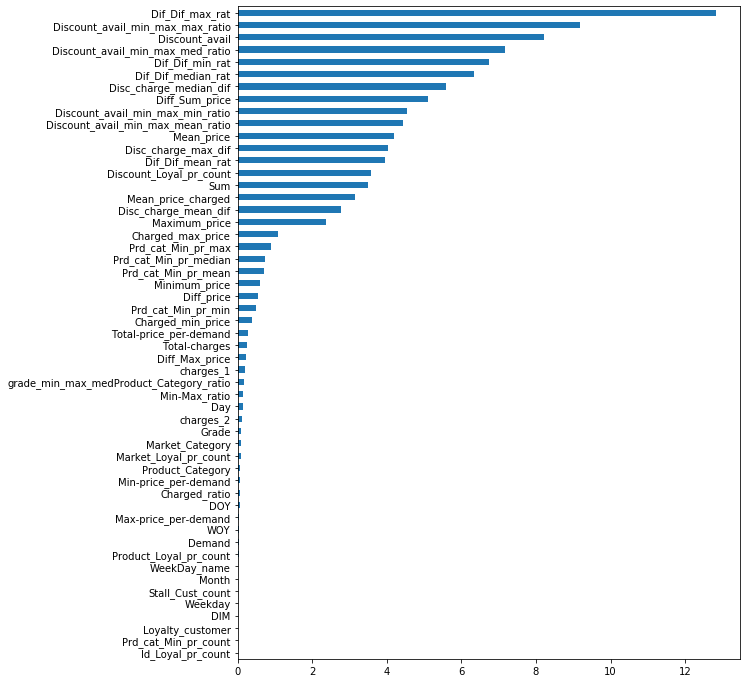

In [977]:
plt.figure(figsize=(9,12))
result3 = np.exp(model(ExtraTreesRegressor(n_estimators = 5000, random_state=seed),train,label,test,9,seed))
result4 = np.exp(model(cat.CatBoostRegressor(n_estimators = 5000, random_state=seed),train,label,test,9,seed))

In [986]:
result3.head()

0             1             2             3             4  \
0   3298.134119   3293.573765   3294.234317   3291.541594   3300.692262   
1   1928.351402   1937.271901   1926.297400   1928.673084   1927.880381   
2  11812.539170  11825.524998  11802.272065  11795.878204  11815.938804   
3   9455.770158   9483.259177   9462.055344   9462.525661   9486.284252   
4   5661.056216   5668.069303   5651.554123   5665.522437   5661.446645   

              5             6             7             8  
0   3284.110926   3295.618321   3294.610341   3297.166062  
1   1938.918661   1924.760885   1929.339154   1920.759272  
2  11825.973668  11707.877160  11772.843344  11803.083816  
3   9471.241149   9464.895853   9463.921675   9454.657166  
4   5660.123071   5637.913709   5669.691950   5688.741764

In [978]:
result4.head()

0             1             2             3             4  \
0   3271.158640   3286.640450   3266.954639   3262.955147   3302.400349   
1   1948.131197   1941.213583   1962.141381   1997.662226   1919.799332   
2  11889.976148  12286.764273  11927.195773  11858.424831  11862.984795   
3   9457.511511   9423.271740   9376.453472   9497.179218   9367.861097   
4   5718.266093   5722.628086   5695.439691   5709.737873   5707.724457   

              5             6             7             8  
0   3264.415733   3321.619004   3237.772259   3283.630700  
1   1975.772242   1940.621621   1938.372868   1985.623590  
2  11762.599603  12005.471815  11838.237810  11941.858434  
3   9450.150403   9394.181260   9444.916737   9435.430613  
4   5732.636766   5701.168775   5729.019769   5690.425369

In [987]:
result41 = np.mean(result4,axis=1)
result31 = np.mean(result3,axis=1)

In [1011]:
result5 = (0.7*result4[3]) + (0.3*result31)

In [1012]:
result5.head()

0     3272.391327
1     1977.105296
2    11839.628423
3     9488.179134
4     5695.620485
dtype: float64

In [979]:
result1 = np.mean(result,axis=1)

In [980]:
result1.head()

0     3293.457018
1     1936.297502
2    11795.397763
3     9466.899403
4     5658.654404
dtype: float64

In [981]:
sample.head()

Product_id  Selling_Price
0  SCHE4YSTDVPVZVXW    3294.594688
1  ACCEGCATKHNRXUHW    1945.603968
2  NKCE6GJ5XVJDXNNZ   11871.830880
3  NKCEB8BK3ZXDHDHM    9421.143424
4  TOPEFDXSAHRNPF94    5717.420625

In [1013]:
final = pd.DataFrame(index = range(len(z)),columns=['Product_id','Selling_Price'])

In [1014]:
final.Product_id = z
final.Selling_Price = result5

In [1015]:
final

Product_id  Selling_Price
0     SCHE4YSTDVPVZVXW    3272.391327
1     ACCEGCATKHNRXUHW    1977.105296
2     NKCE6GJ5XVJDXNNZ   11839.628423
3     NKCEB8BK3ZXDHDHM    9488.179134
4     TOPEFDXSAHRNPF94    5695.620485
5     ACCE558KZHEPZYMG    9686.396135
6     ACCEAZCVAMFHDPY7    5258.767510
7     NKCDYNY37JPBGBVM    2567.206965
8     NKCEY8KWY33FCUYD    7510.680337
9     RNGE4YPTQYRECV9J    4558.297010
10    NKCE88AHBHJZREXH    3899.439055
11    CLTEJ5ZZGBP4JGGE    7921.214080
12    WATE3NWH5FZWAMDA    8266.383127
13    CAGE53FSFZVFPFHQ    1694.103399
14    PCSEAKVBFFPGCHNZ    3770.760999
15    WATDFFH3KJYBTYGG    7460.706422
16    NKCDWHFQSCHHYZMP    2726.213804
17    RNGEB2PG3Q5RKDW6    3438.039853
18    NKCE5UY9HHPZGGUZ    4459.641535
19    KTAEHETW3ZCMFMJR    4107.586814
20    BRAEBBYRVF9MHJHU    7742.120713
21    NKCEAX7HAQ2RJA3Q   10393.390950
22    CRTECN2RQZWBSP9W    5014.313916
23    WATDEWZ9UHSEHGZG    9610.688762
24    PTPEYW8HNV6G9YYR    2870.969942
25    ACCEAMGZRRYVAHDC    5068.599129
26    SRTEHHXG8MUXTGPA    5949.543363
27    SKIE4S4NN4MHYM3Z    5037.880393
28    HMBE7G34YHWPWKYN    7249.191986
29    LLIEGTMFJBD7ZZZM   13880.245565
30    ACCEJGH6JVTM4CBH     884.247995
31    ACCDQDYBXJ9HZF37   10000.568077
32    RNGE88FRGZCXNKUG     621.133140
33    NKCE7M3QNNPZDXHQ   10301.150859
34    VLBEGFFDP9H6WG2T    3519.740073
35    TOPEAFG4YEQSH5TT    2449.768419
36    WATEYAP3K2QQQWDH    5358.820246
37    PCSEBDFUFJWGARNX   10731.970391
38    SWTEGXQFZY95SKG7    4866.819386
39    BRAEGJFXSM9ZQ6SK    6598.650342
40    CAGE6FYKP34GA4GF    7380.930889
41    HMBEJCMH78VJF3M8    4446.856323
42    HIFEB7J3GSTVN5XJ   10769.226629
43    PBXE6ZHNGZREWWHR    4732.072394
44    PCSEAKVBNXFGZBKB    6746.982525
45    BRAEBBMQQNZ9RZWR    5797.254944
46    ACCEGKFCXHZZH44S     735.232032
47    SHODXQRRGKZ74U9M    4291.128414
48    DREE2Y6DVEKVVQQS    4485.712759
49    PBXE8ZHHG5Y525BT    6897.498102
50    CTTEH9FXZHGFKUA3    8007.924388
51    ACCDXFZXGQTBTM6N    3602.845737
52    NKCE9PFF3TT4KSQJ    7922.836781
53    BRAE6NZAZK77HXZK     879.716671
54    NKCE4TV42BHDP63U    3377.758701
55    AIREDGGD9RJPZGYW    5625.456179
56    PCSEDAPMHR2HNHWP    8300.813082
57    PACE95FMAFXHZB5C    4516.035591
58    WATDG4KP445AV5XC   13808.847548
59    ACCE9EYRRNZYZUBG     472.356589
60    ACCE8XZMAHNC8JVS     647.356547
61    SHOED5DCSTQKZCGF    3387.586334
62    NKCE64Z4NGBHNAY7    3540.287723
63    PBXE8WQTZ5GA2YYQ     748.216701
64    MUGEGZUMGYAPVSZH    4706.010287
65    PBXE4RB3Y3GXWPFV     711.766876
66    PCSE2ZFDJJGFNHC7     697.464942
67    CRTECN2QT5HKHZ8F    4893.795655
68    MUGEACY8Q7ZYSTN8    1532.804753
69    ACCEGG9VGRMQGHRD    7251.193287
70    PCSE76X48PVSDDVK    1001.257948
71    PBXE6677X2D6UFZZ    5784.455262
72    WCKEGGGD2TXHHTJC     315.979340
73    NKCE7MMGF4PPGNA6    2876.130541
74    CRTECN2QYTPHK5YQ    4955.152175
75    OIDEJFCWMMR6JQBE    5685.831521
76    WATE5HFY4MJX6CHD    5494.955470
77    DREE4FC4TAR8M5GN    1436.194714
78    HACEGPF9DZVUZBFY    8136.057994
79    PBXE4Q7YF5KUYJYW   11733.842384
80    SHIED9YEH65NSA8N   10382.071550
81    WATDHMQJ68MVBRFV   13673.138410
82    HMBEGWTFEV4TF2RH    3249.976556
83    SHIE2FH7YTVDHFGT    3053.995510
84    CRTECN2QYRY2KWZF    4365.844037
85    TSHEDJXPN4HNT2UP    6080.983101
86    SHOECZH5WGBZHZES    2668.194322
87    NKCEDCT9MSAYG6H5    5333.682315
88    SOCEGGVYBTZPKXVP    4684.482606
89    PBXECARAQBCDSAZW    3435.521504
90    CAGDU85YDHP9ZJH7    2325.641278
91    TCVEHSMFEGNCAGYN    5065.701730
92    RNGEDAPFZ2GKRUER     872.233363
93    CAGDY9Q7HSNDHGFC    3762.055333
94    NKCECKHYZVHBQU9F     480.997556
95    NKCDQSVCRH8W73GF    6581.527878
96    WATD9H76RKGUUZHY   14132.757196
97    NKCE5HYVDQVATMKF    1996.495140
98    RNGE9GWMKVHGEYZG    4240.802441
99    SHOEAGUMMWFABHUT    3278.167995
100   SWDEGZMPYQGNEBHG    5016.009664
101   TOPEFDXSHZPHCUAU    9381.518862
102   CAGDU85Y85GDJGUD    1091.372816
103   CAGE4BQXK3FSTRRS    3275.739808
104   CAGDZVGTV3SMMMBY

In [1016]:
final.to_csv('multi_model_cat11.csv',index=False)